In [5]:
from pocket_cube.cube import Cube
from pocket_cube.cube import Move
from heapq import heappop, heappush
from tests import *
%matplotlib ipympl
import matplotlib.pyplot as plt


In [19]:
def heuristic(cube: Cube) -> int:
    sum = 0

    for i, x in enumerate(cube.state):
        if x != cube.goal_state[i]:
            sum += 1
    return sum

In [29]:
import numpy as np

positions = {
    0: (0, 1),
    1: (1, 1),
    2: (0, 0),
    3: (1, 0),
    4: (0 + 2, 1),
    5: (1 + 2, 1),
    6: (0 + 2, 0),
    7: (1 + 2, 0),
    8: (0 + 4, 1),
    9: (1 + 4, 1),
    10: (0 + 4, 0),
    11: (1 + 4, 0),
    12: (0 - 2, 1),
    13: (1 - 2, 1),
    14: (0 - 2, 0),
    15: (1 - 2, 0),
    16: (0, 1 + 2),
    17: (1, 1 + 2),
    18: (0, 0 + 2),
    19: (1, 0 + 2),
    20: (0, 1 - 2),
    21: (1, 1 - 2),
    22: (0, 0 - 2),
    23: (1, 0 - 2),
}

def distance_heuristic(cube: Cube) -> int:
    base_coords = np.array([(0, 1), (1, 1), (0, 0), (1, 0)])
    offsets = np.array([[0, 0], [1, 0], [2, 0], [-1, 0], [0, 1], [0, -1]]) * 2

    idx = 0
    sum = 0
    for i, x in enumerate(cube.state):
        if x != cube.goal_state[i]:
            idx = 4 * x
            while cube.state[idx] != cube.goal_state[idx + 1]:
                idx+=1
            p1 = positions[4 * x]
            p2 = positions[idx]
            sum += abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])
    return sum


In [41]:
import numpy
def astar(cube: Cube, h) -> Cube:
    # Frontiera, ca listă (heap) de tupluri (cost-total-estimat, nod)
    frontier = []
    heappush(frontier, (0 + h(cube), cube.hash(), cube.clone()))
    # Nodurile descoperite ca dicționar nod -> (părinte, cost-până-la-nod)
    discovered = {cube.hash(): (None, 0)}
    seen_costs = {h(cube): 1}

    curr_cube: Cube
    while frontier:
        _, _, curr_cube = heappop(frontier)
        c = discovered[curr_cube.hash()][1]
        if numpy.array_equal(curr_cube.state, curr_cube.goal_state):
            break
        for m in Move:
            tentative_cube = curr_cube.clone()
            tentative_cube = tentative_cube.move(m)
            tentative = h(tentative_cube)

            if tentative_cube.hash() not in discovered:
                heappush(frontier, (c + 1 + tentative, tentative_cube.hash(), tentative_cube))
                discovered[tentative_cube.hash()] = (curr_cube.hash(), c + 1)



    return curr_cube # drumul, ca listă de poziții

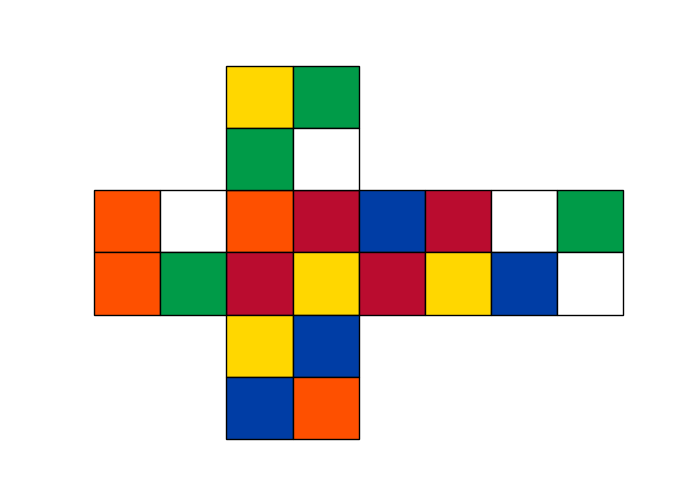

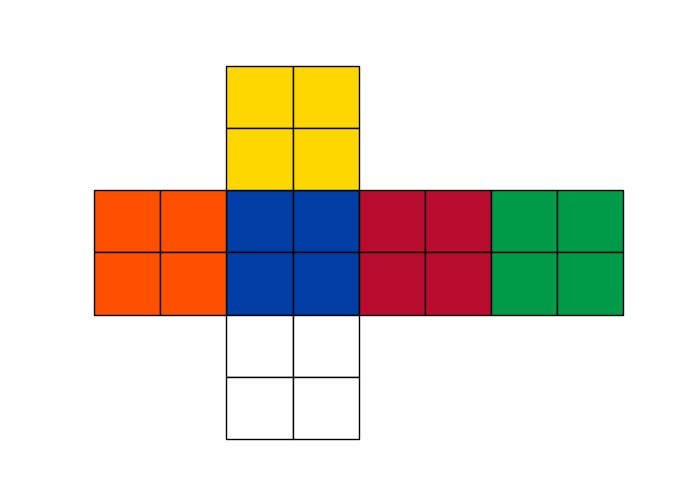

In [42]:

plt.close("all")

input = Cube(case3)
input.render()
cube = astar(input, heuristic)
cube.render()


In [22]:
from ast import List
from multiprocessing import Process, Manager, Queue, Event
from typing import Dict
import numpy
def bfs(cube: Cube, d: Dict, q: Queue, run: Event) -> Cube:

    queue: List[Cube]
    queue = [cube]
    discovered = {cube.hash(): 0}
    curr_cube: Cube
    while queue:
        if not run.is_set():
            break
        curr_cube = queue.pop(0)
        curr_cube.render()

        if numpy.array_equal(curr_cube.state, curr_cube.goal_state):
            q.put(curr_cube)
            run.clear() # Stop running.
            break
        common_state = d.get(cube.hash(), False)
        c = discovered[curr_cube.hash()]

        if common_state:
            q.put(curr_cube)
            run.clear() # Stop running.
            break
        for m in Move:
            tentative_cube = curr_cube.move(m)
            if tentative_cube.hash() not in discovered:
                queue.append(tentative_cube)
                discovered[tentative_cube.hash()] = c + 1
    curr_cube.render()



def bfs_bidirectional(cube: Cube) -> Cube:
    manager = Manager()
    d = manager.dict()
    ret = Queue()

    run = manager.Event()
    run.set()  # We should keep running.

    p = Process(target=bfs, args=(cube, d, ret, run))
    p.start()

    ret2 = Queue()
    cube2 = cube.clone()
    aux = cube2.state
    cube2.state = cube2.goal_state
    cube2.goal_state = aux
    cube2.render()
    p2 = Process(target=bfs, args=(cube2, d, ret2, run))
    p2.start()

    p.join()
    print("p1 joined")
    p2.join()
    print("p2 joined")

    # retCube = ret.get_nowait()
    # retCube2 = ret2.get() if not numpy.array_equal(retCube.state, retCube.goal_state) else None
    # return retCube, retCube2

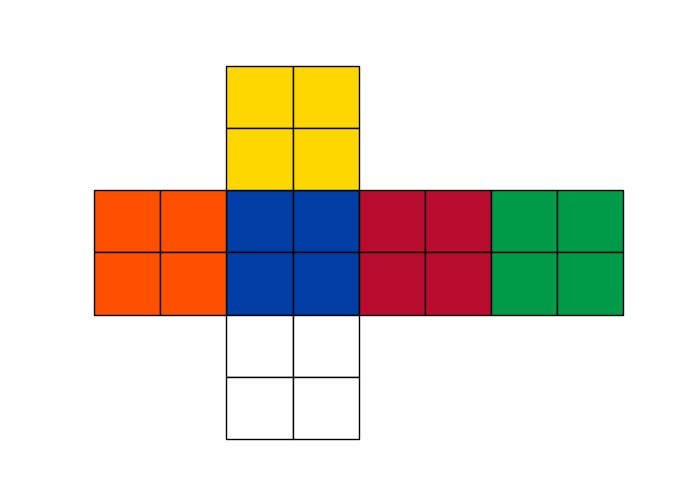

/home/skemo/Facultate/Anul4/ia/tema1/pocket_cube/cube.py:88: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(7, 5))
/home/skemo/Facultate/Anul4/ia/tema1/pocket_cube/cube.py:88: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(7, 5))


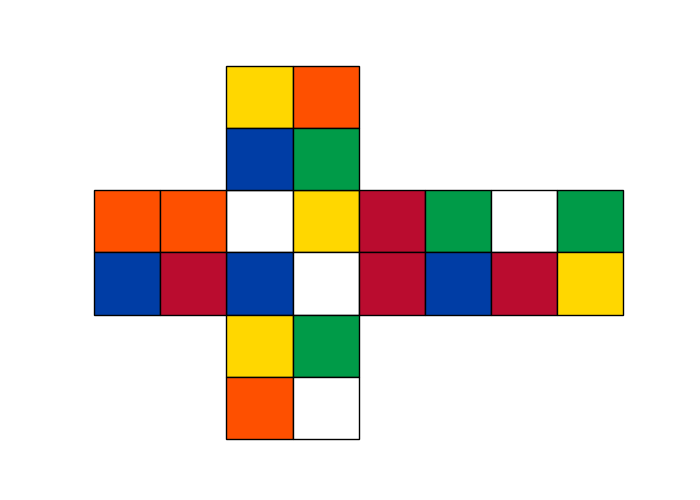

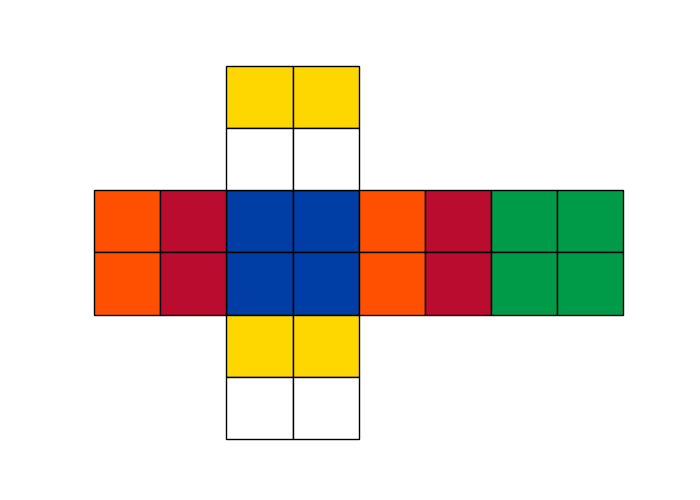

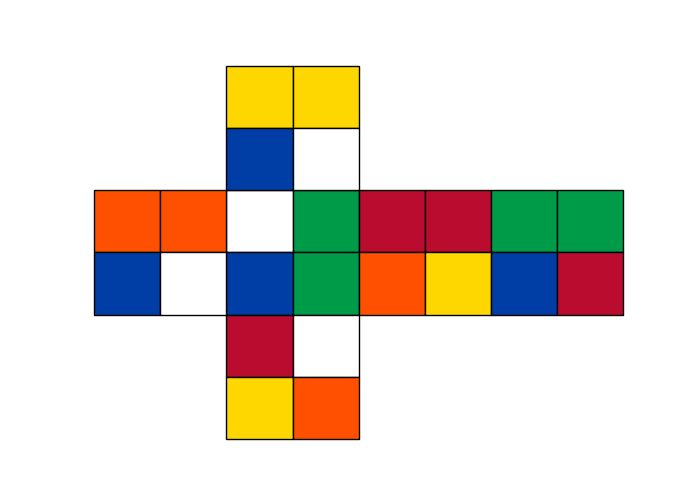

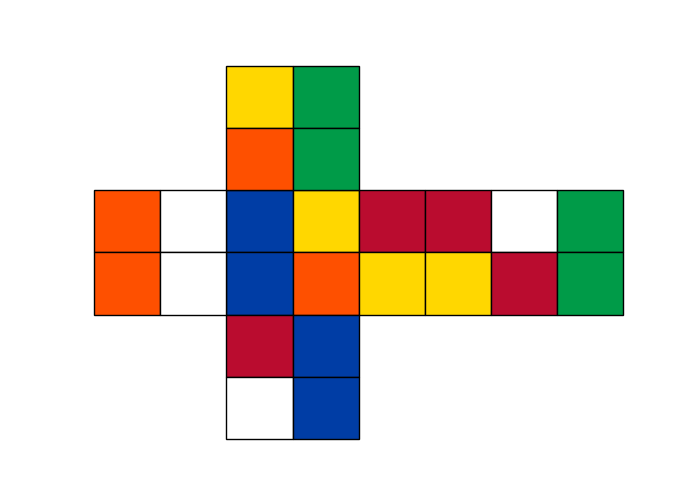

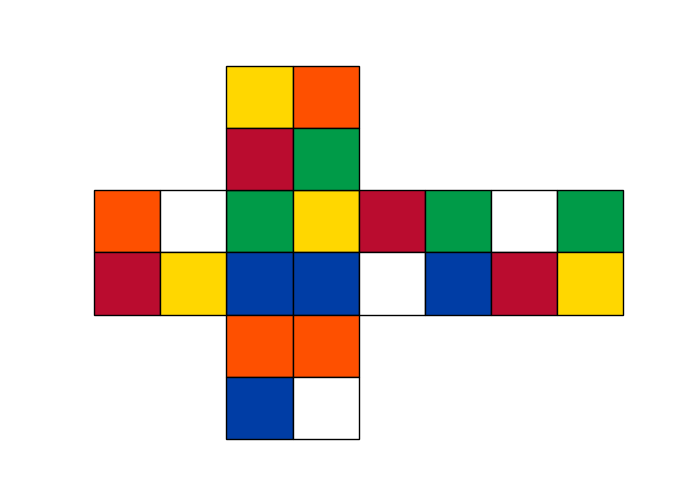

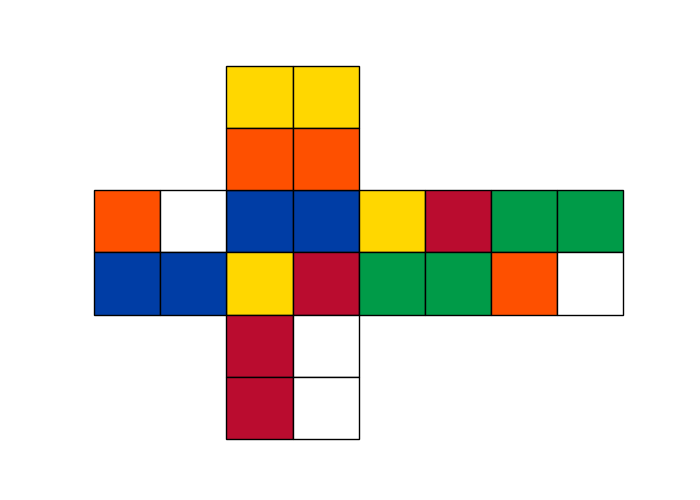

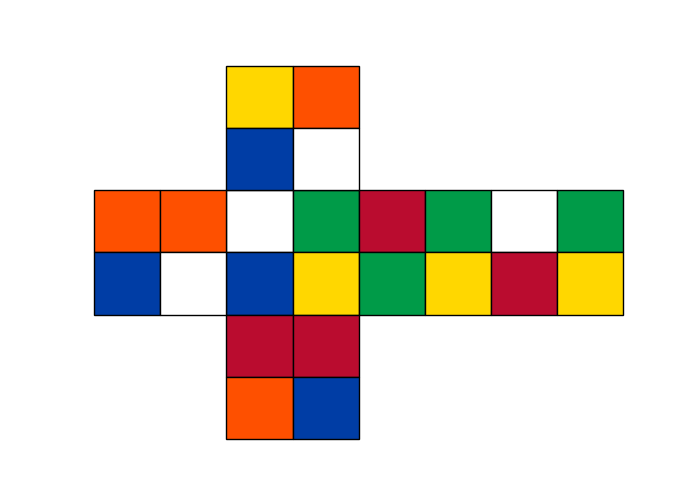

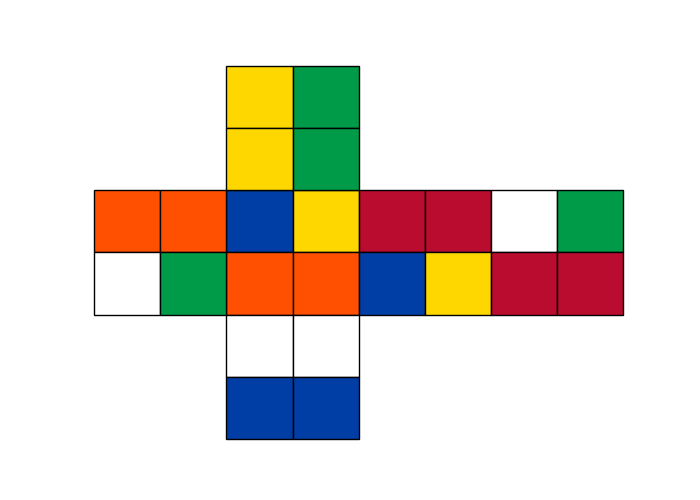

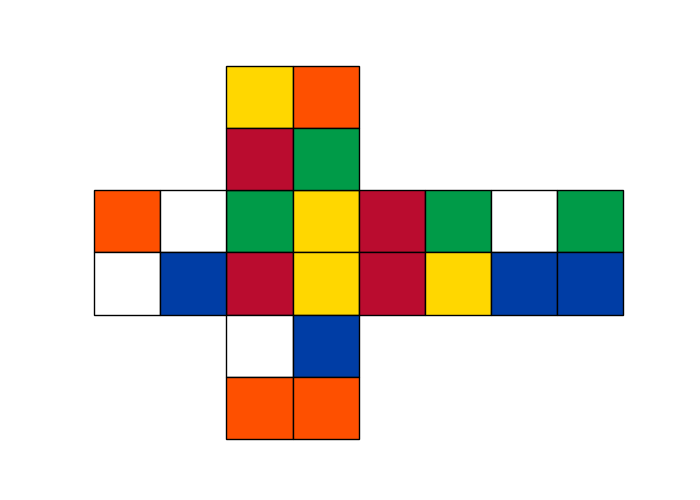

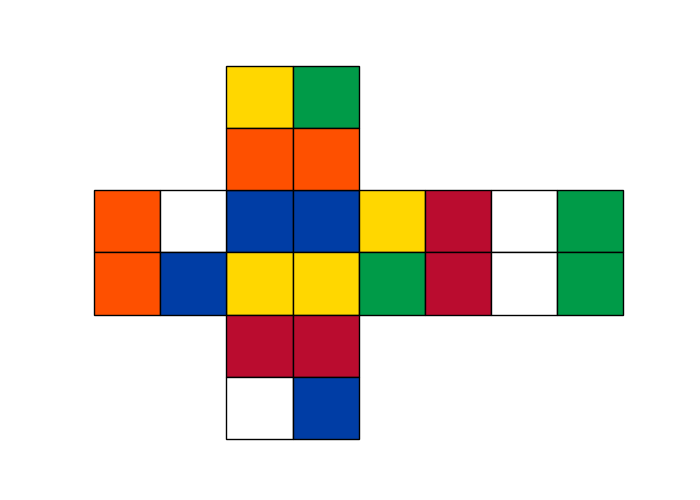

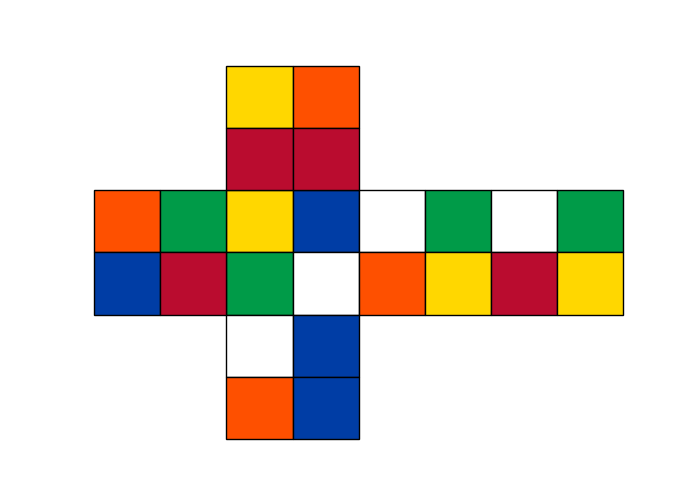

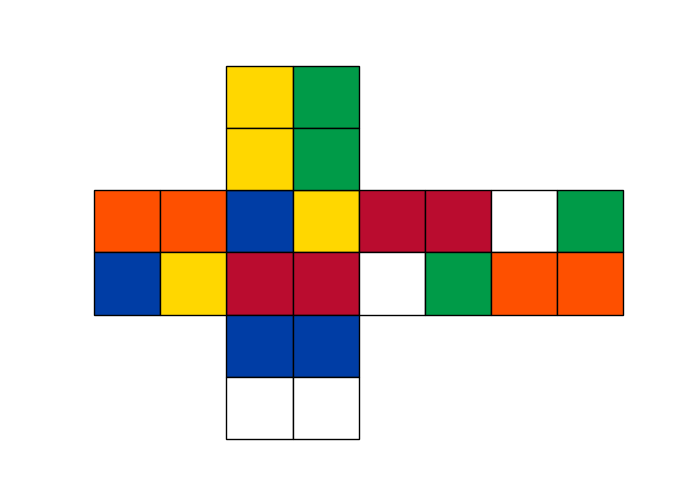

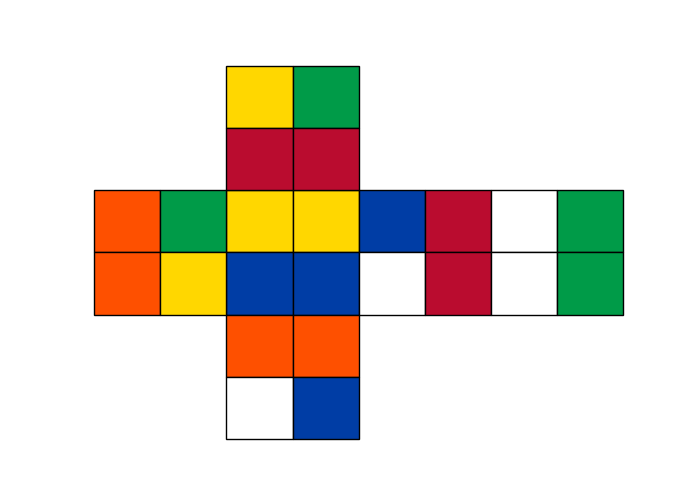

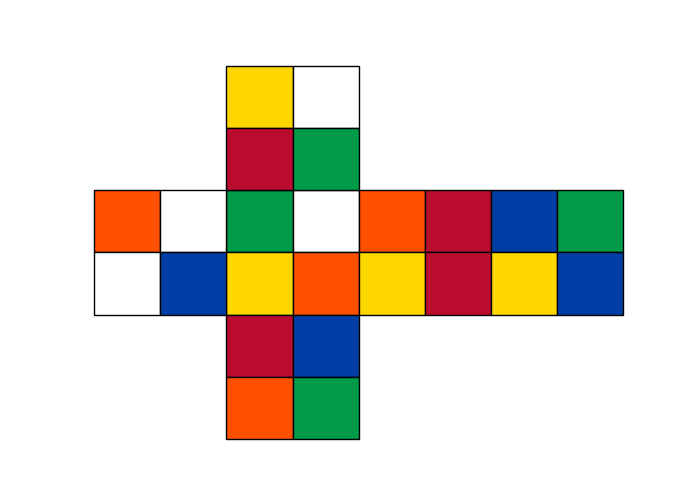

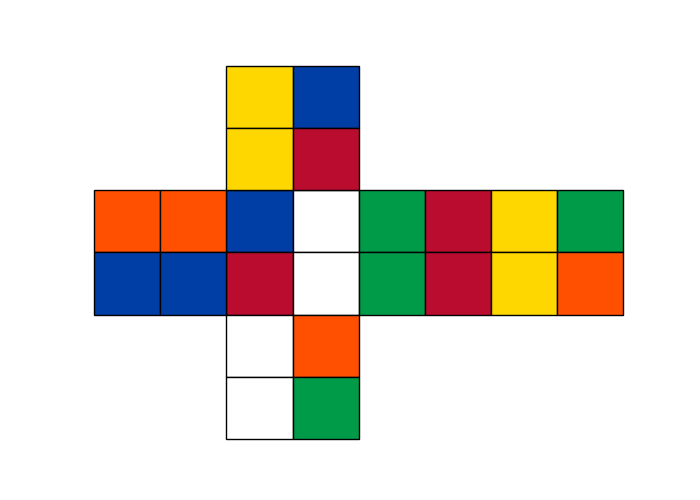

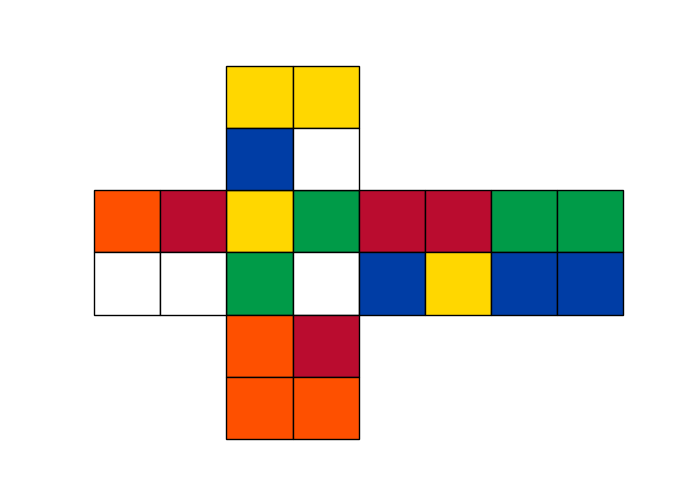

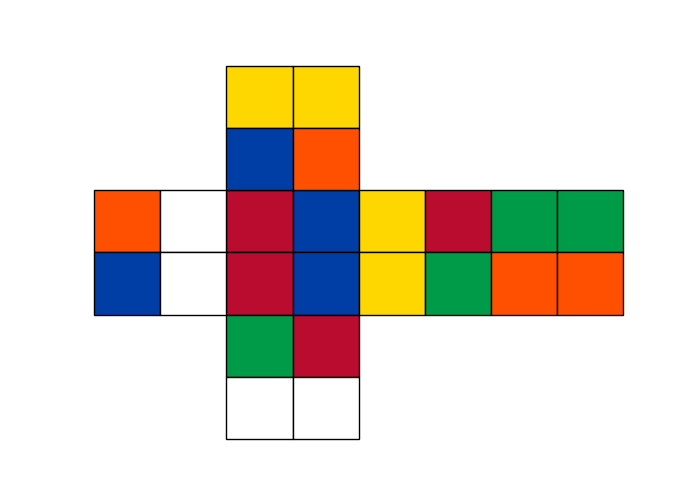

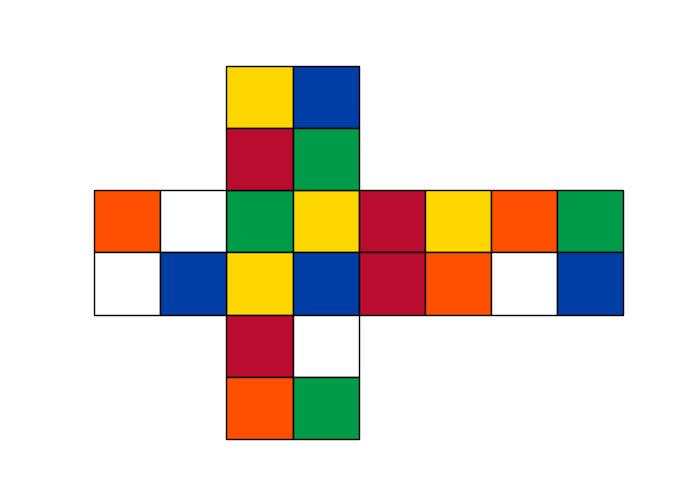

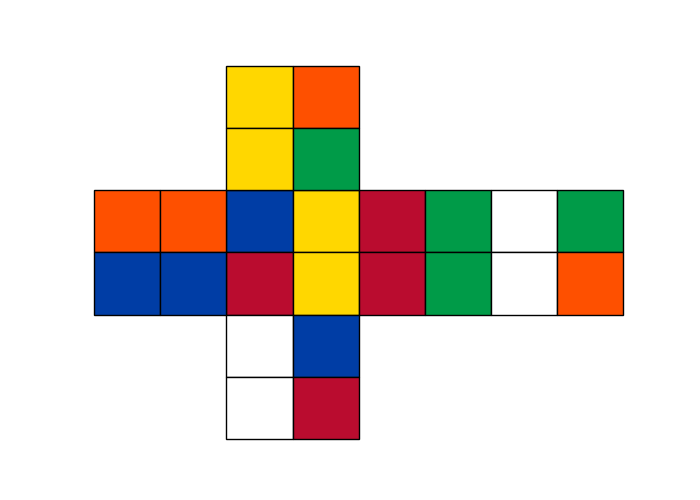

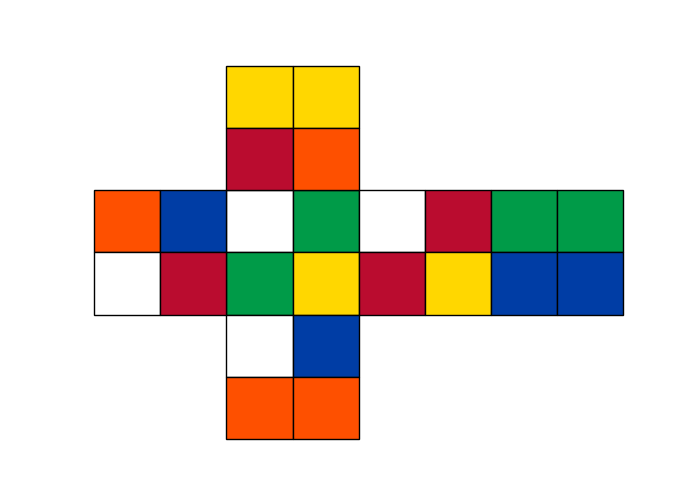

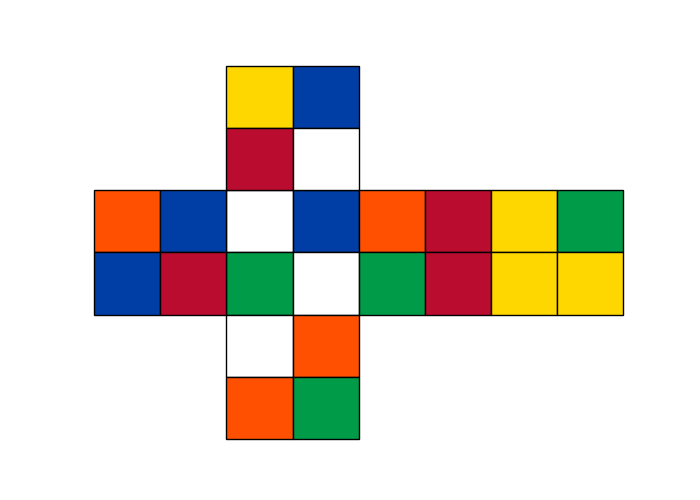

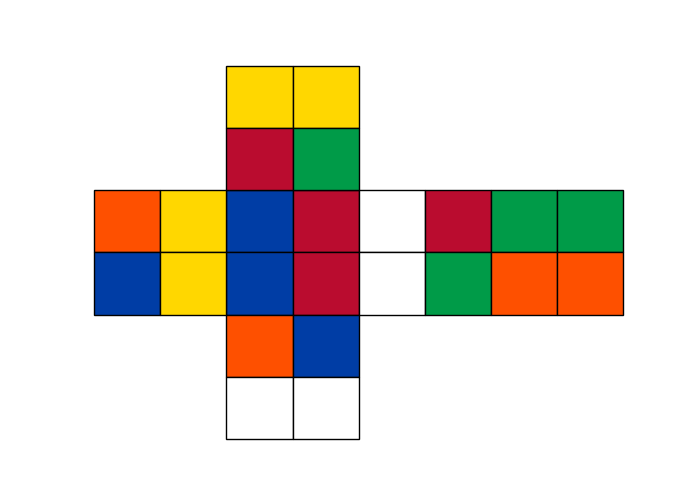

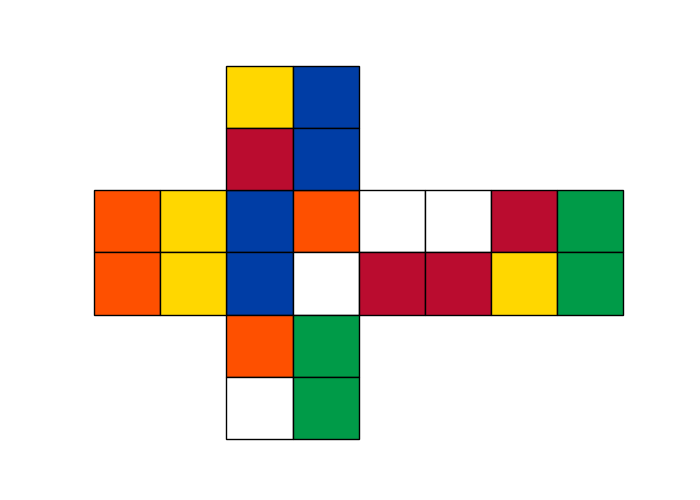

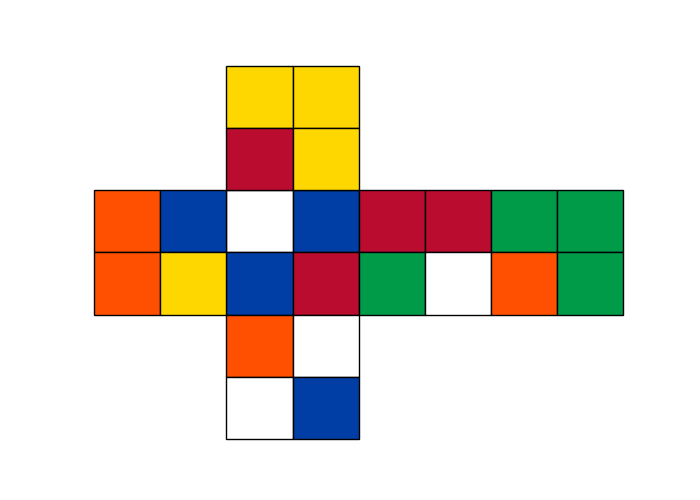

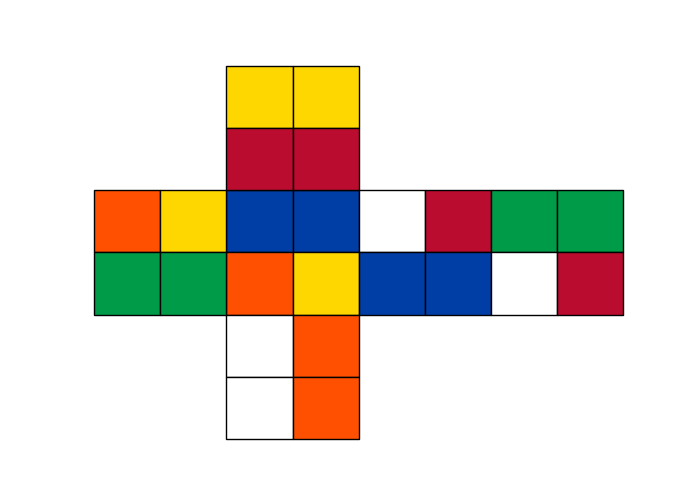

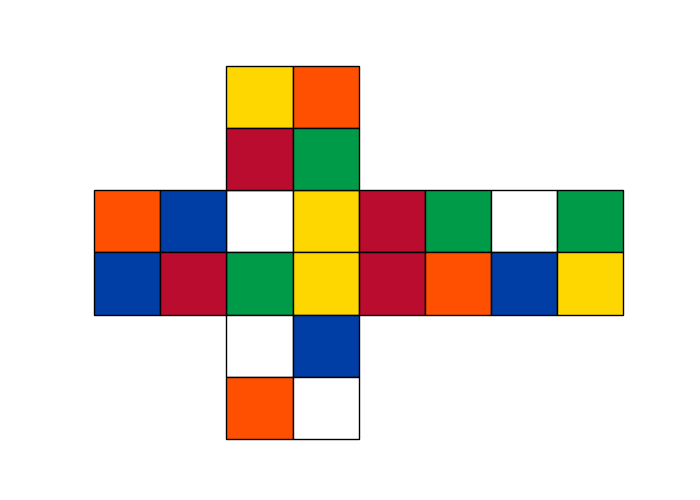

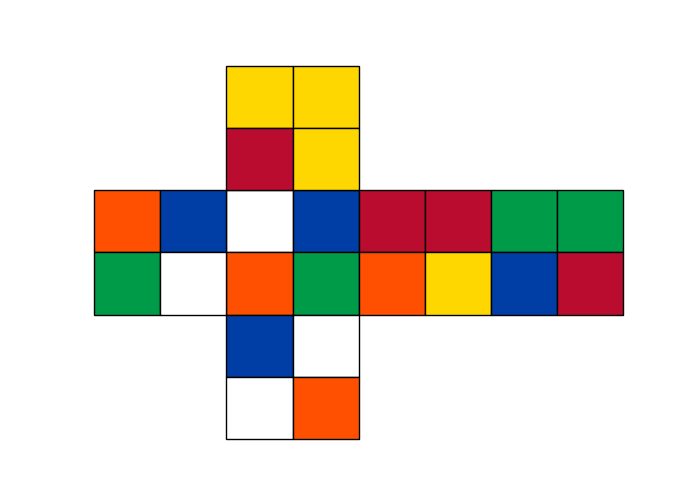

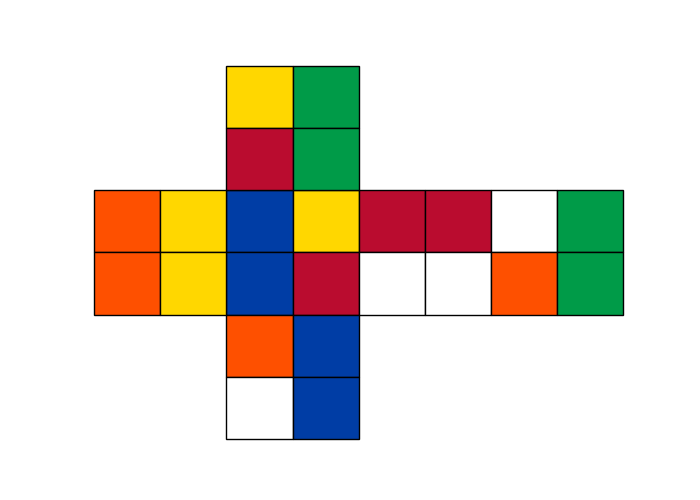

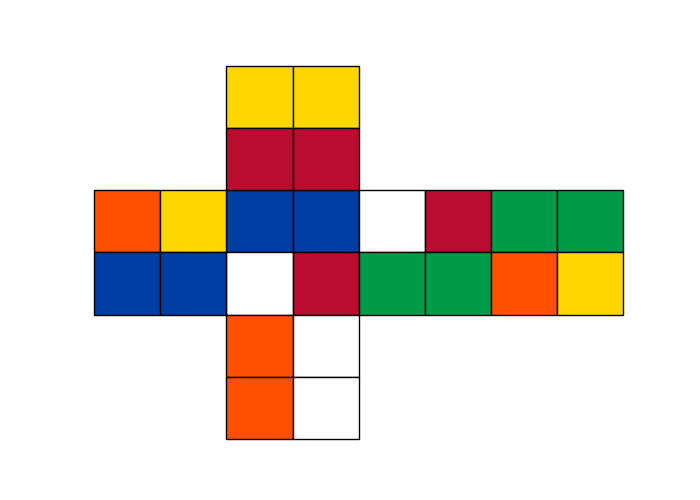

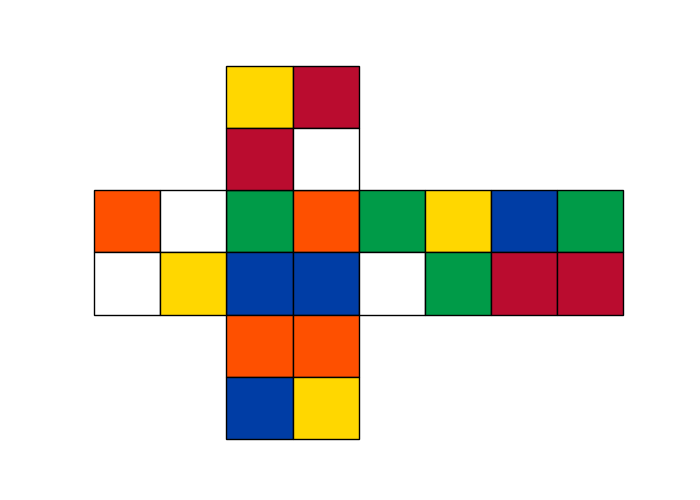

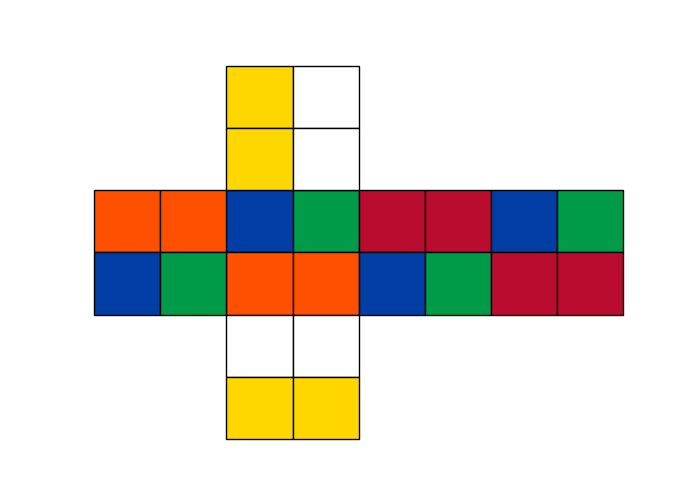

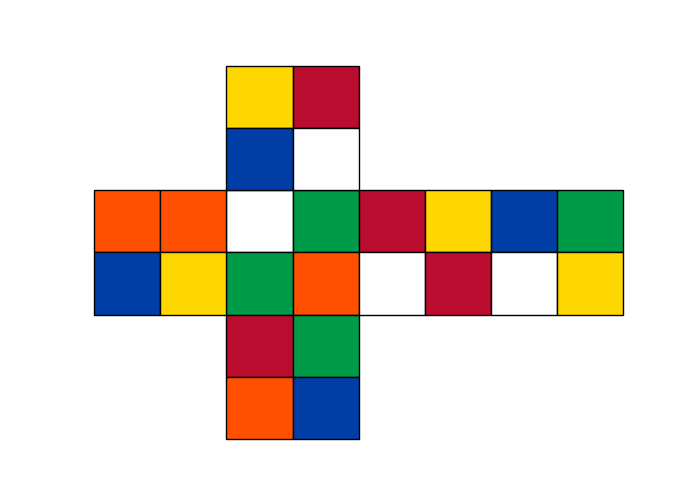

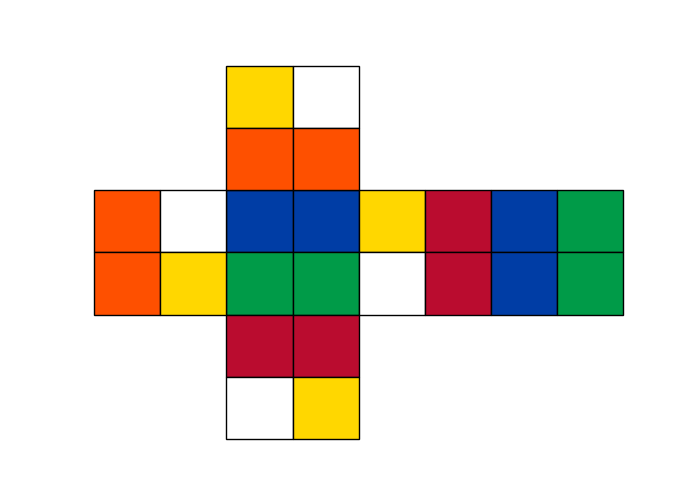

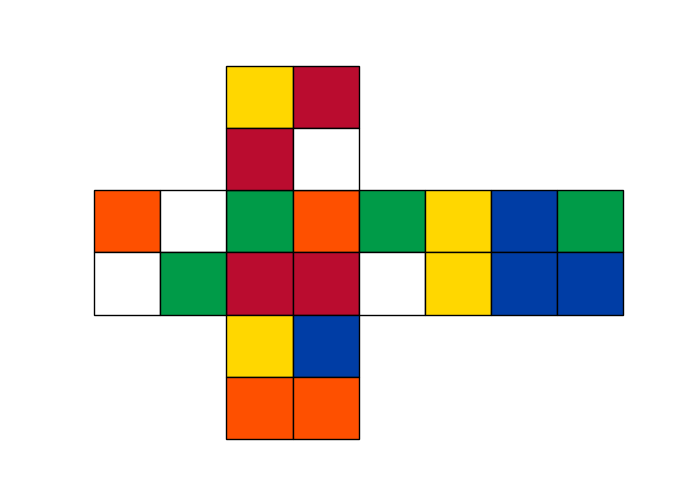

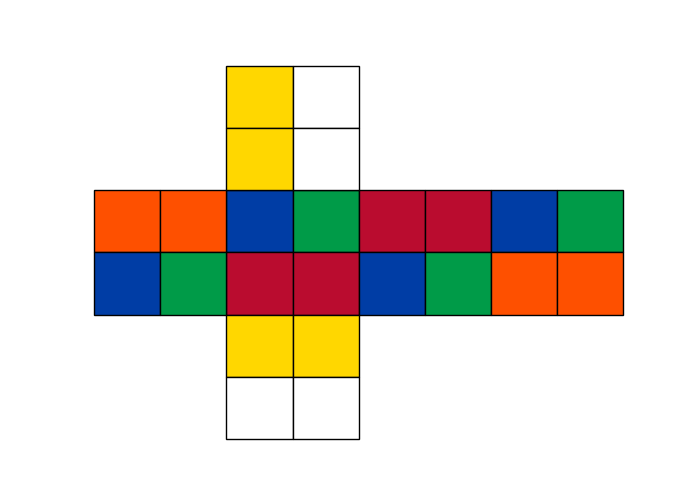

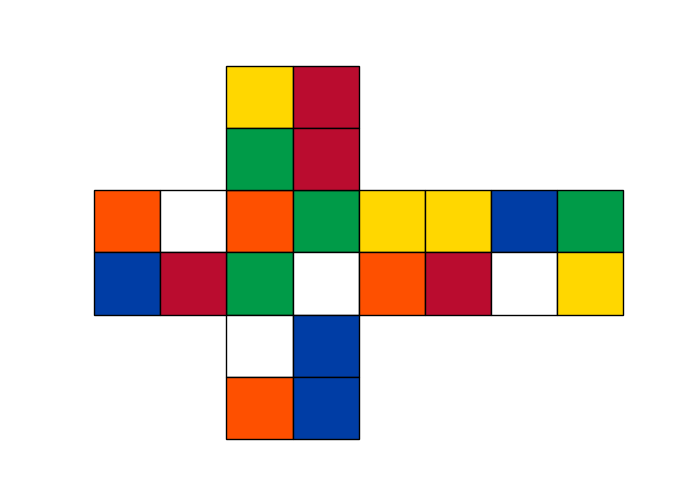

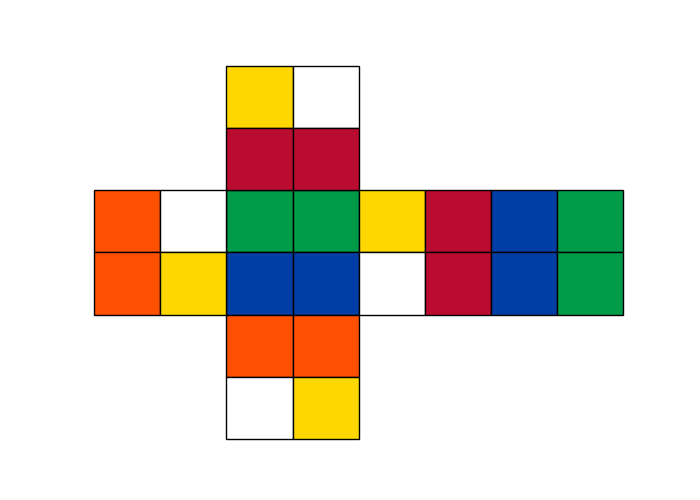

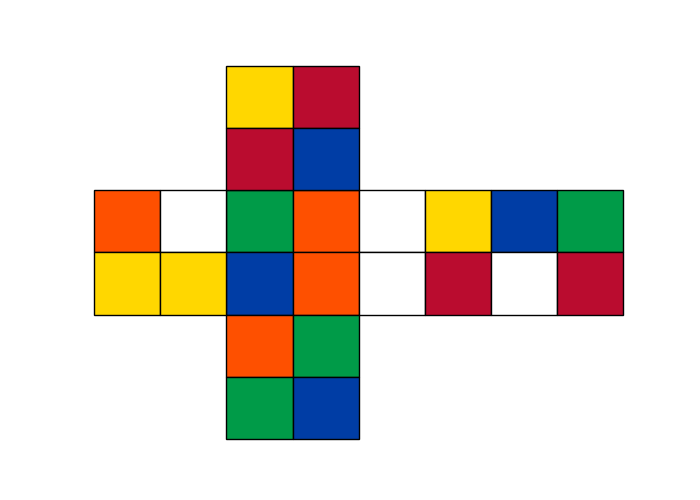

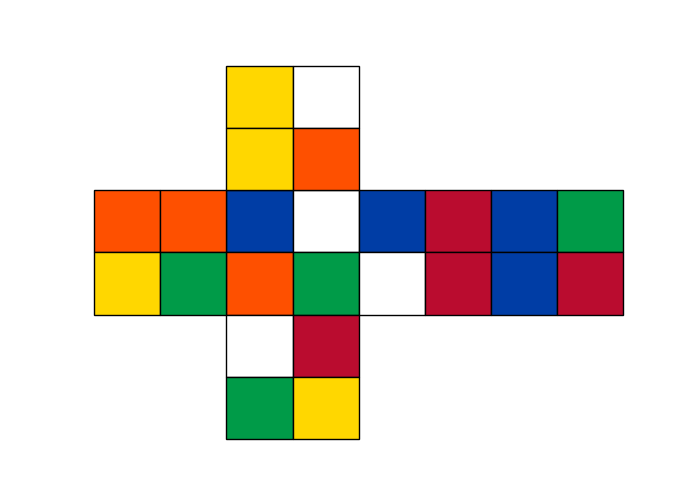

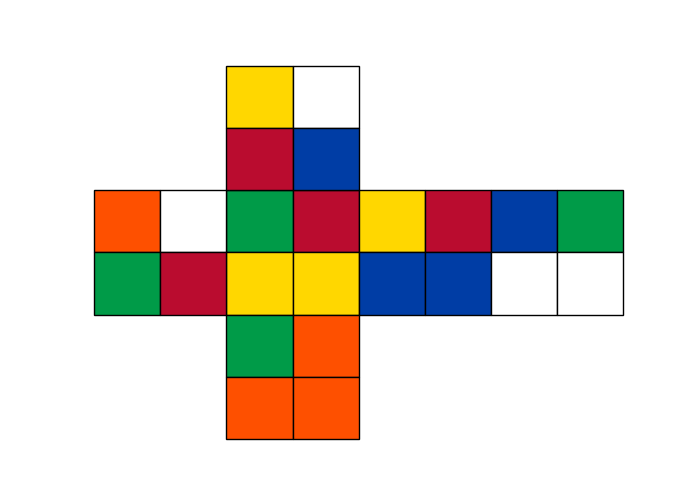

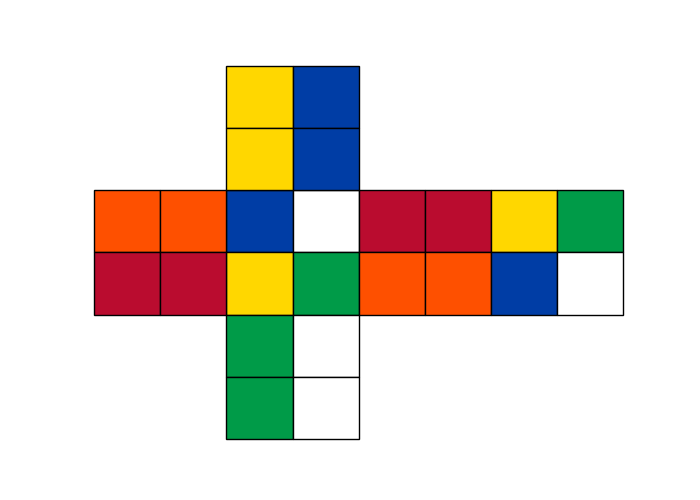

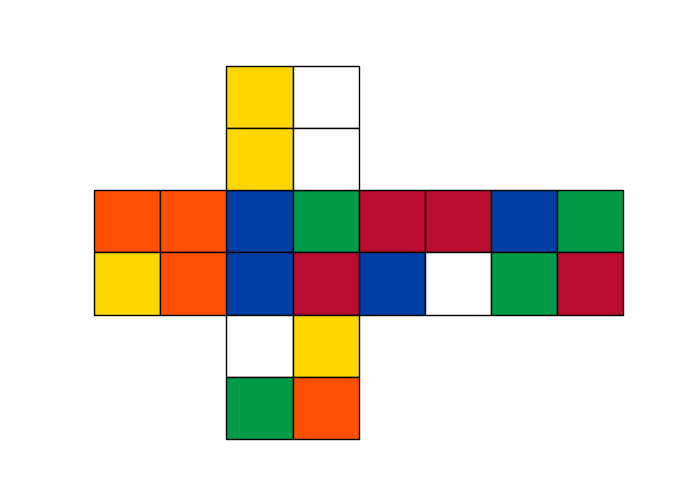

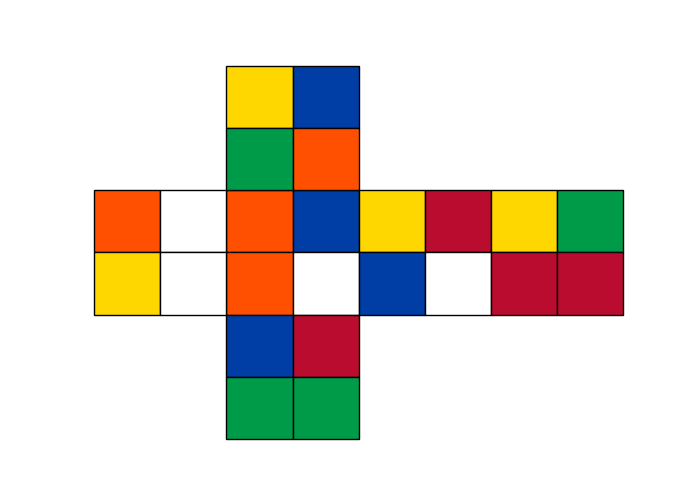

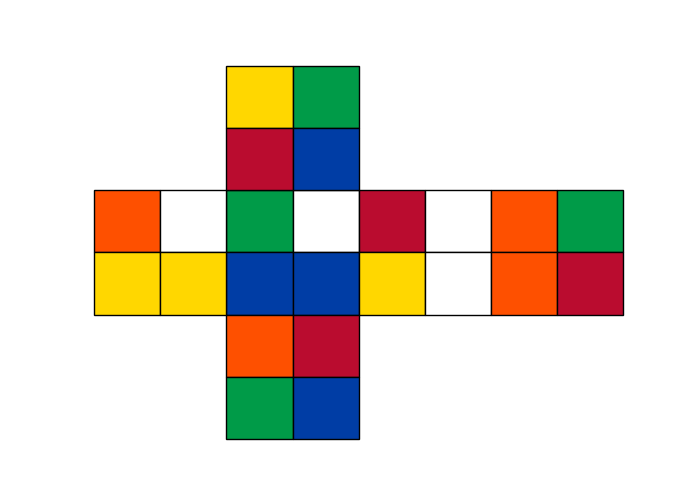

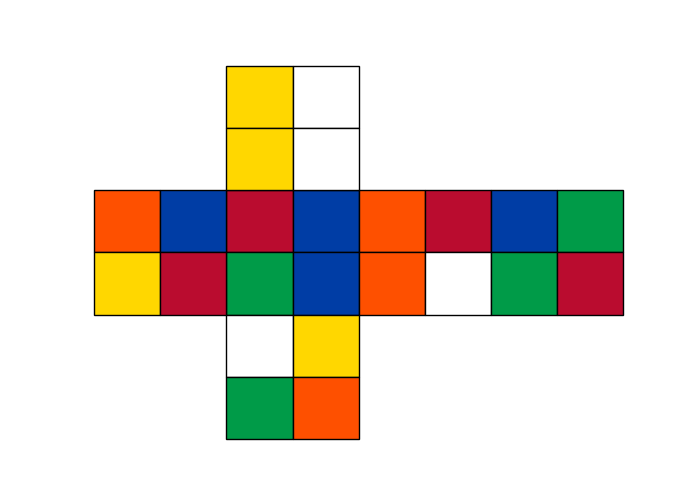

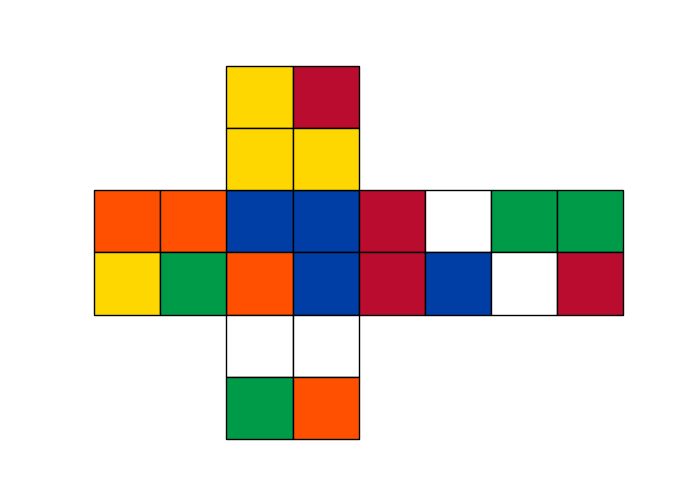

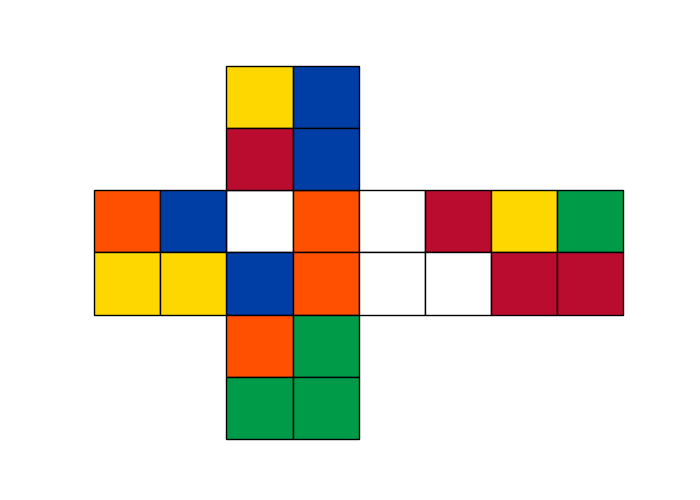

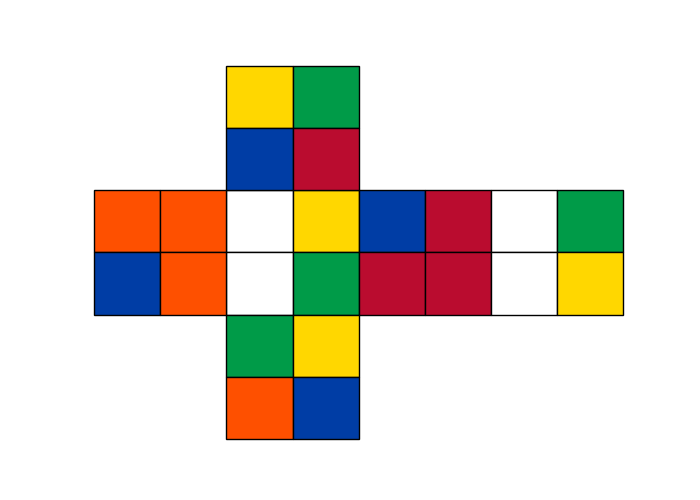

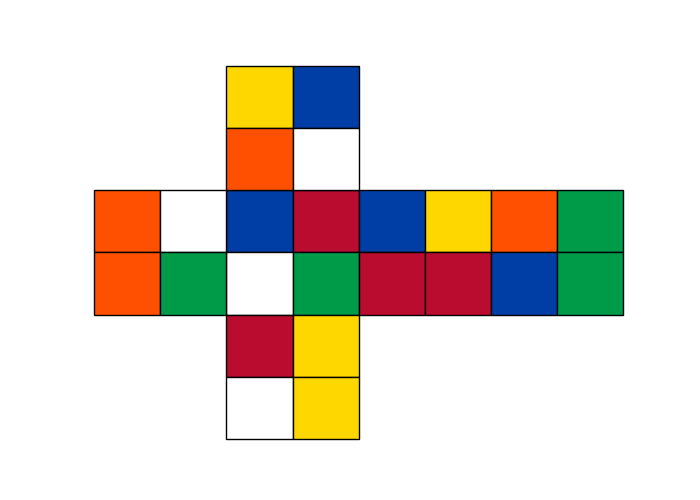

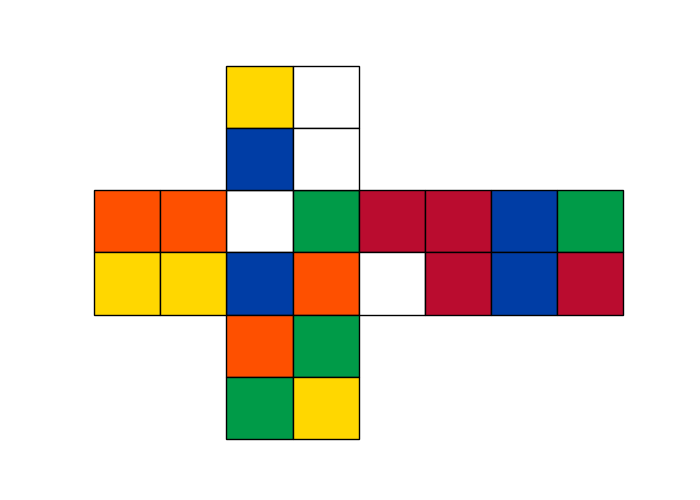

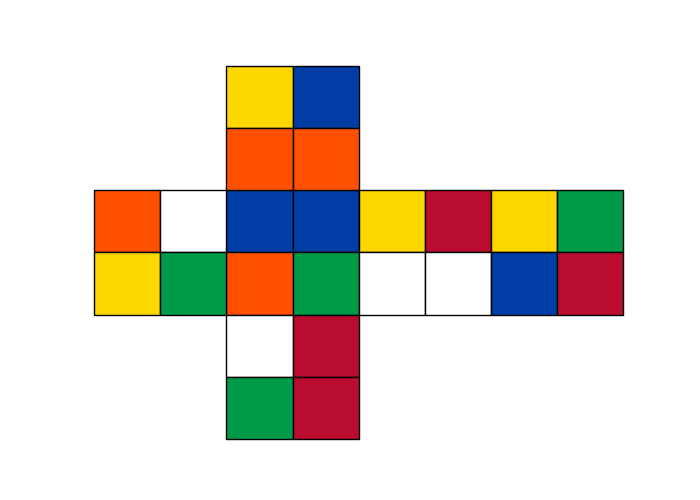

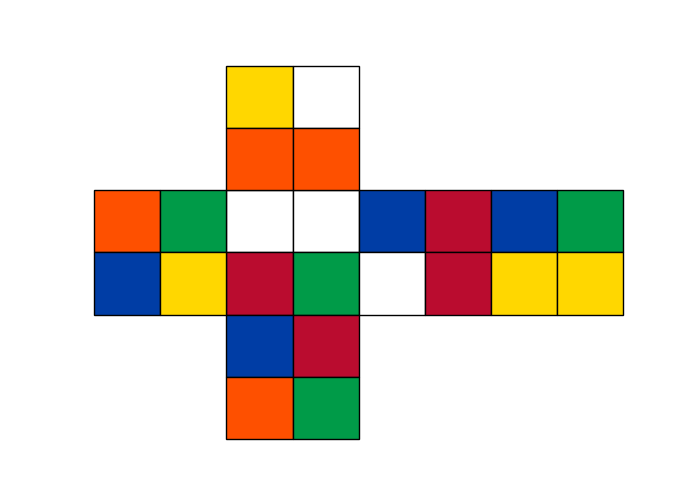

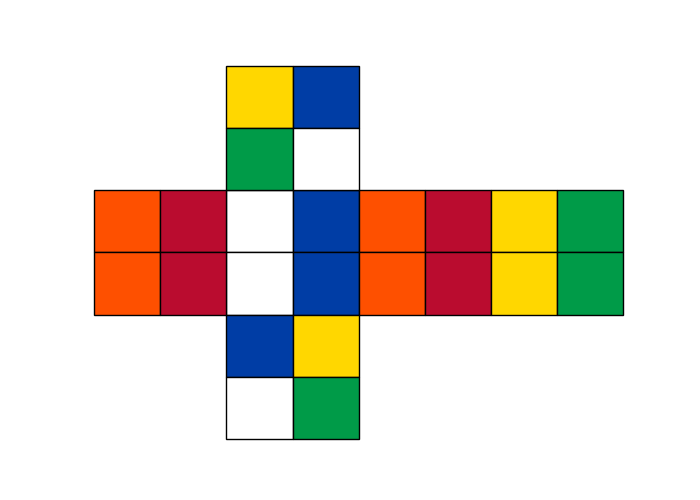

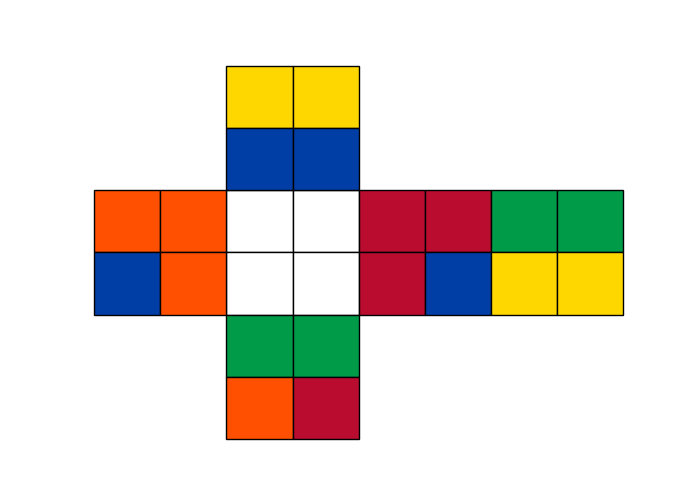

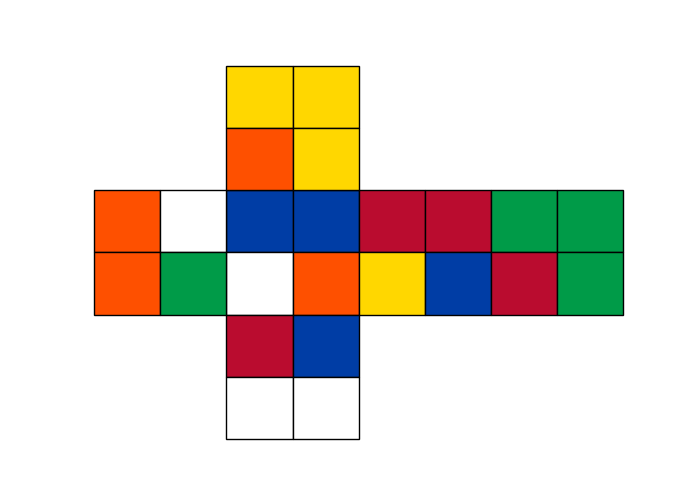

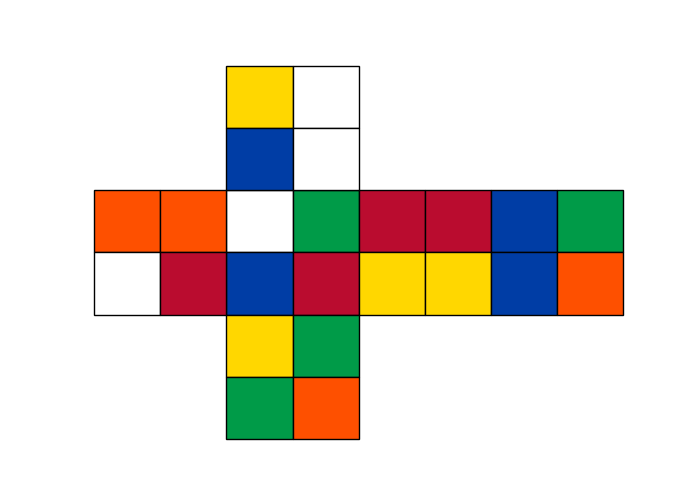

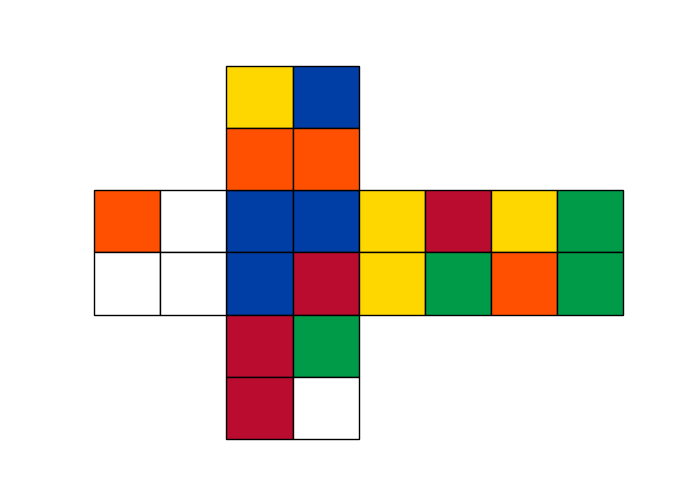

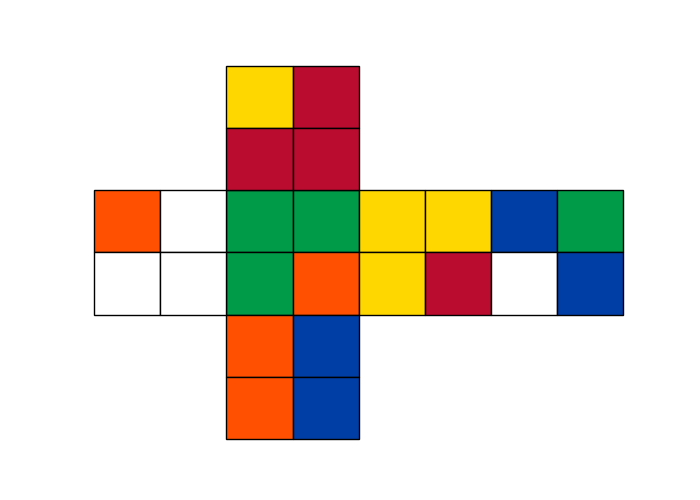

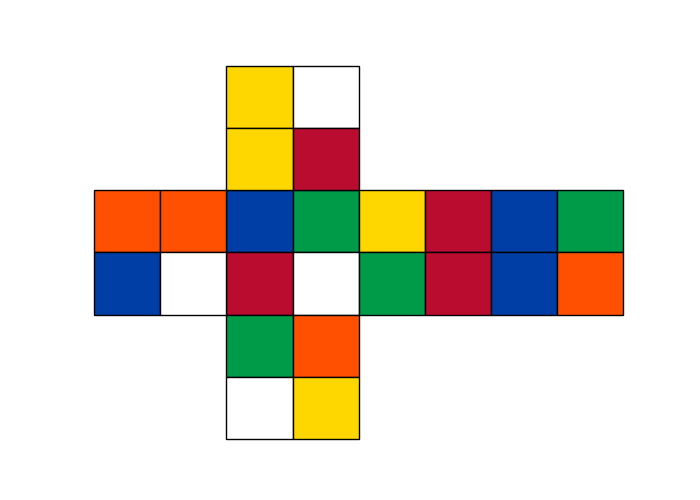

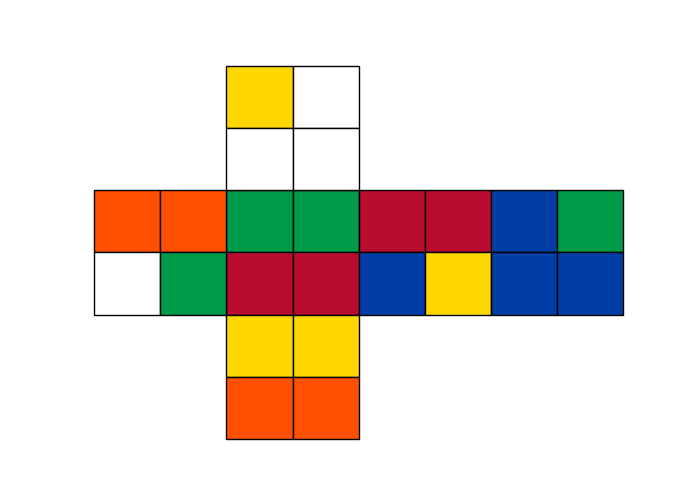

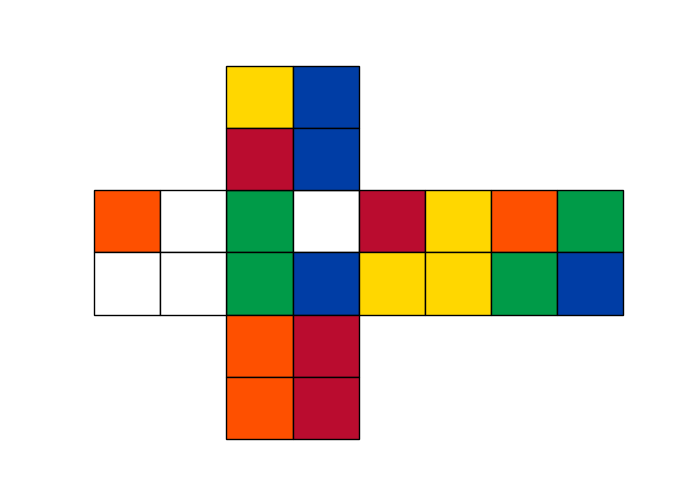

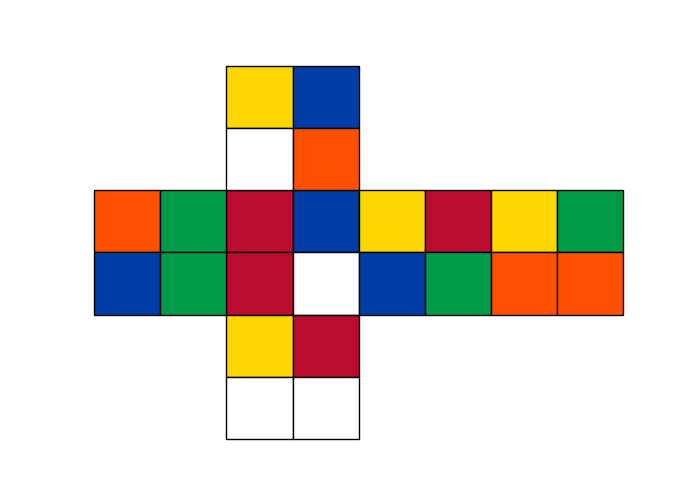

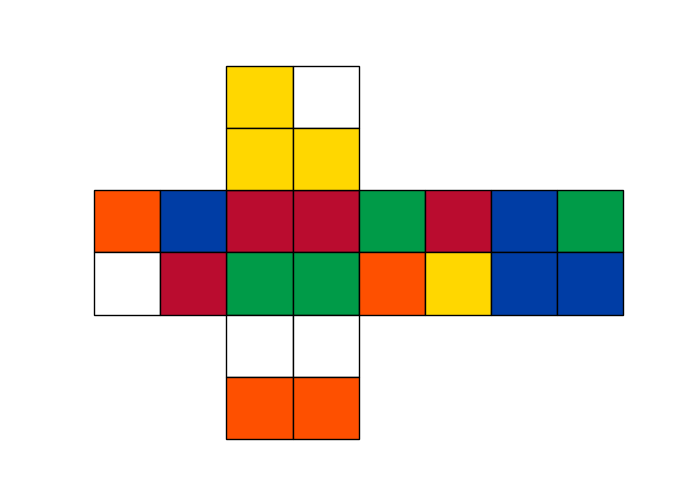

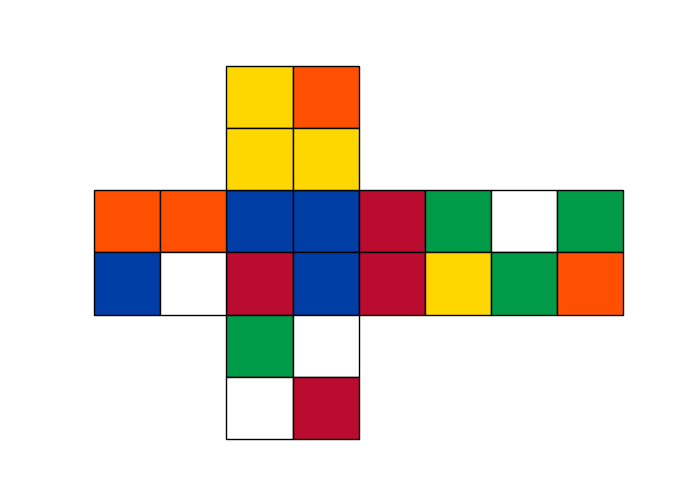

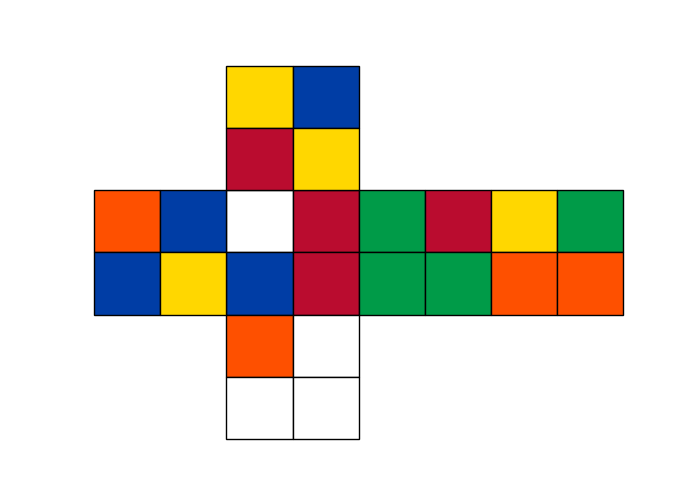

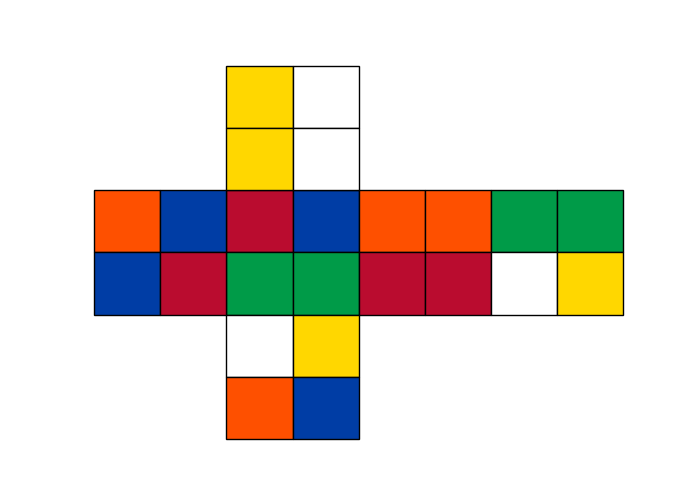

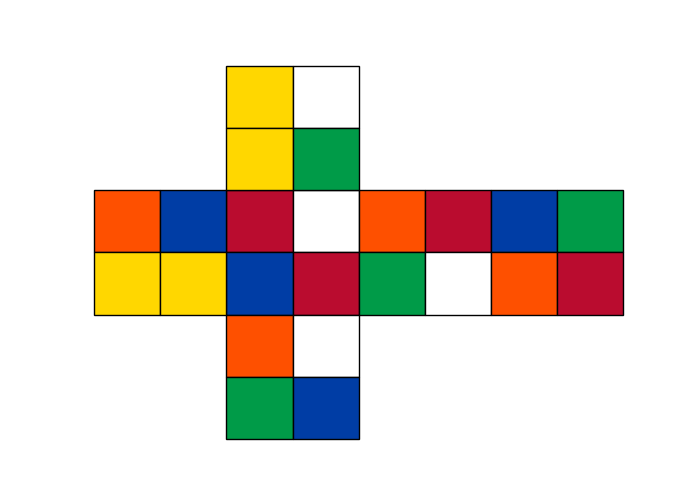

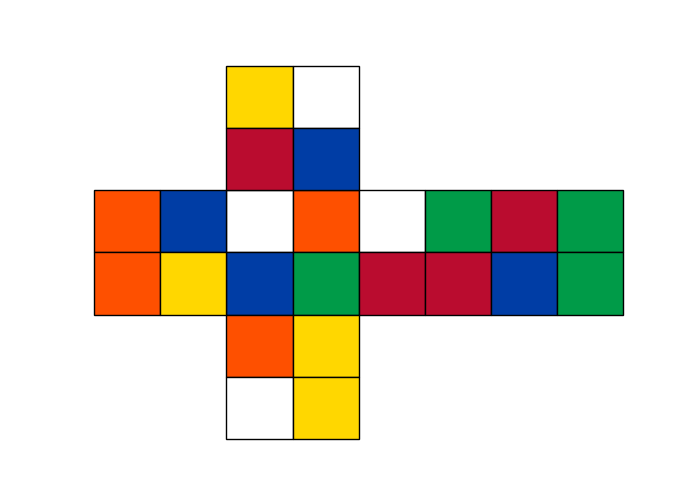

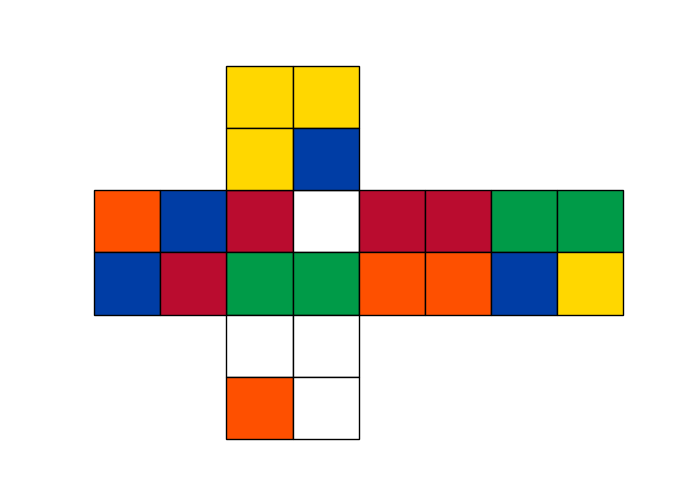

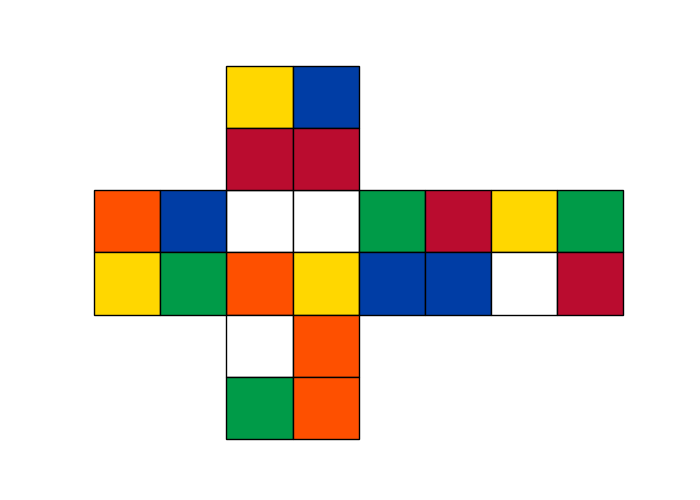

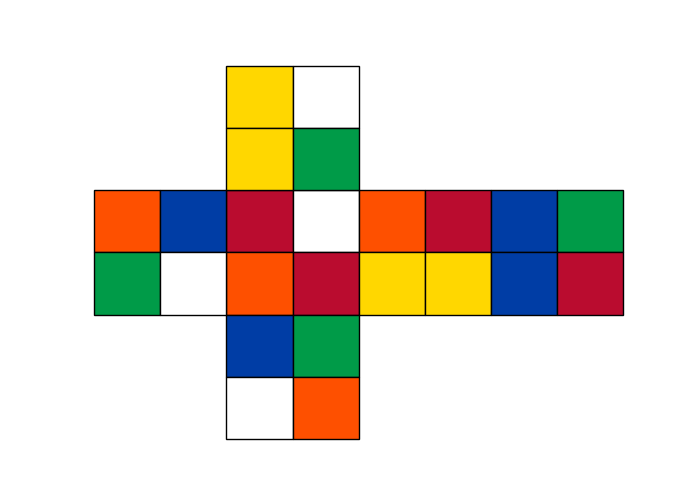

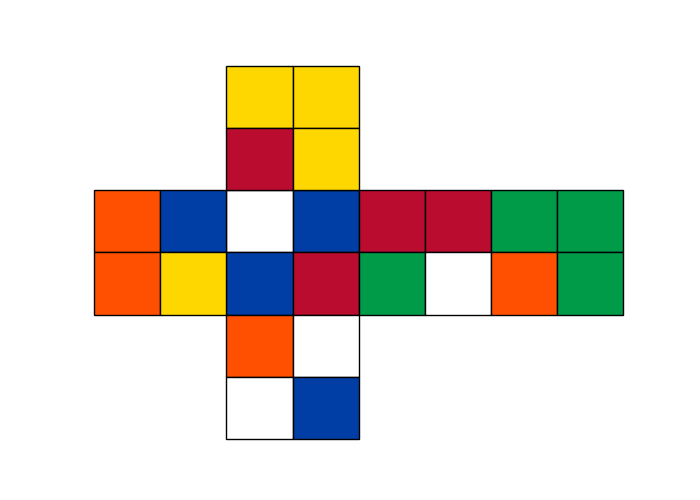

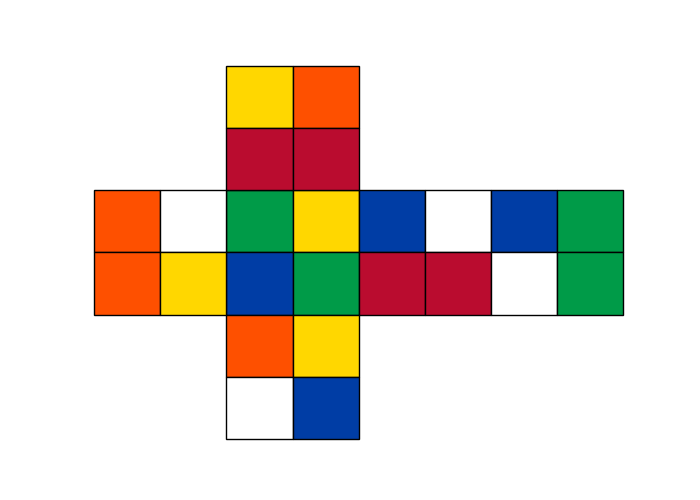

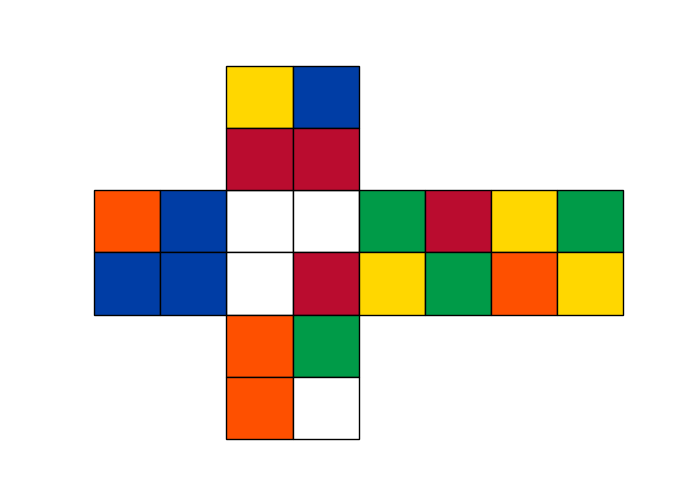

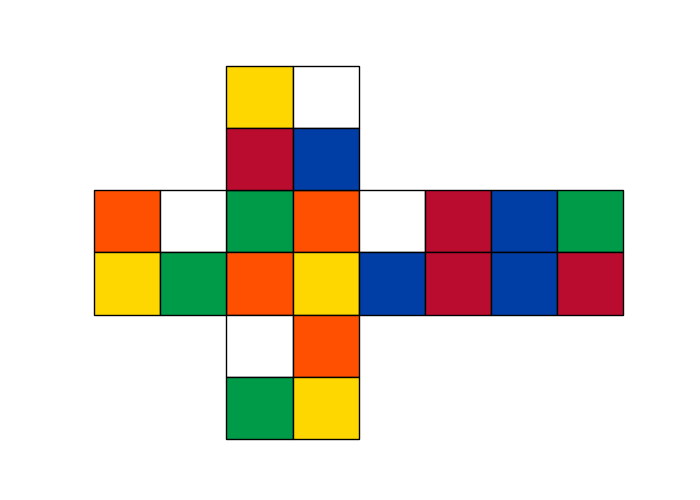

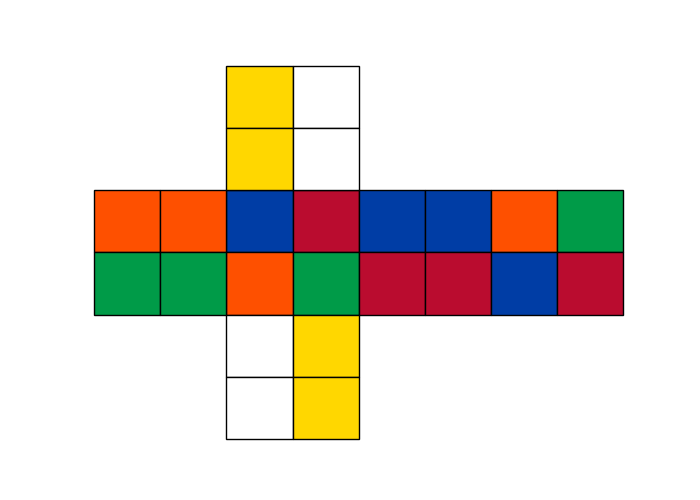

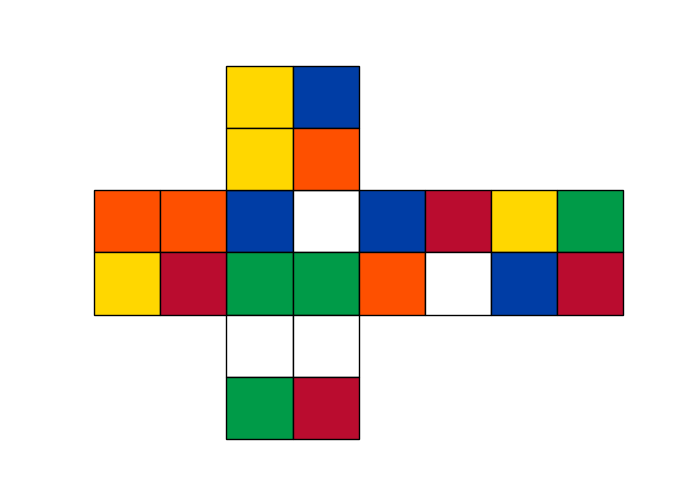

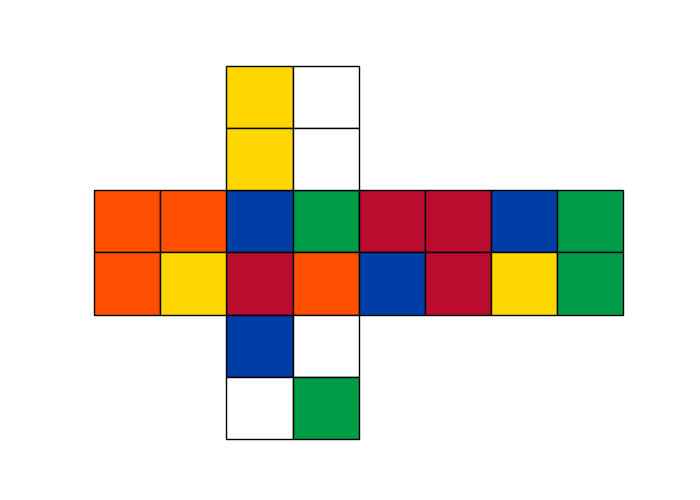

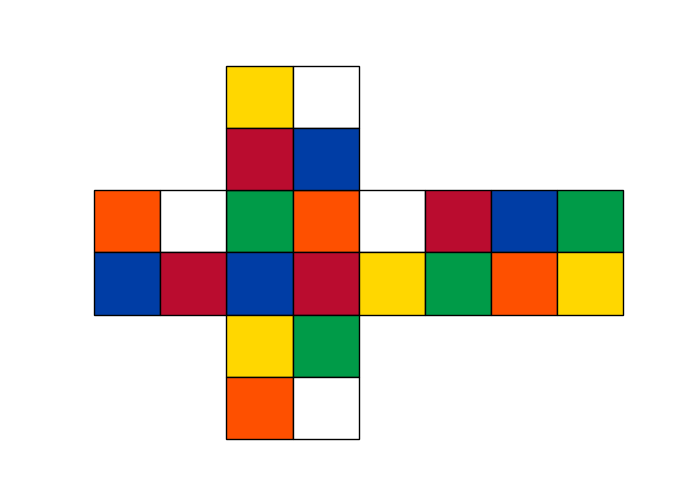

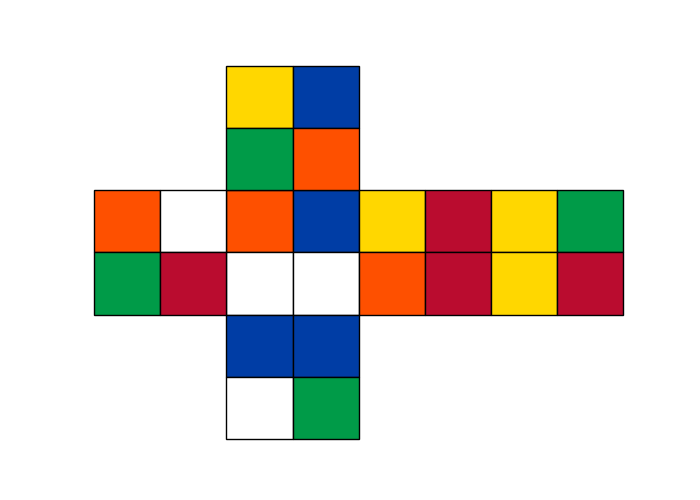

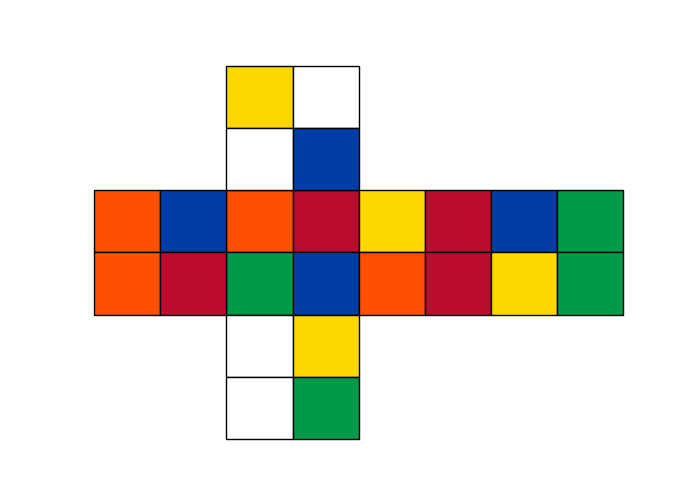

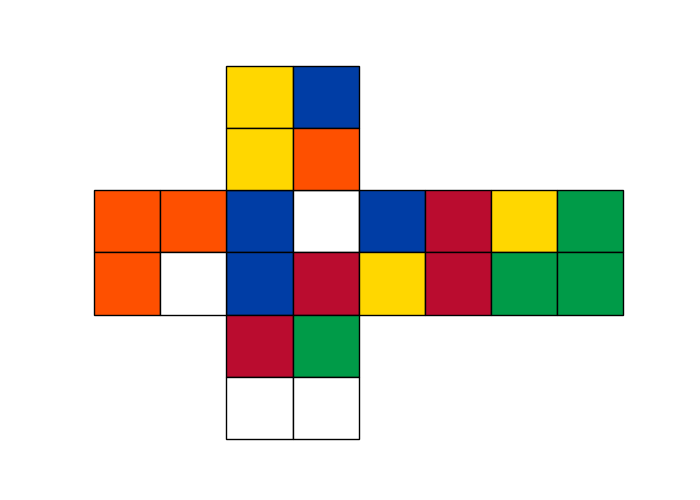

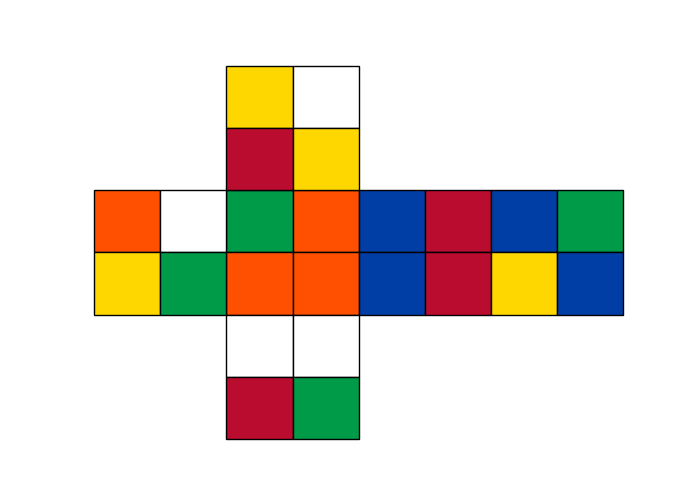

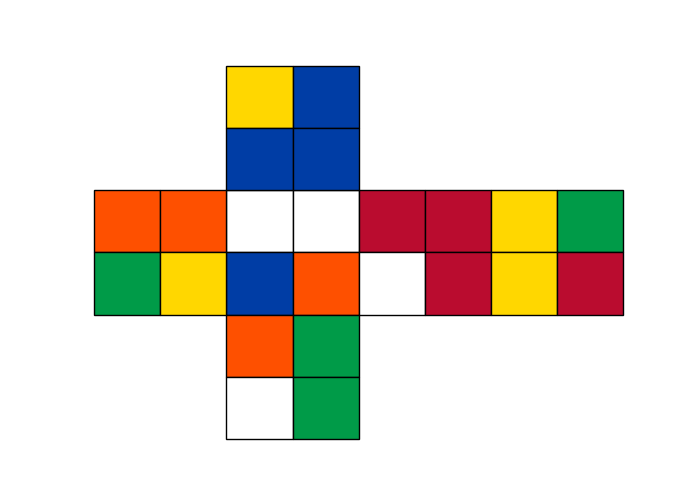

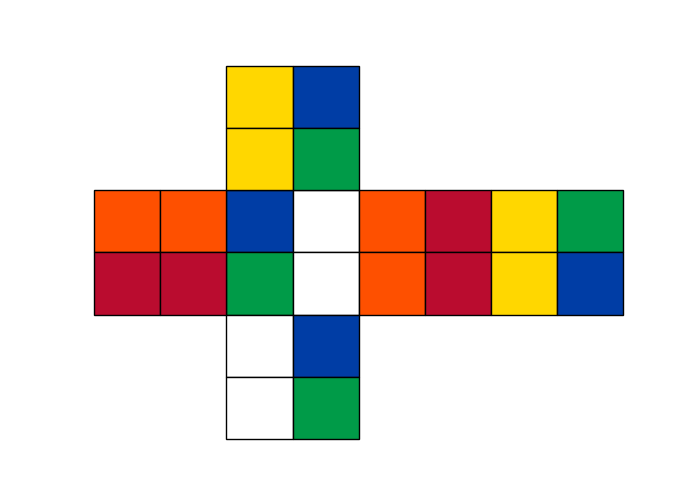

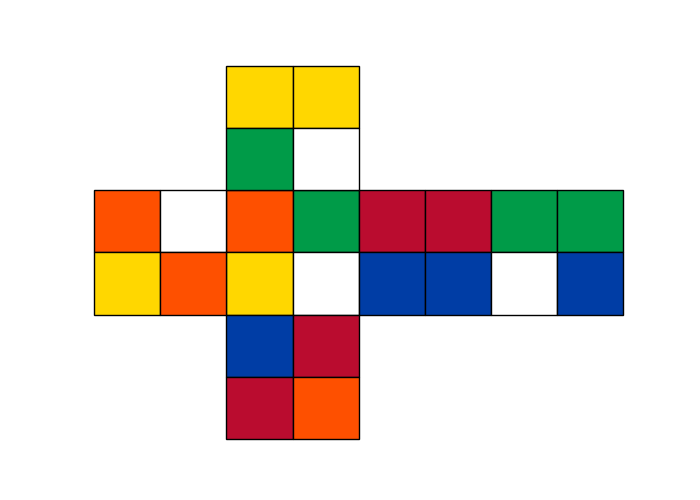

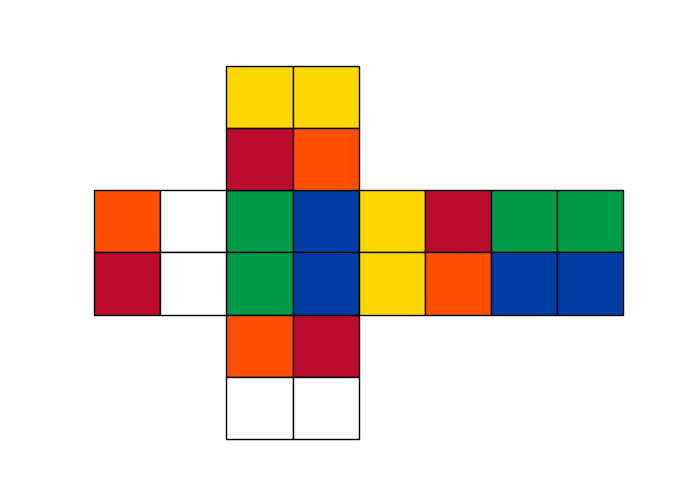

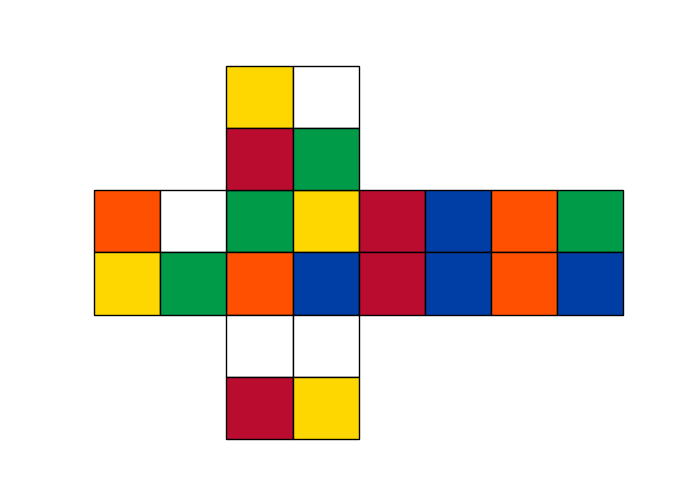

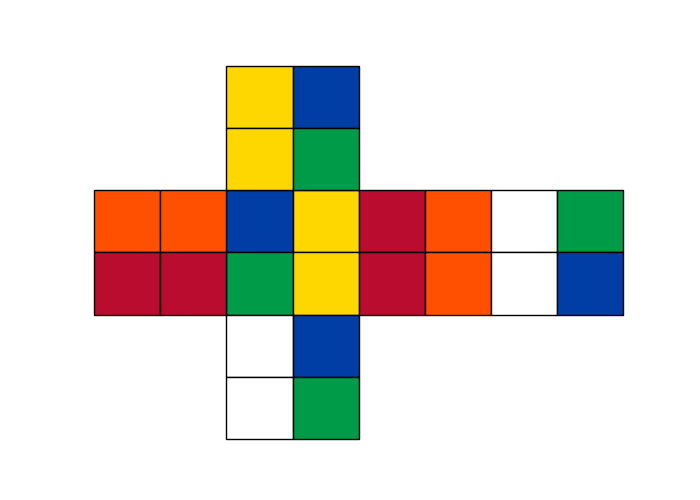

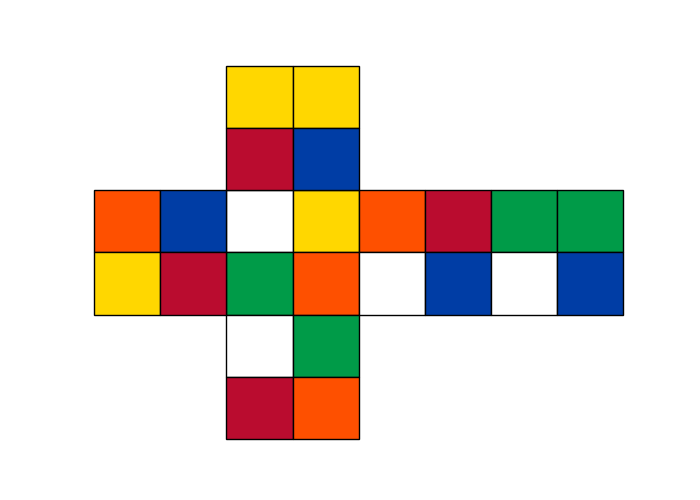

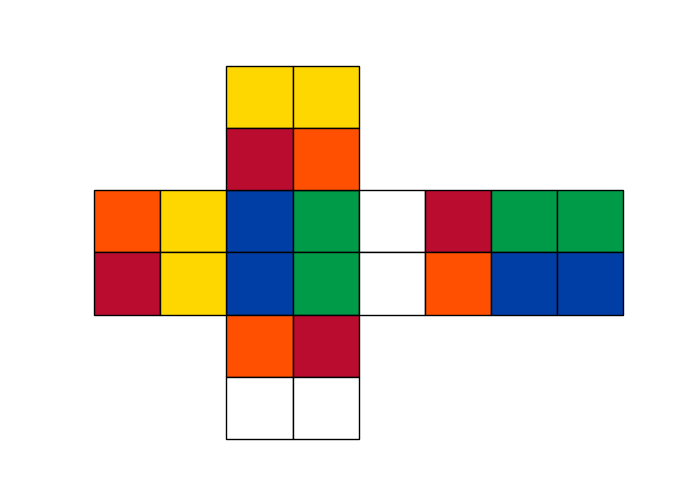

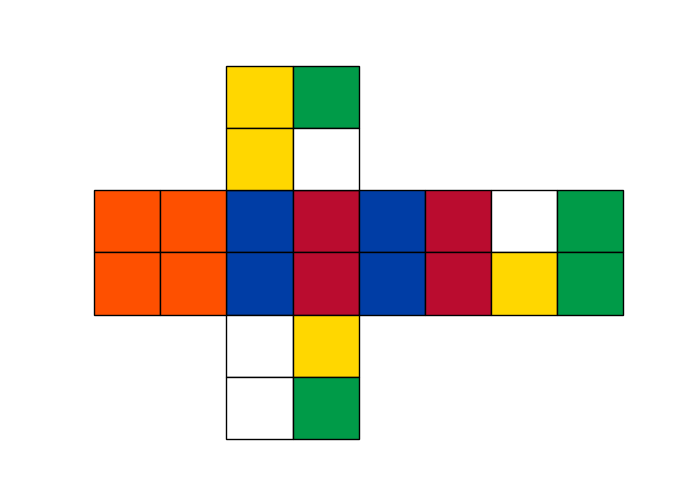

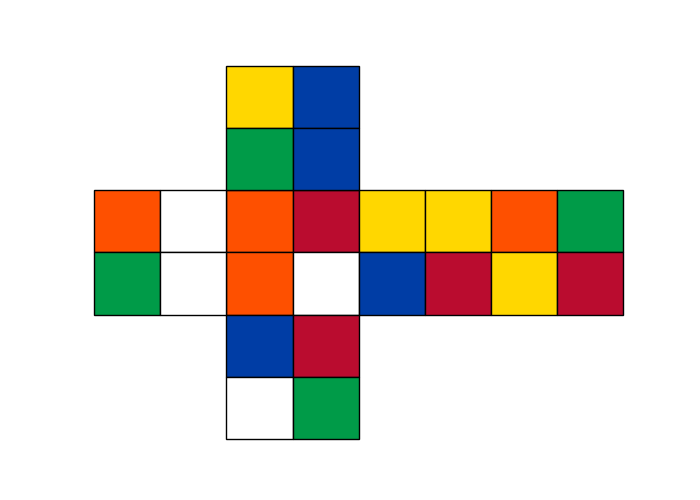

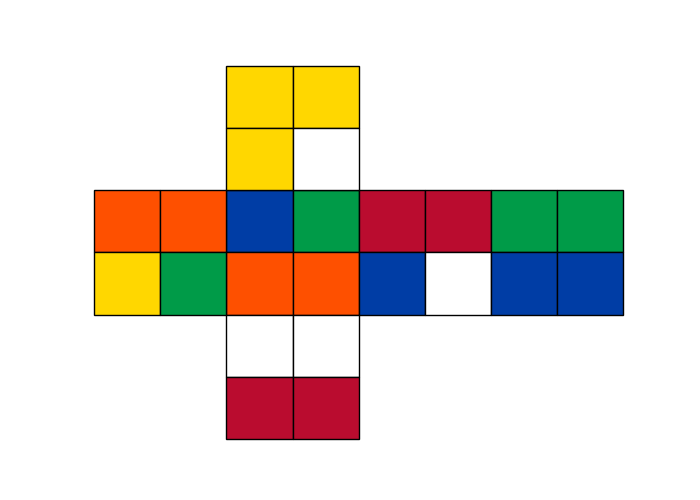

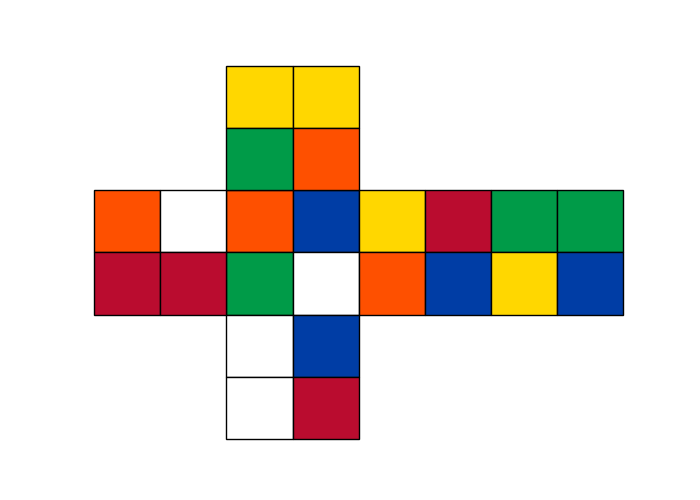

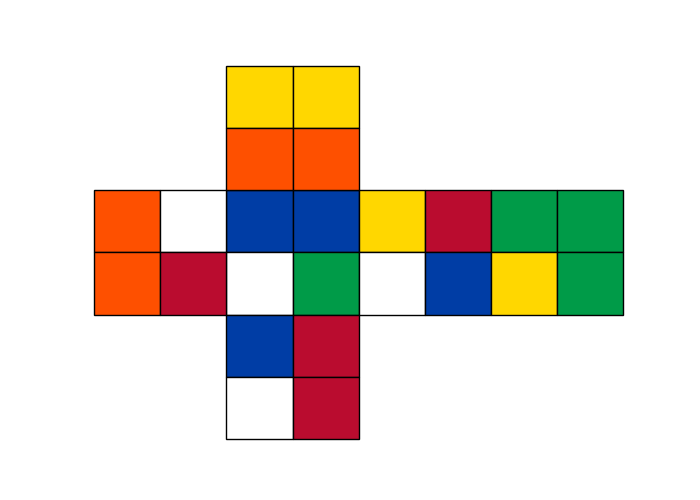

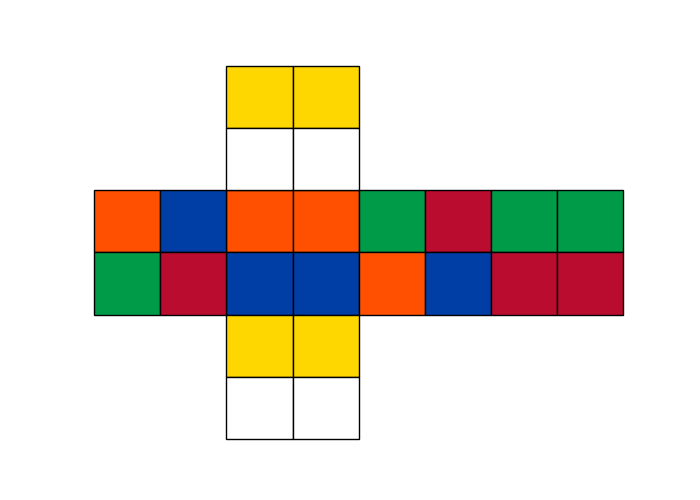

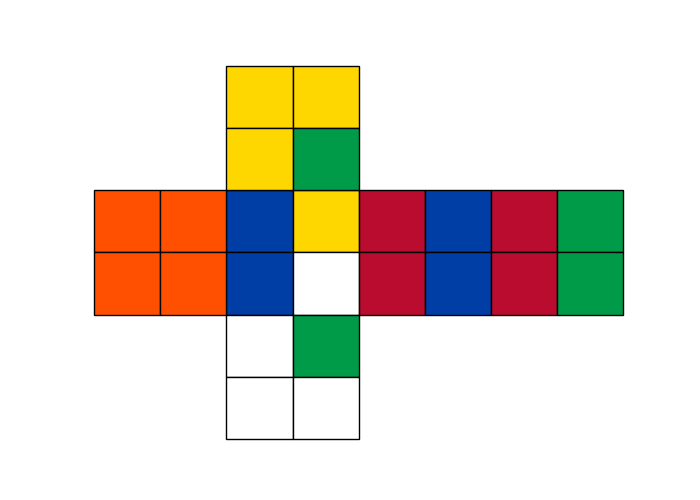

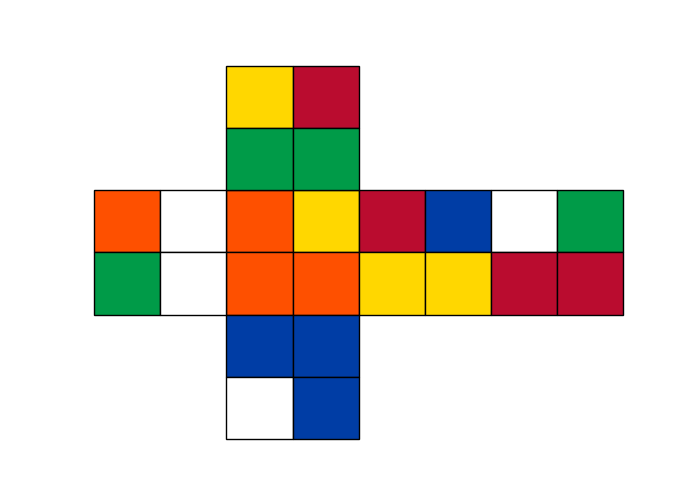

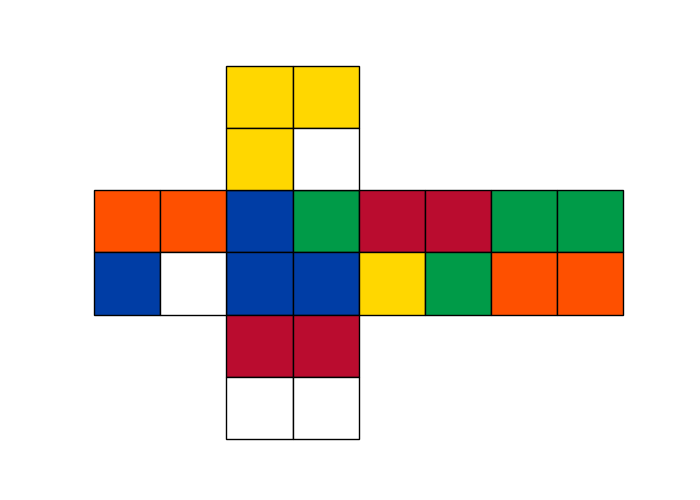

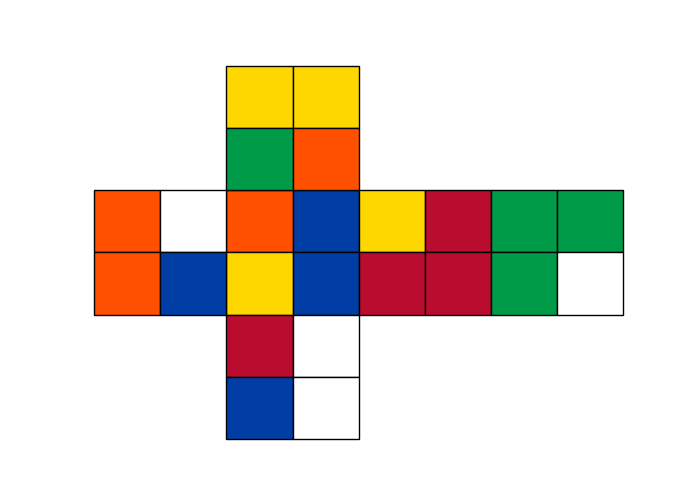

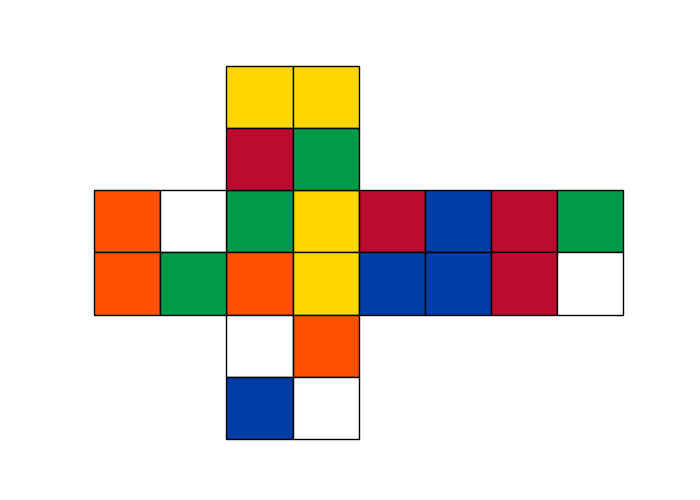

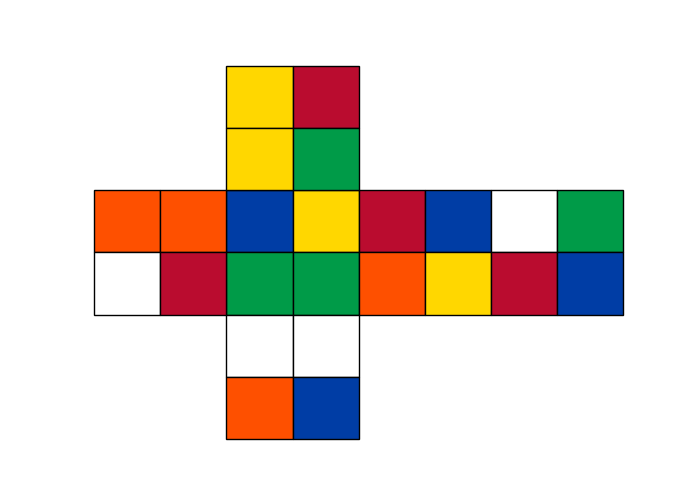

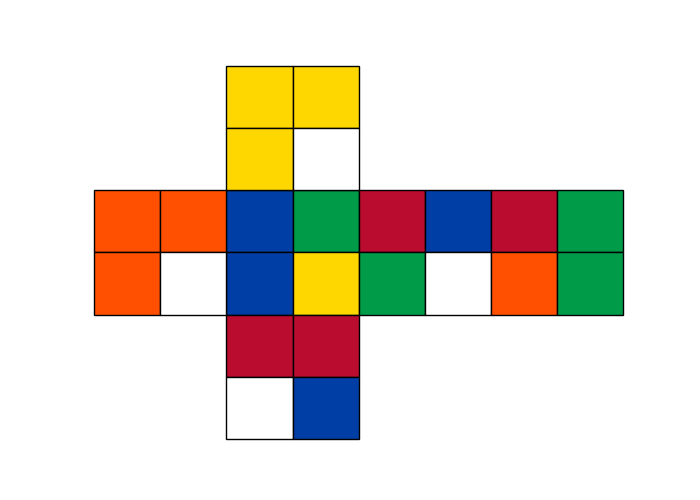

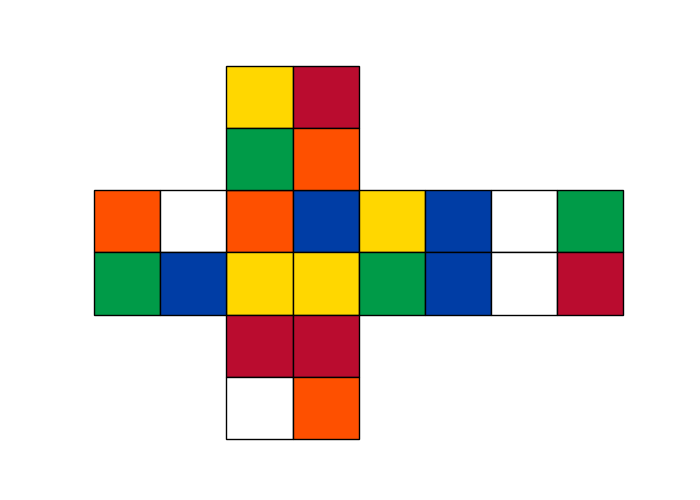

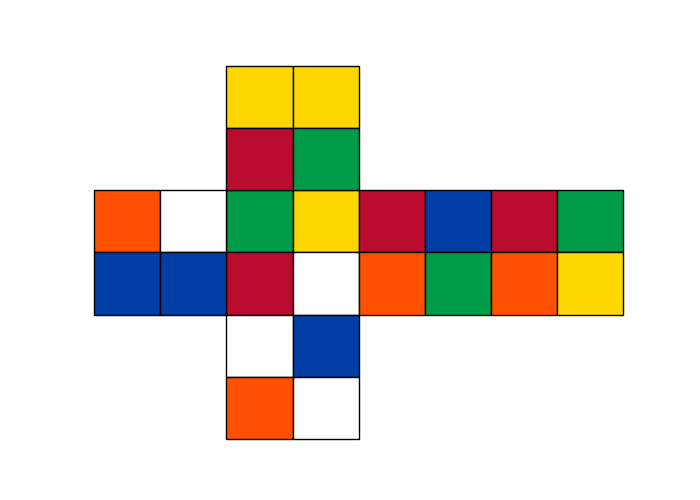

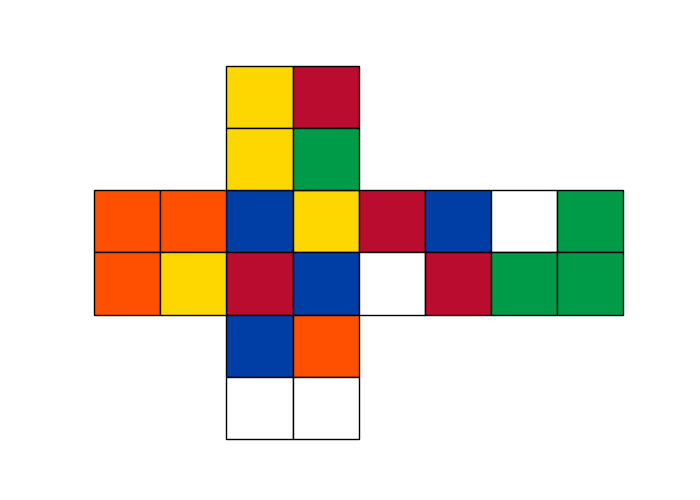

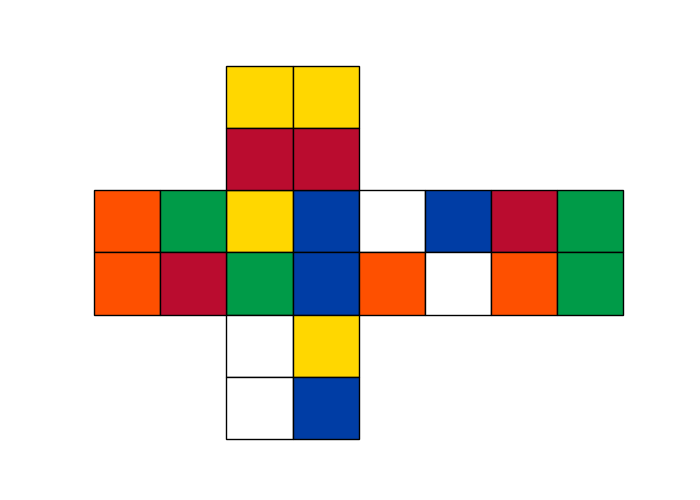

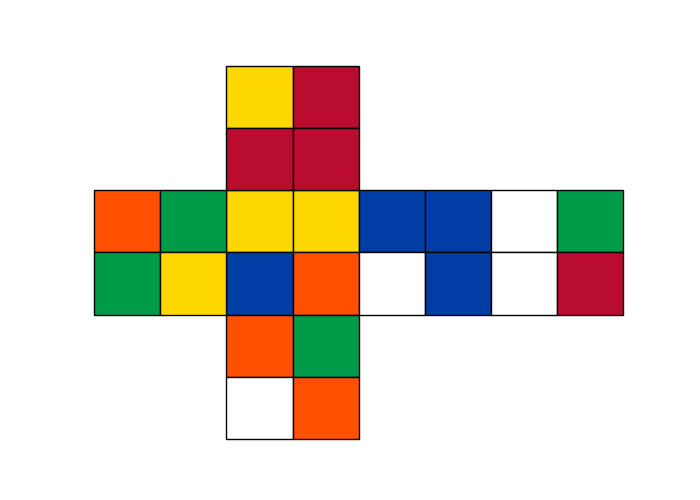

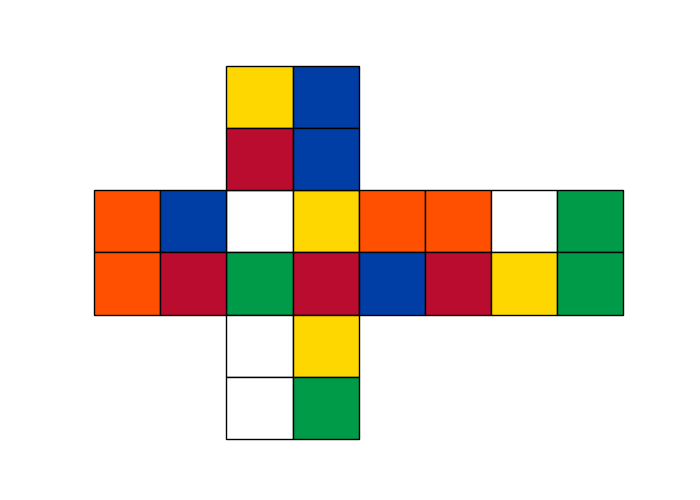

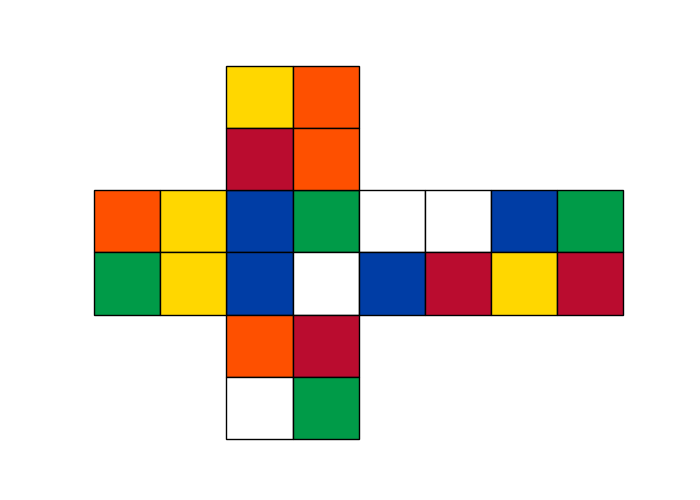

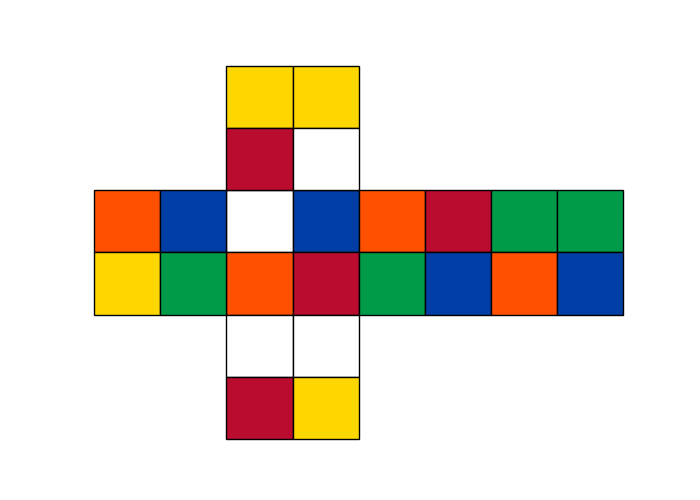

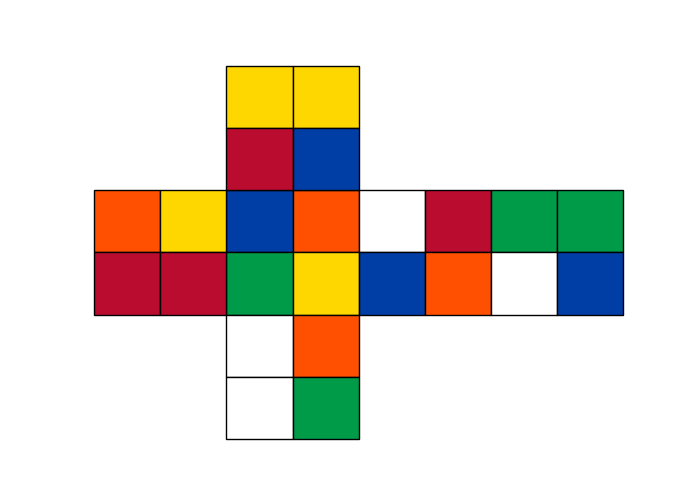

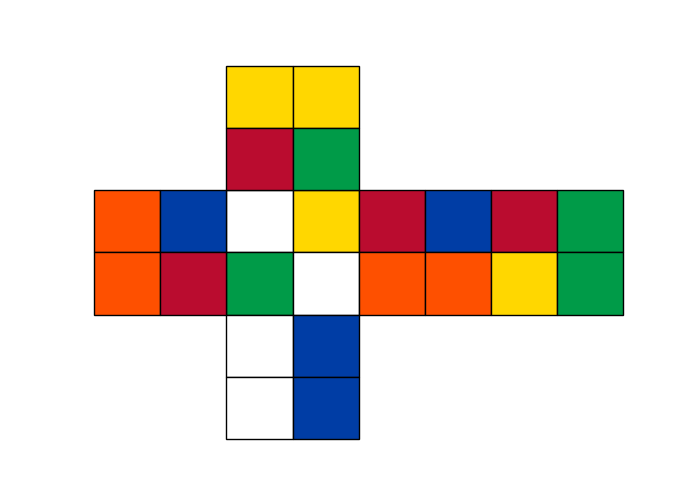

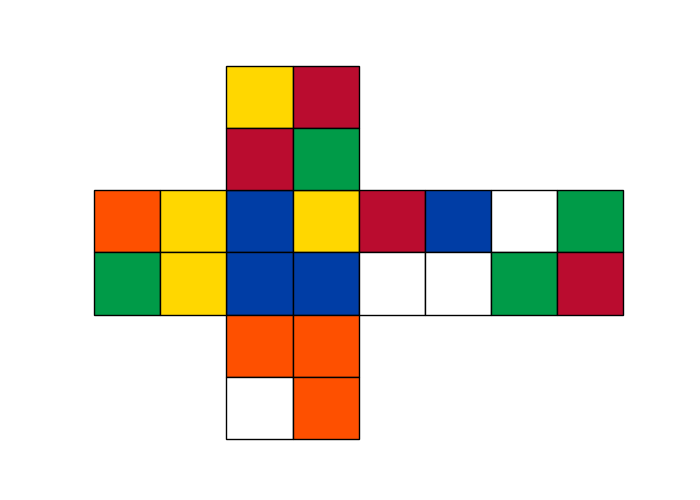

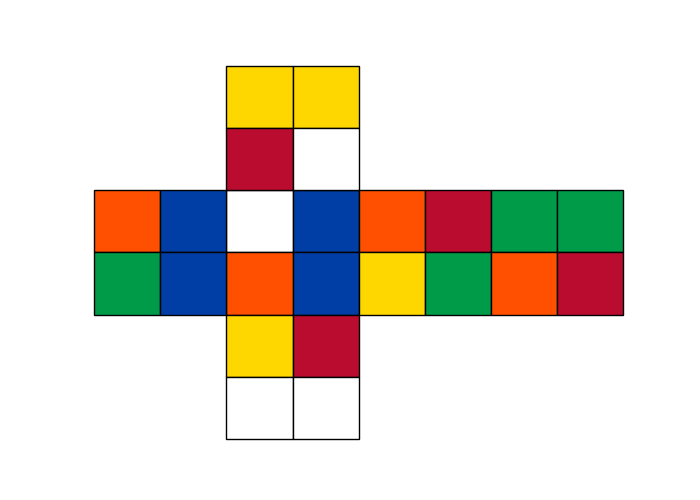

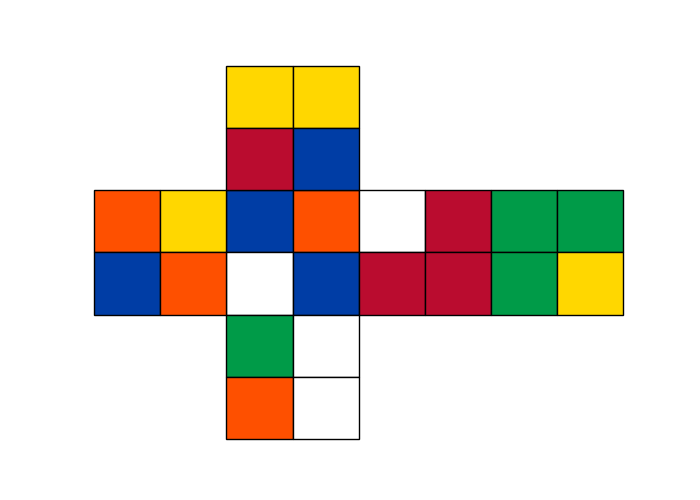

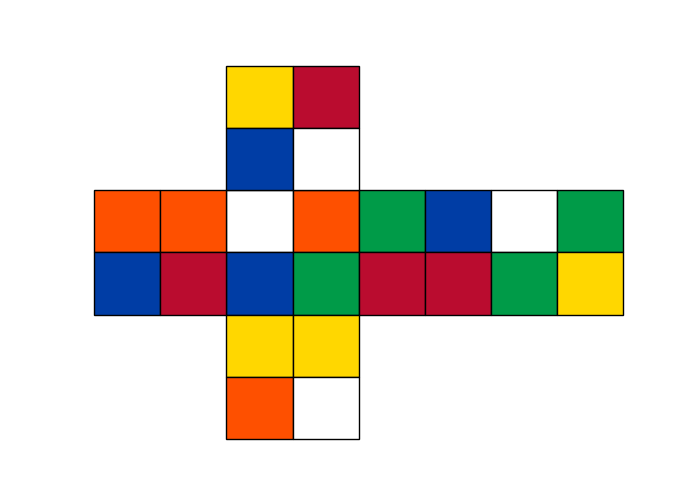

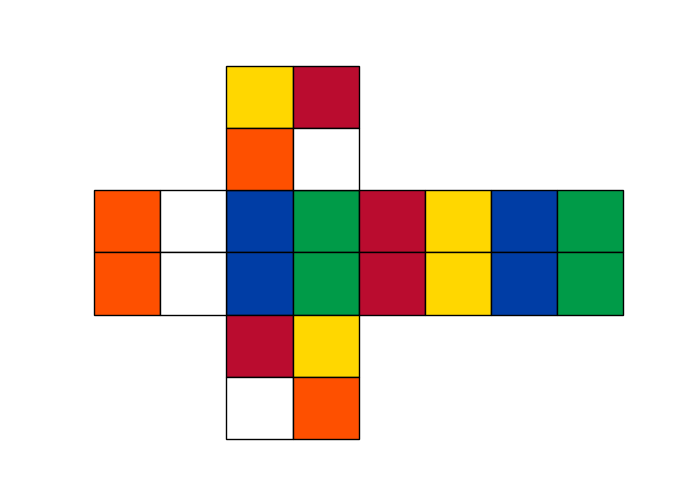

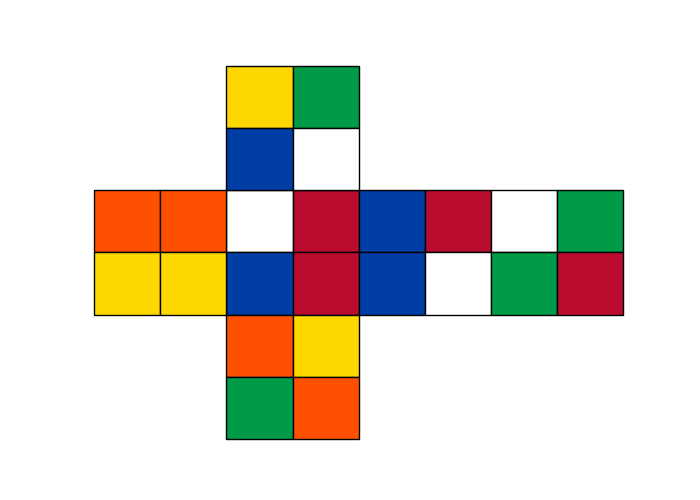

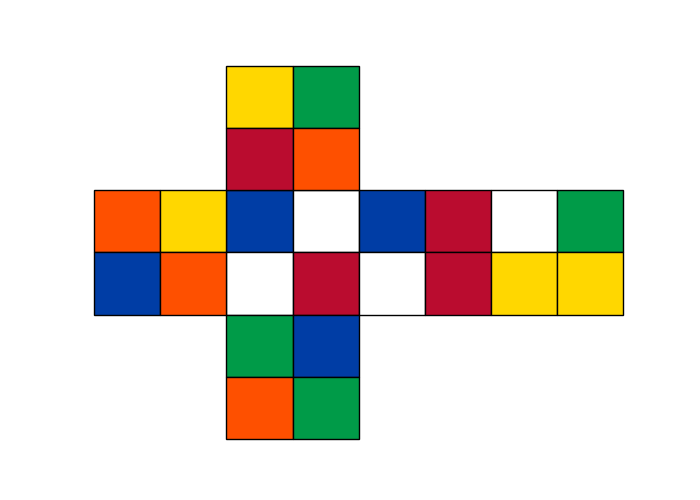

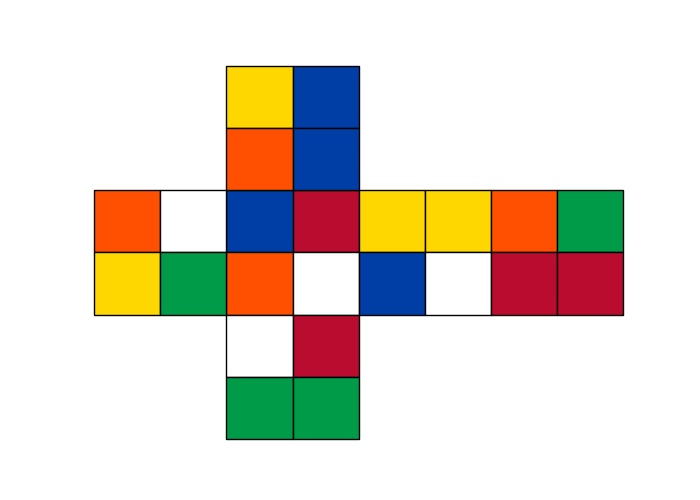

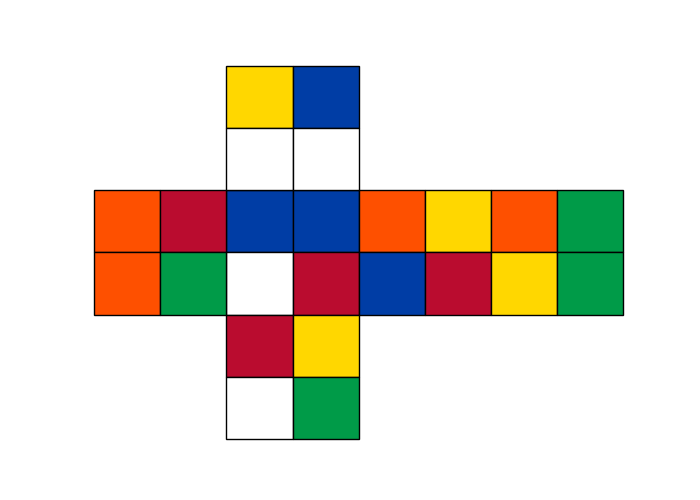

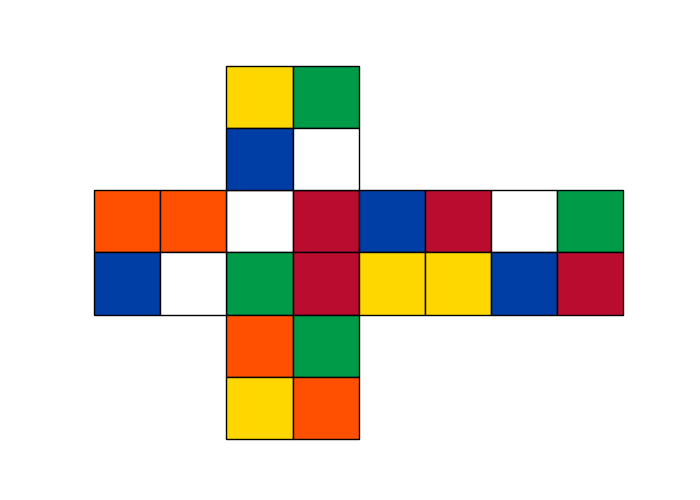

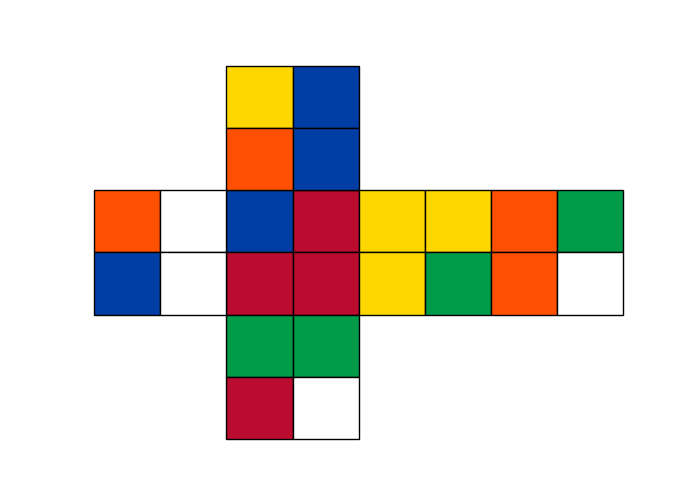

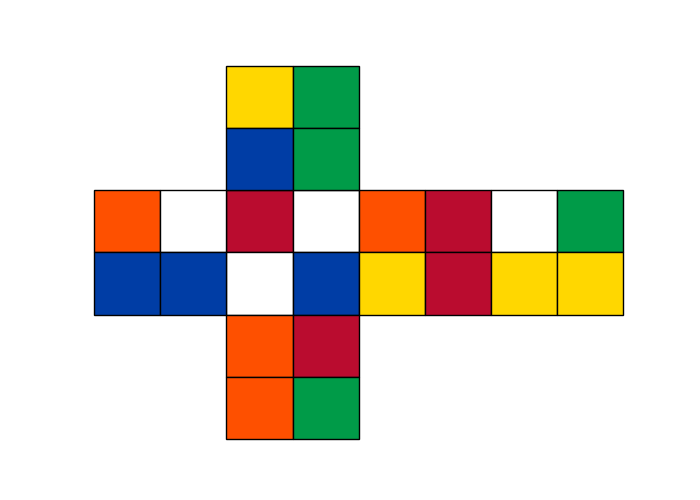

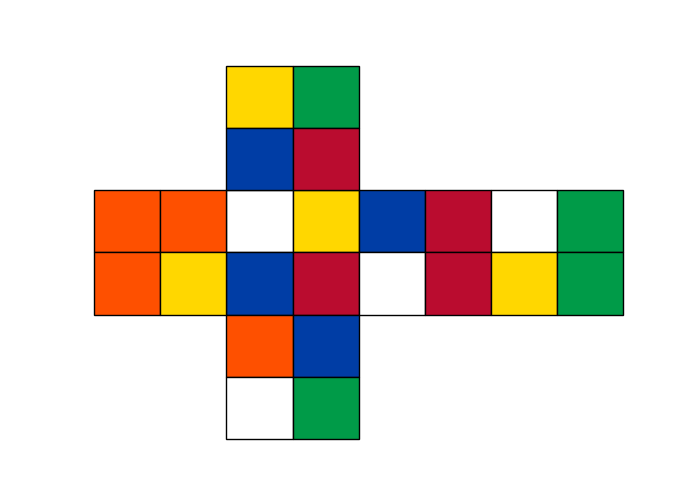

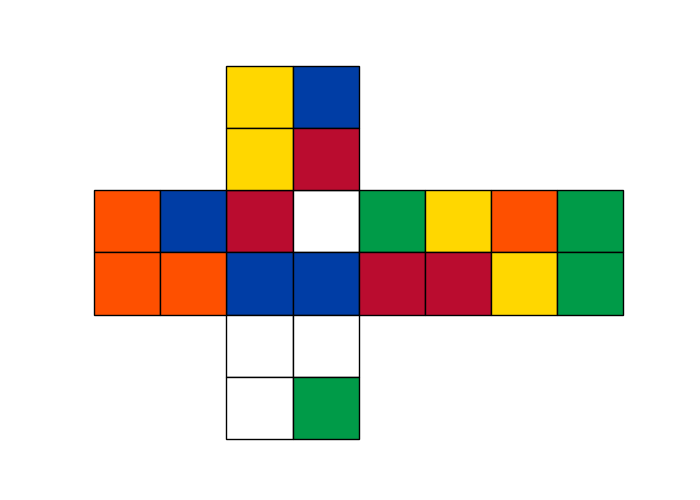

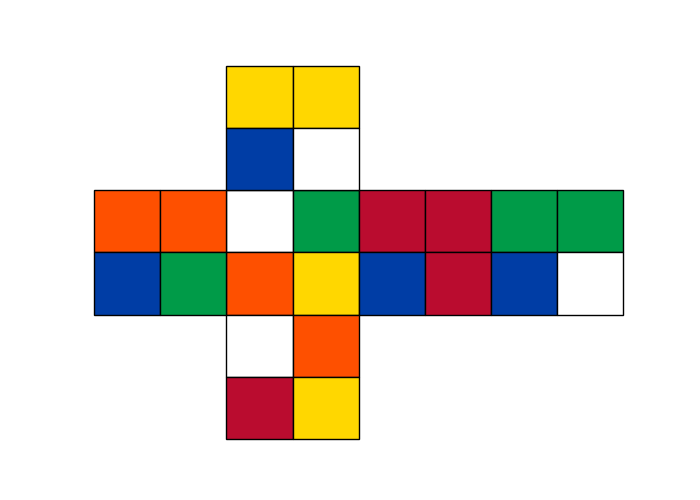

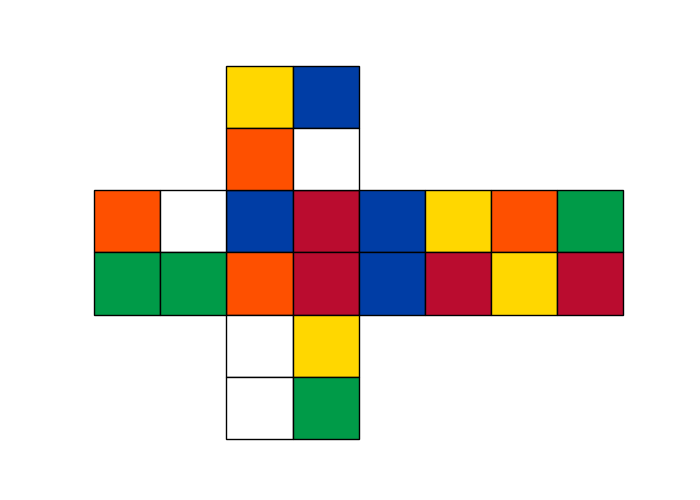

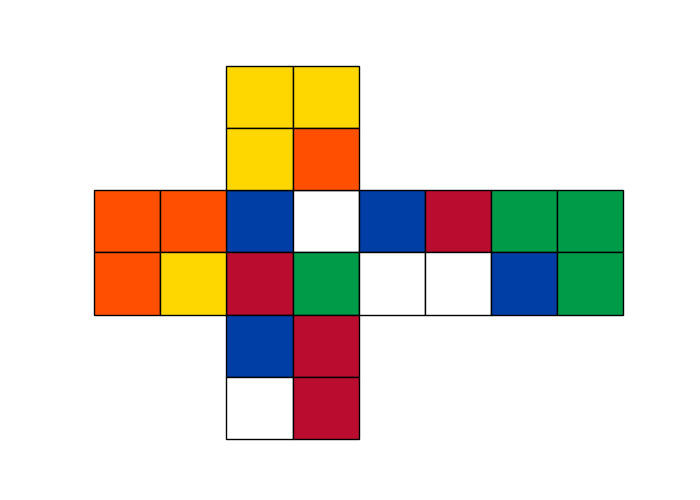

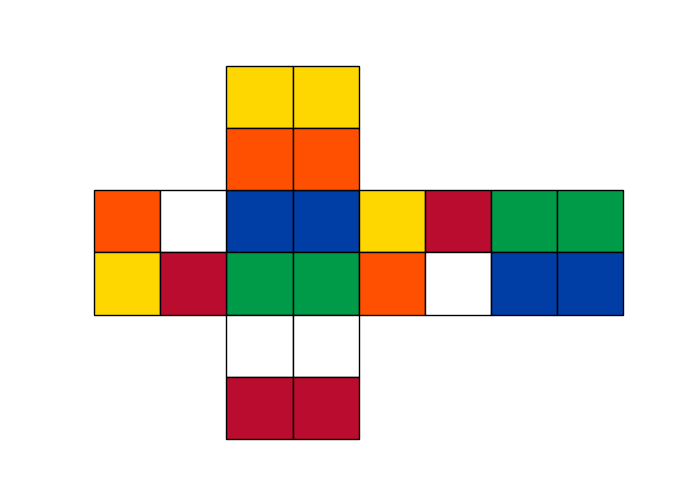

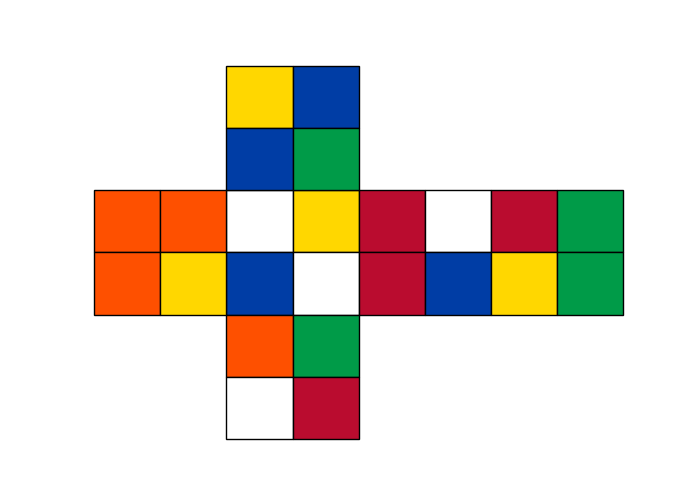

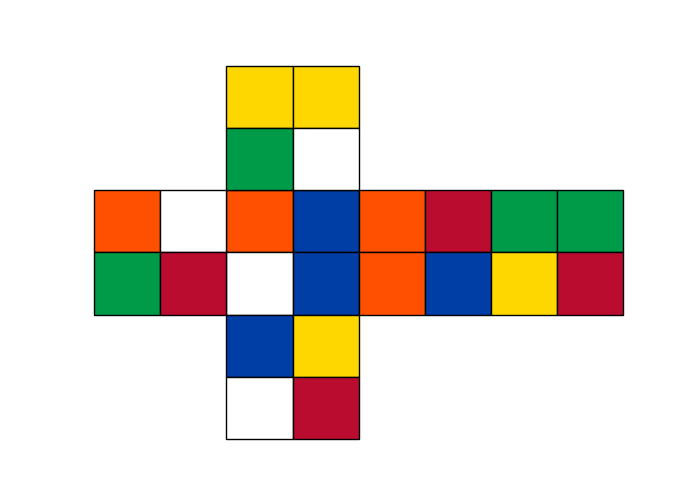

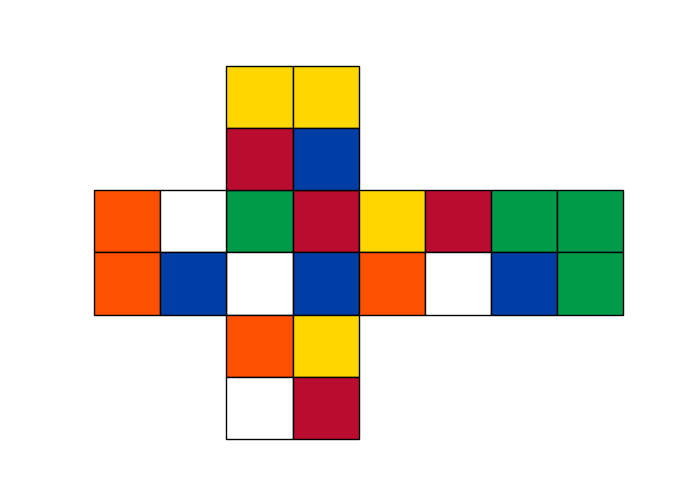

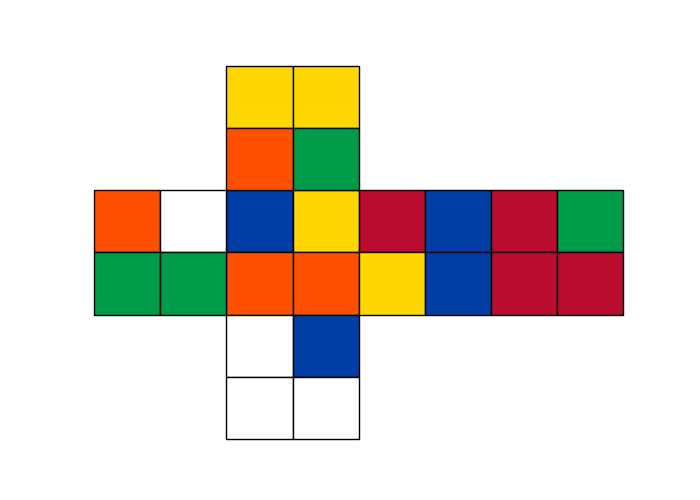

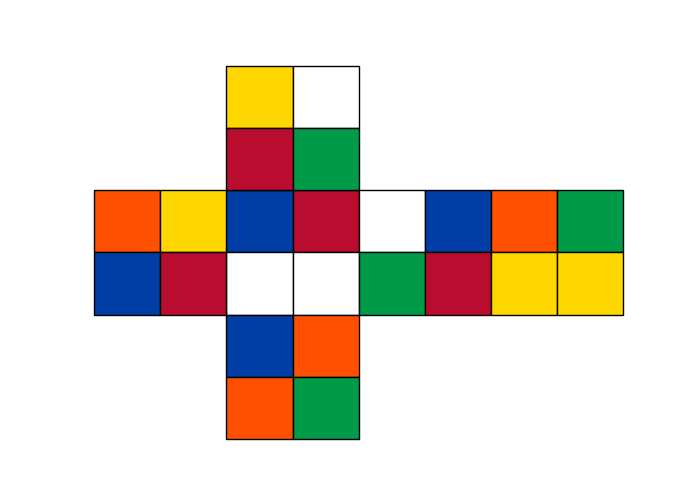

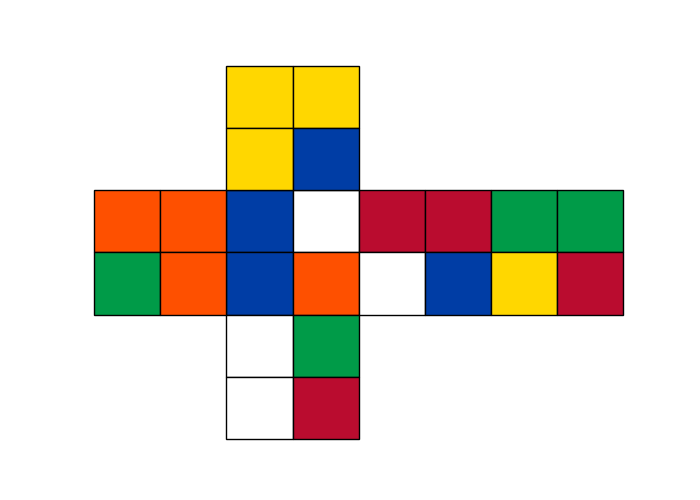

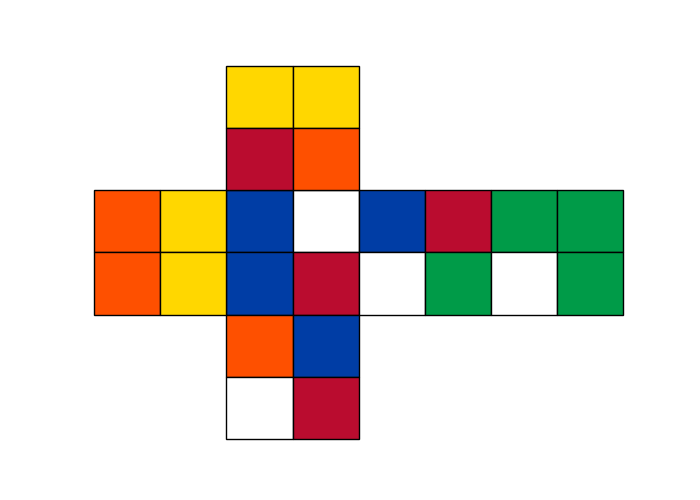

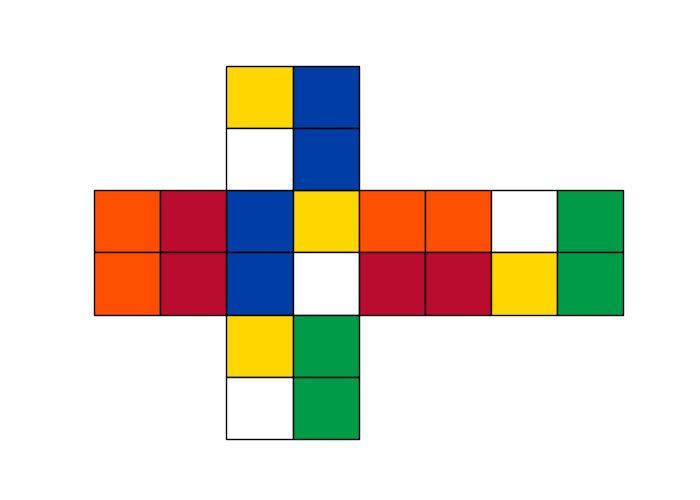

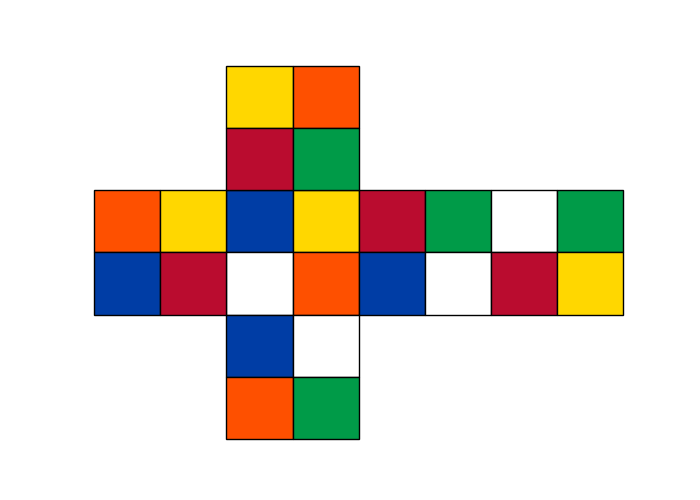

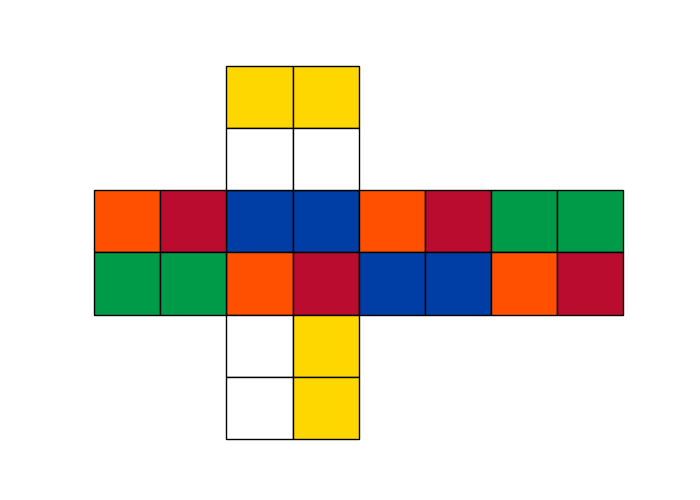

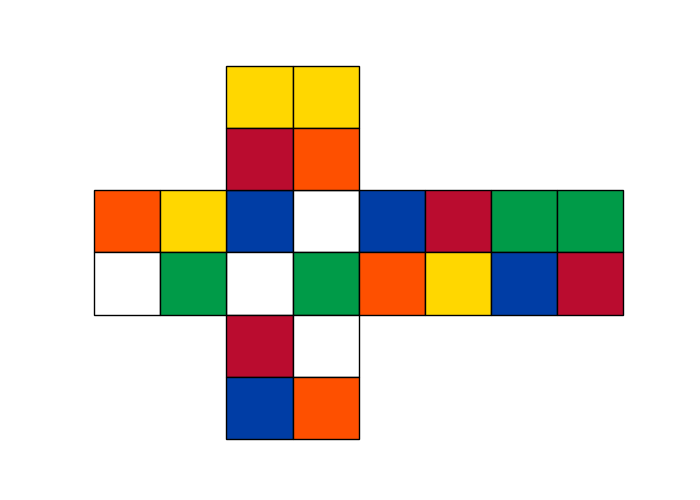

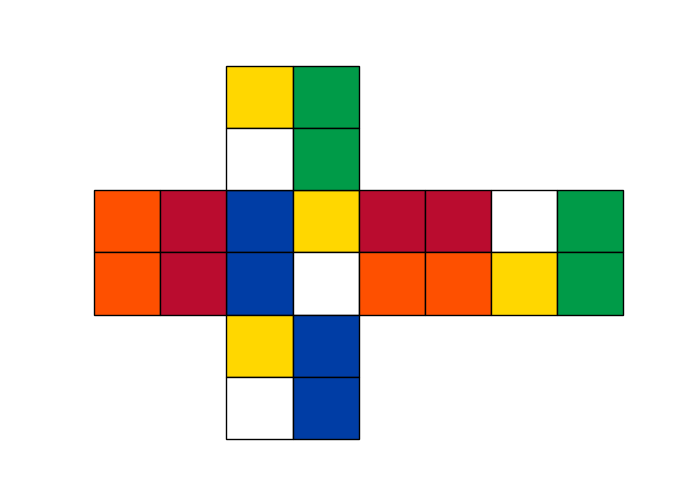

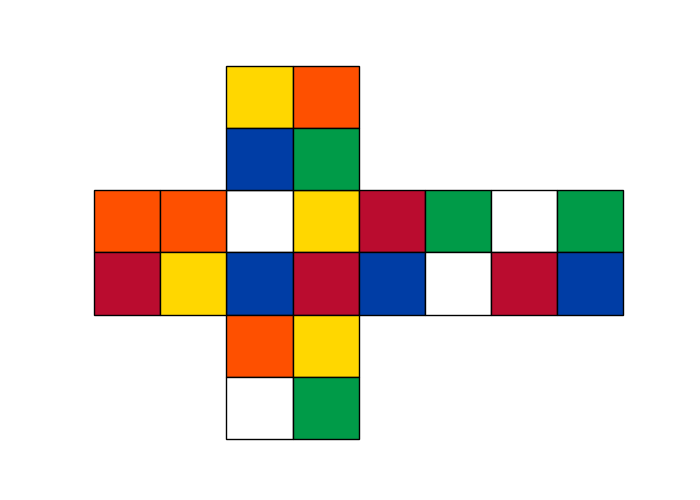

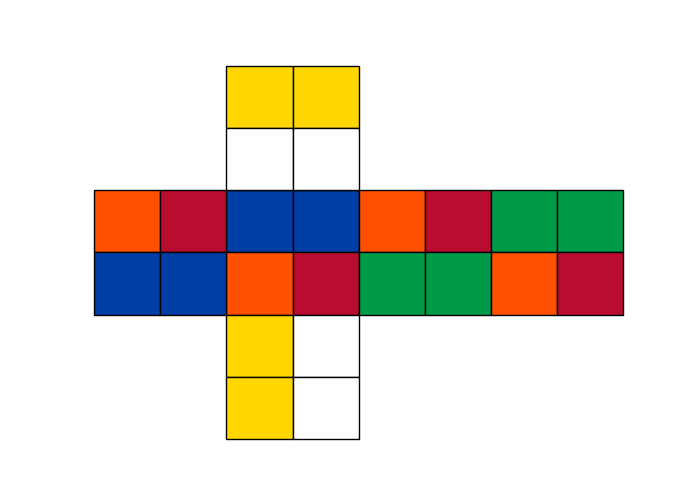

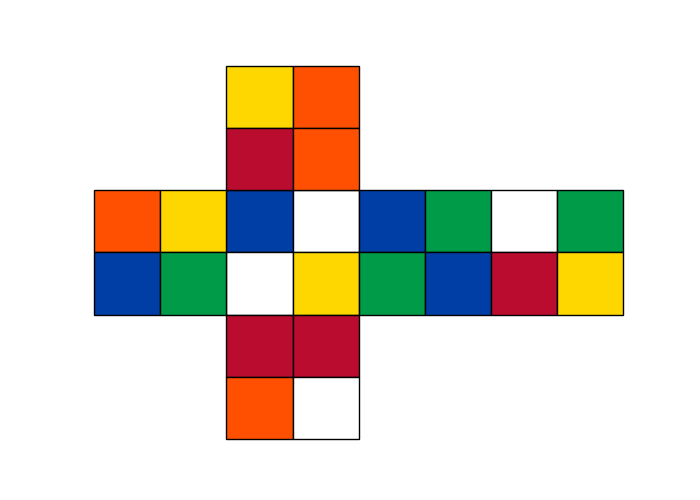

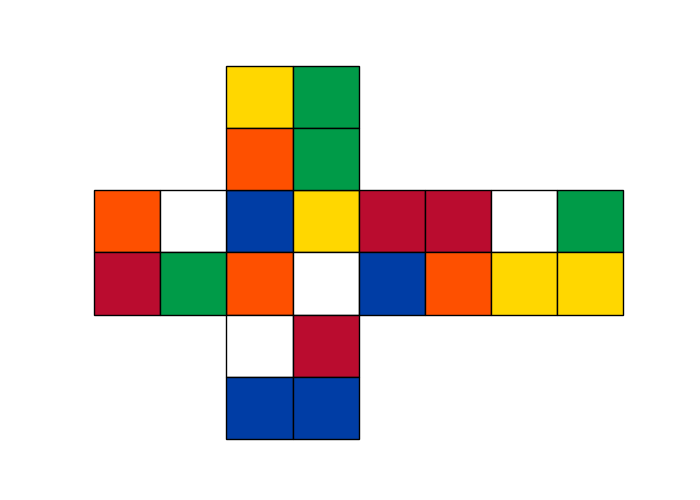

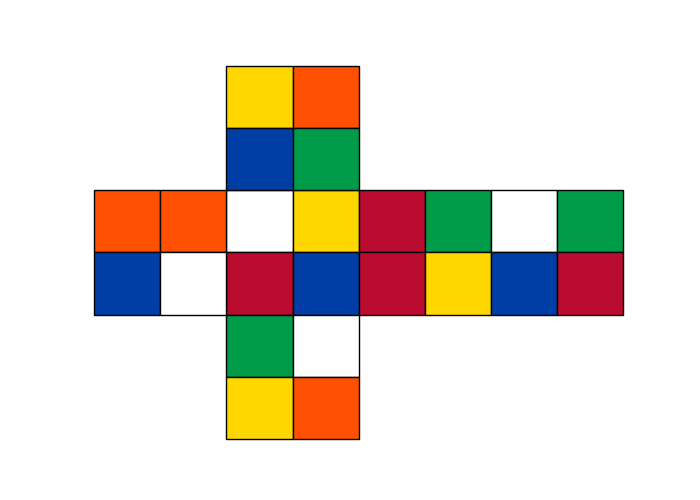

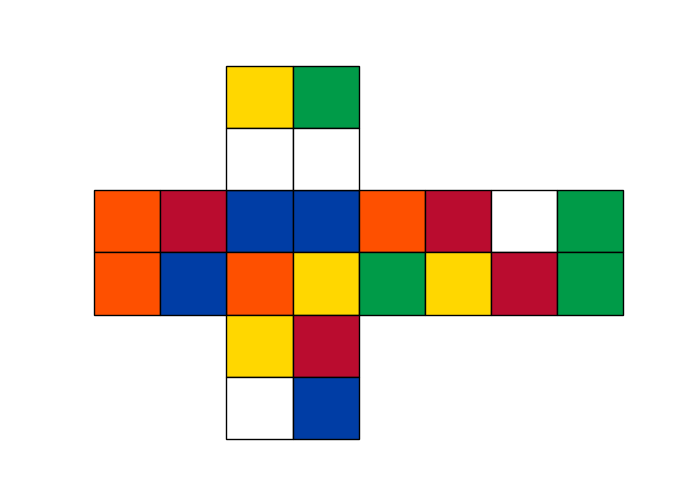

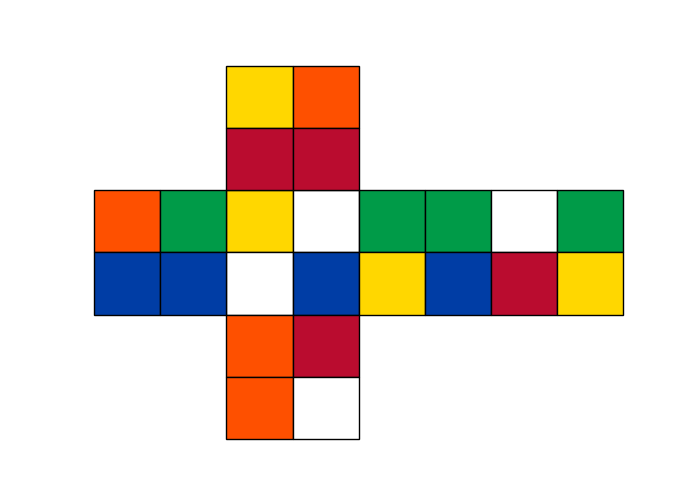

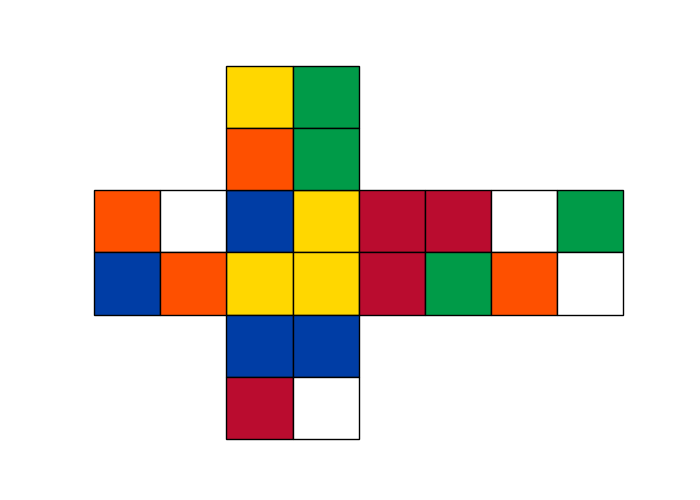

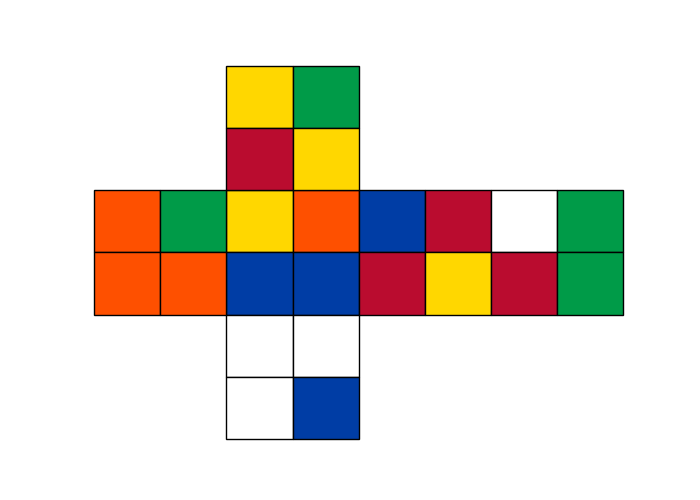

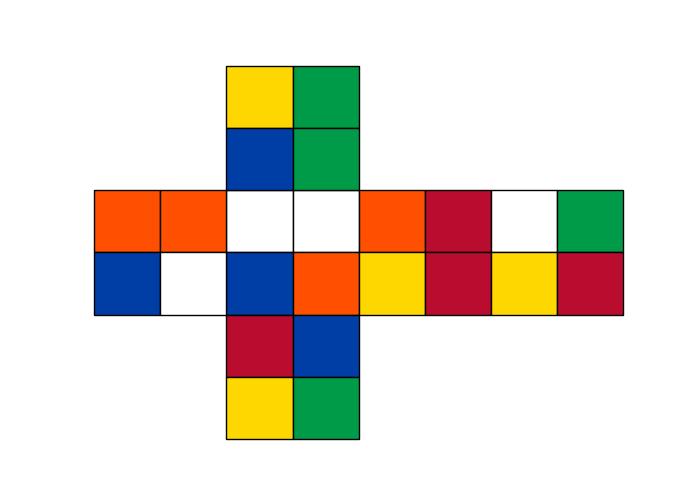

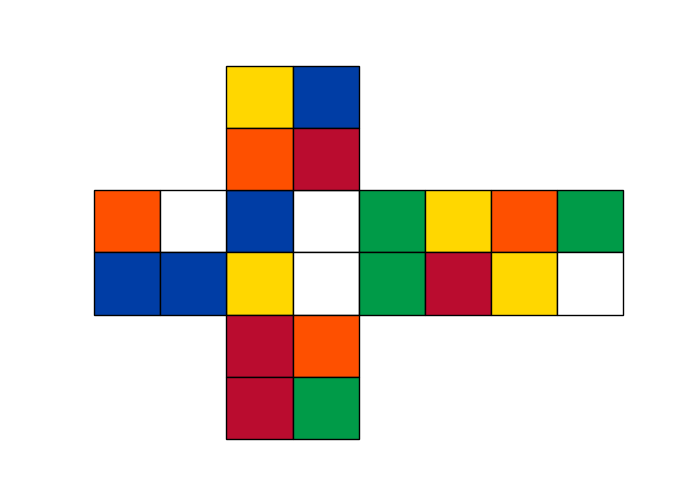

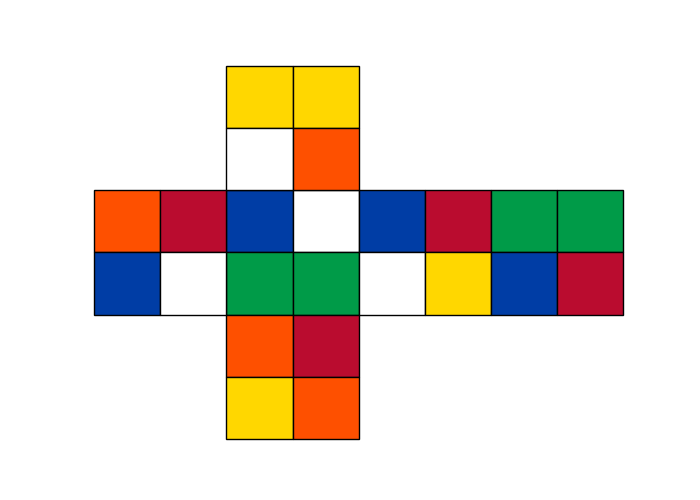

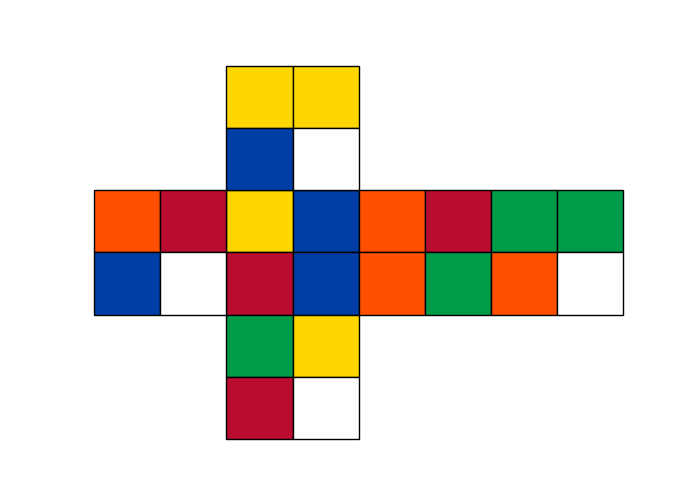

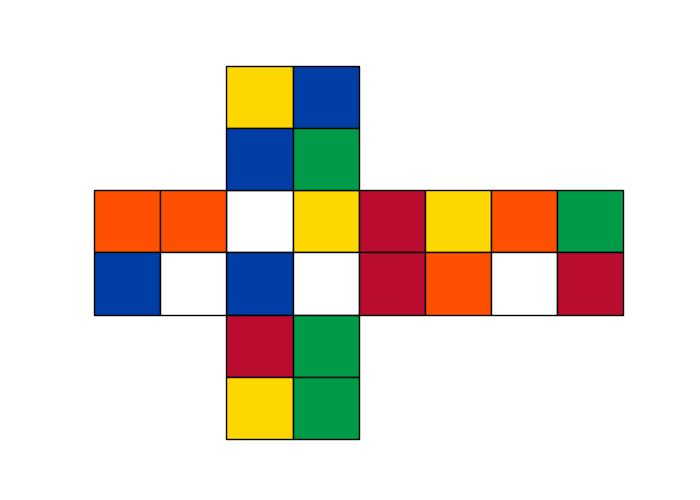

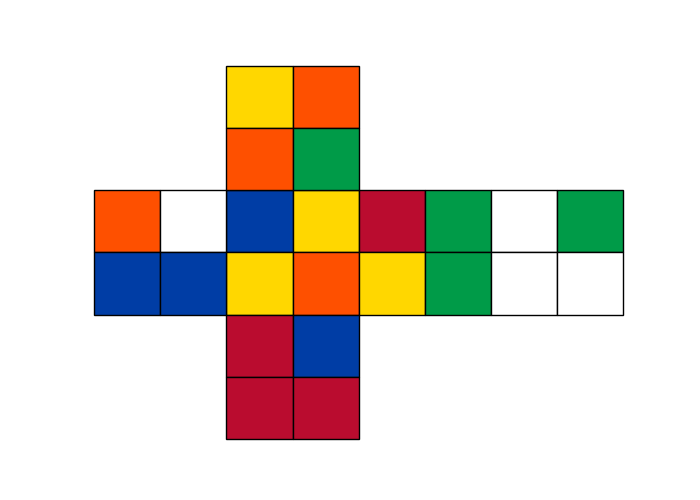

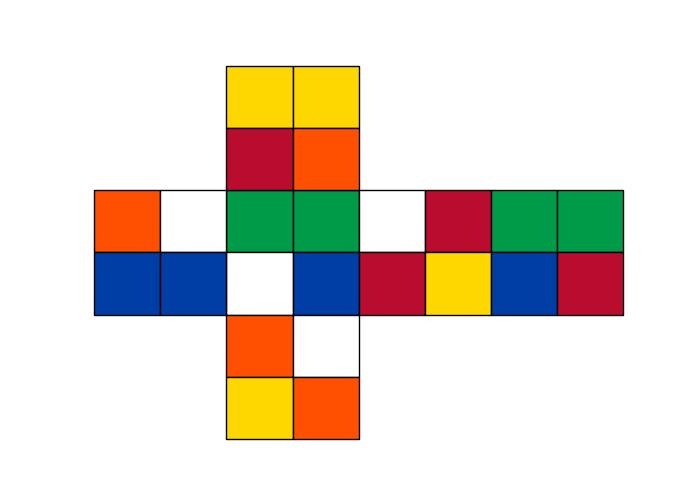

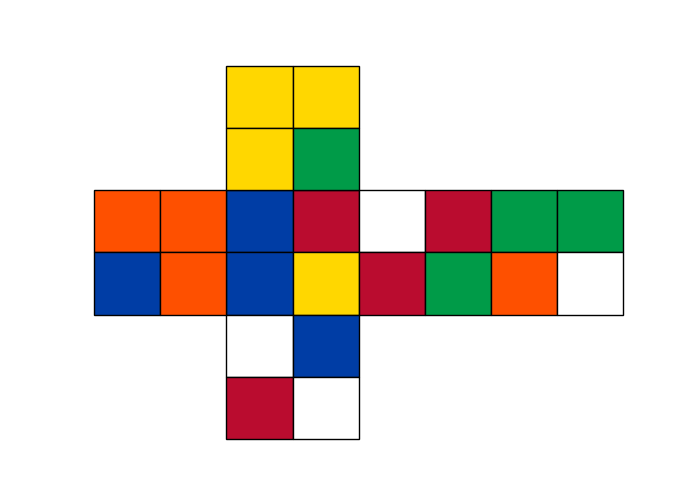

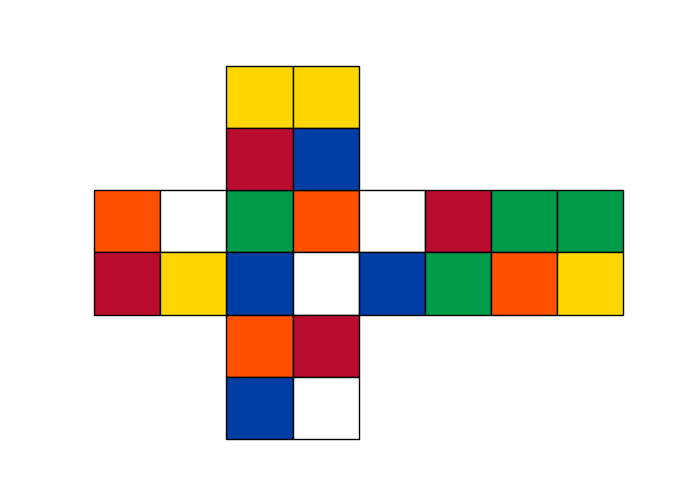

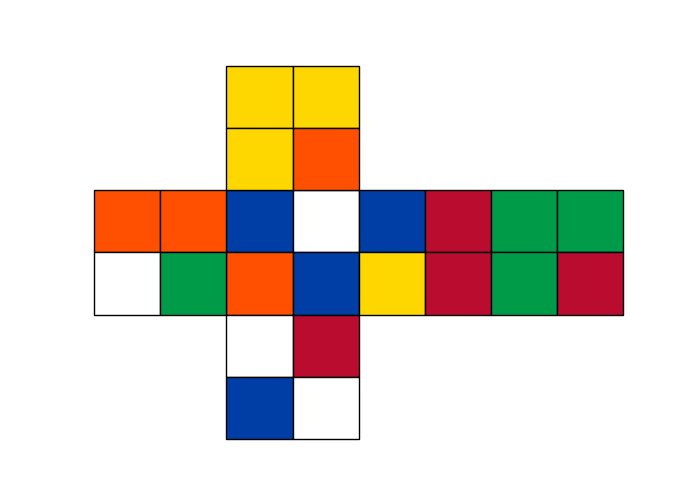

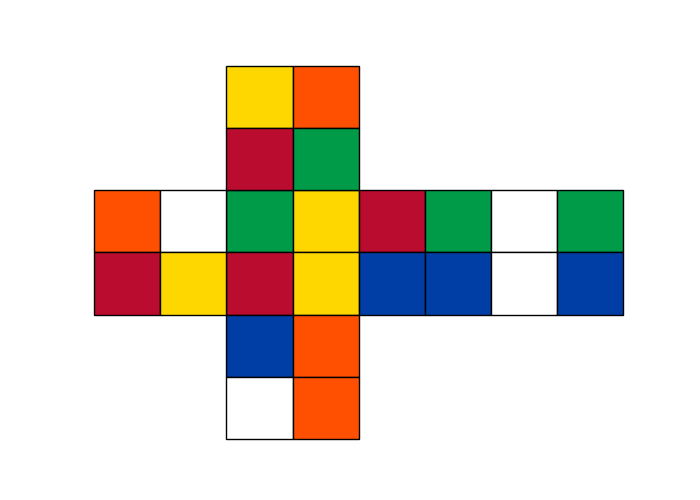

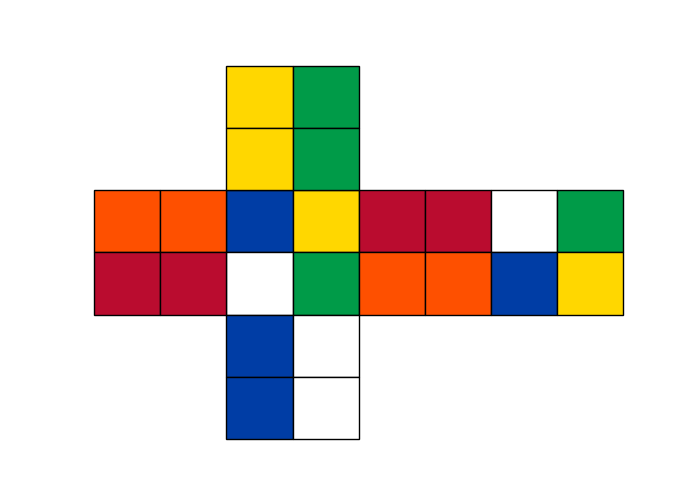

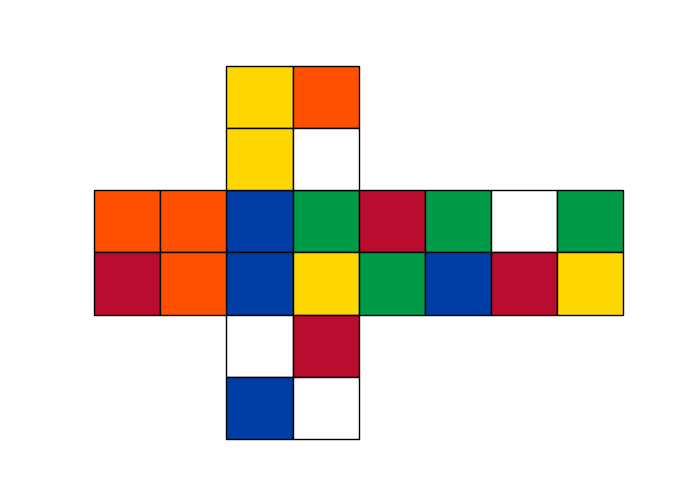

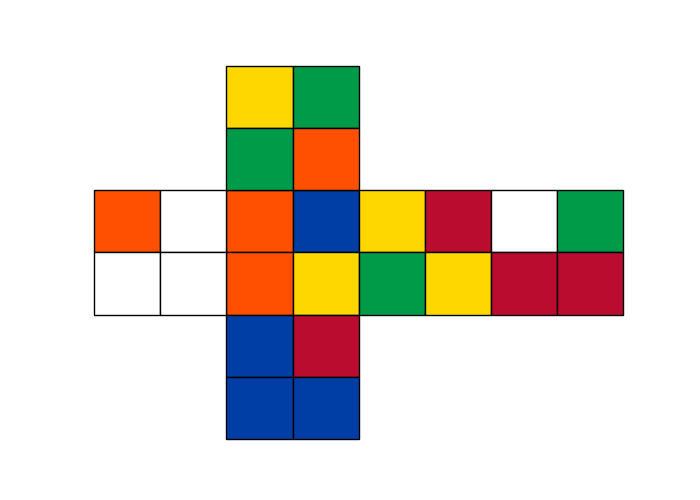

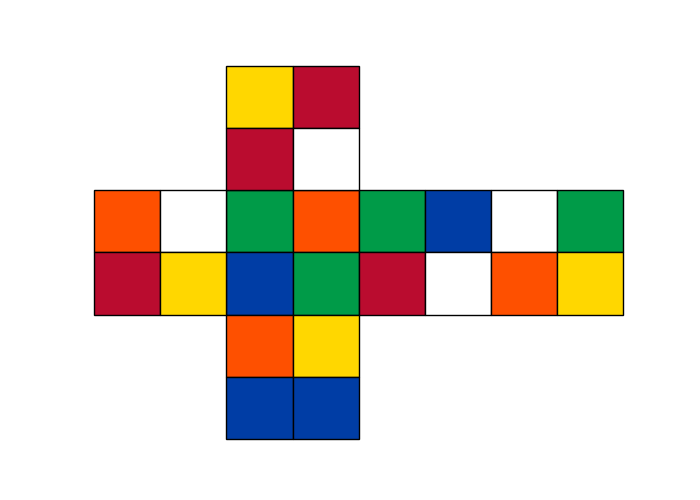

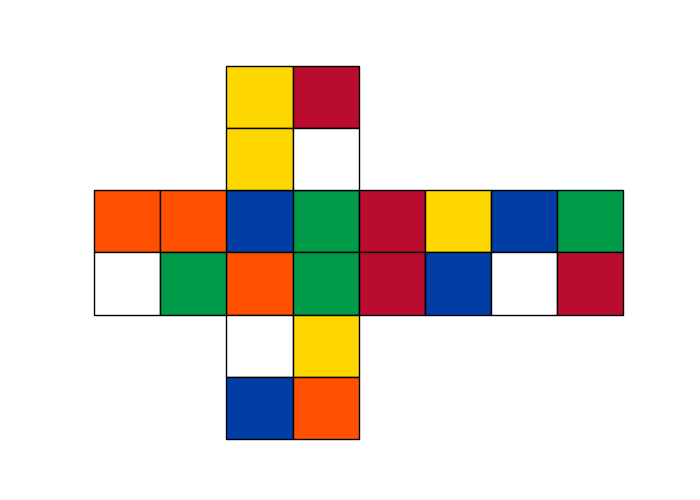

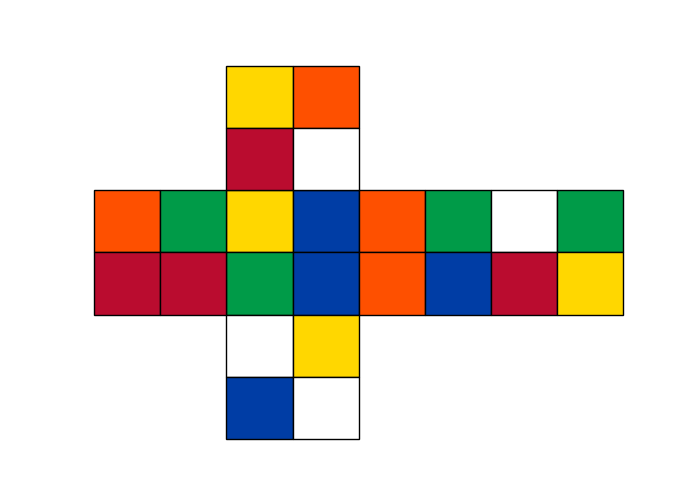

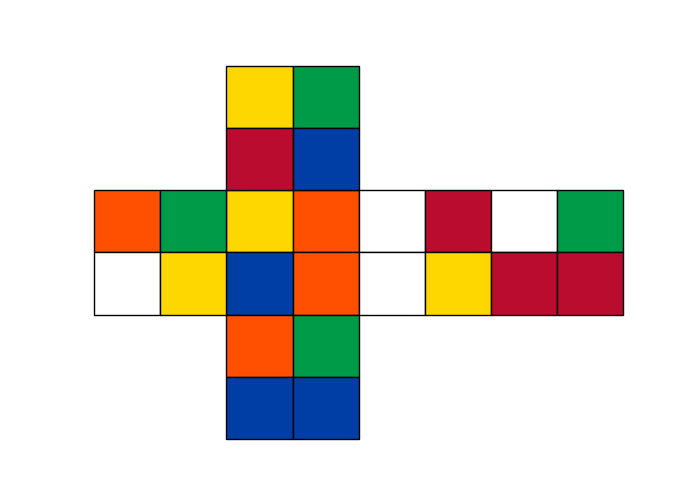

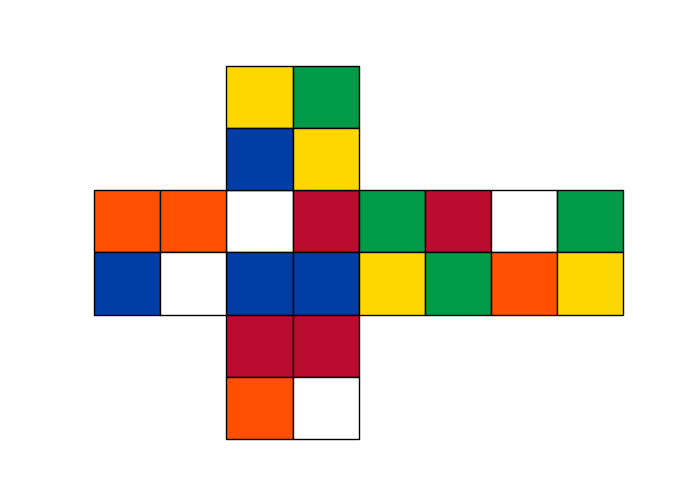

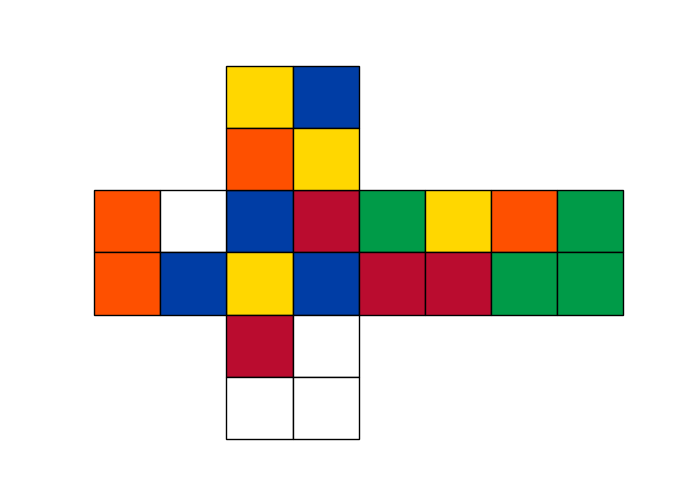

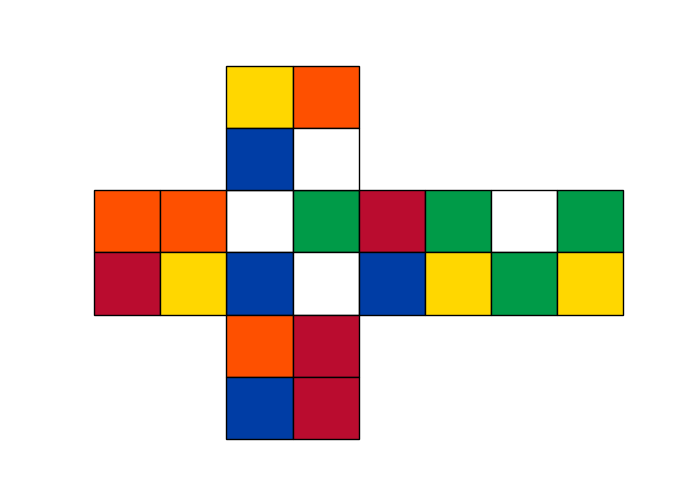

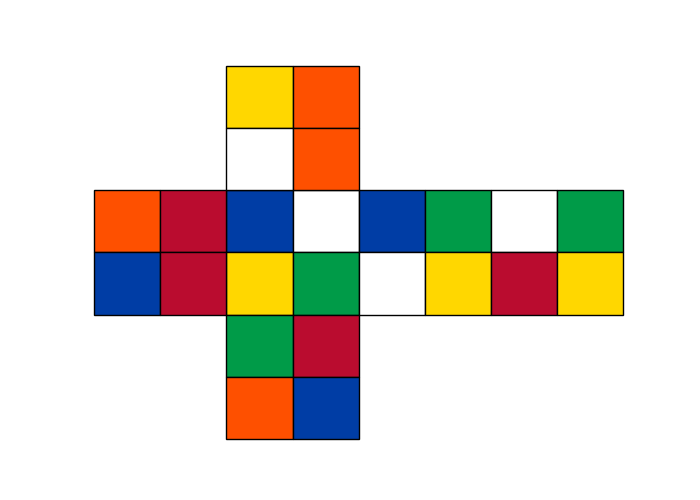

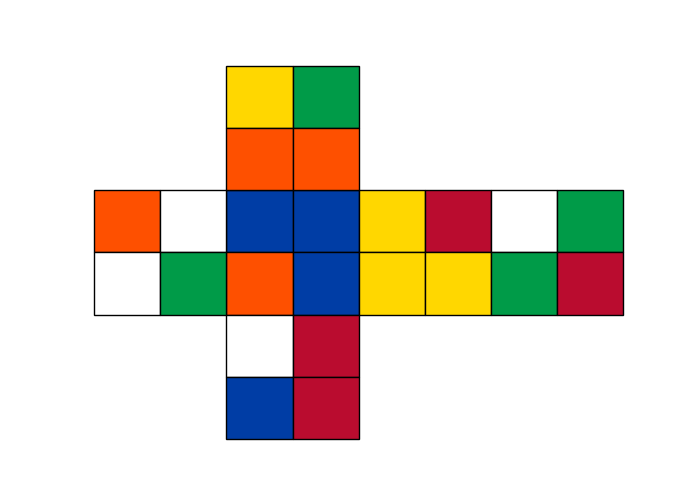

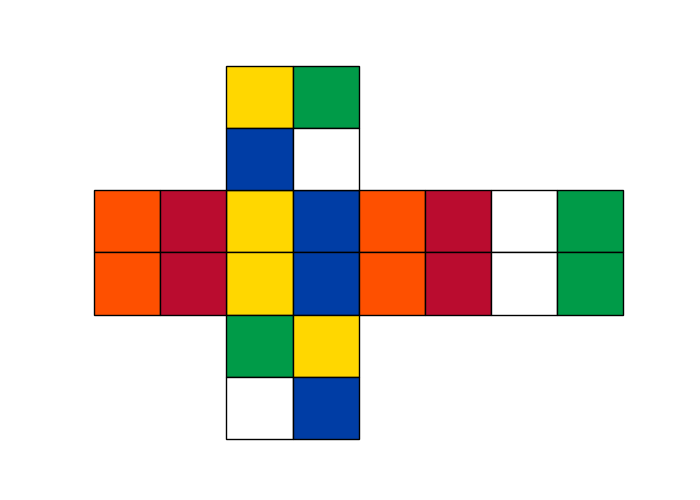

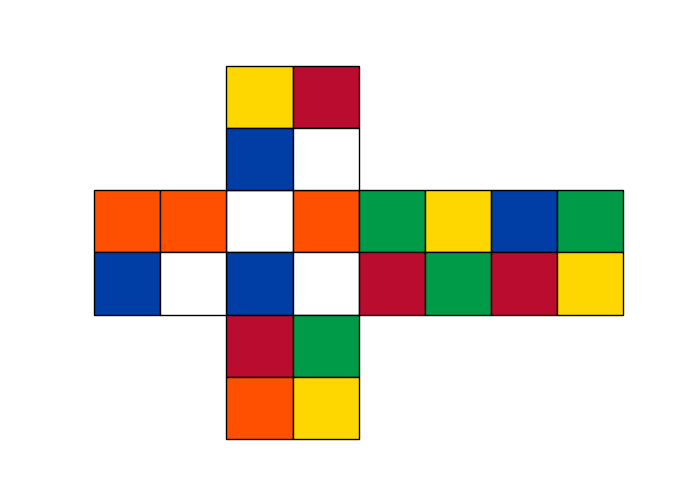

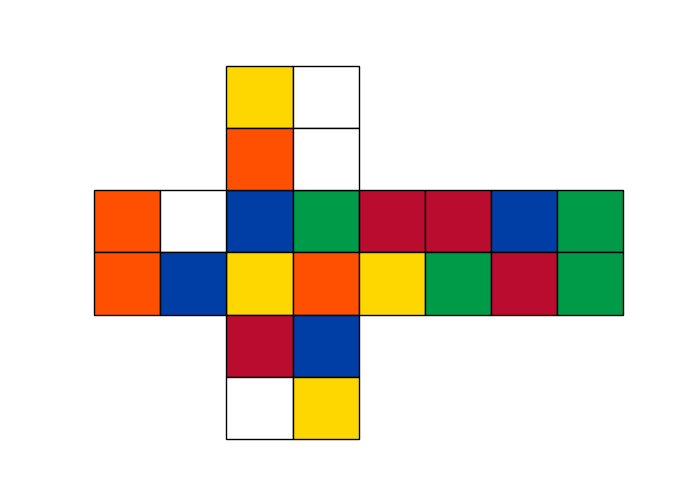

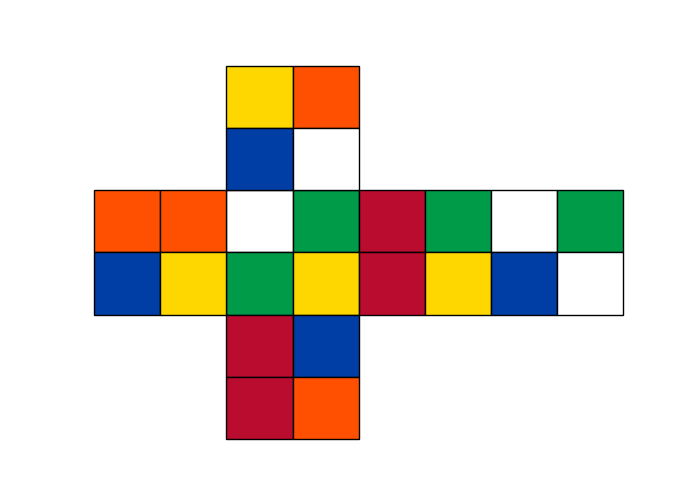

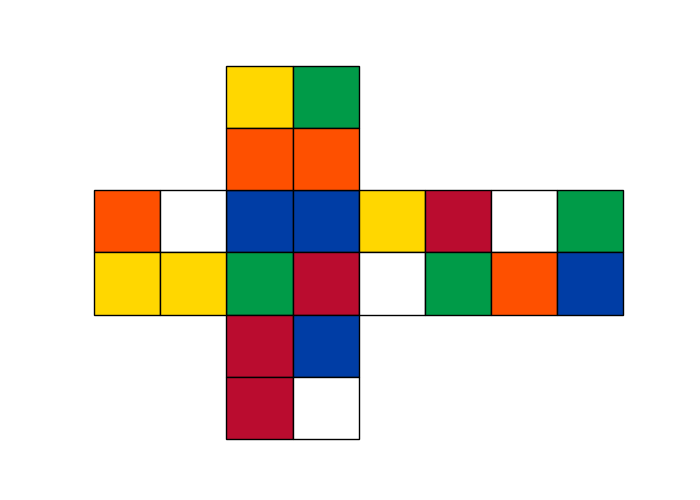

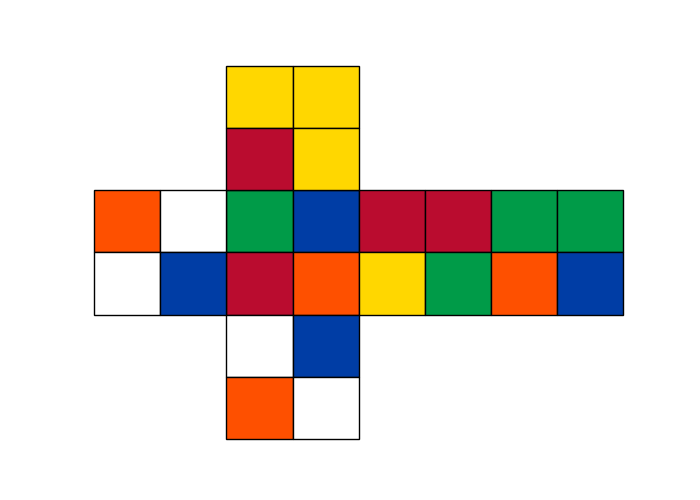

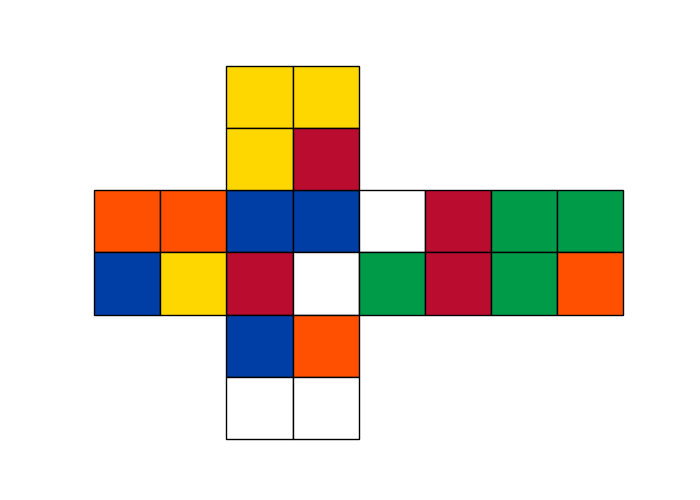

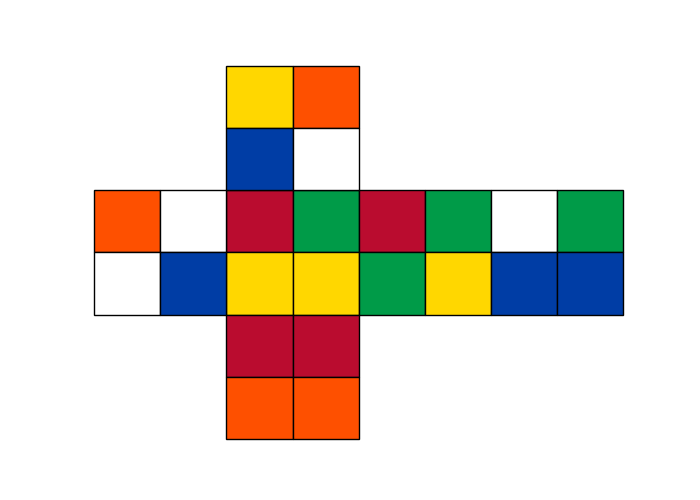

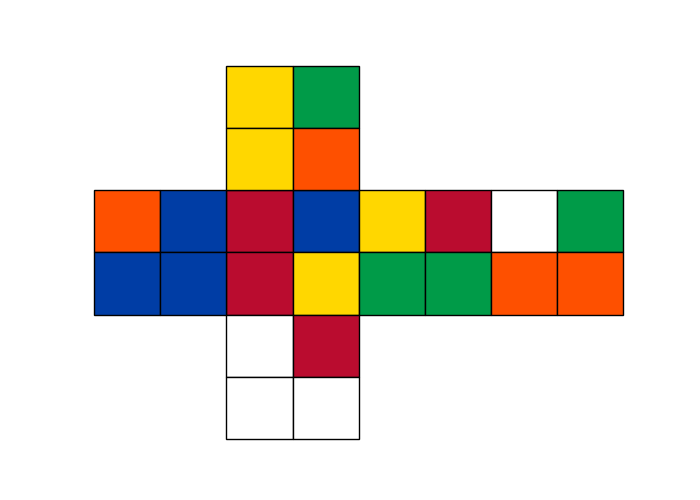

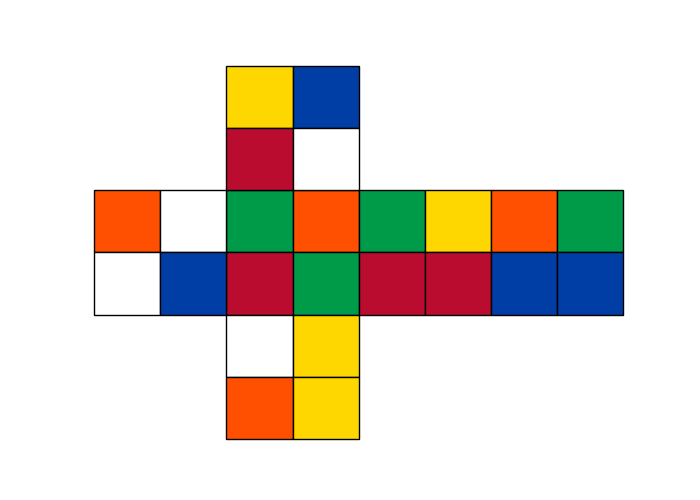

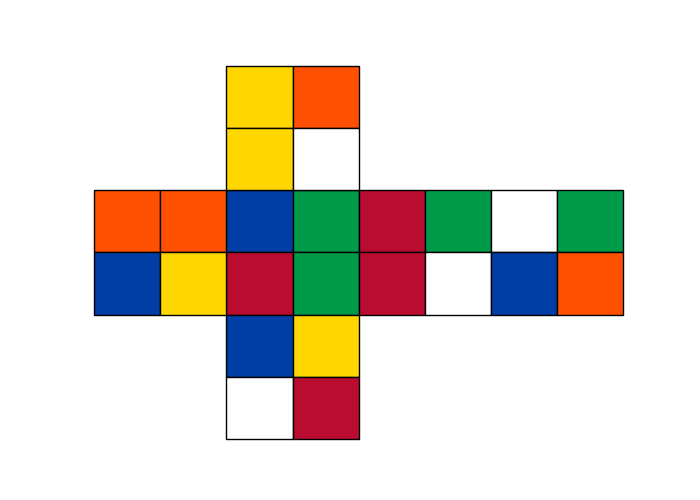

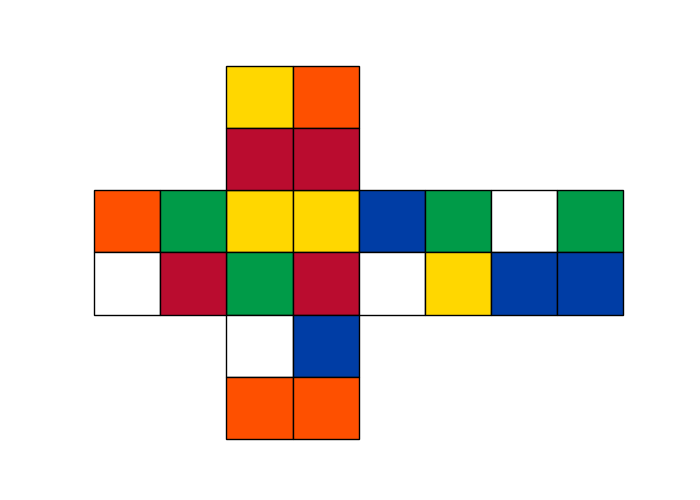

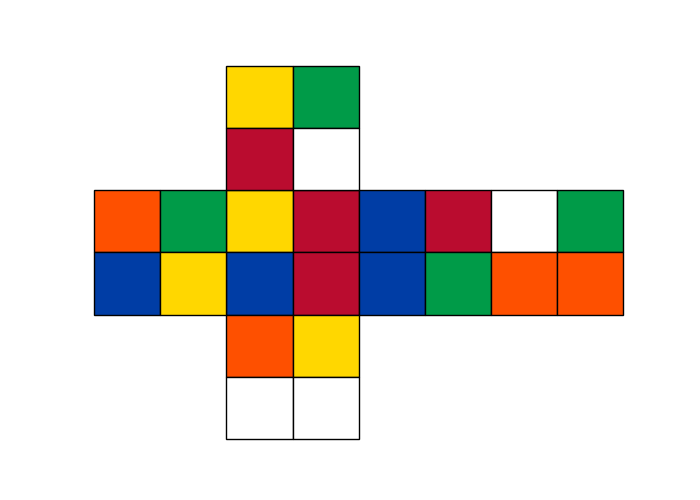

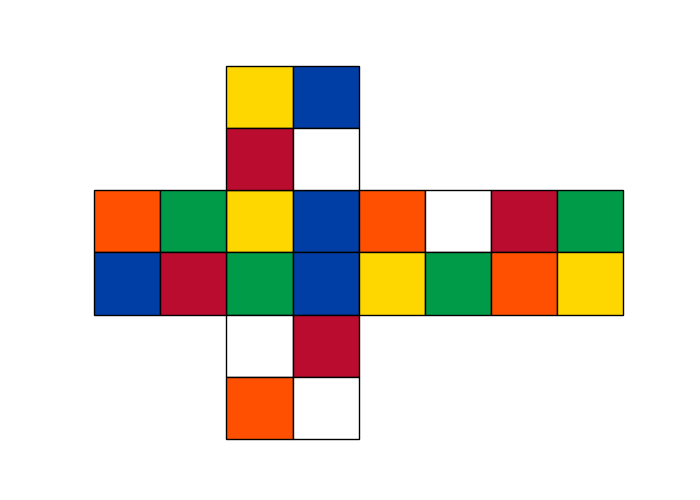

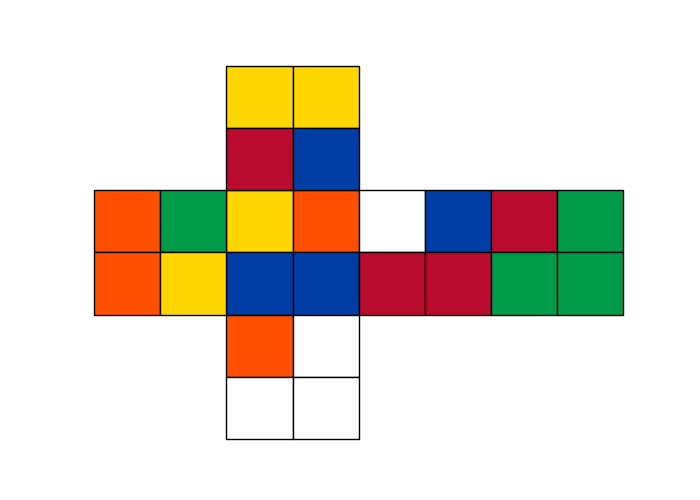

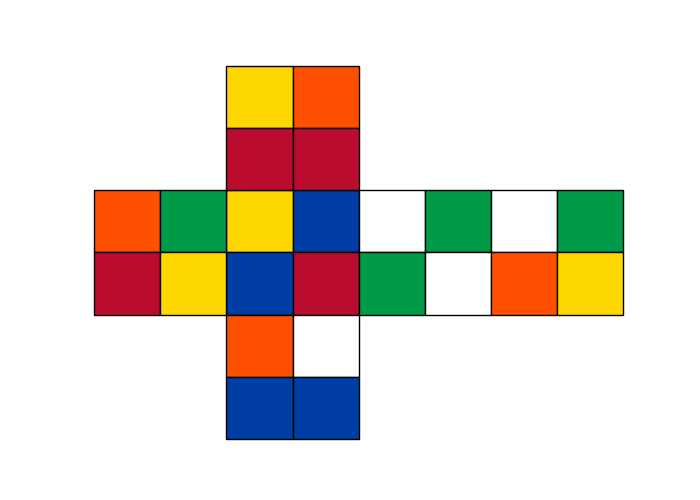

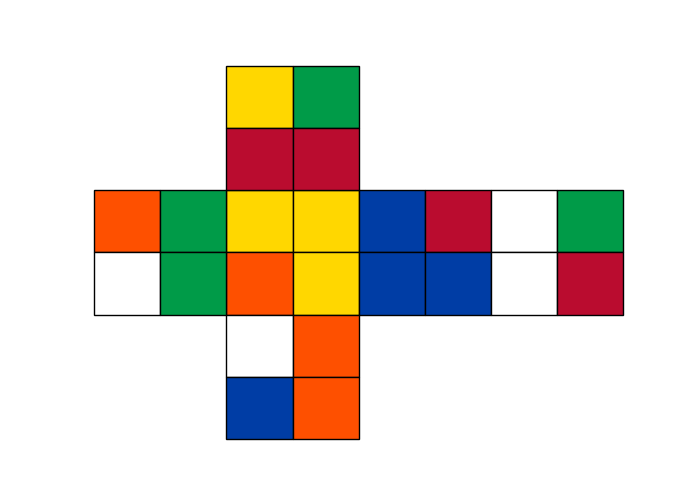

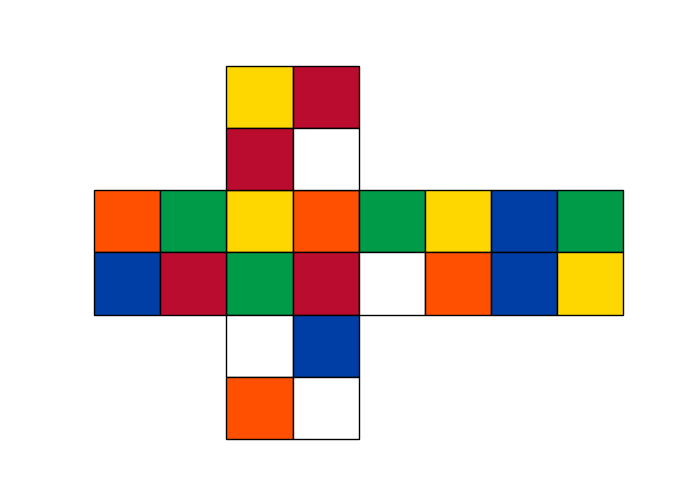

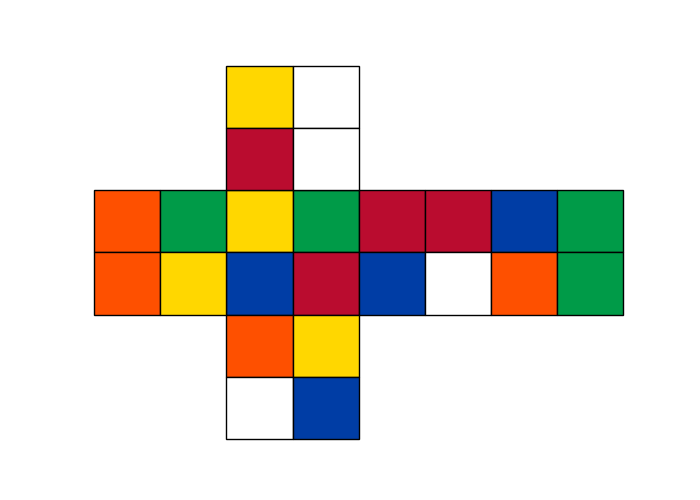

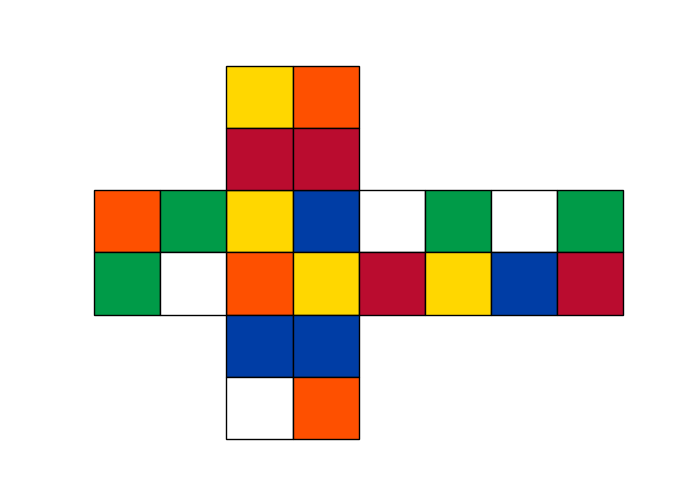

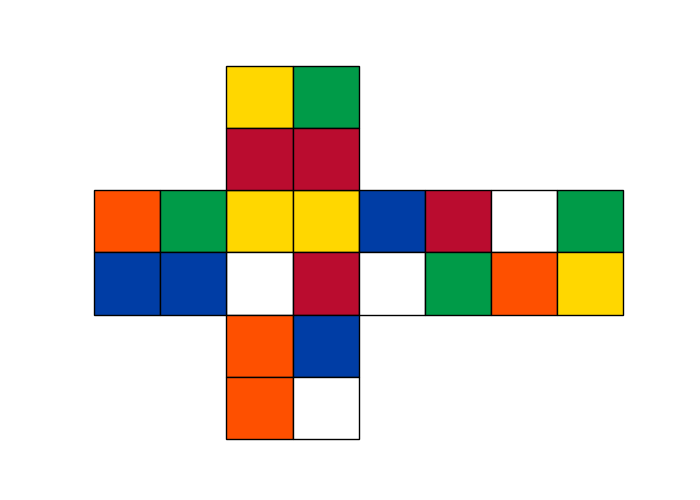

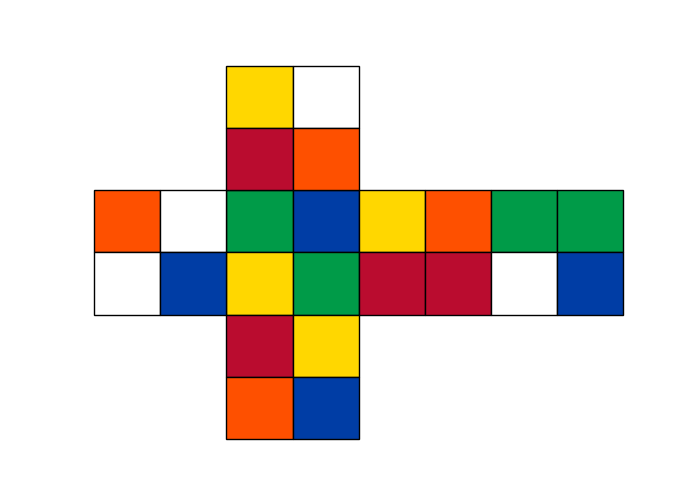

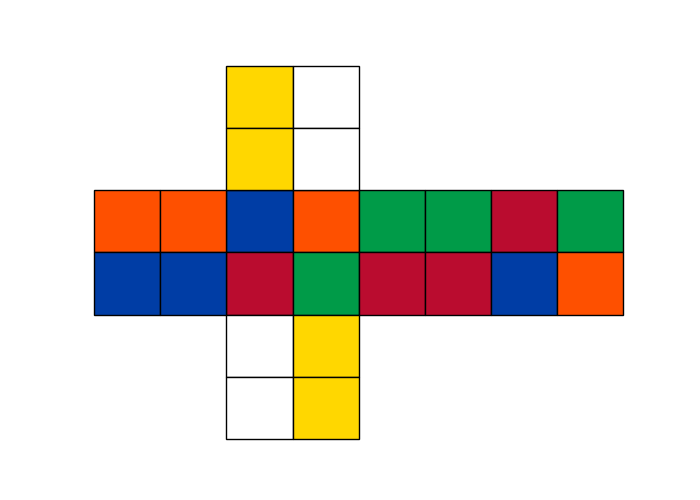

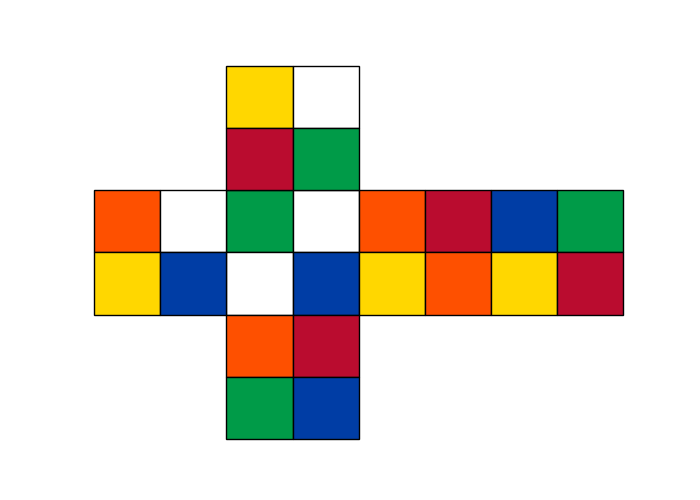

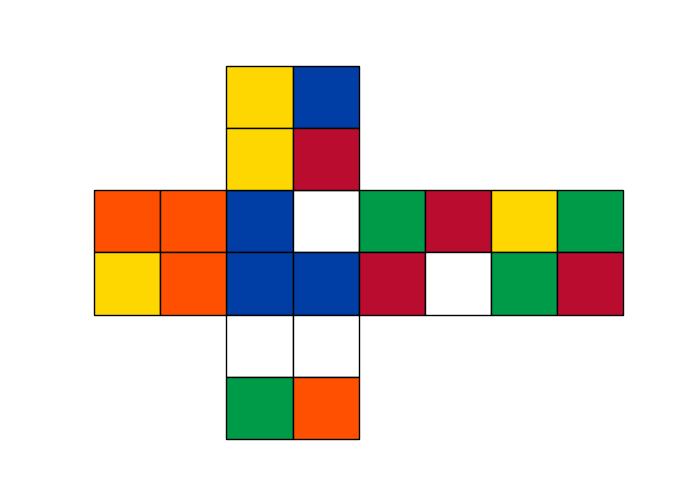

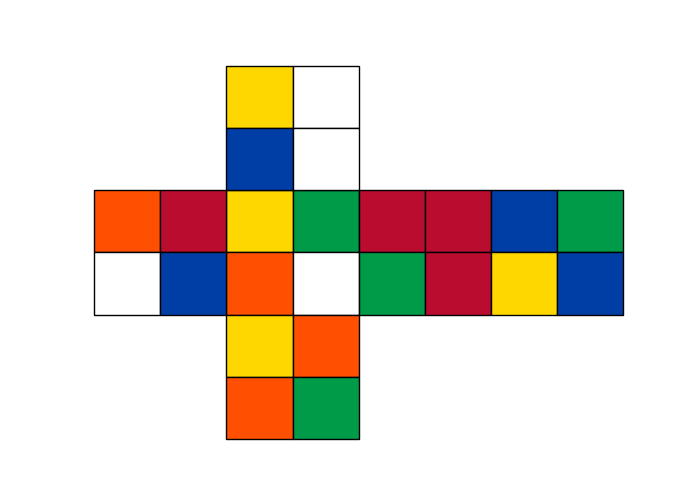

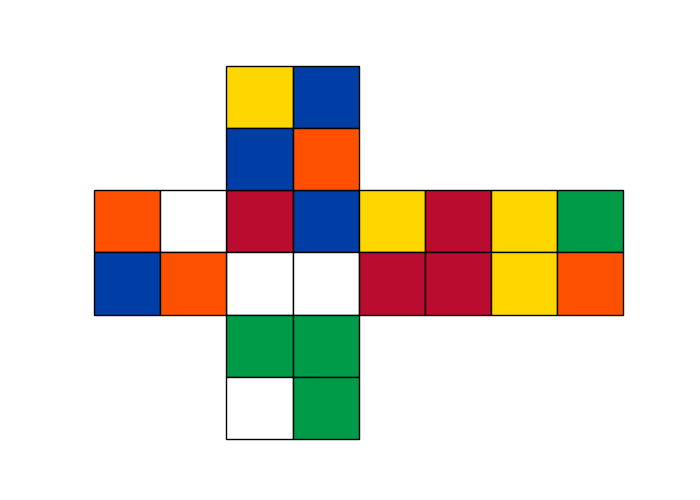

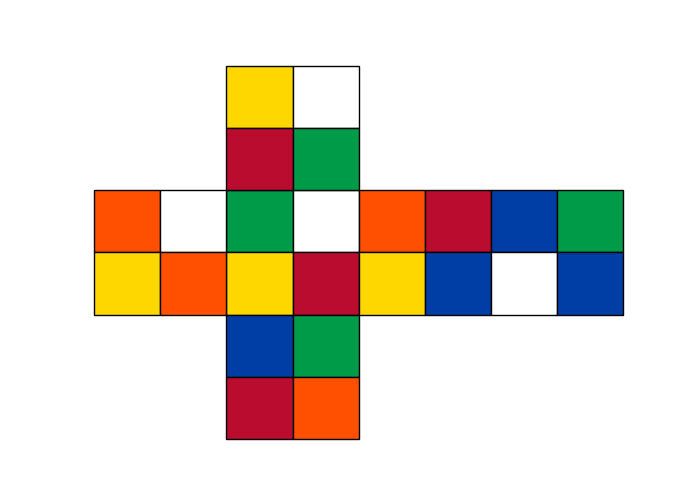

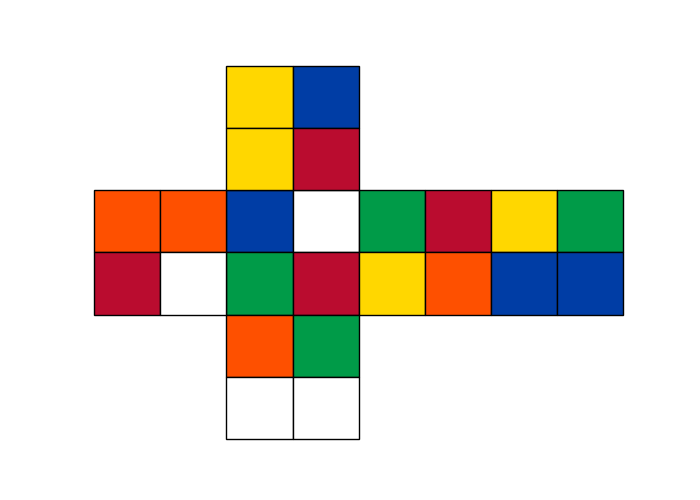

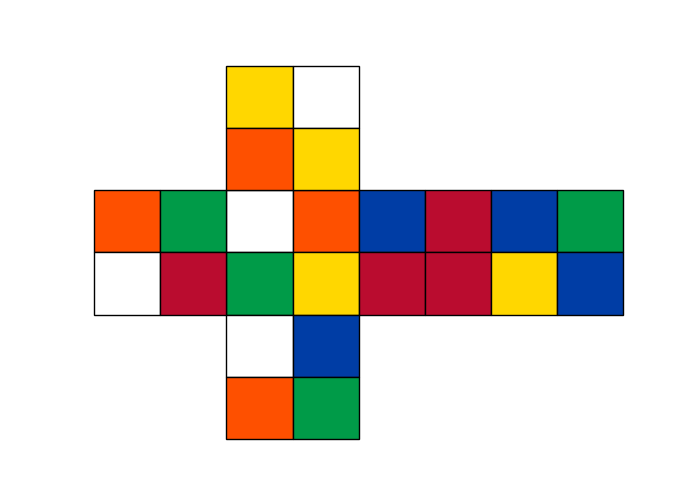

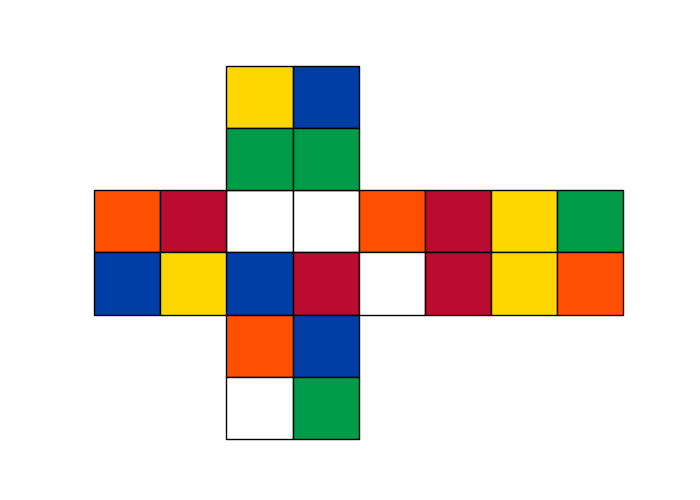

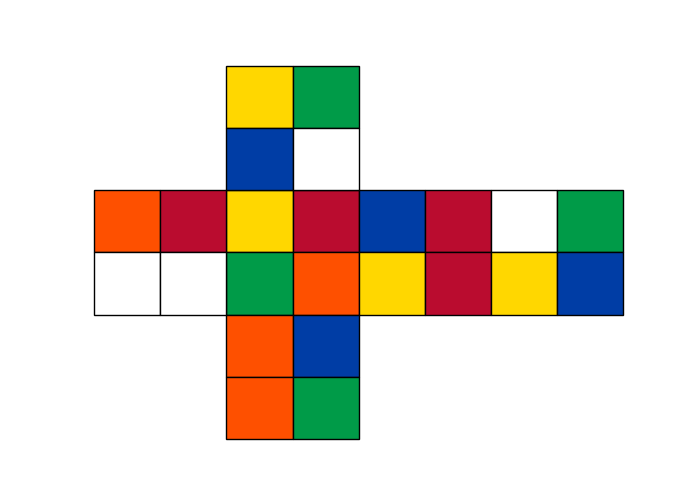

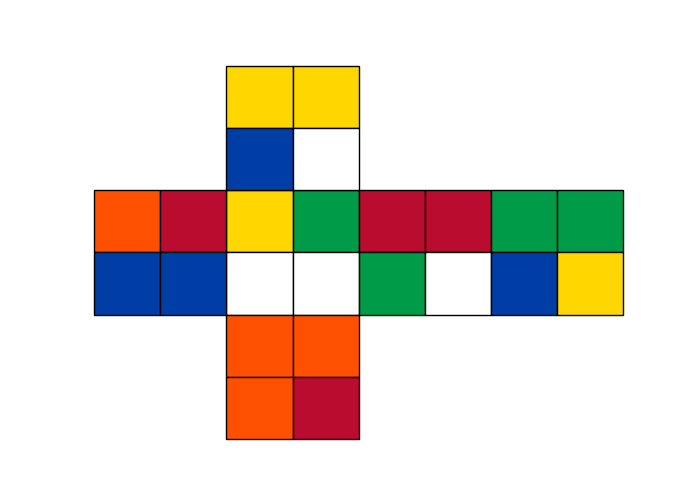

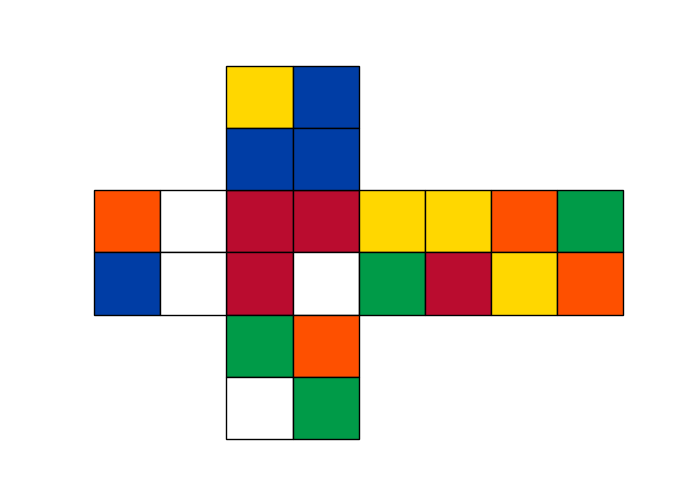

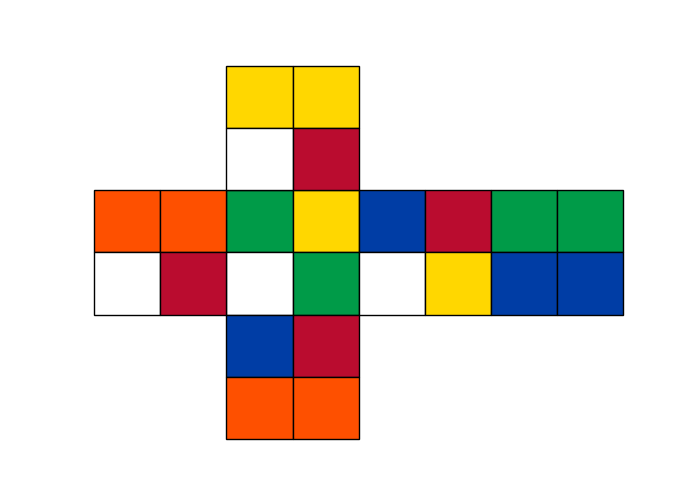

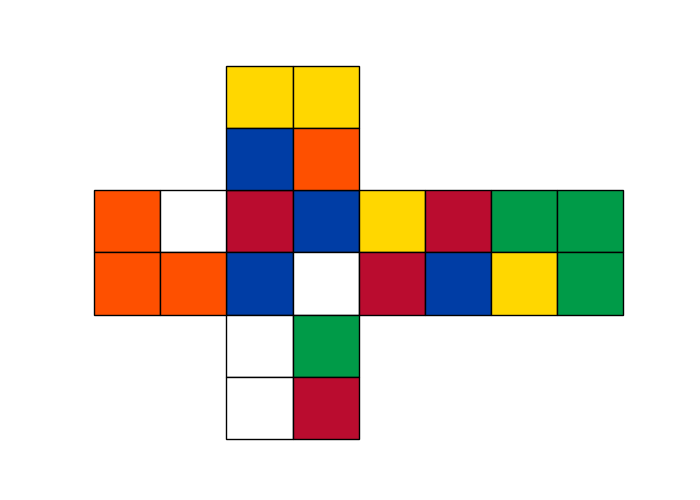

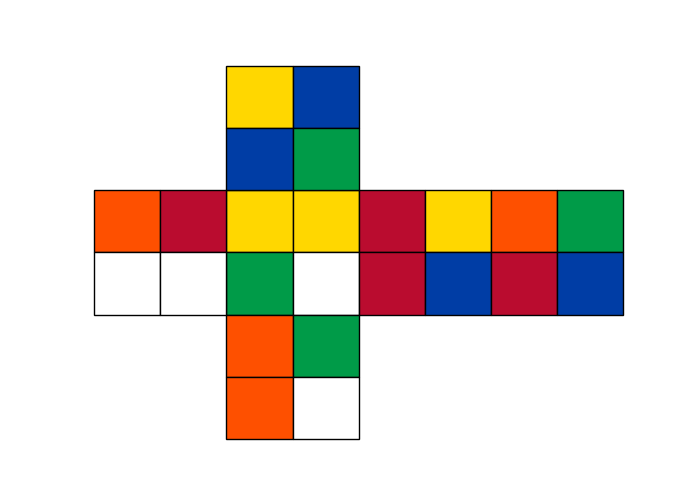

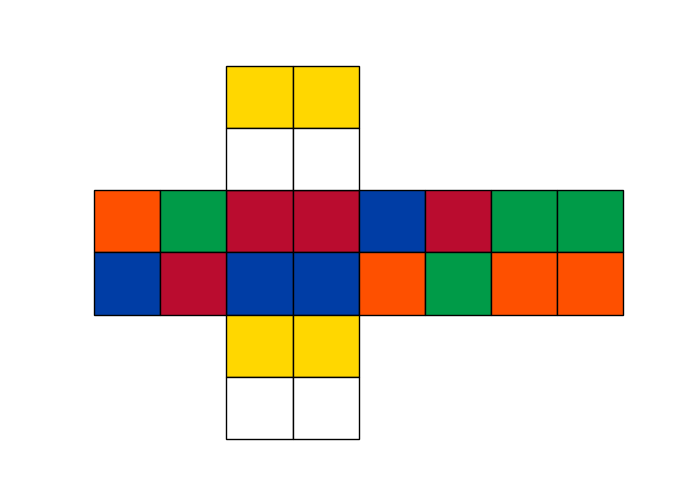

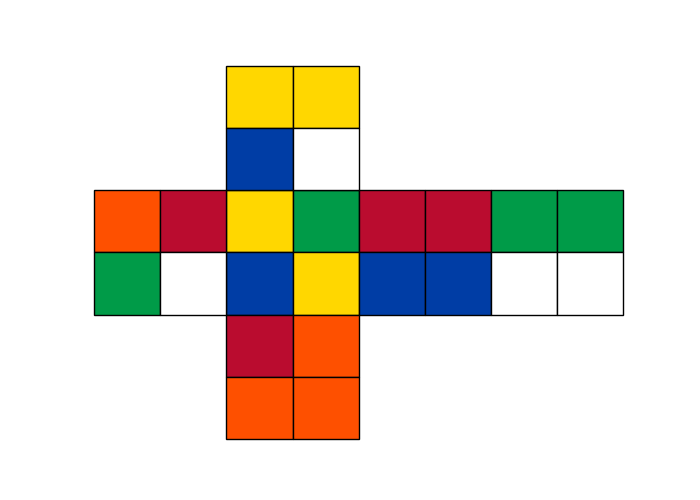

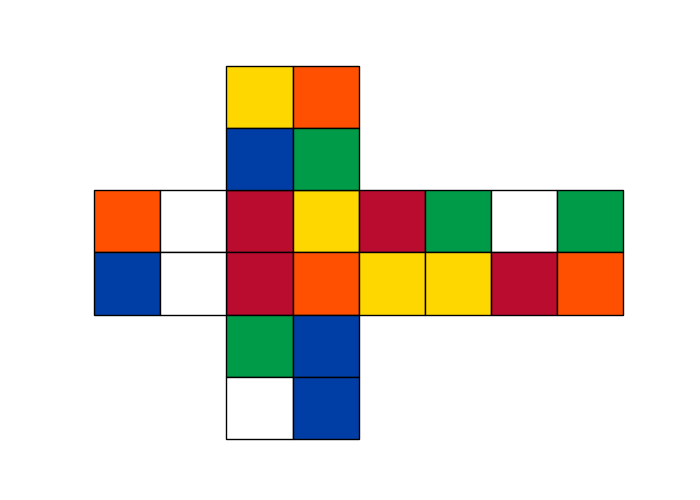

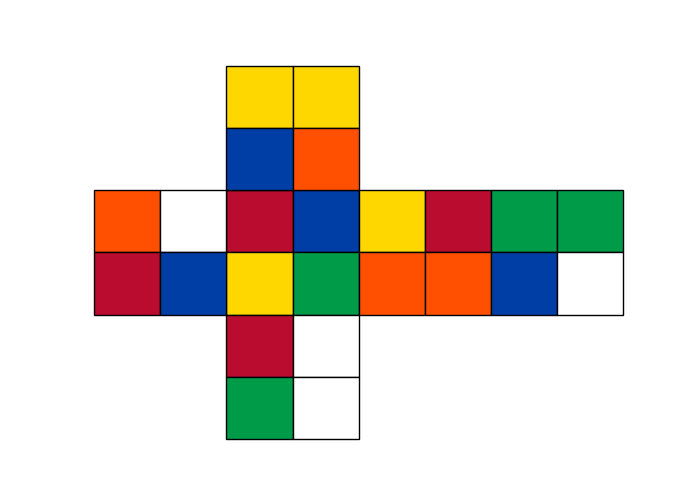

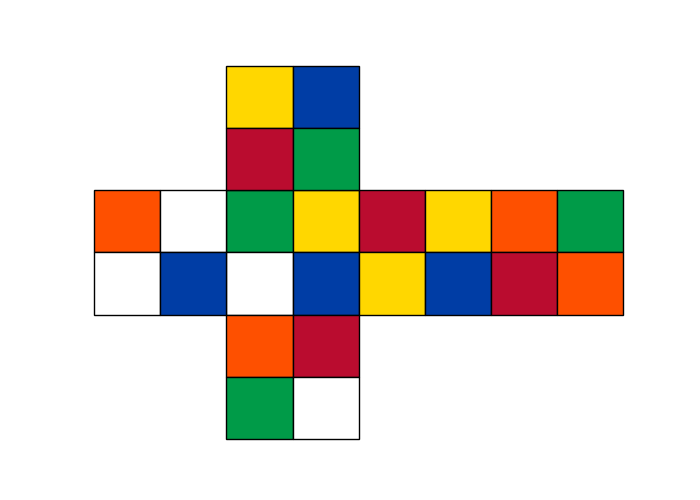

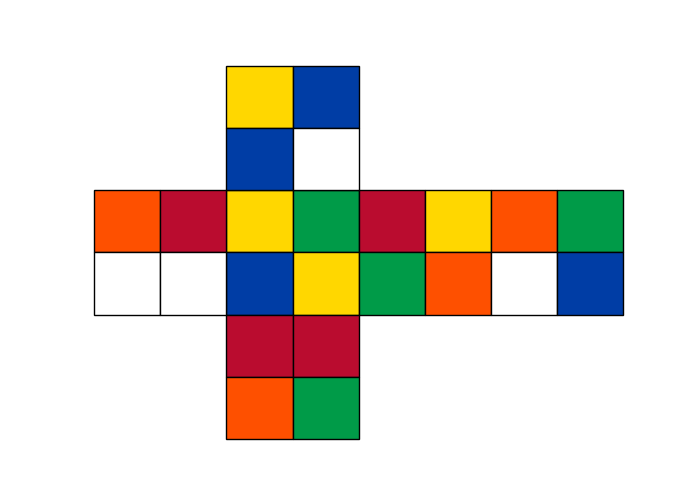

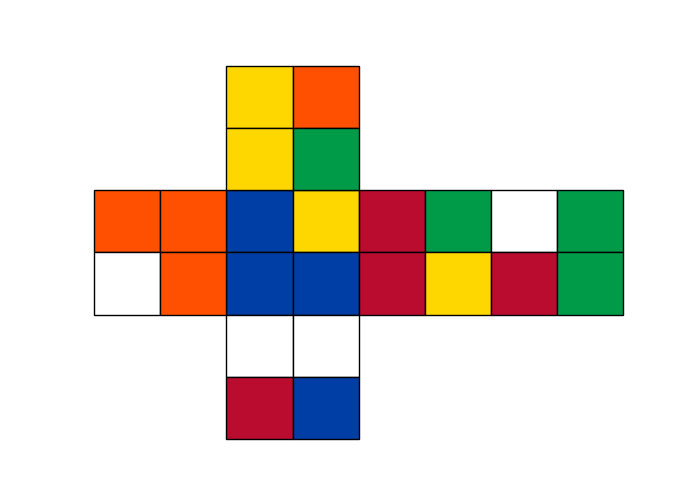

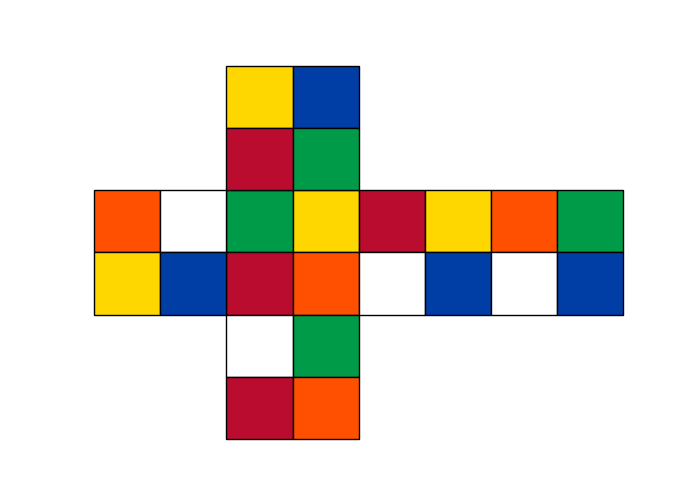

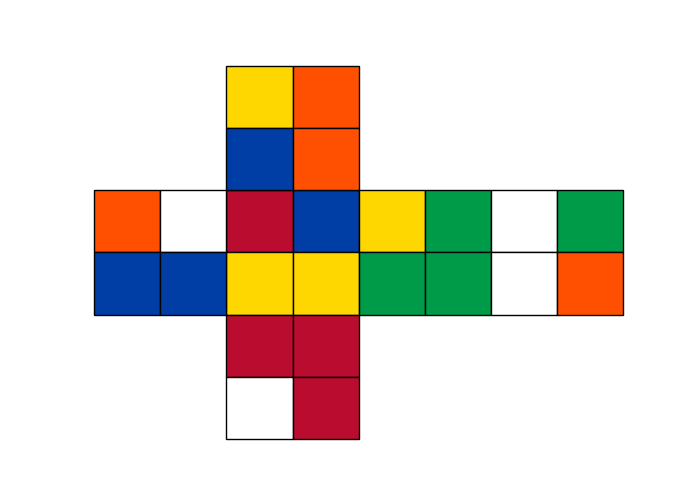

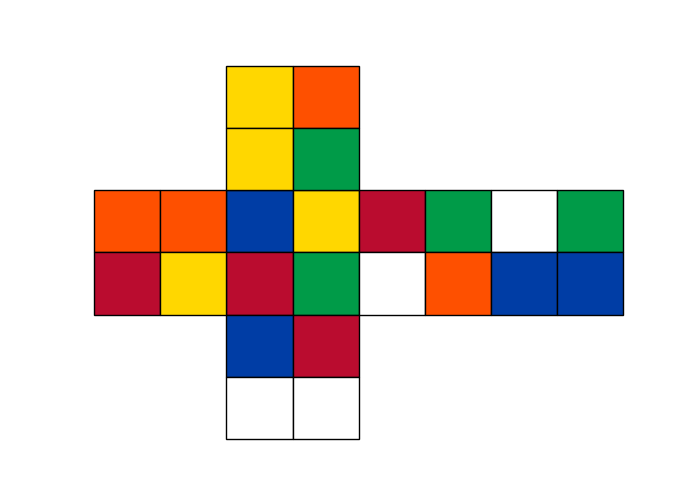

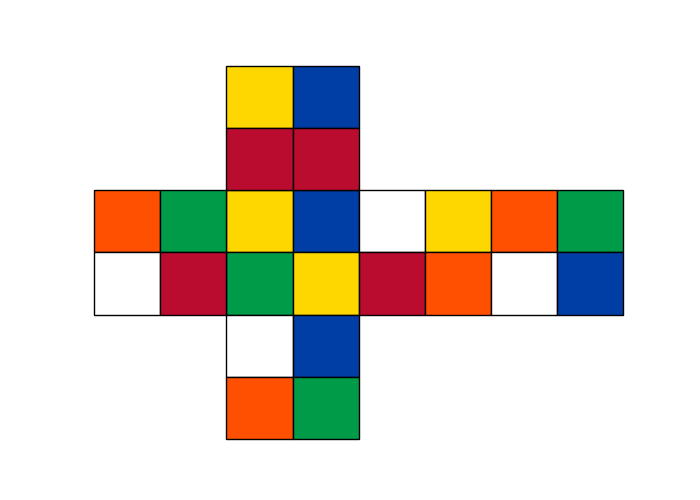

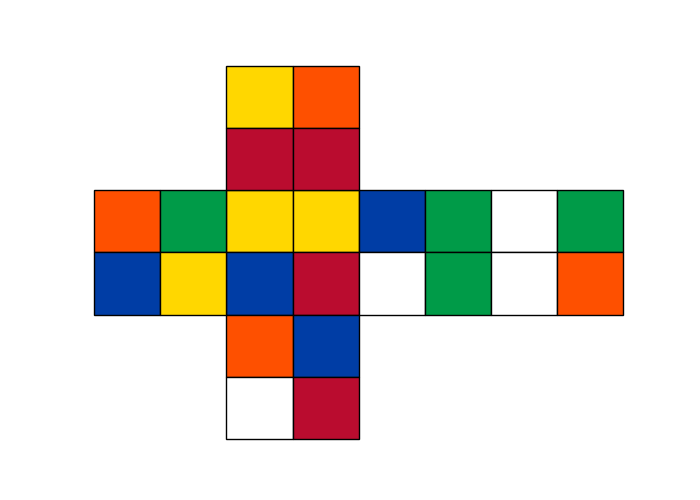

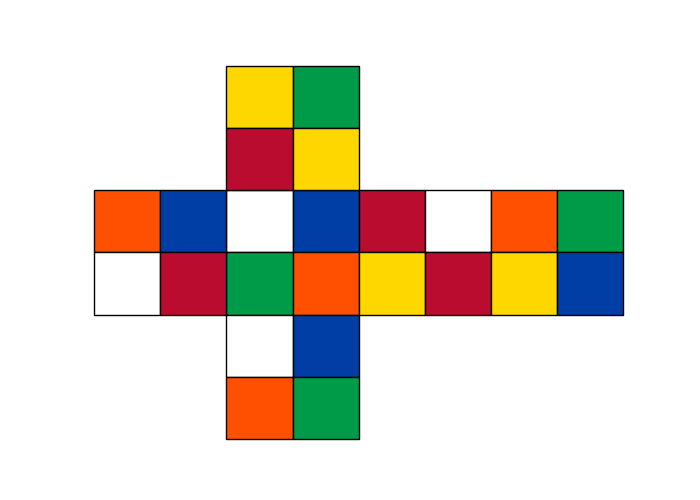

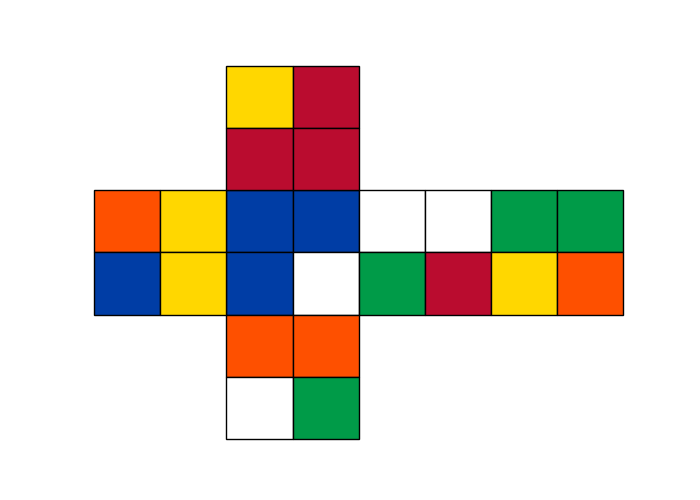

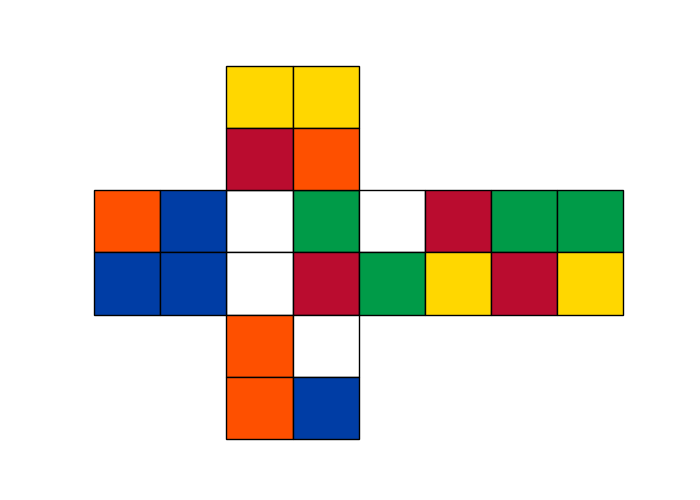

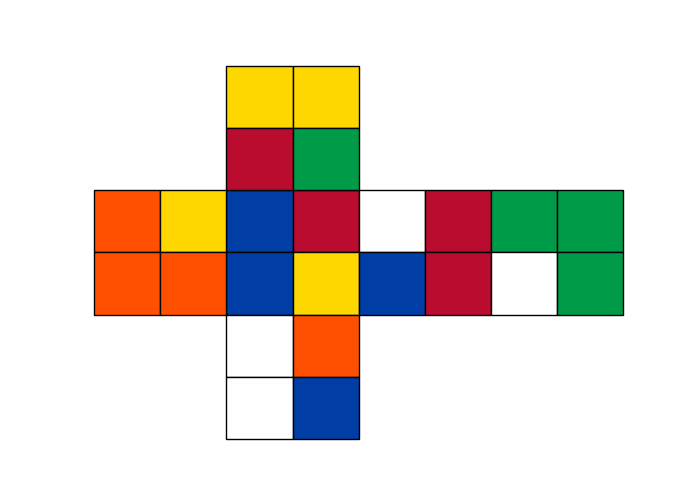

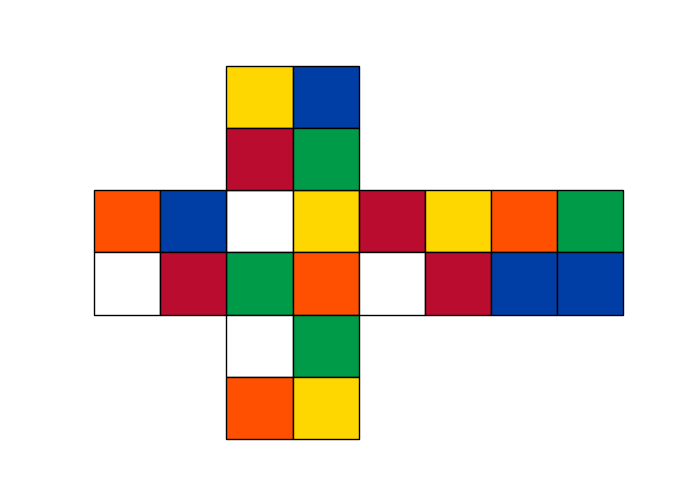

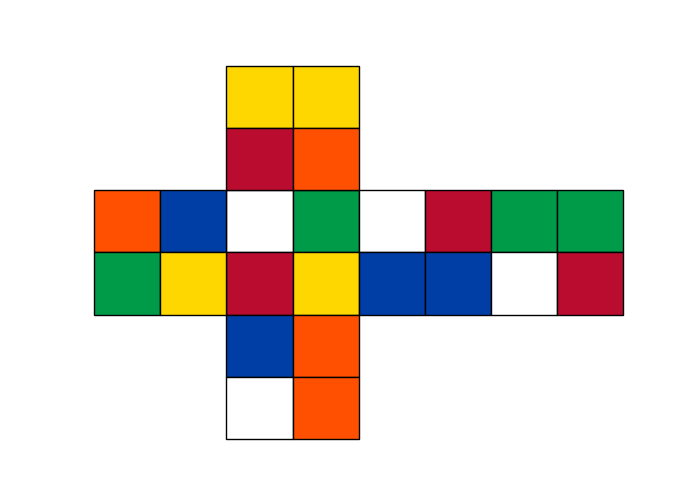

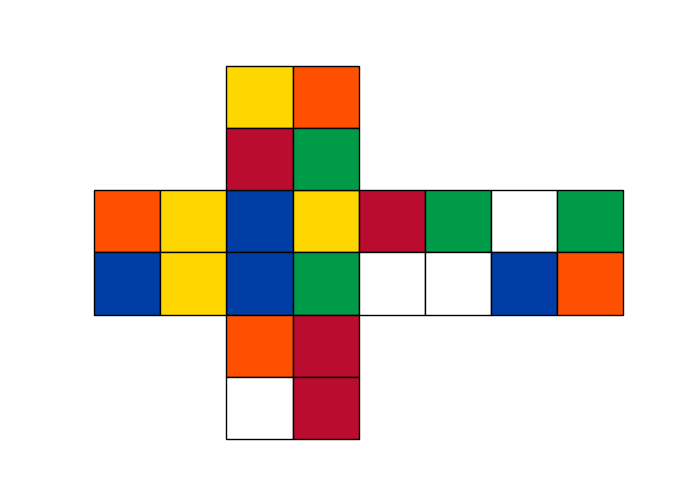

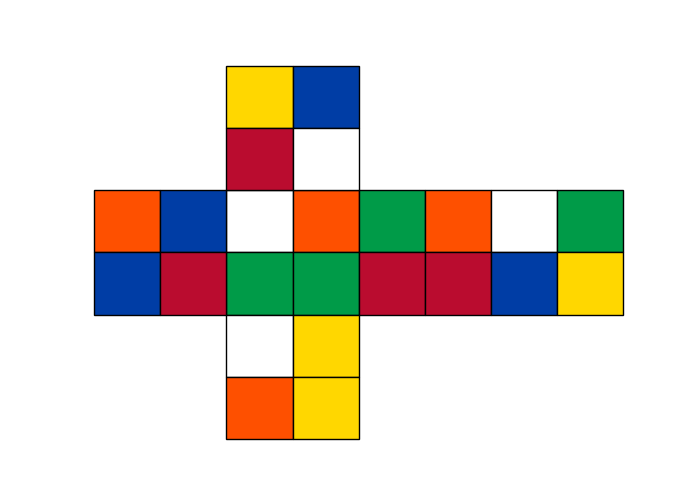

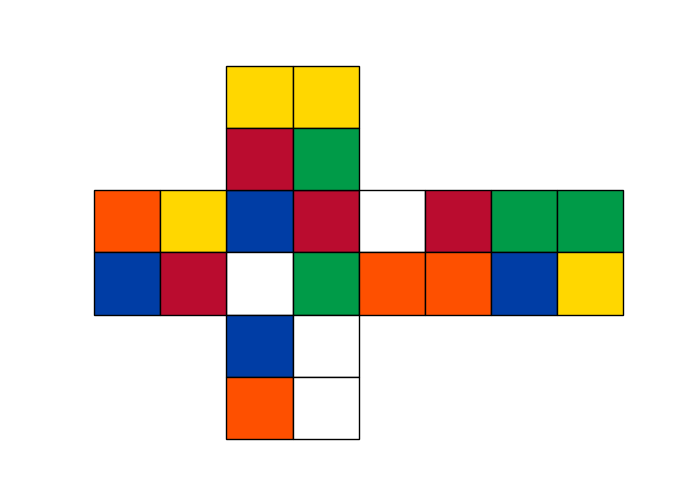

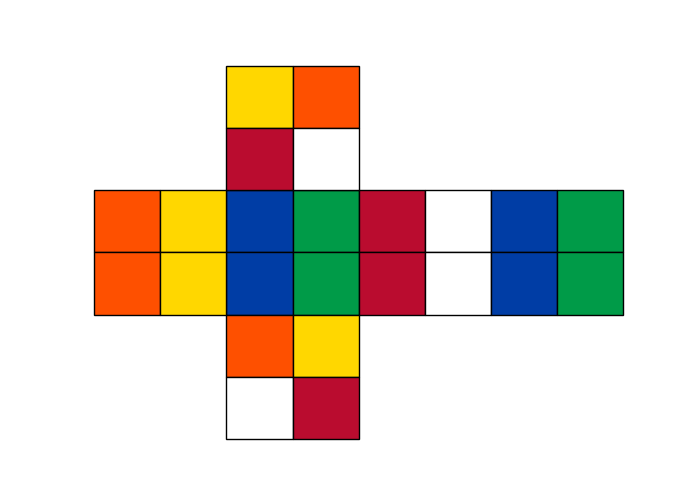

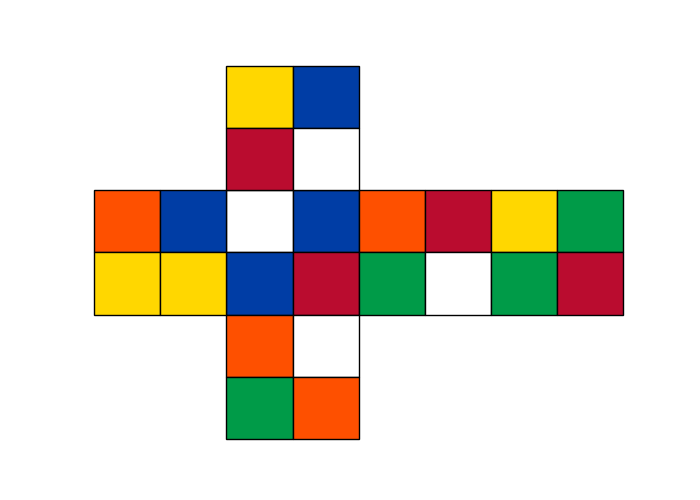

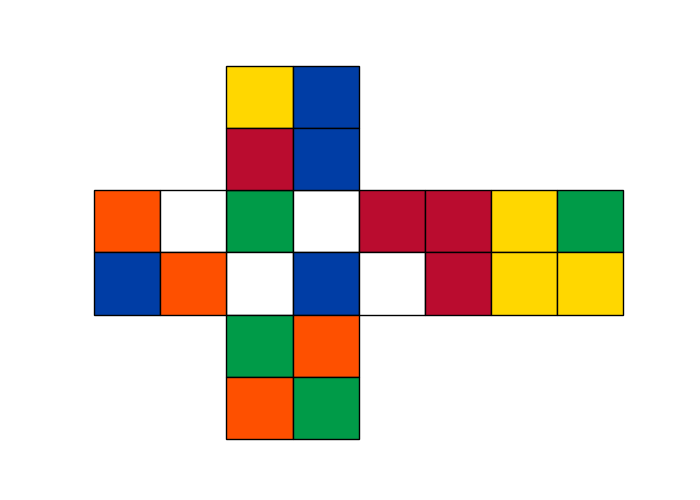

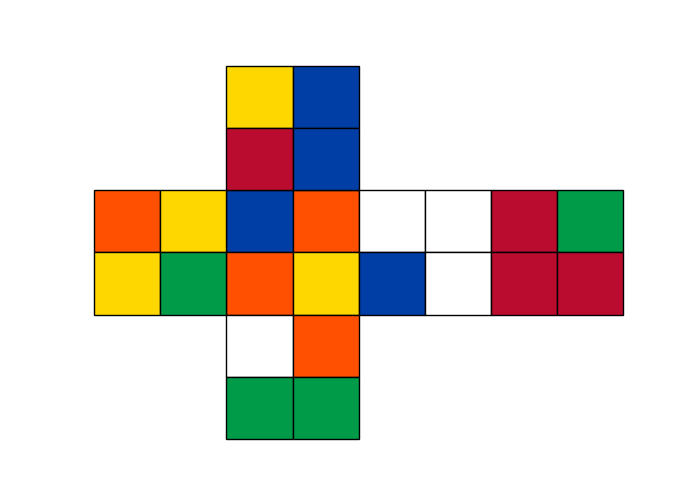

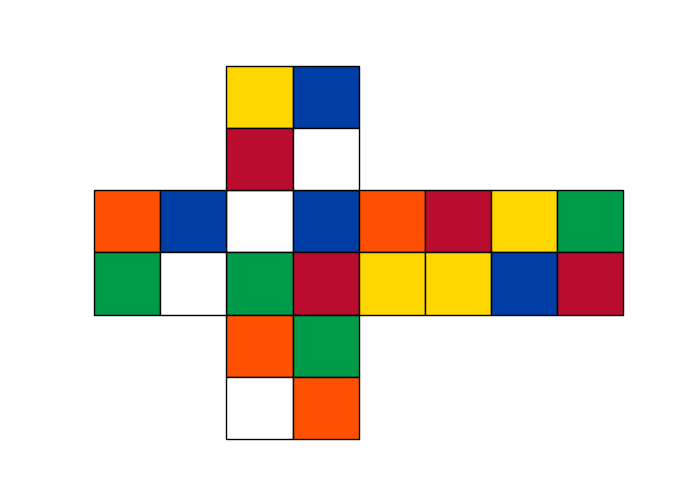

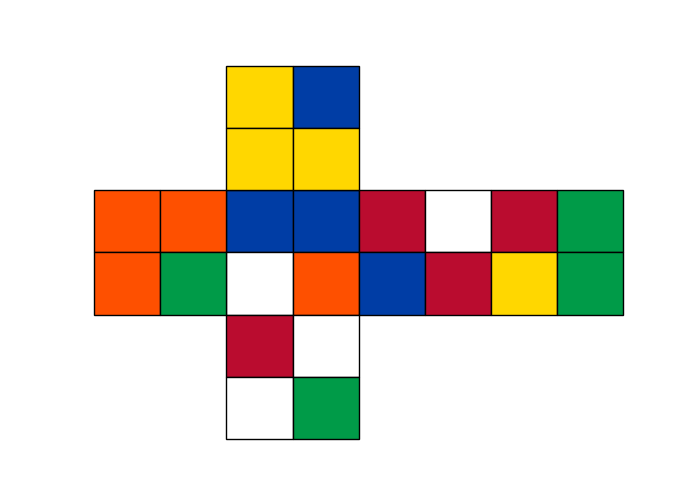

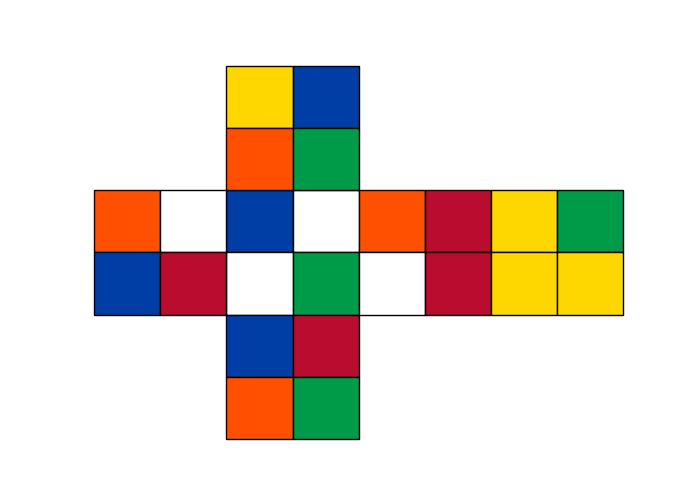

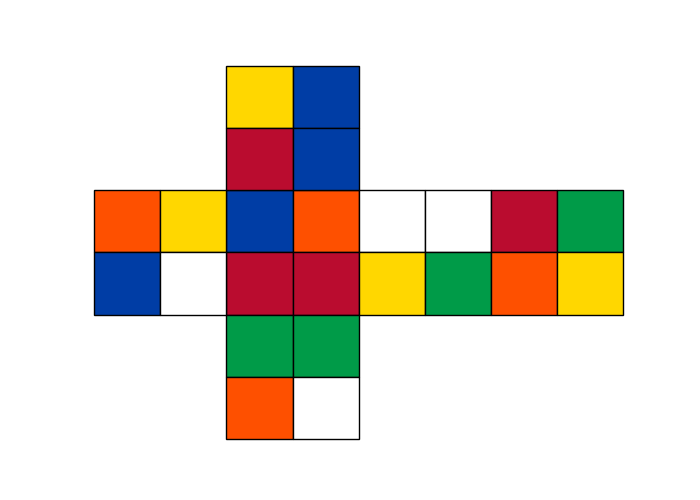

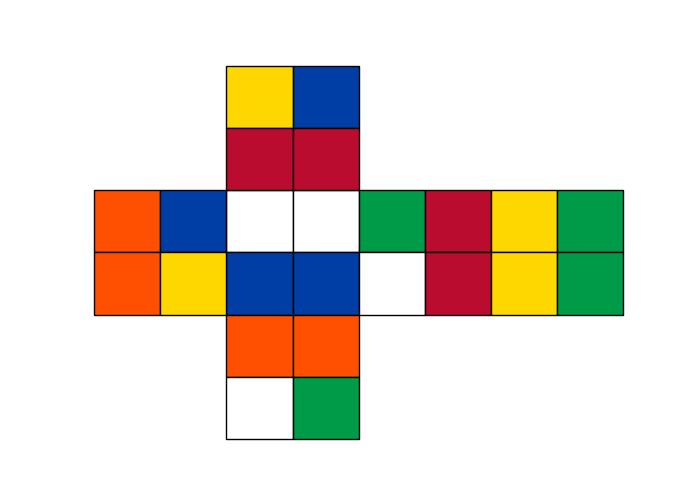

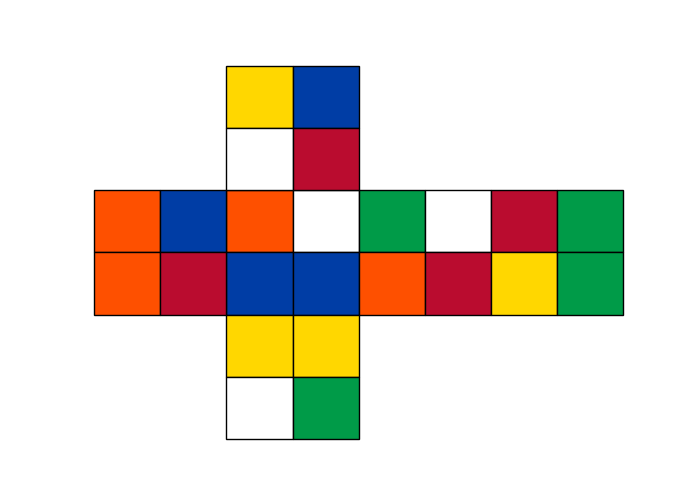

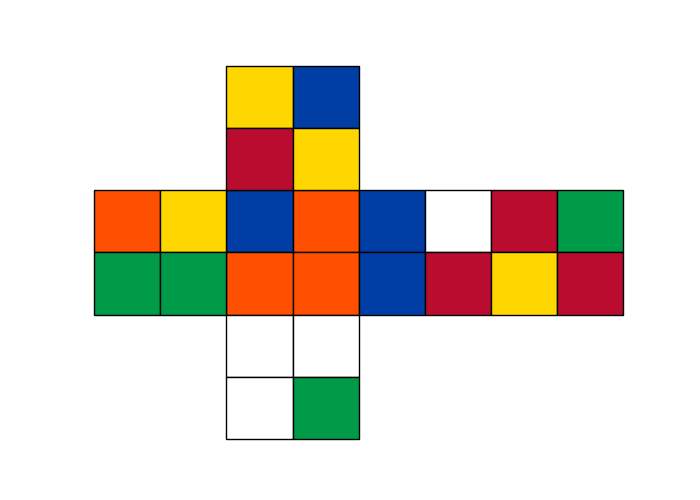

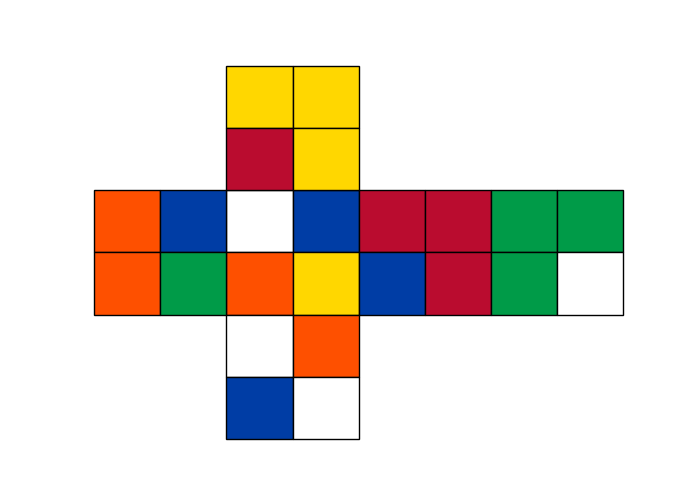

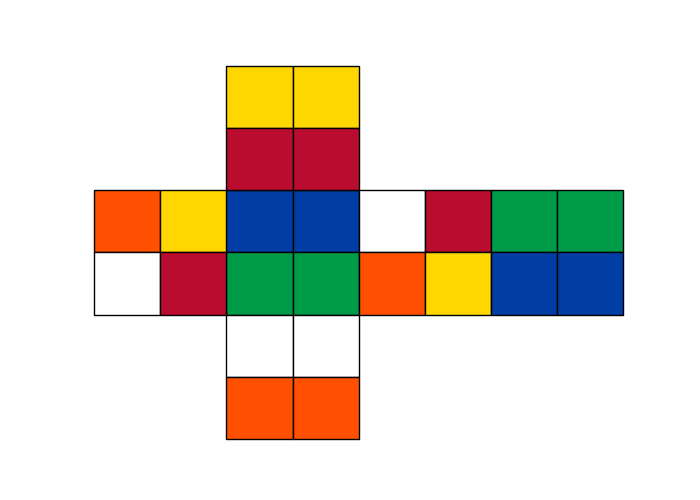

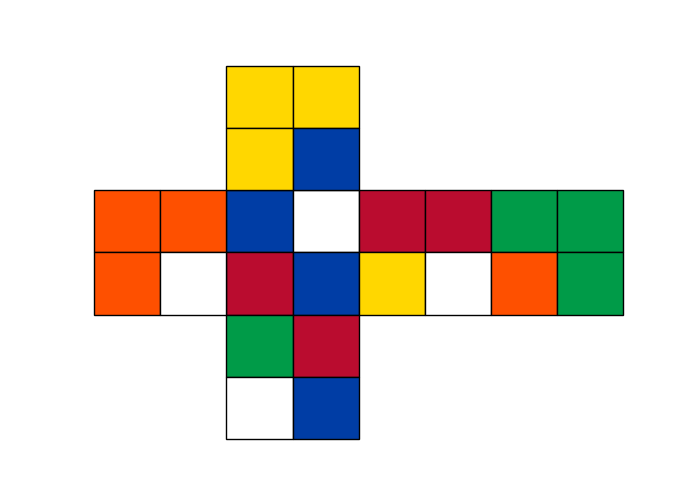

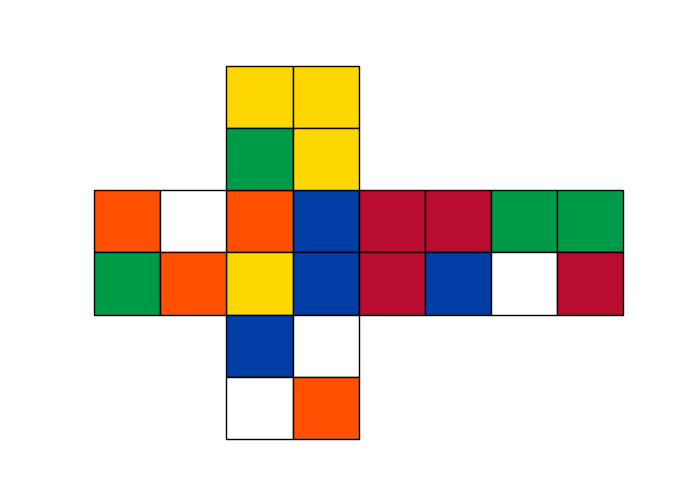

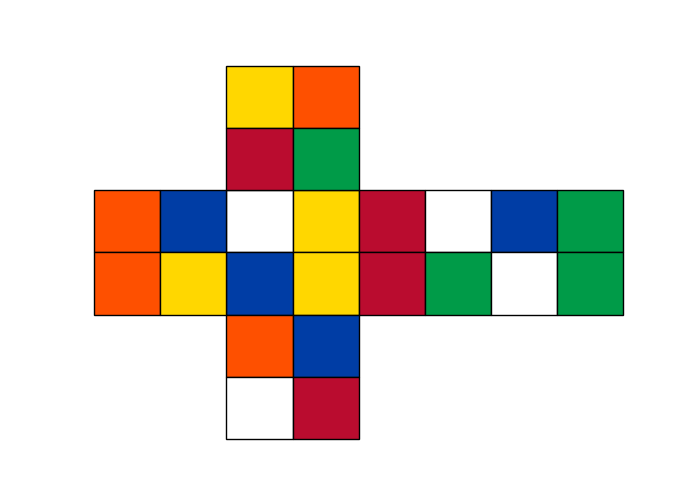

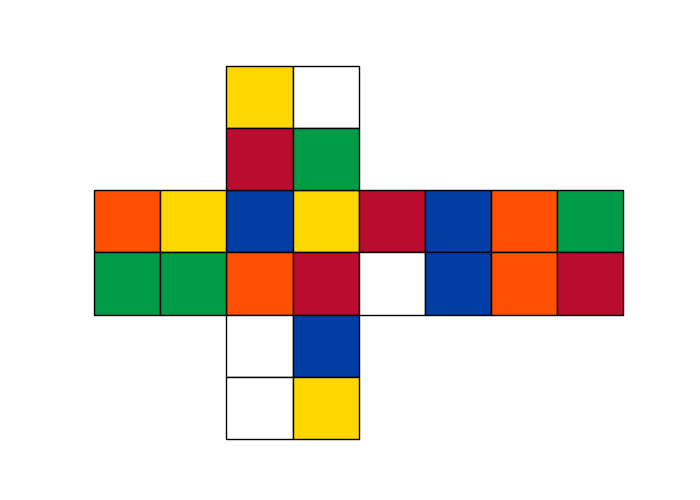

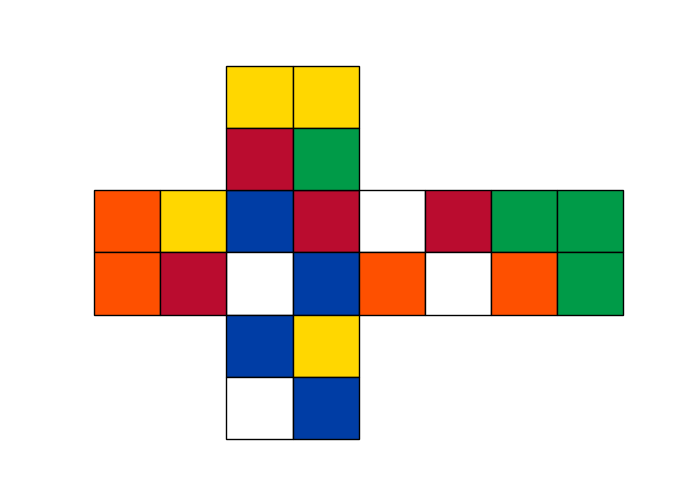

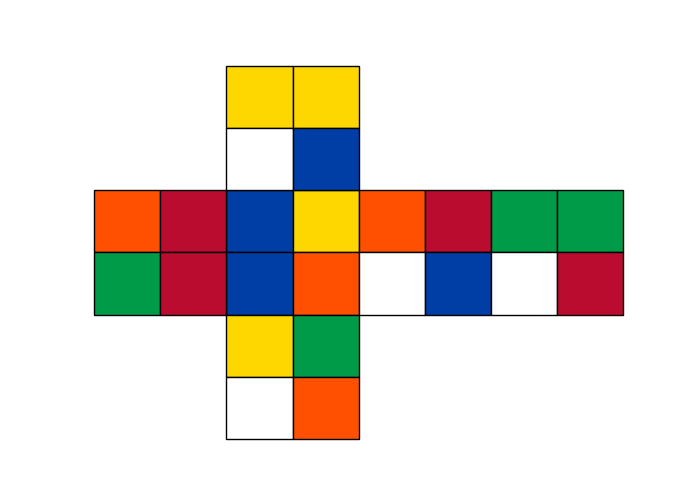

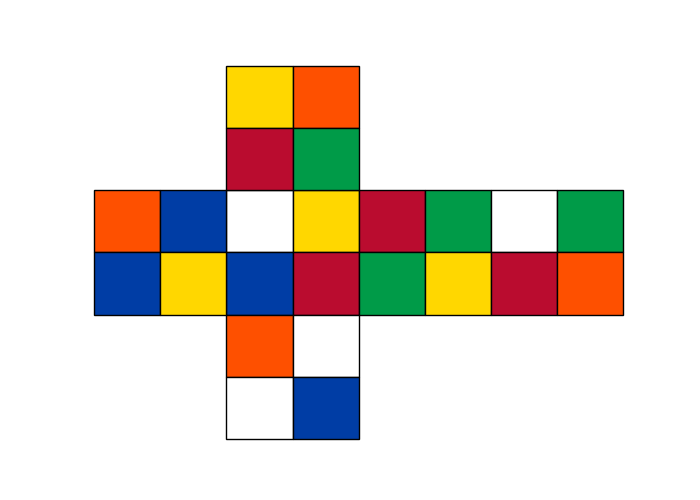

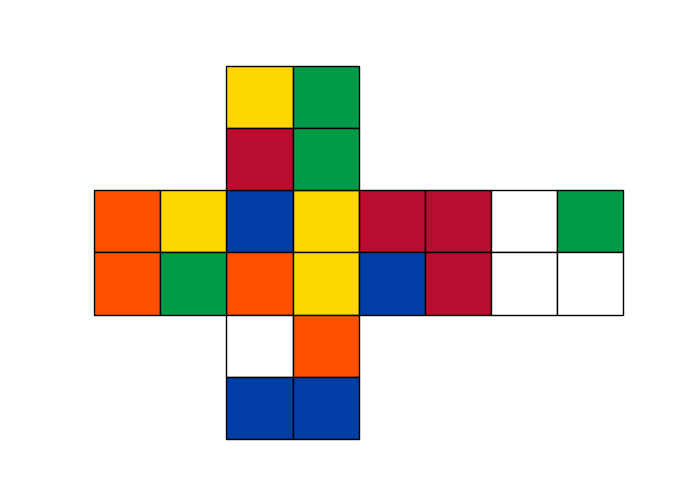

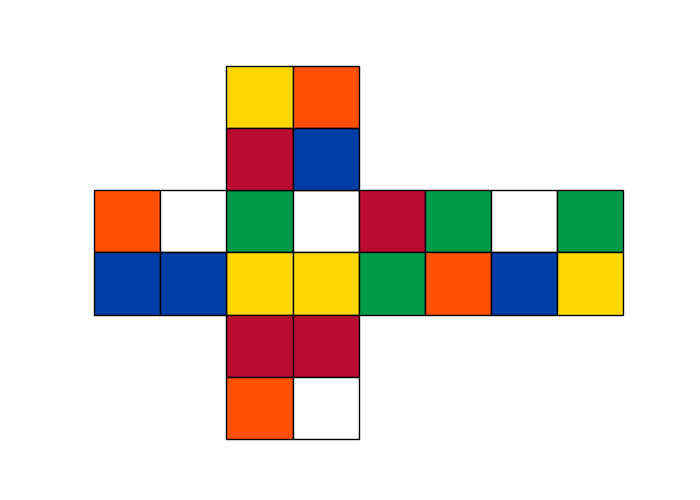

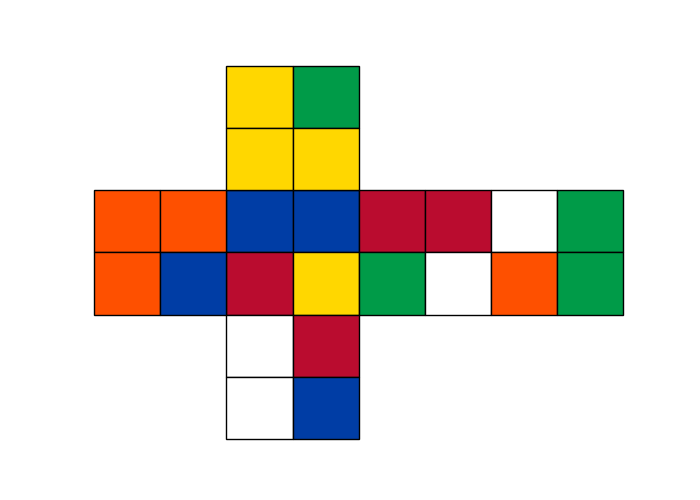

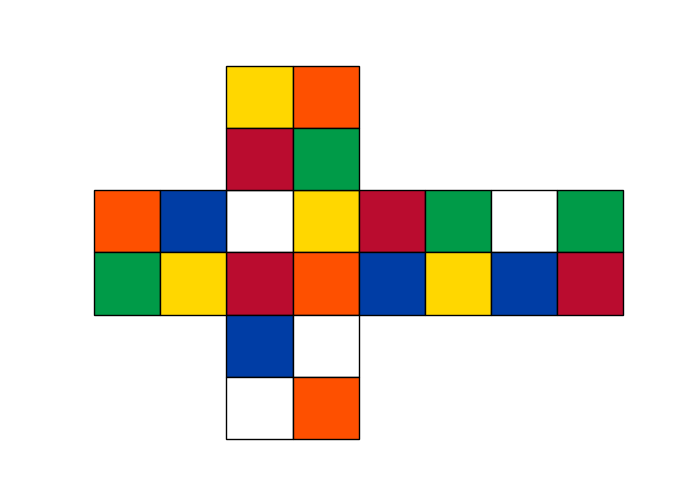

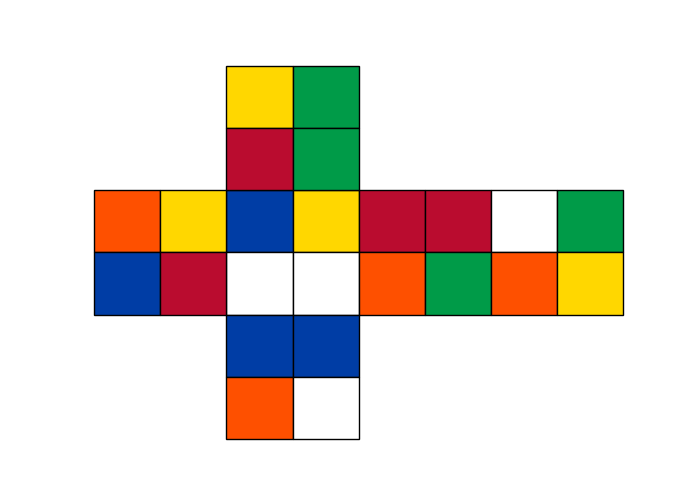

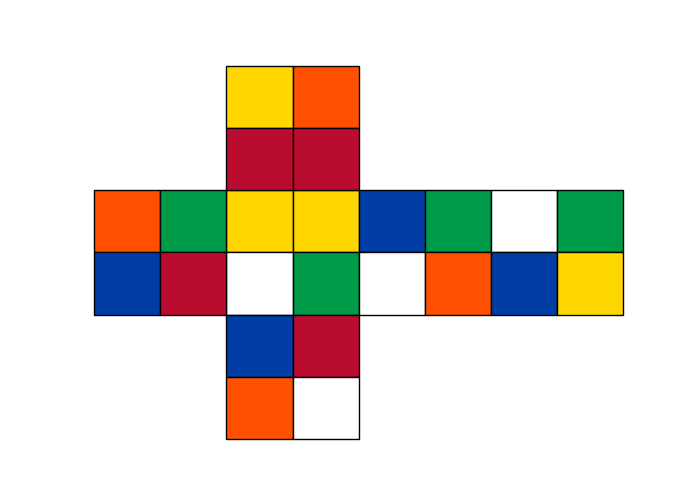

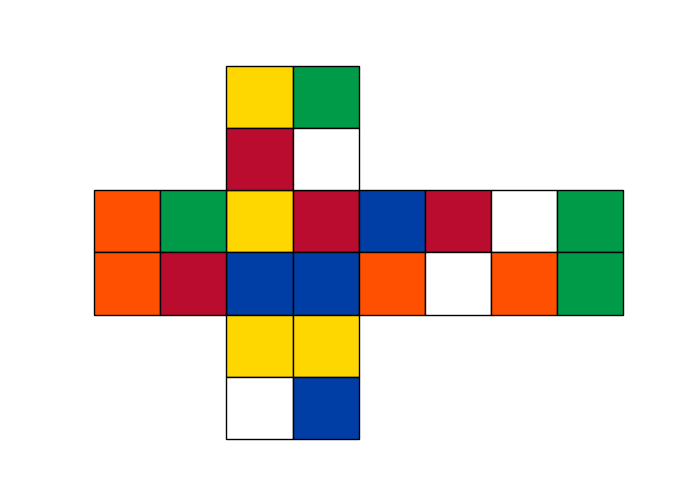

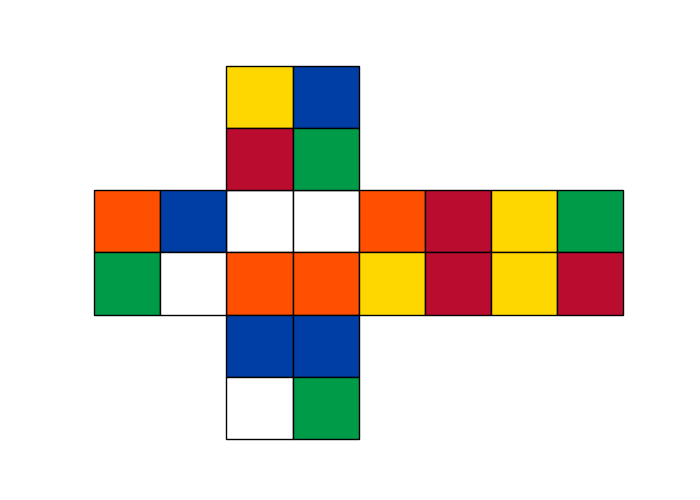

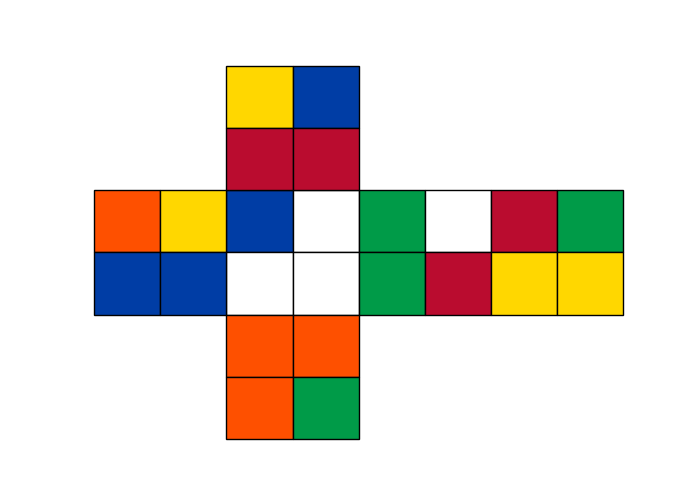

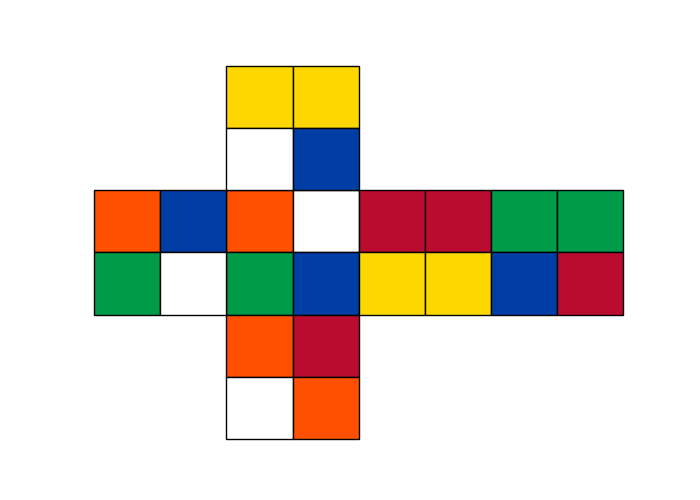

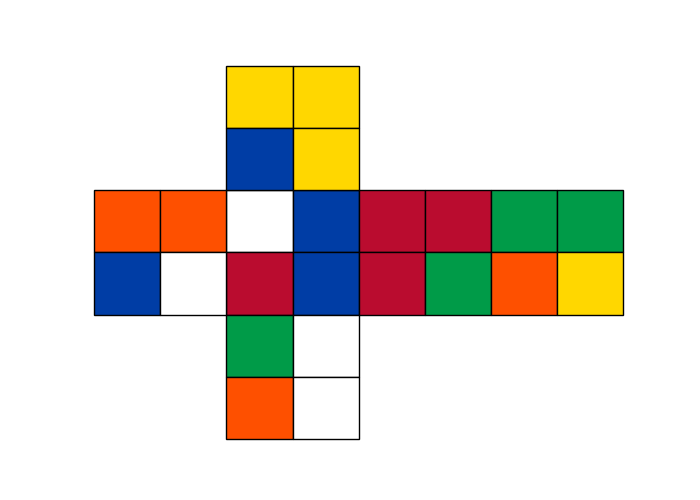

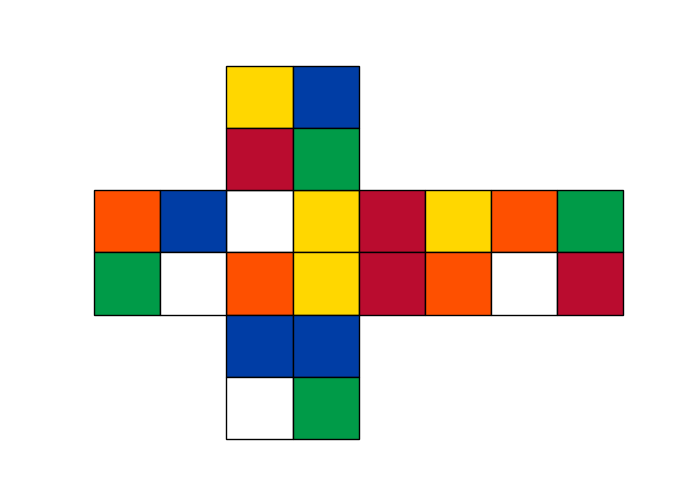

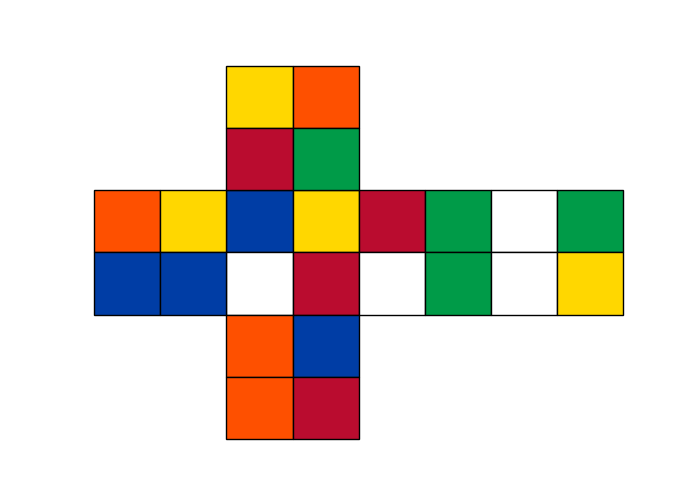

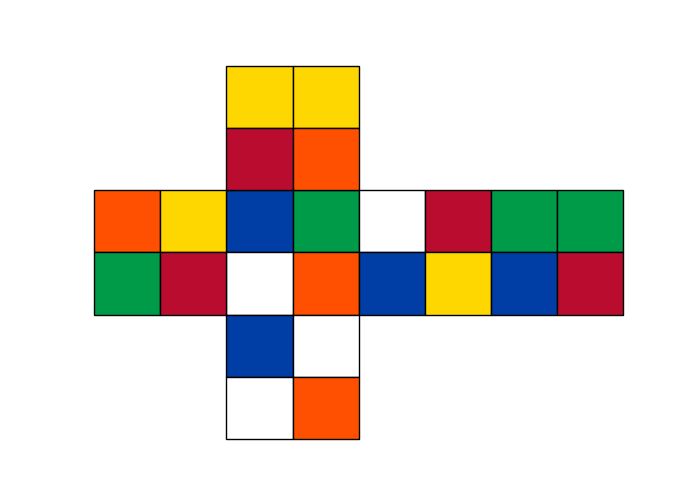

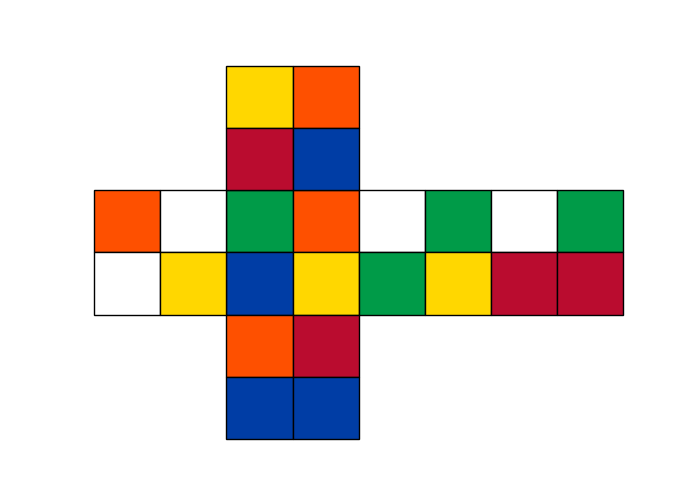

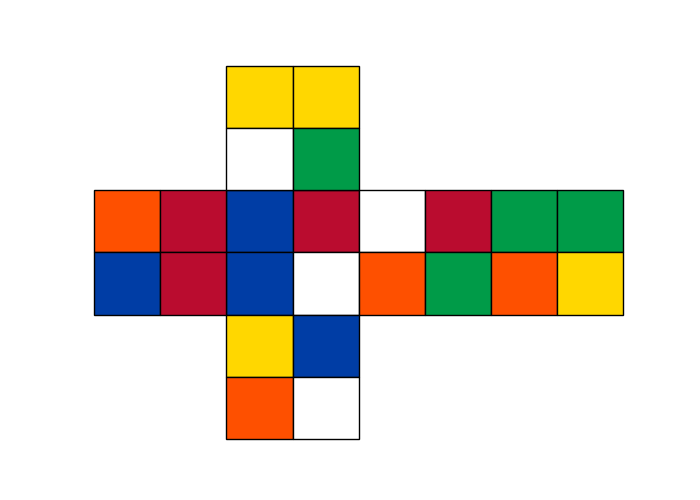

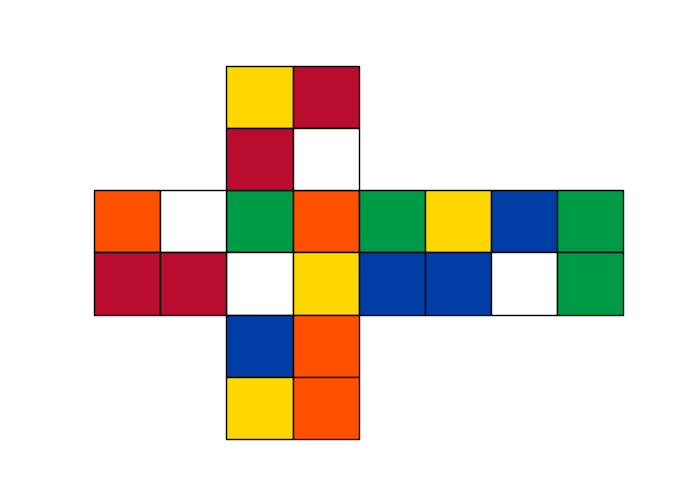

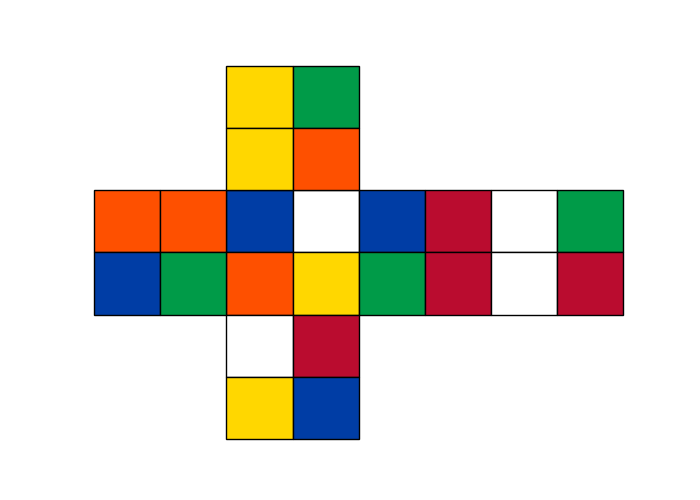

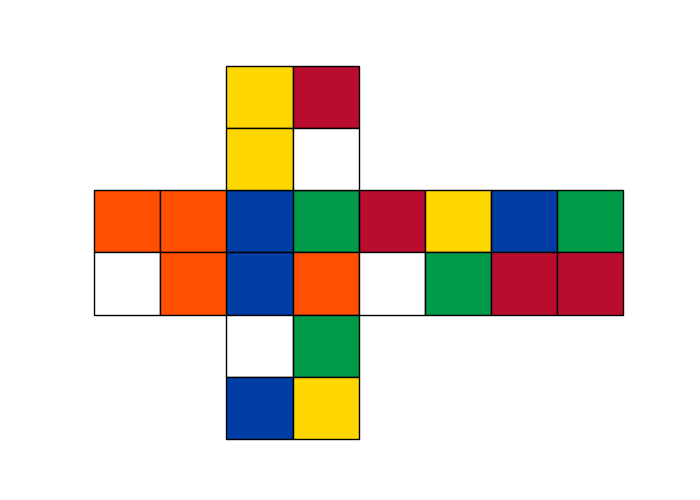

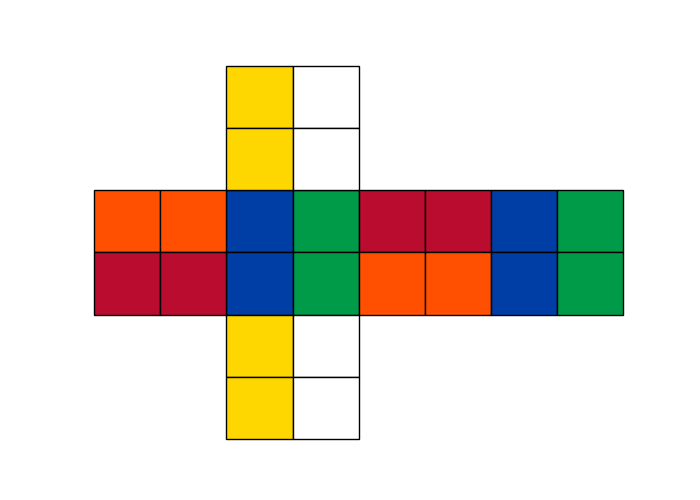

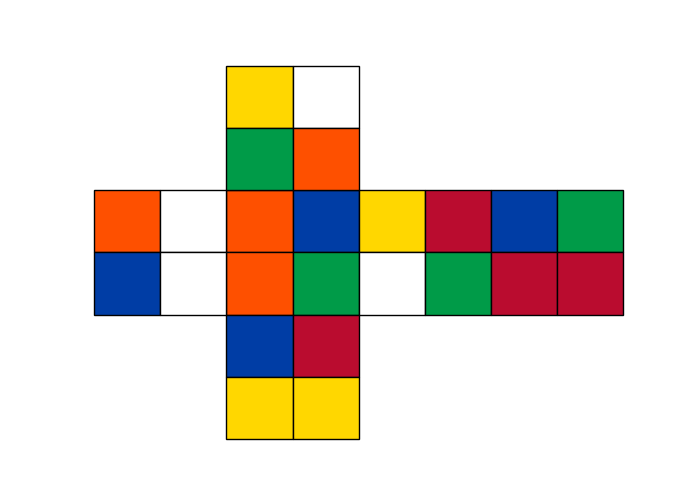

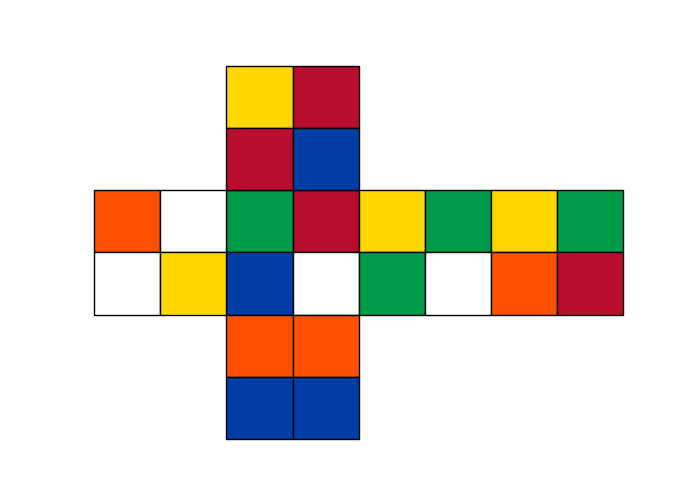

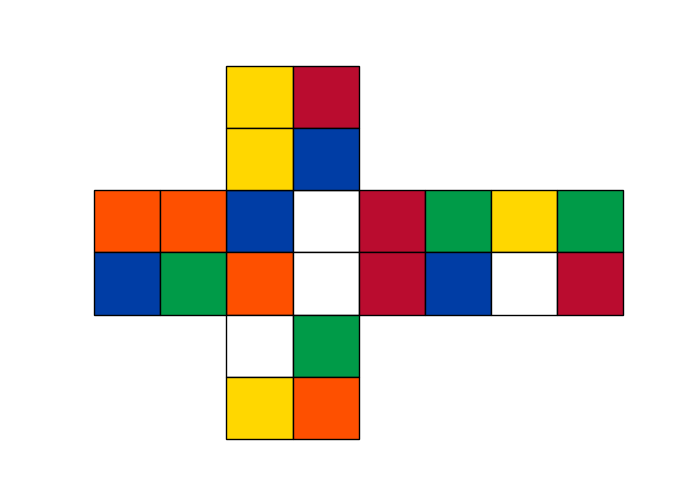

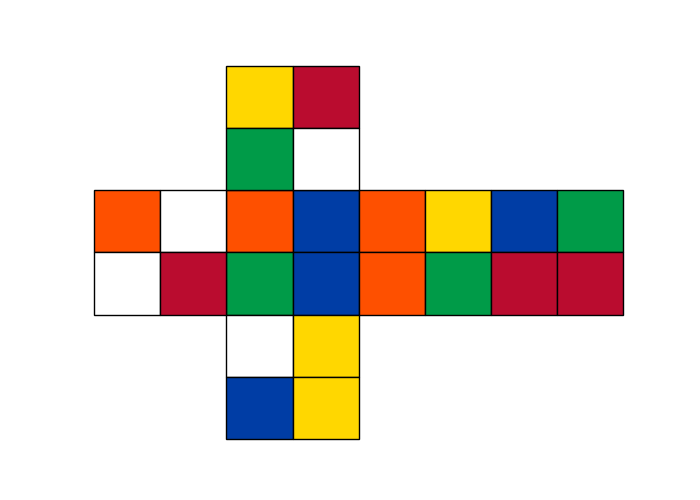

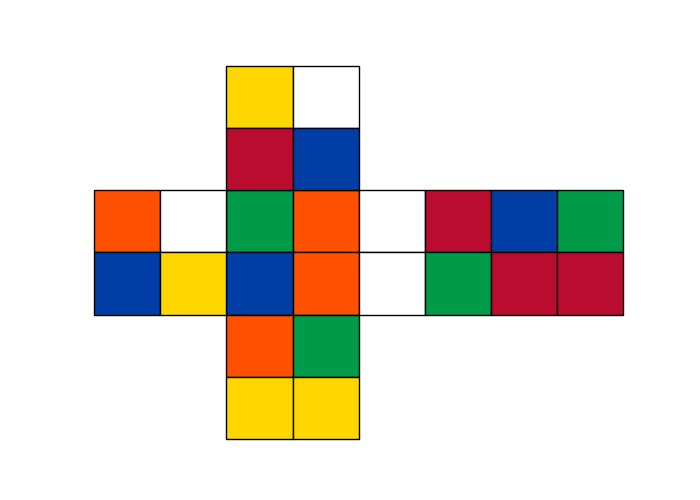

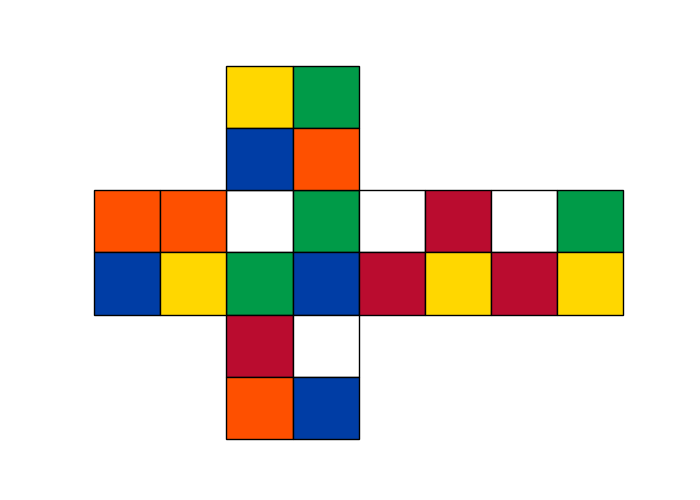

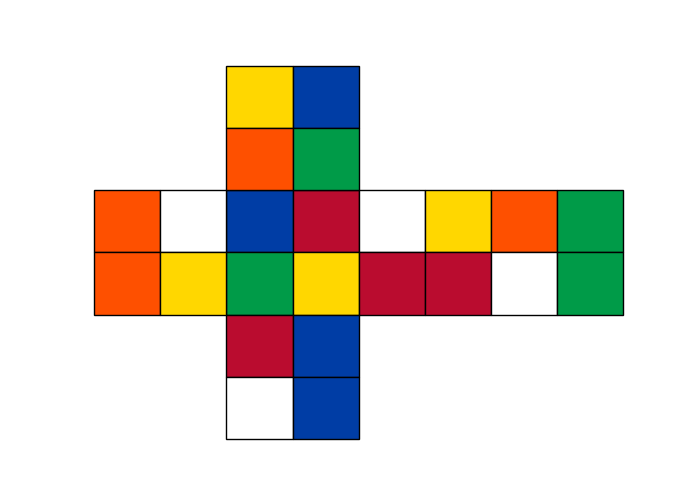

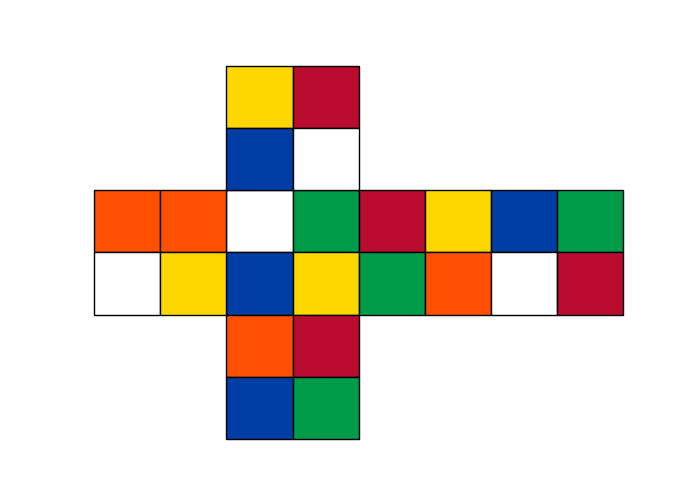

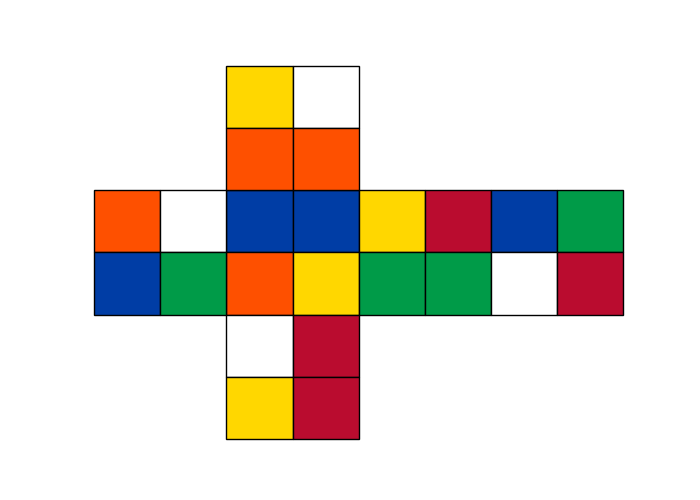

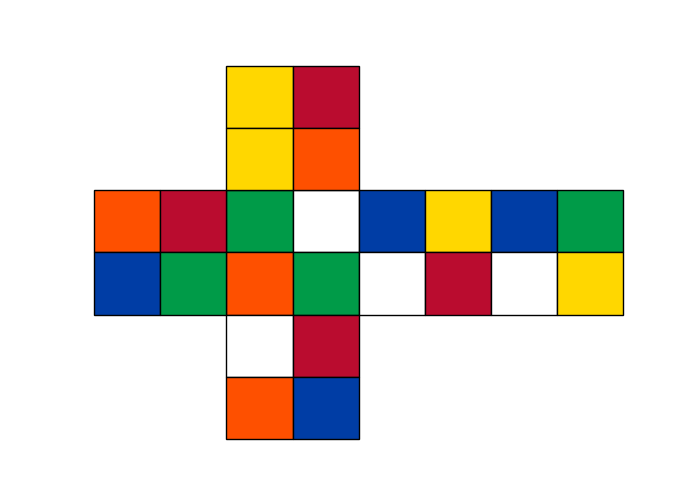

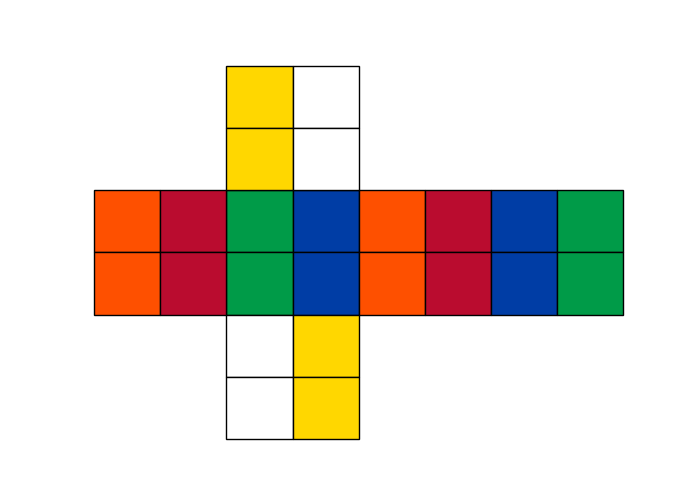

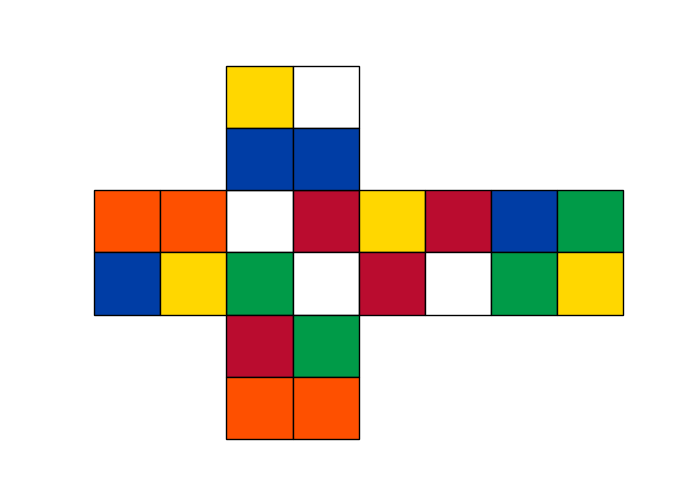

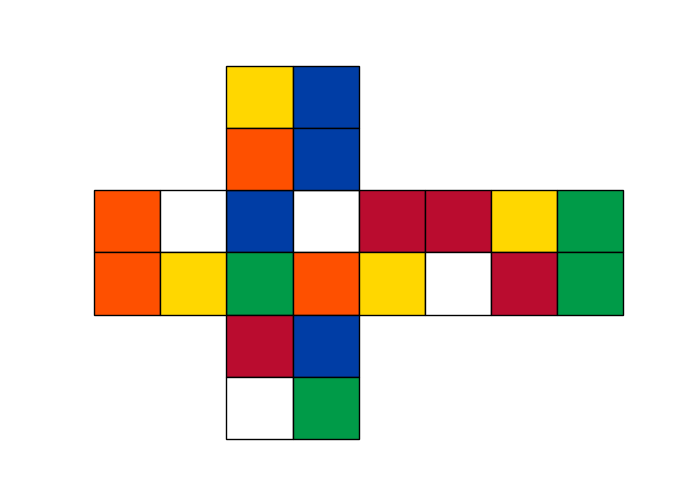

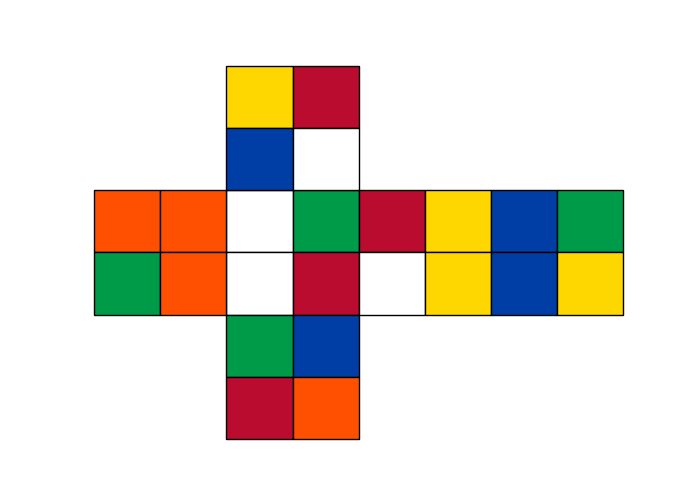

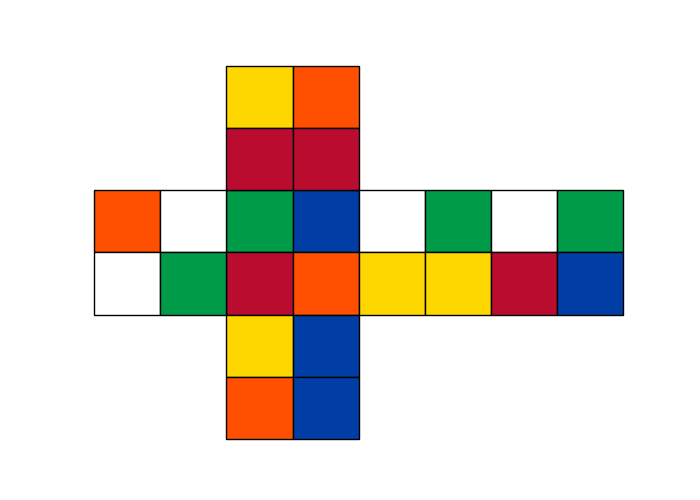

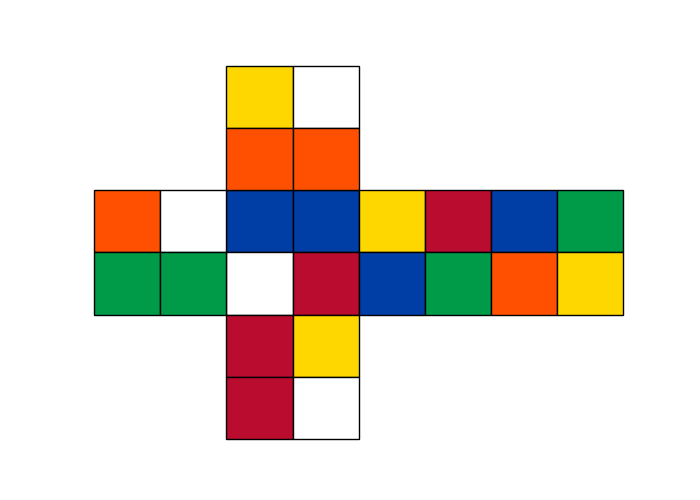

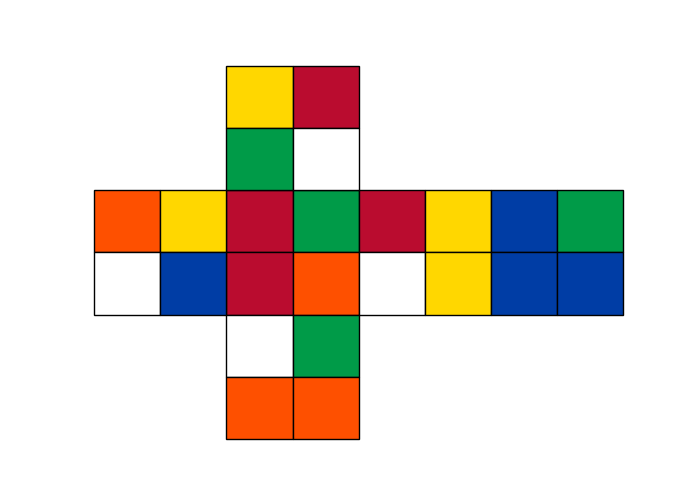

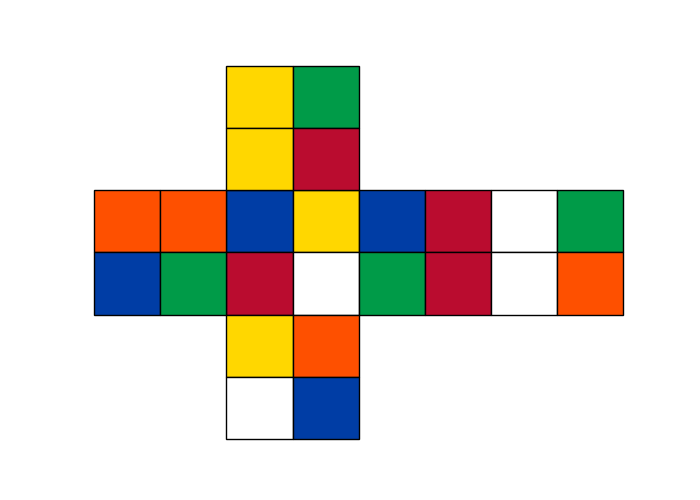

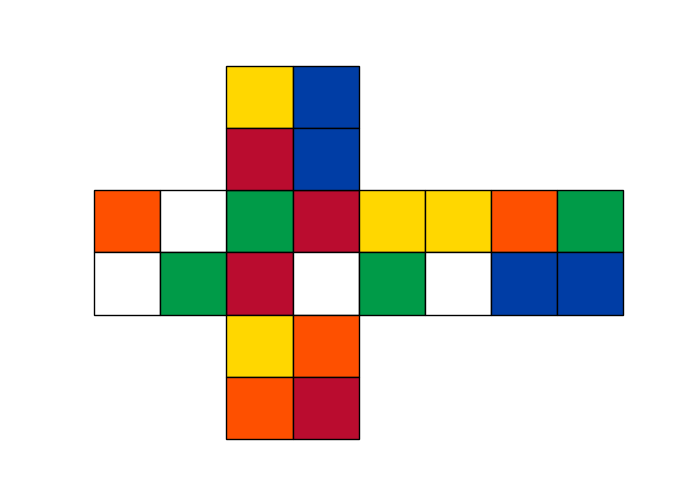

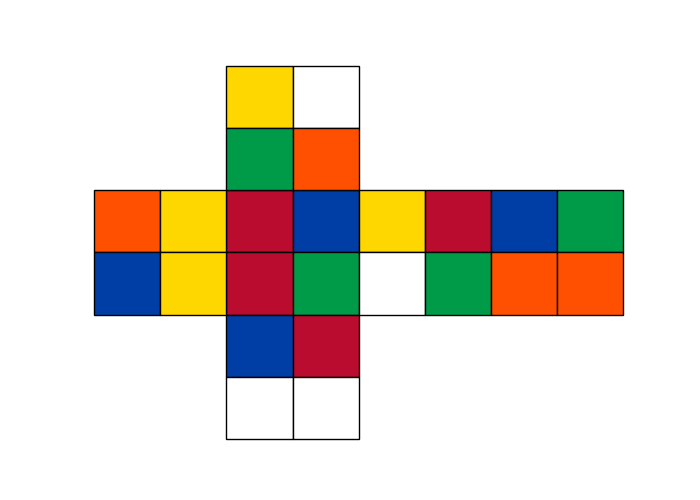

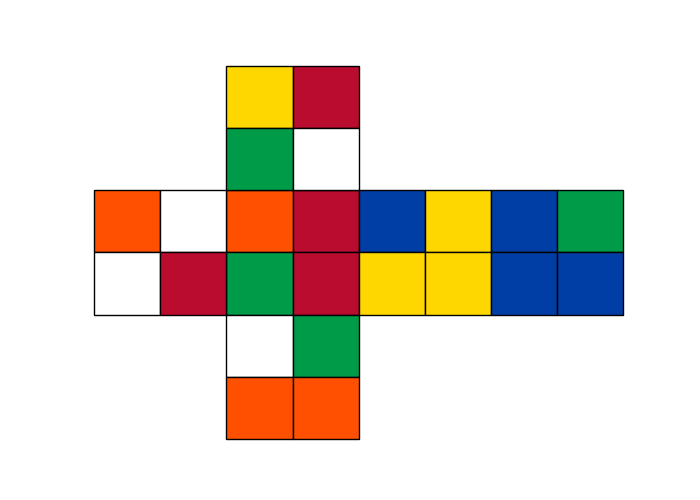

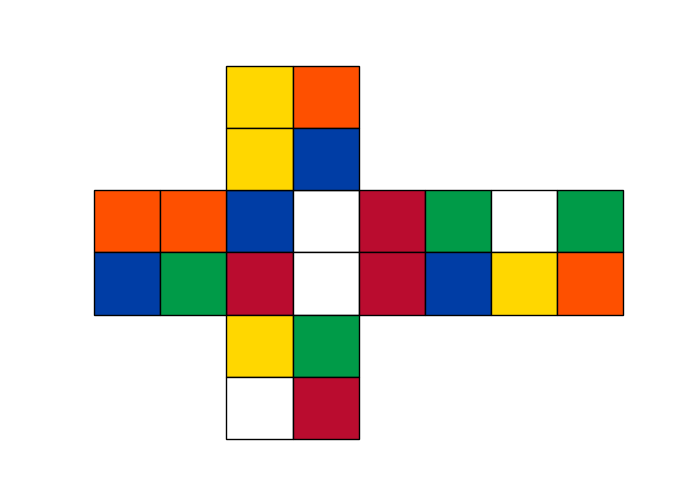

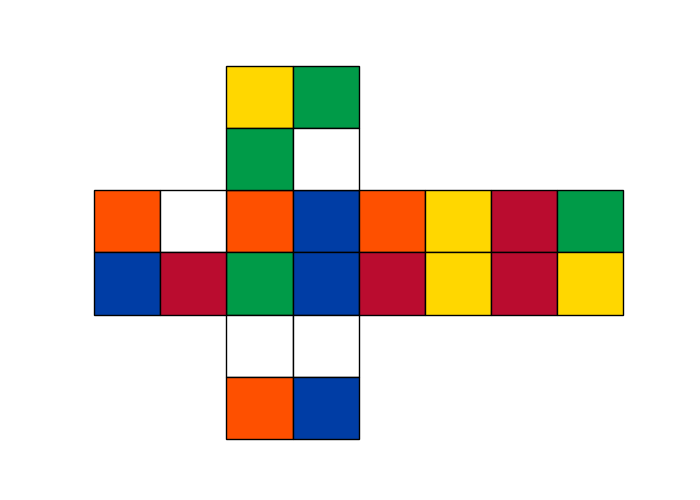

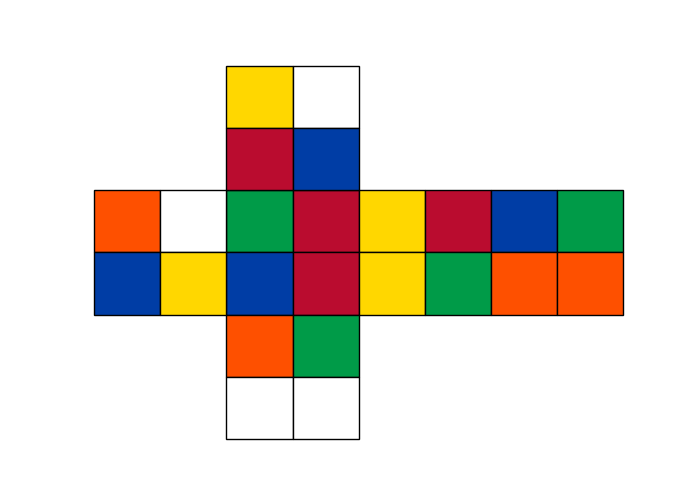

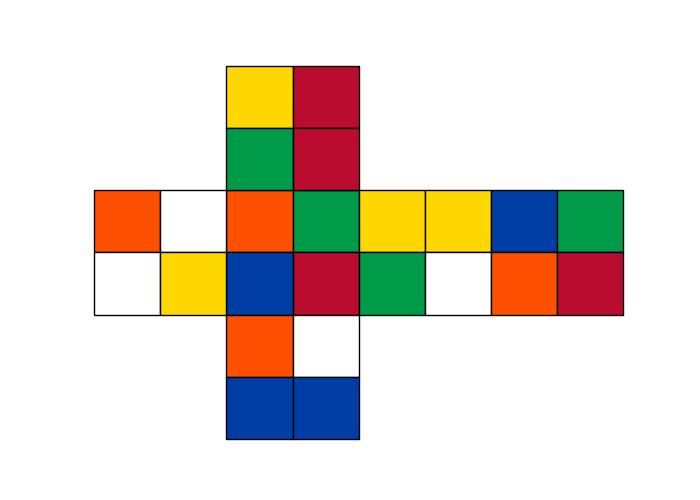

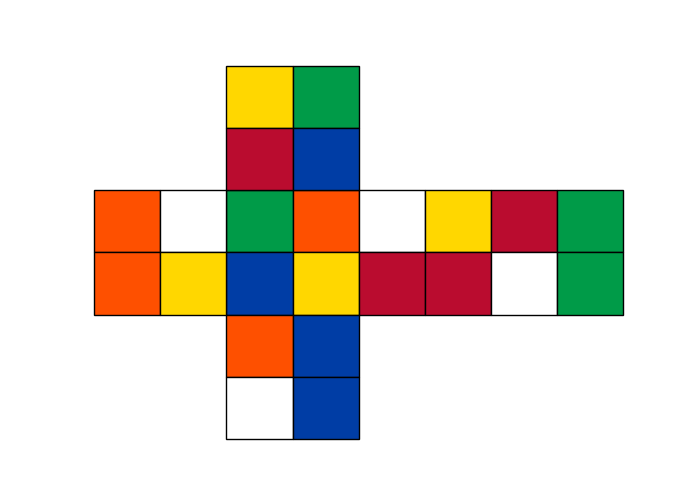

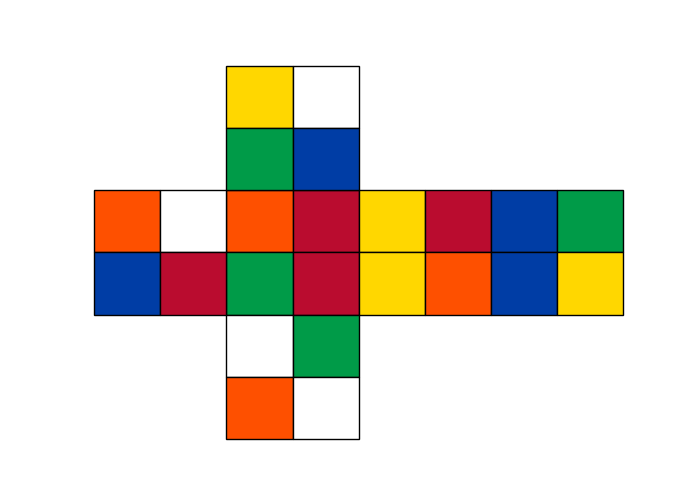

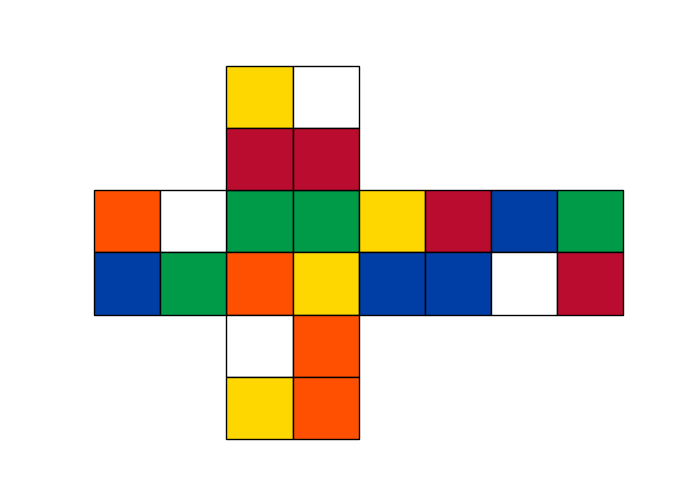

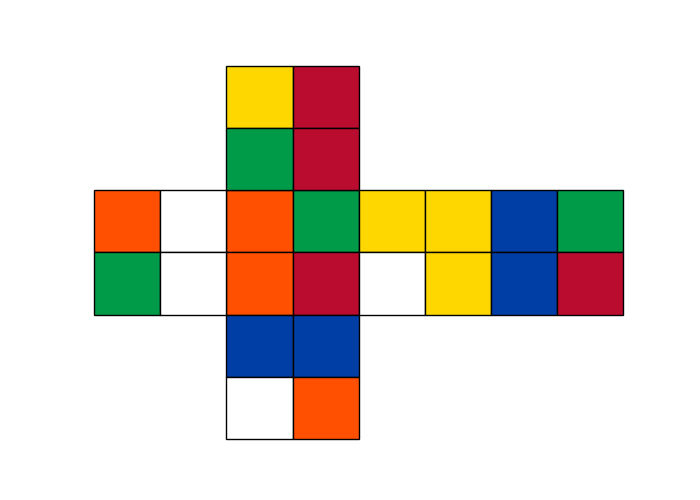

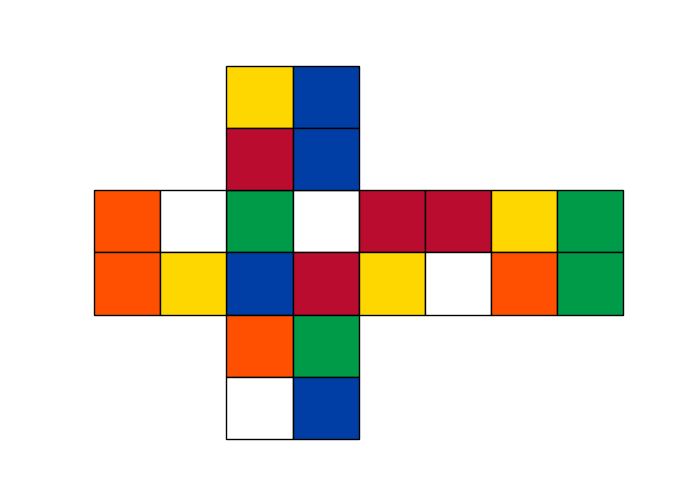

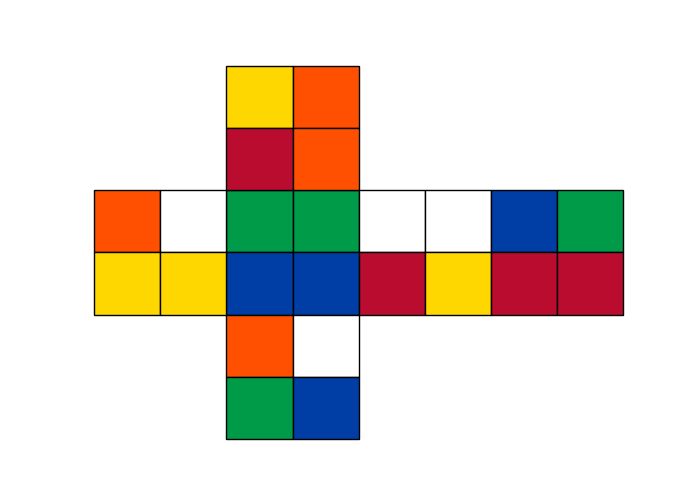

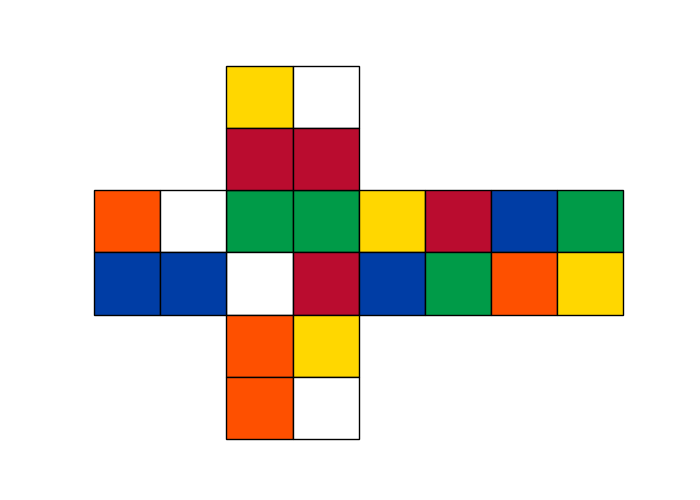

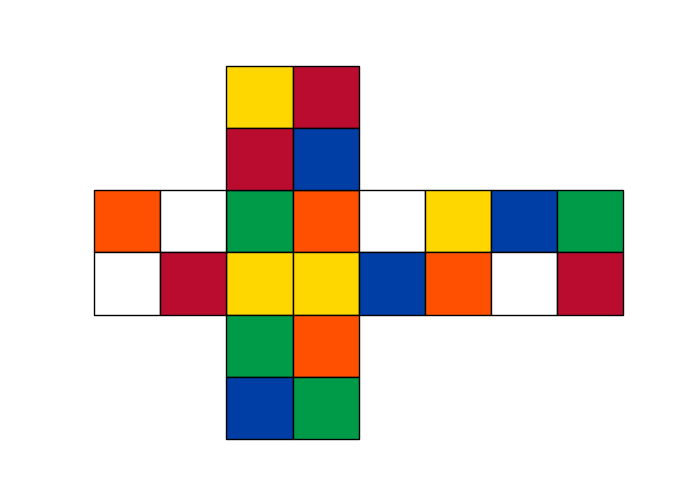

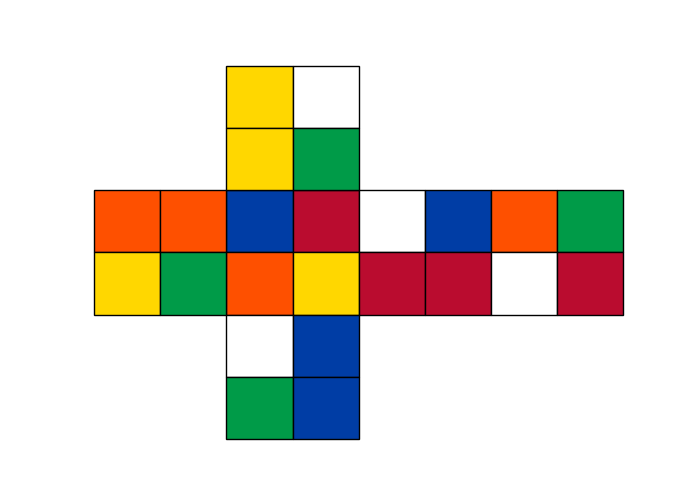

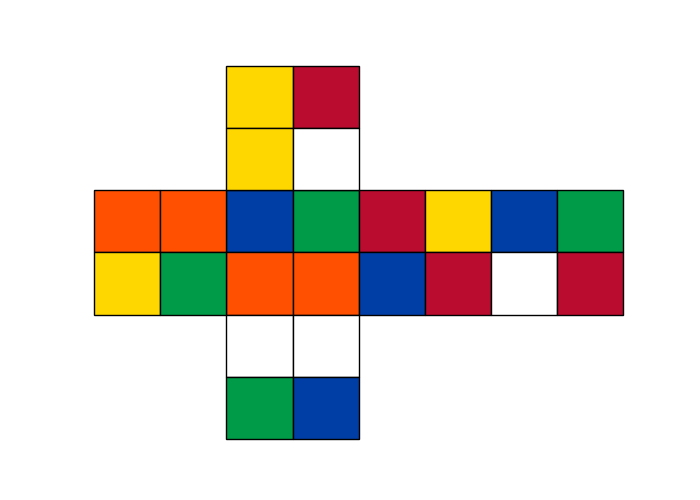

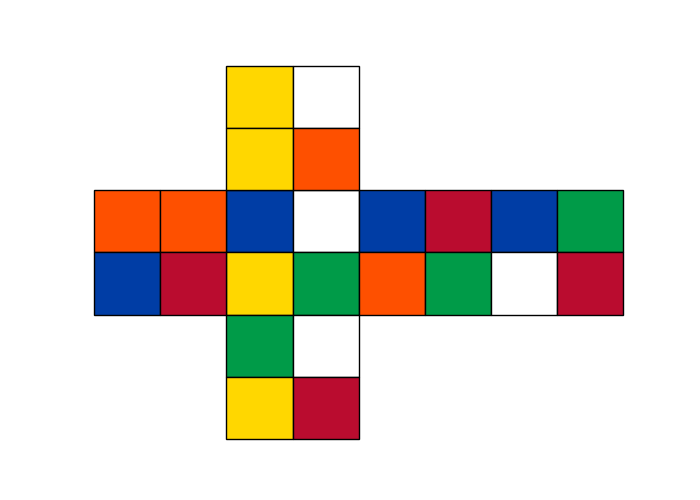

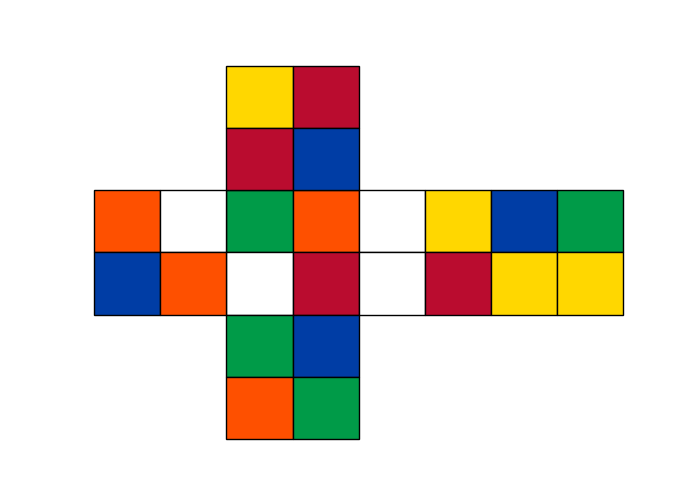

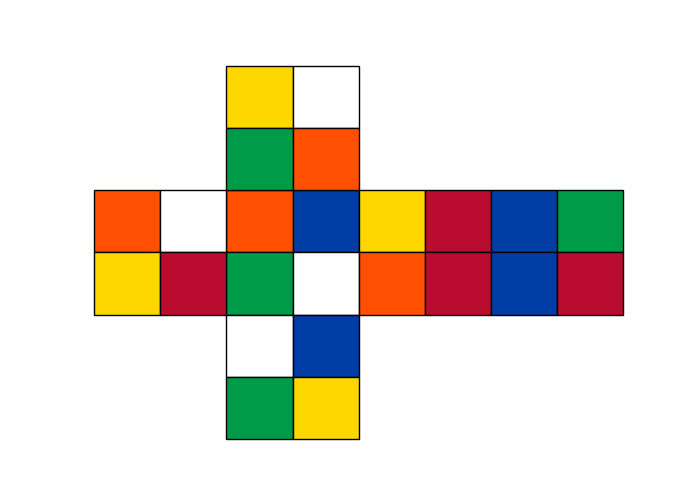

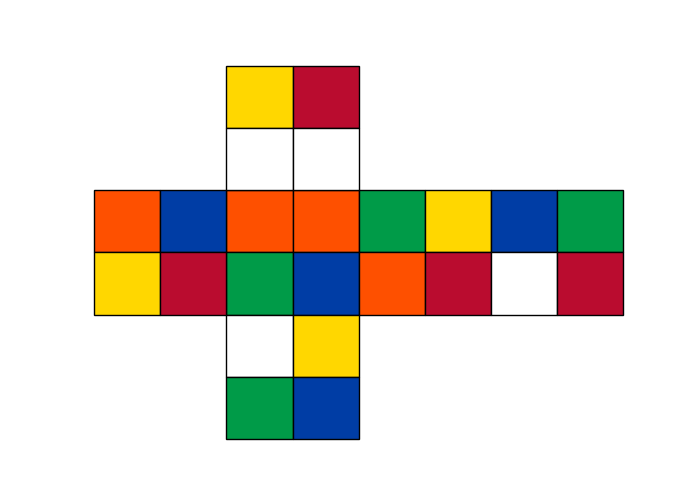

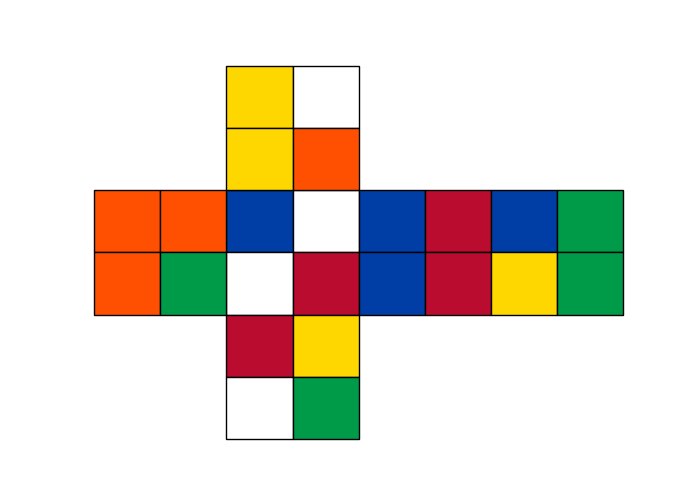

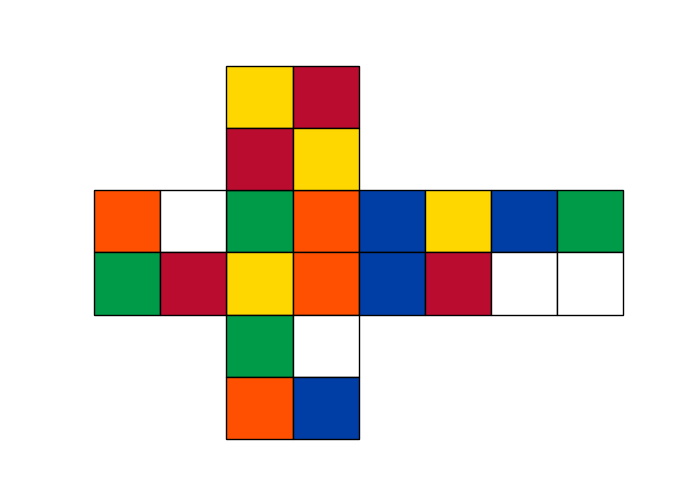

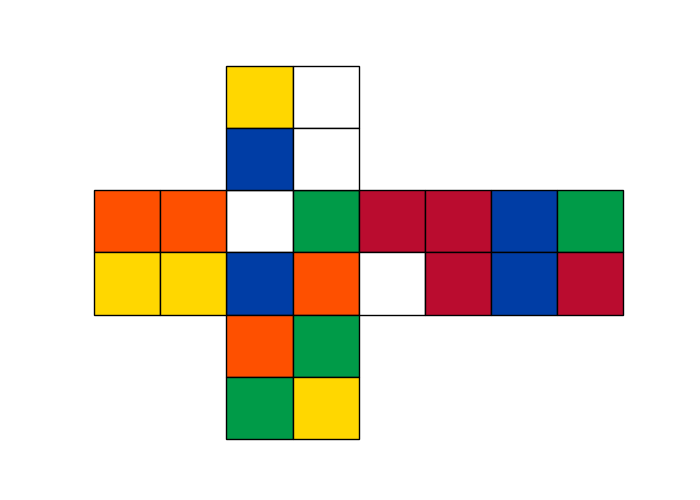

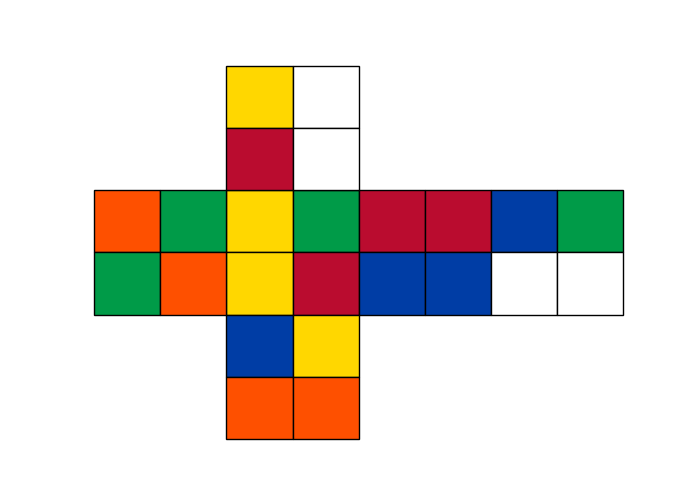

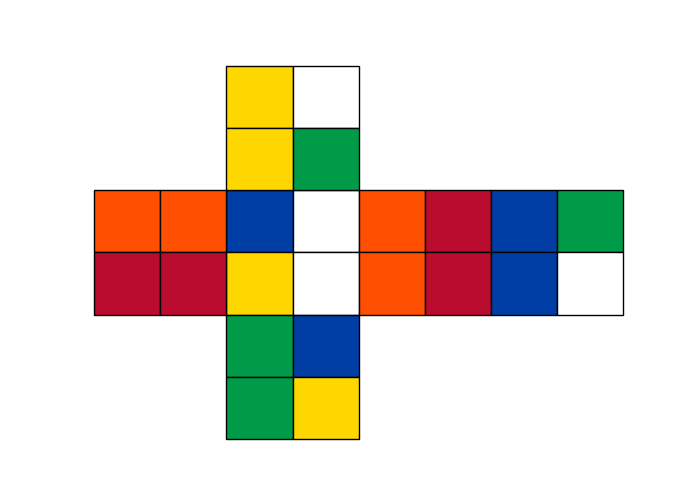

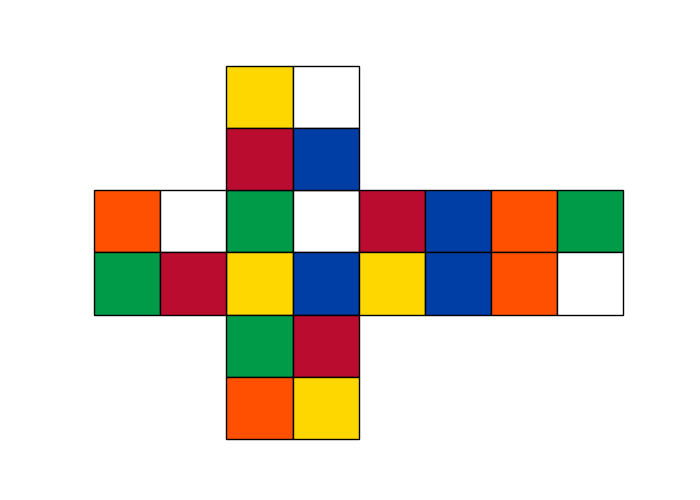

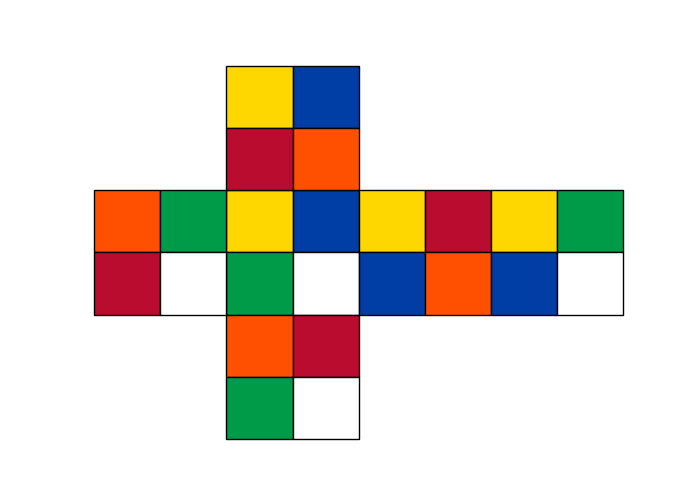

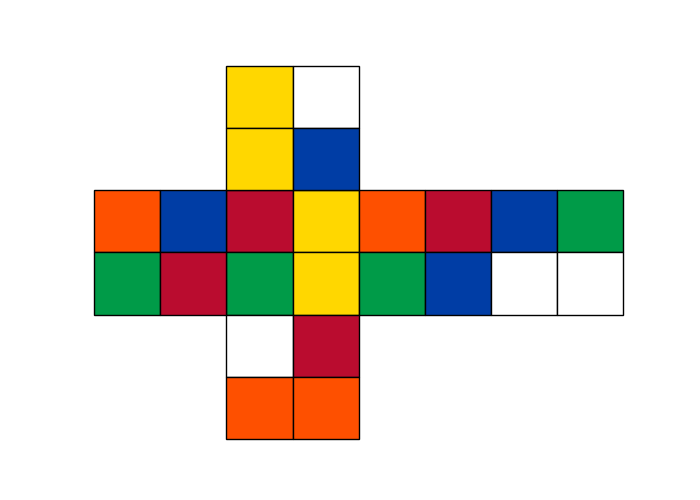

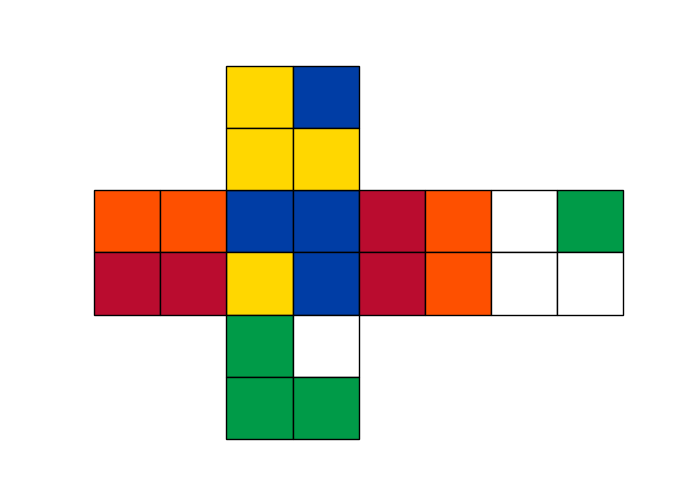

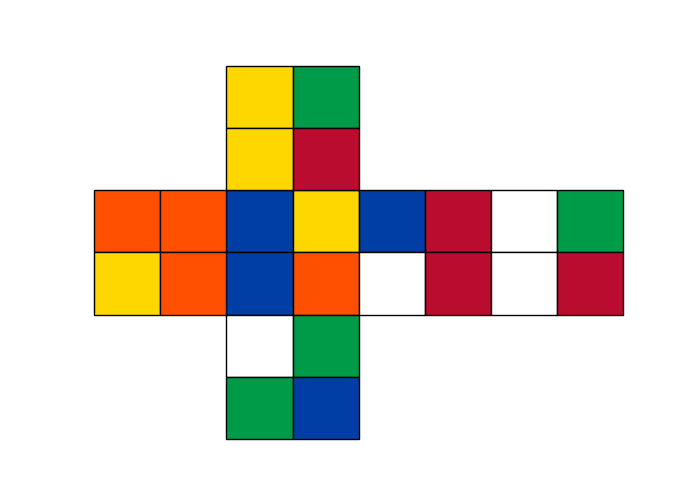

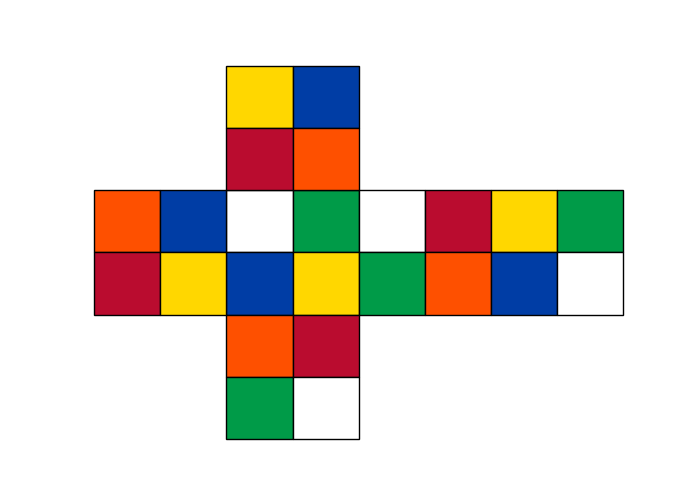

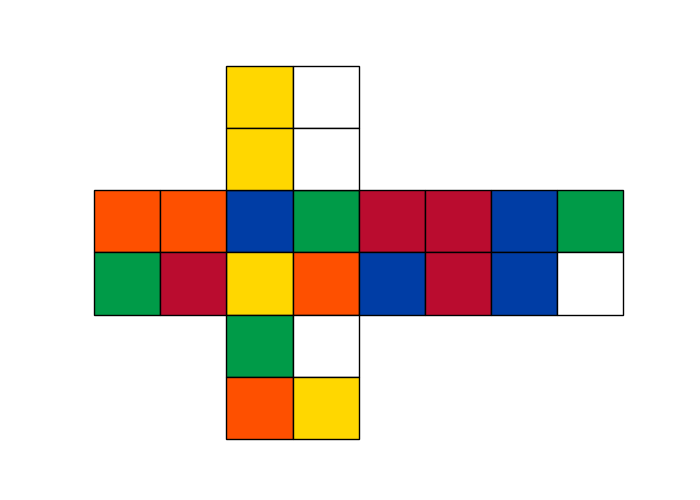

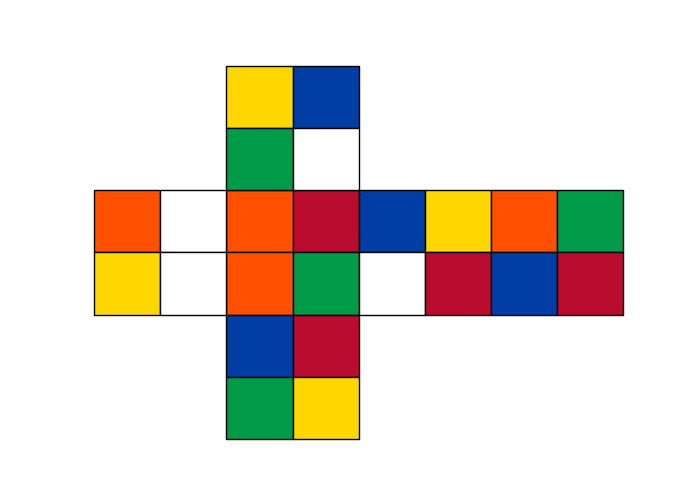

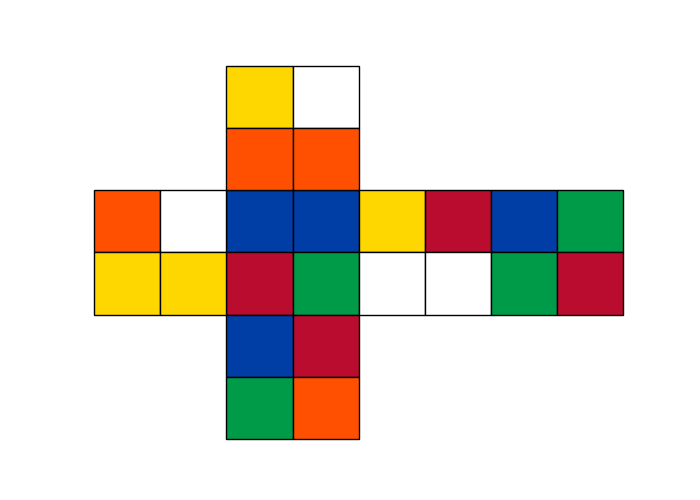

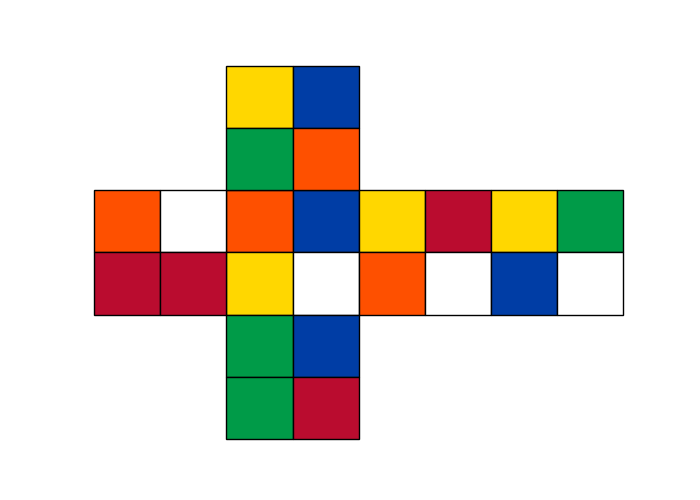

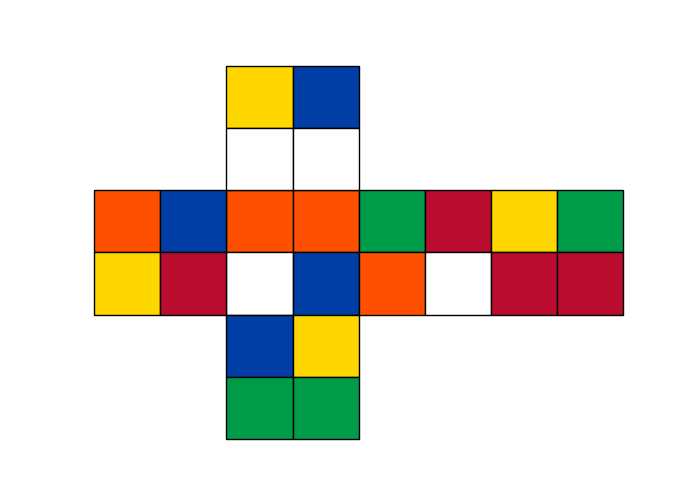

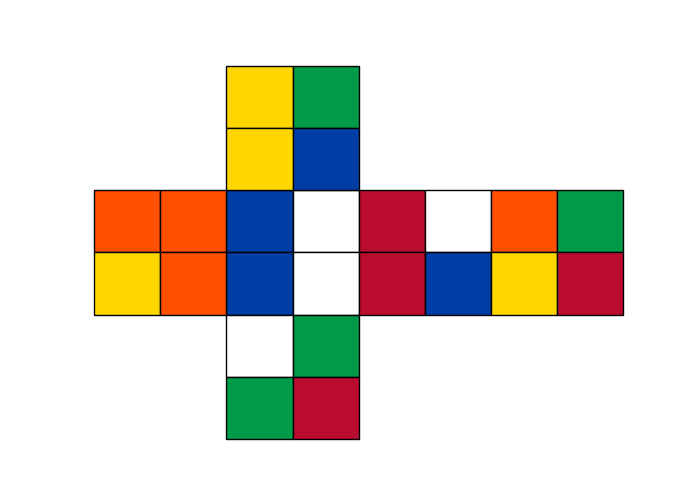

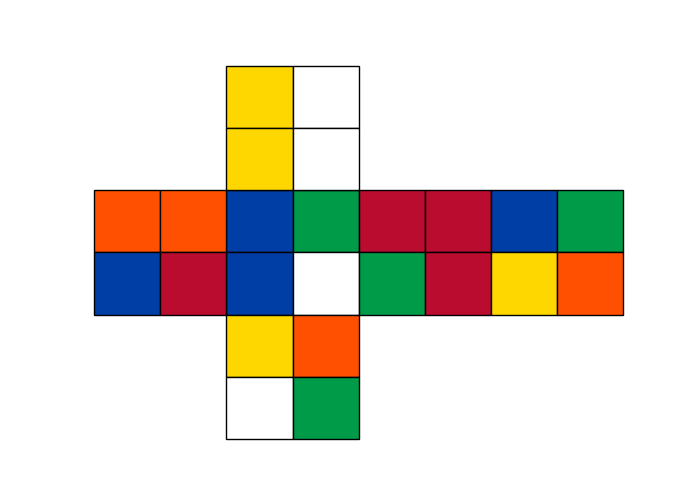

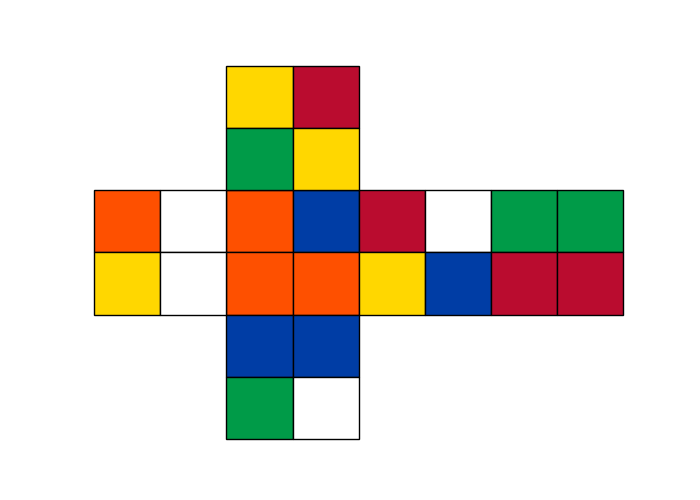

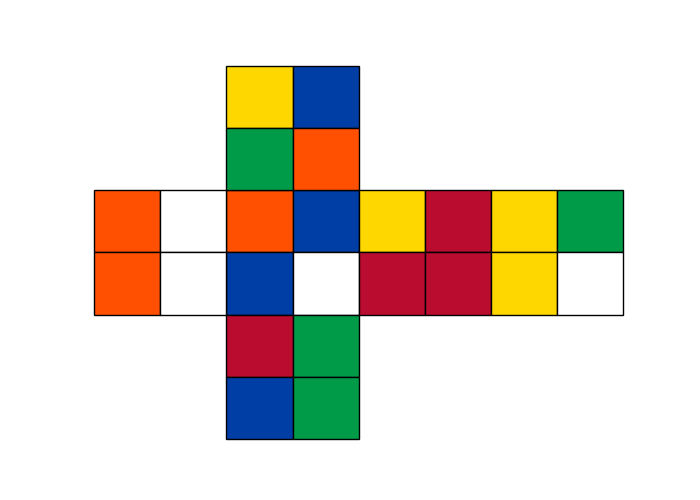

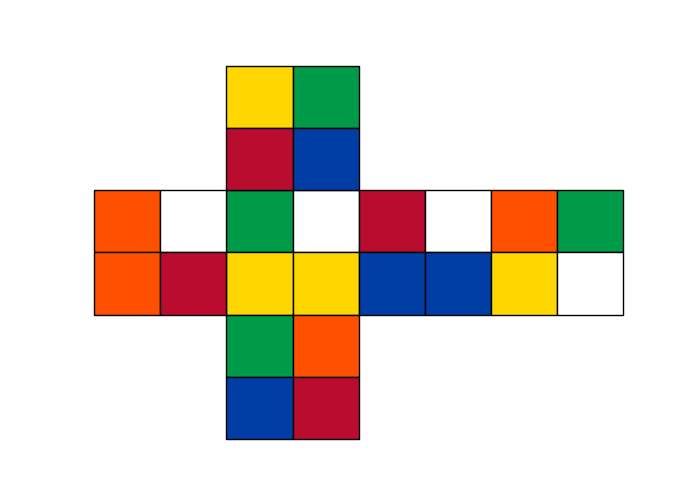

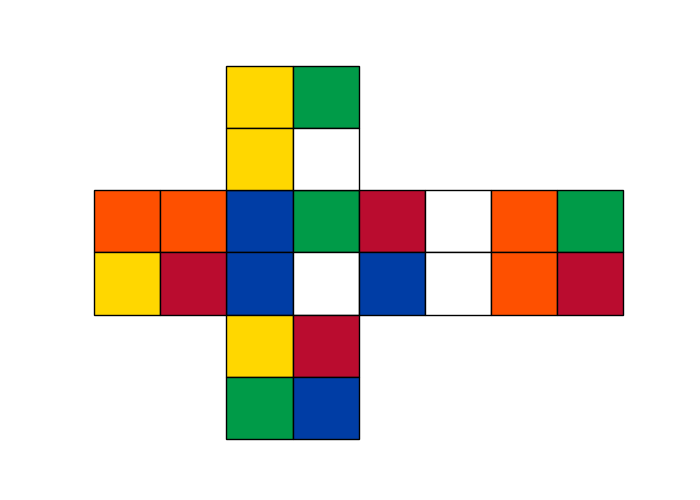

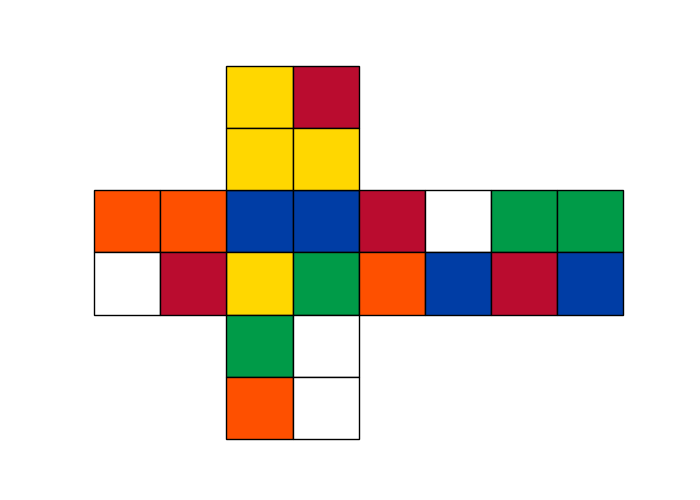

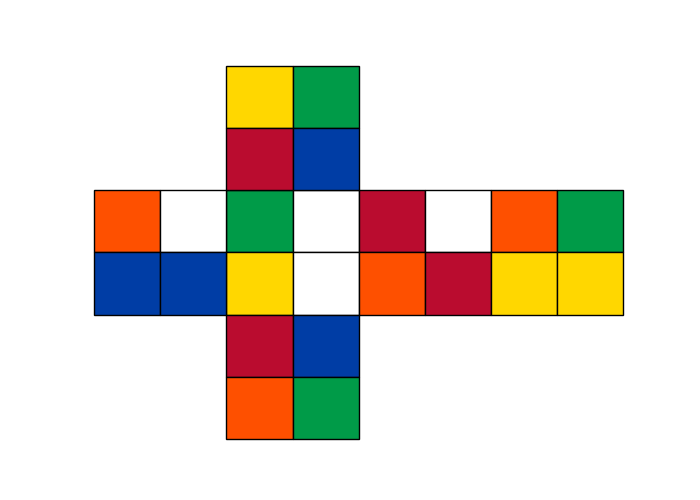

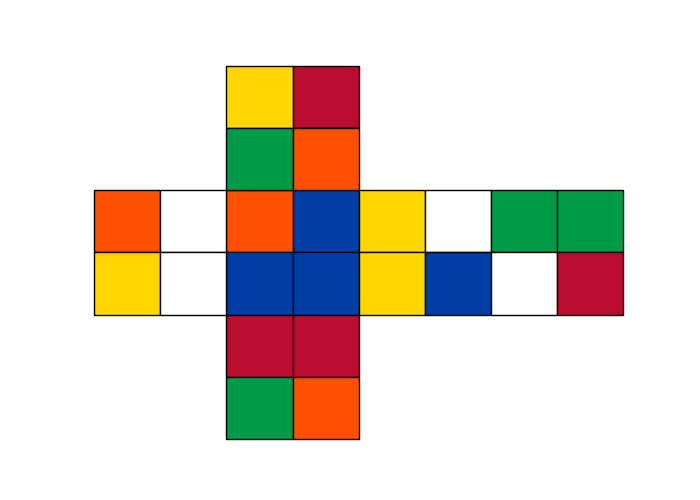

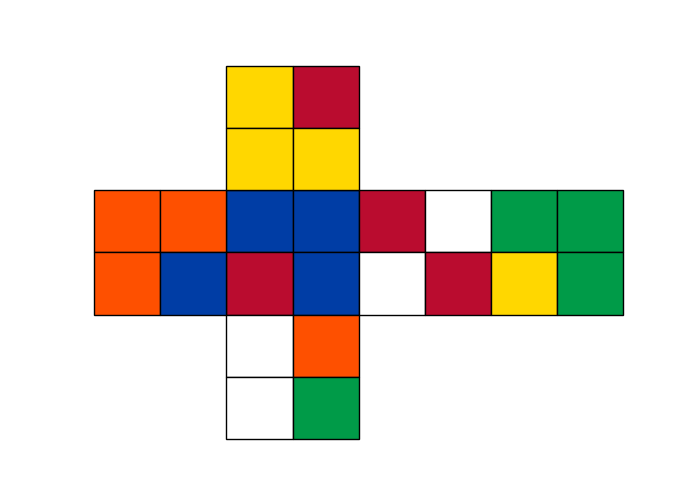

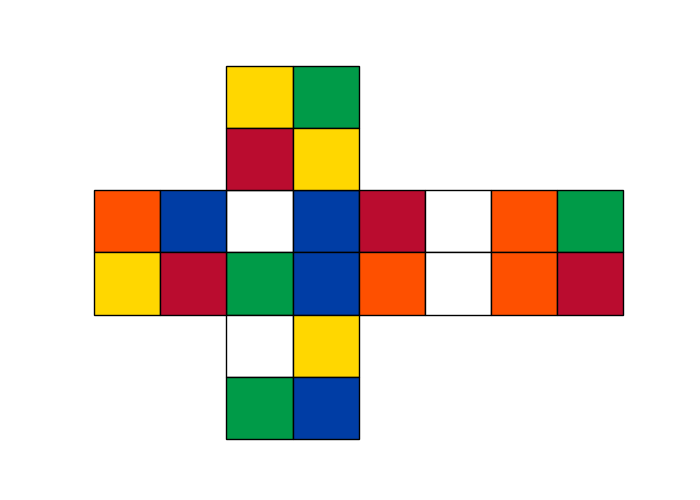

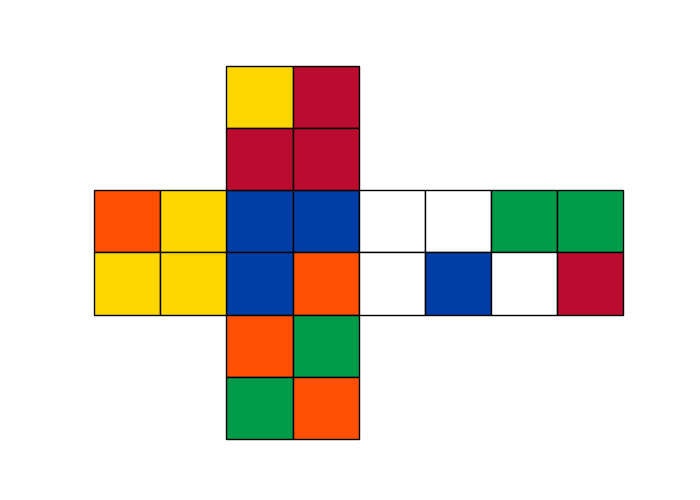

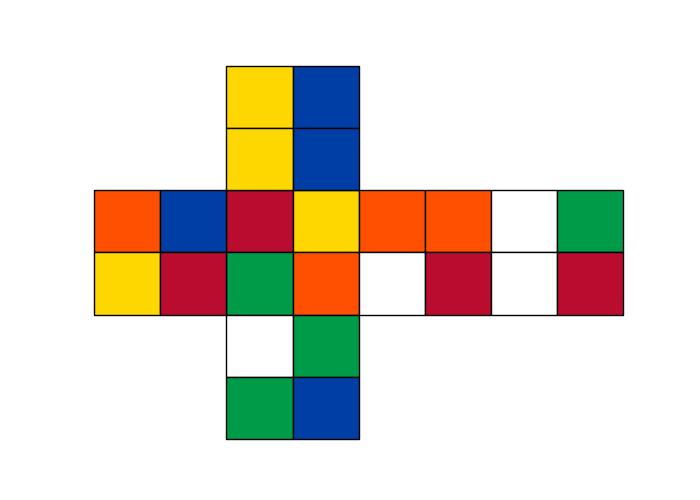

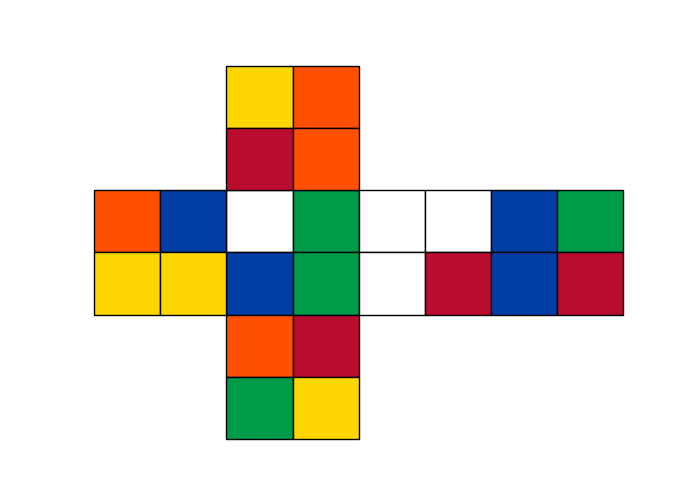

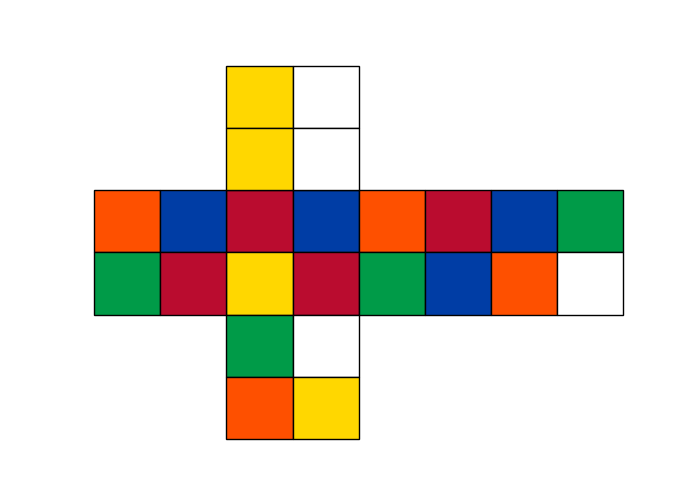

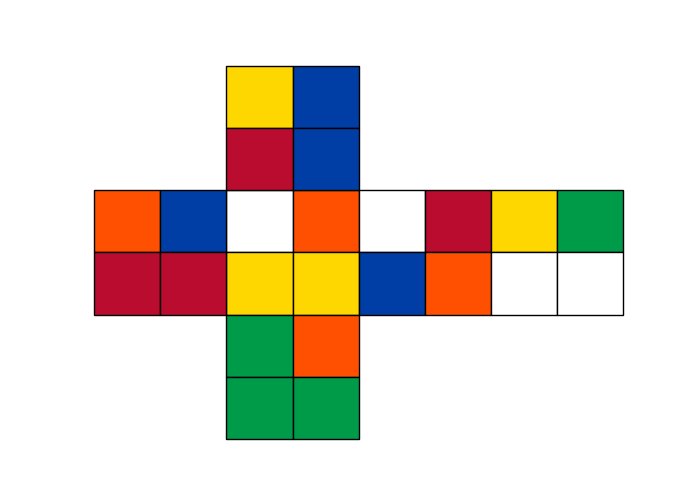

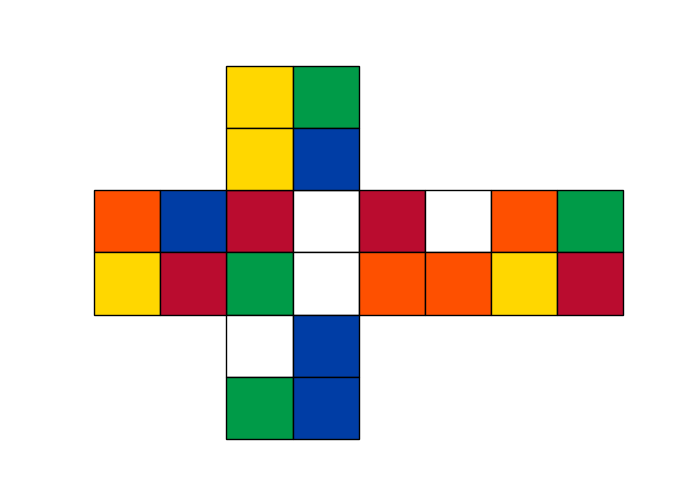

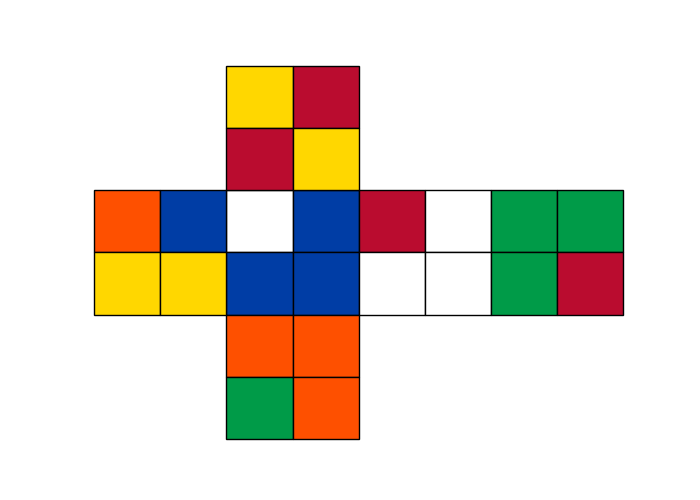

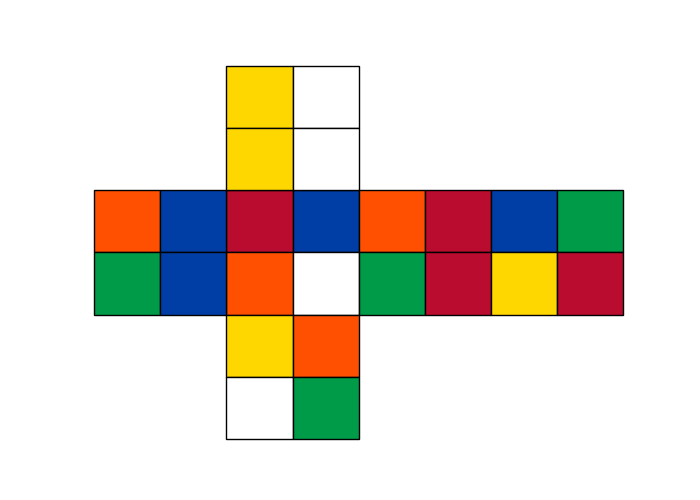

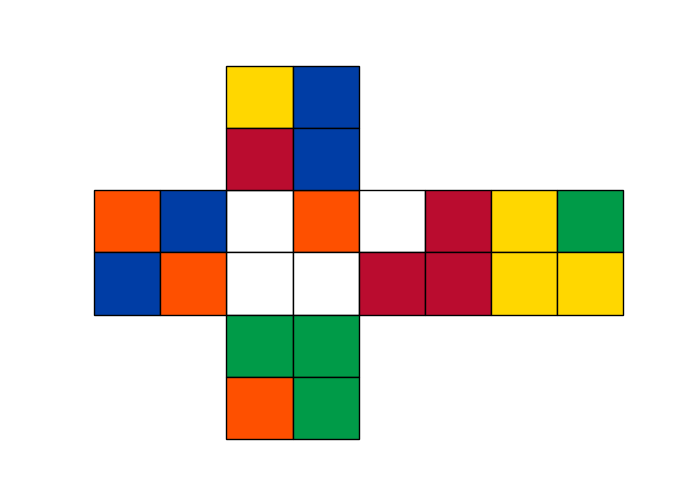

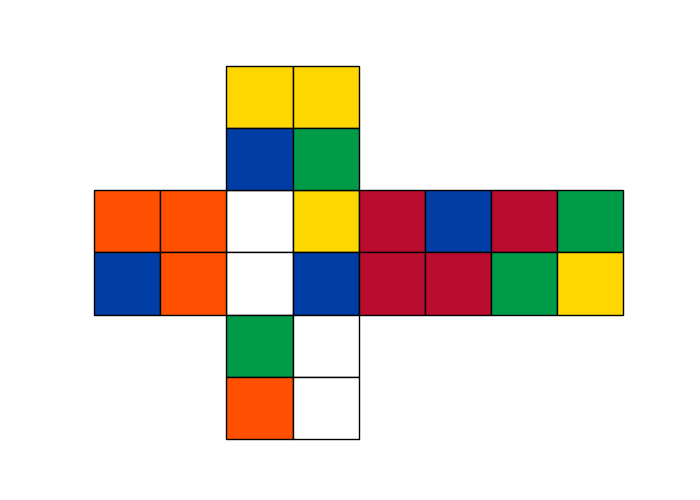

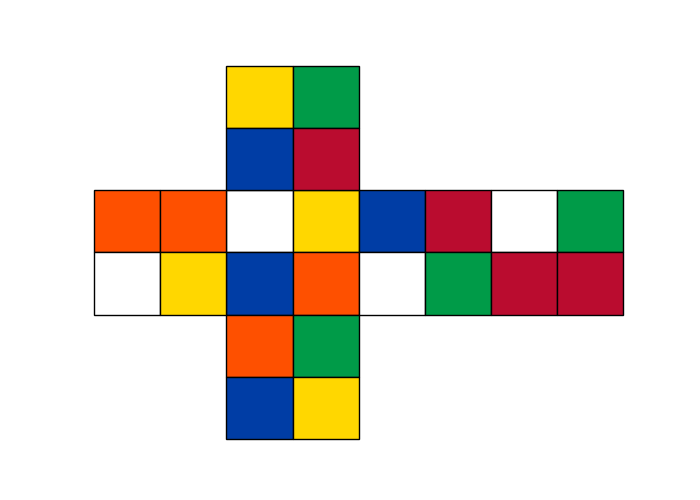

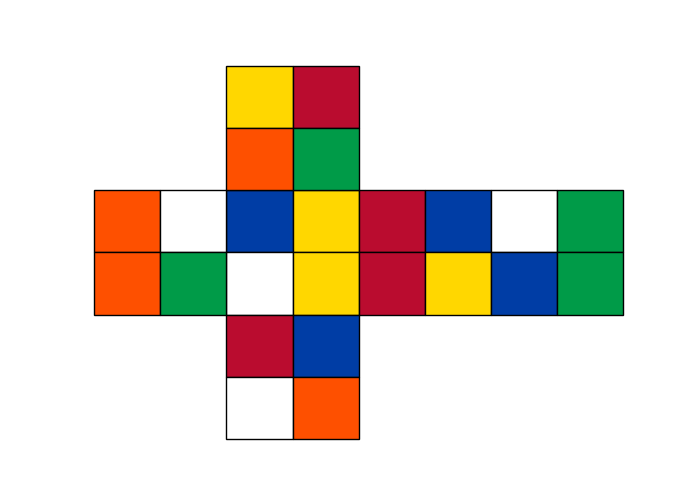

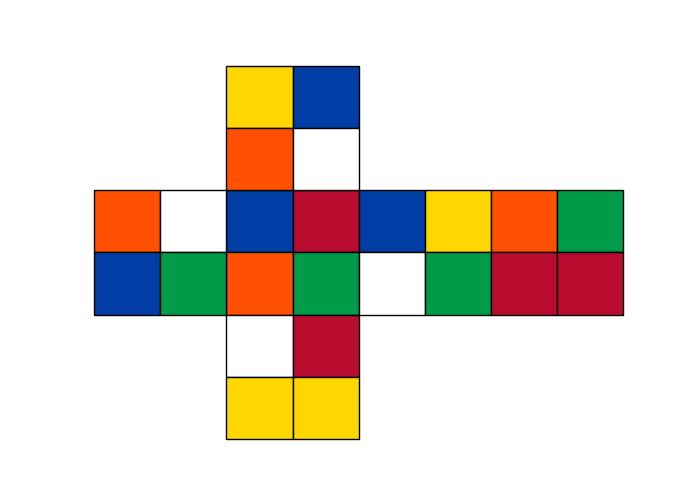

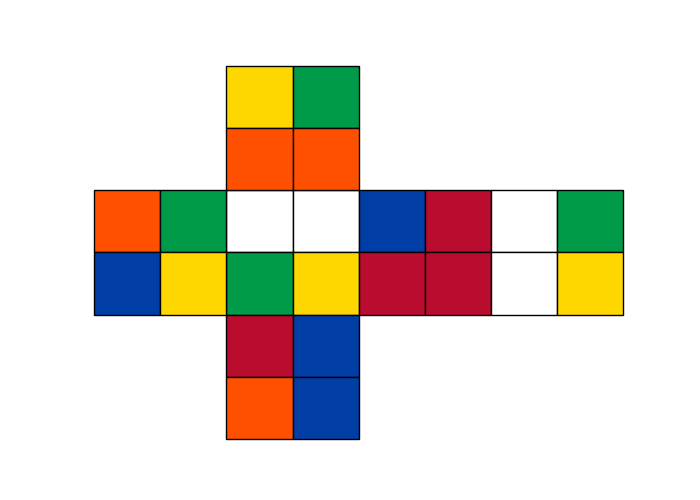

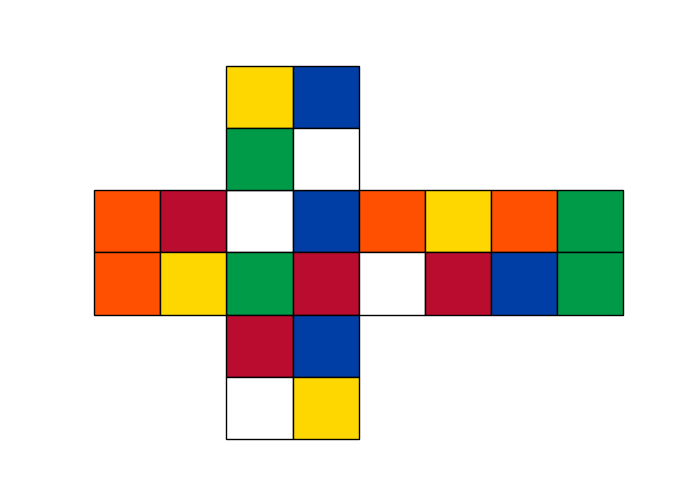

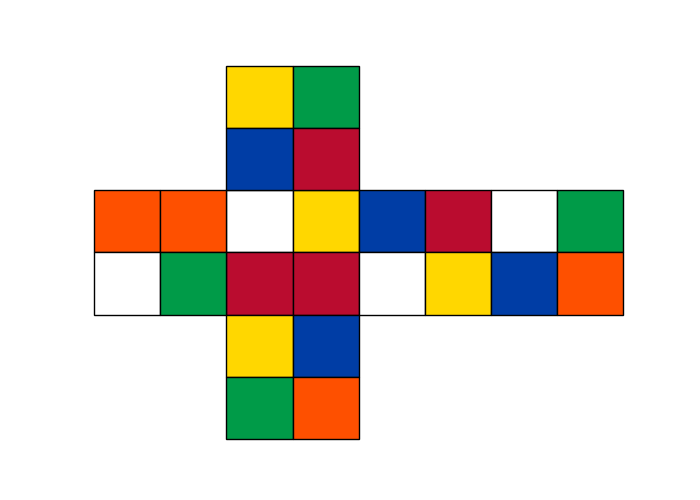

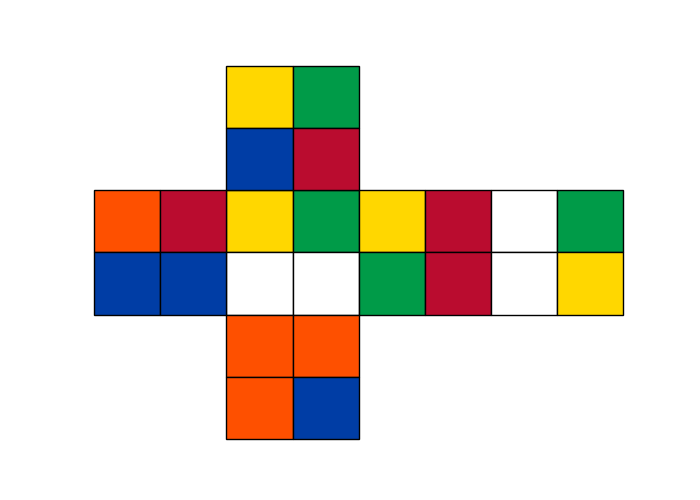

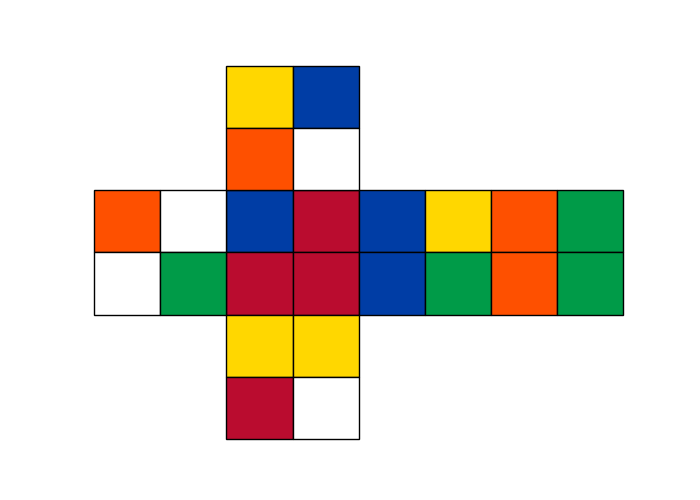

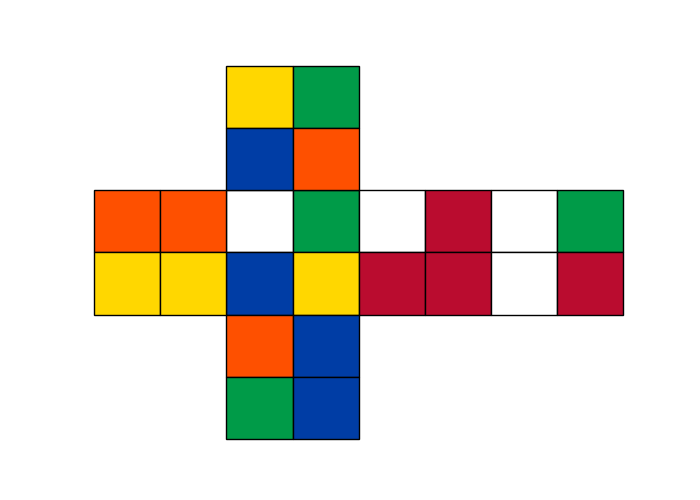

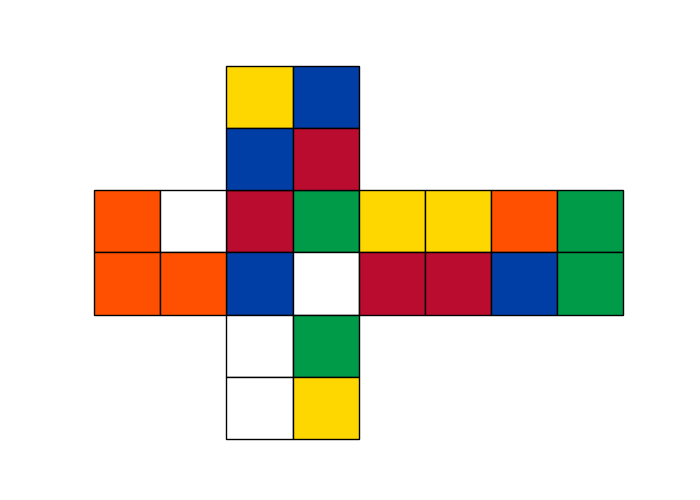

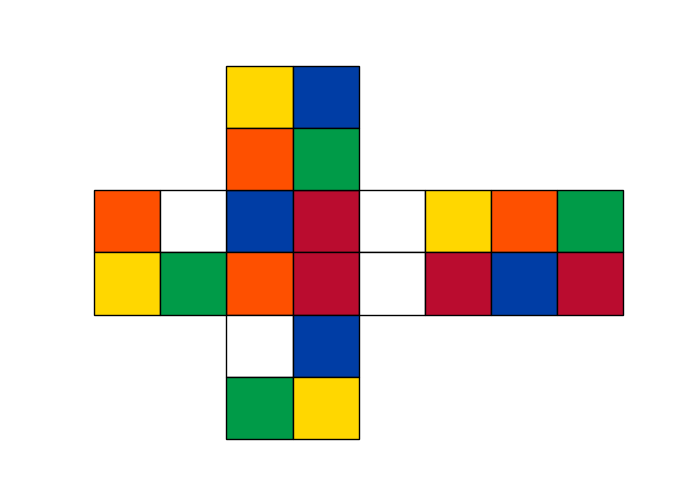

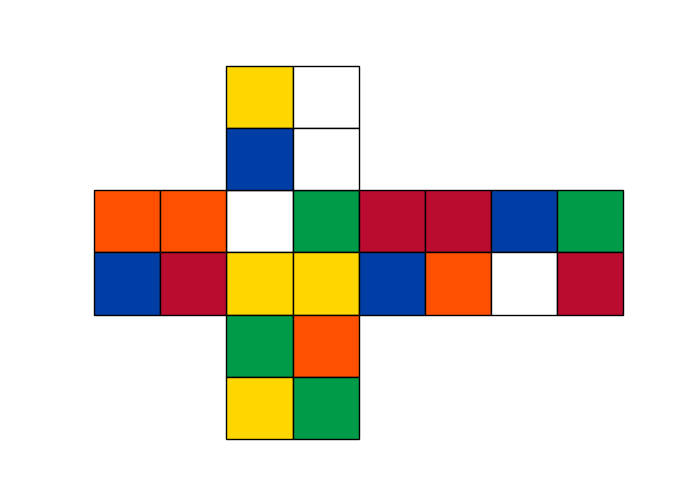

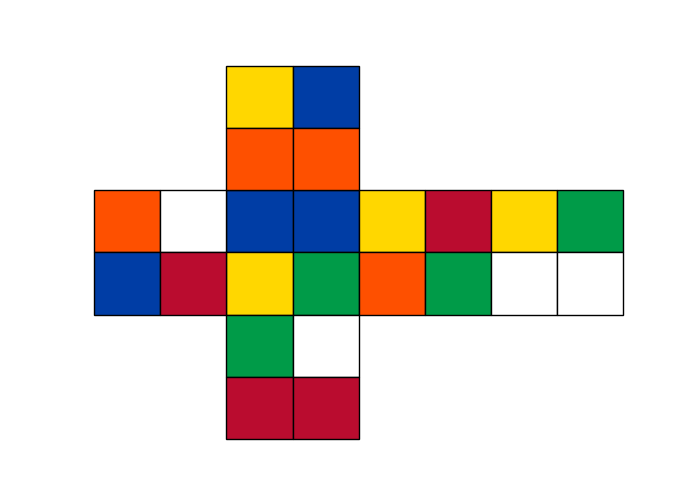

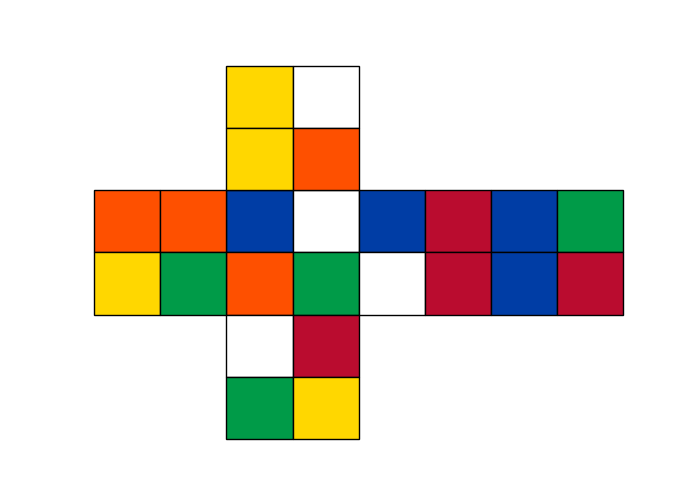

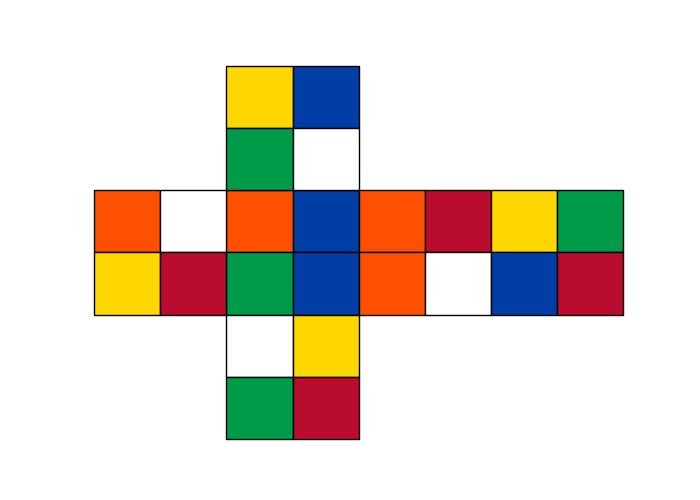

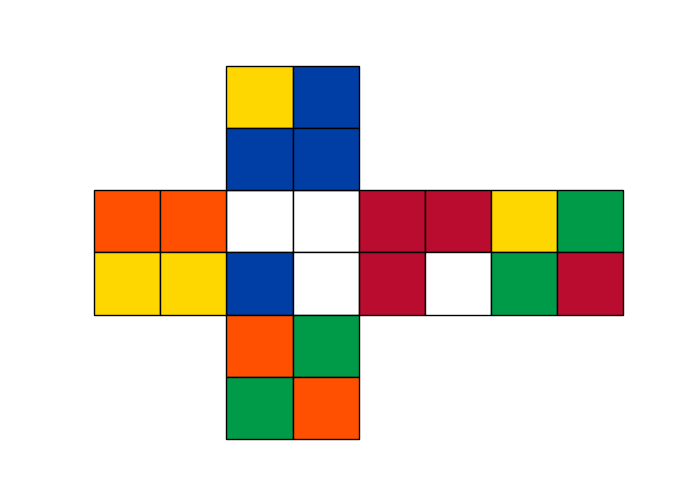

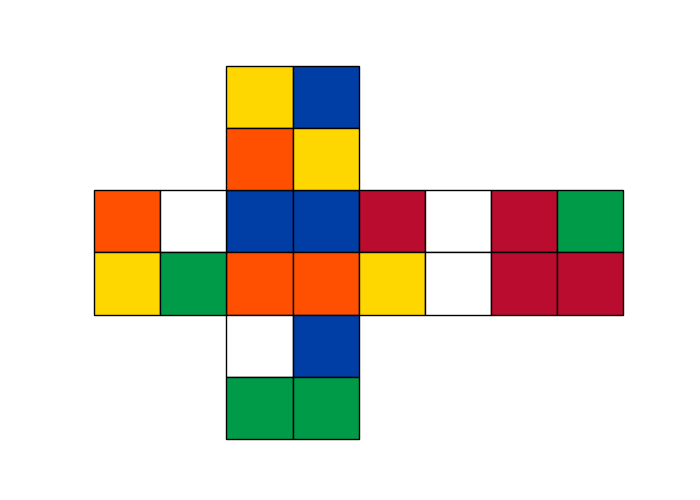

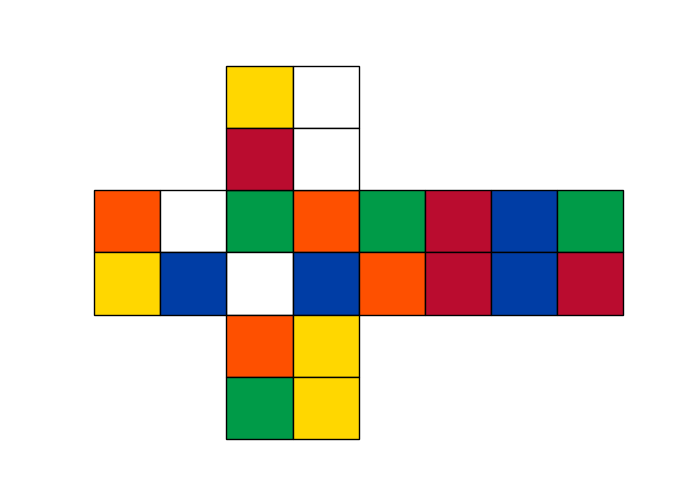

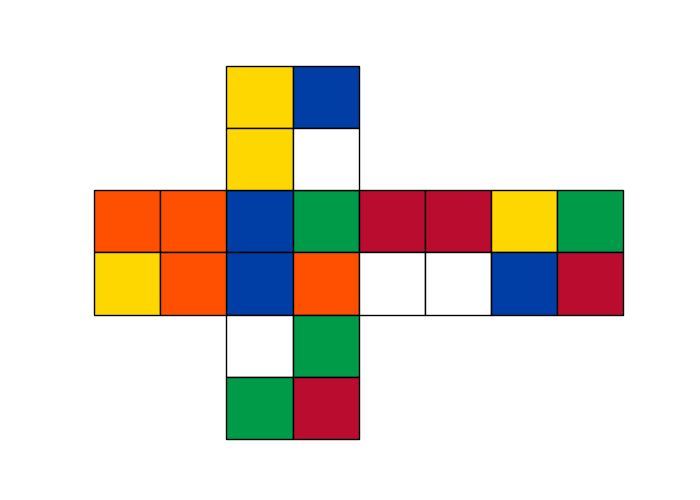

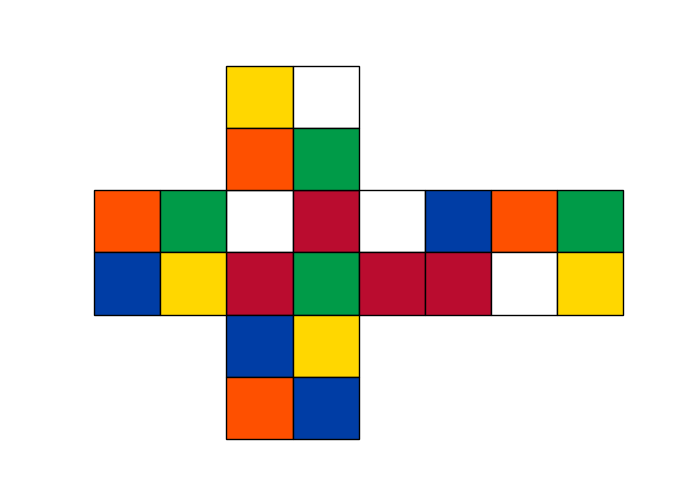

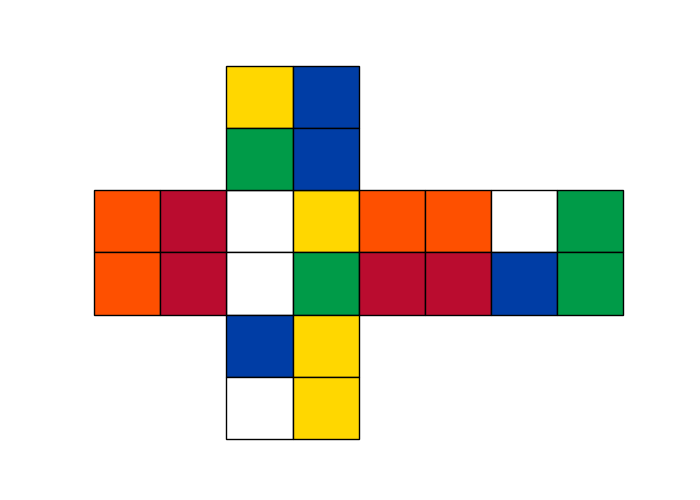

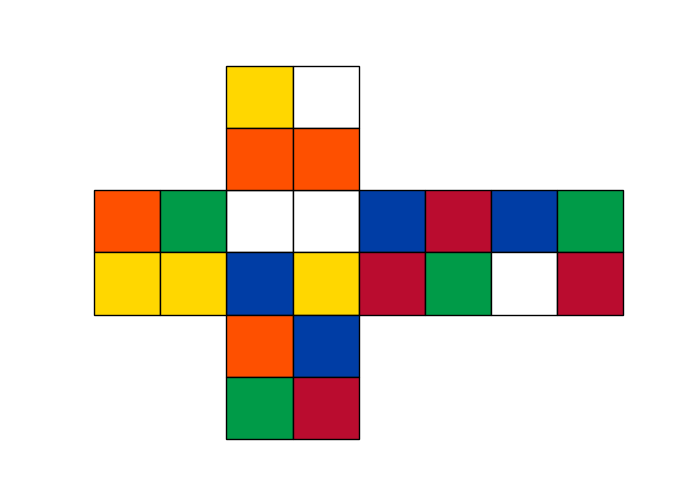

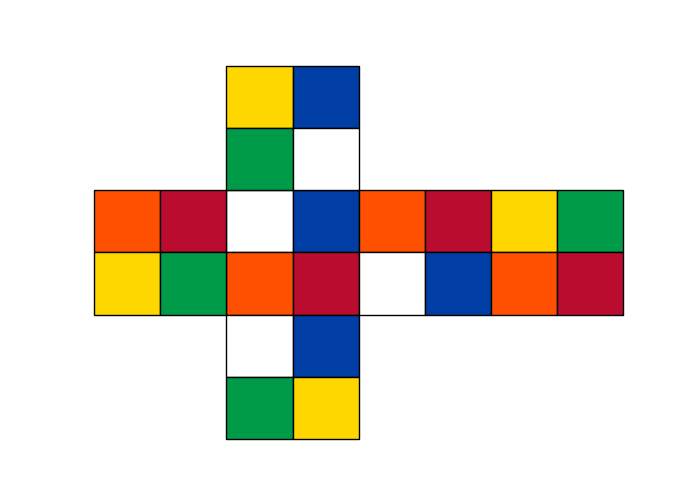

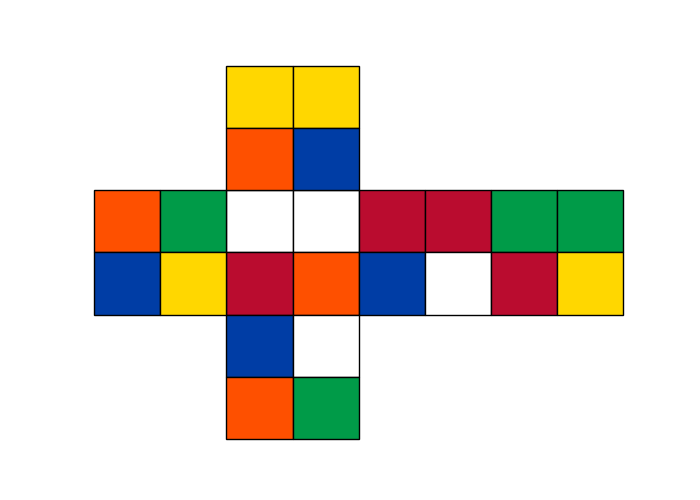

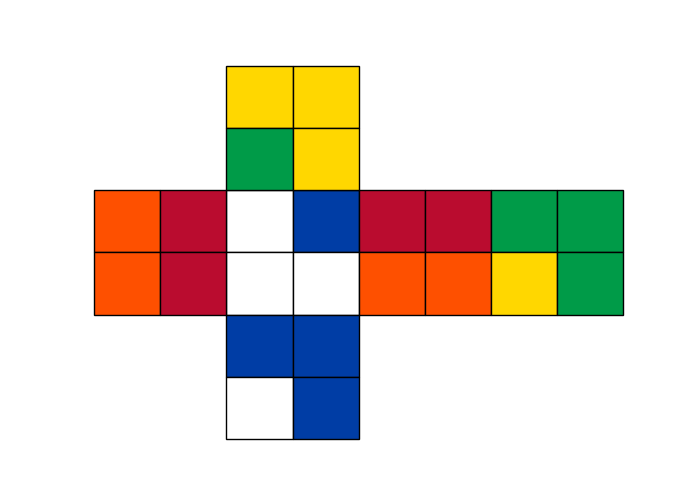

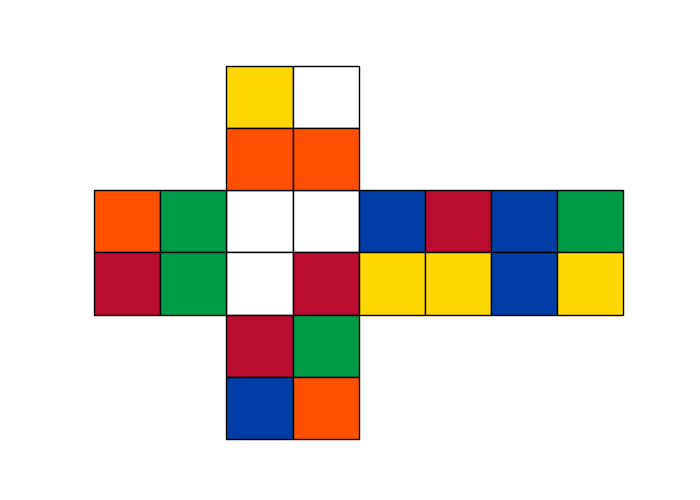

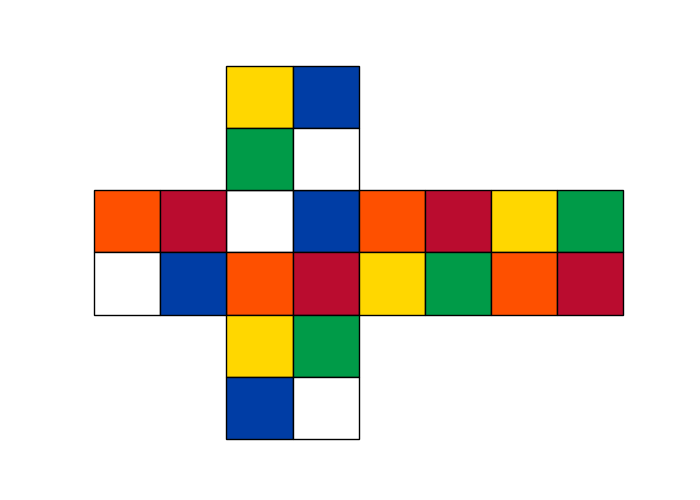

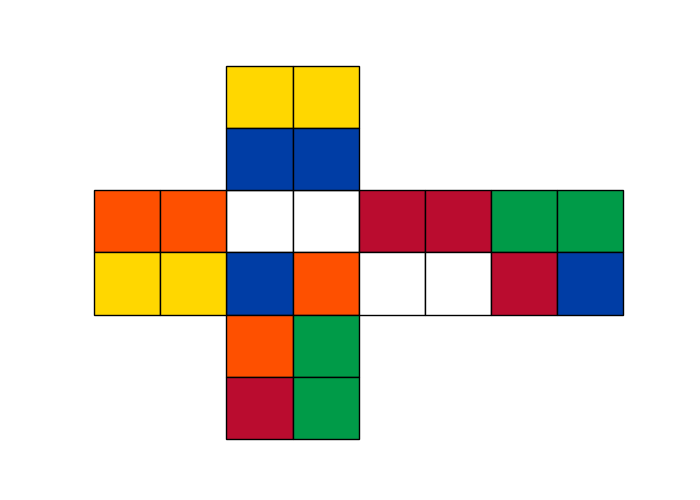

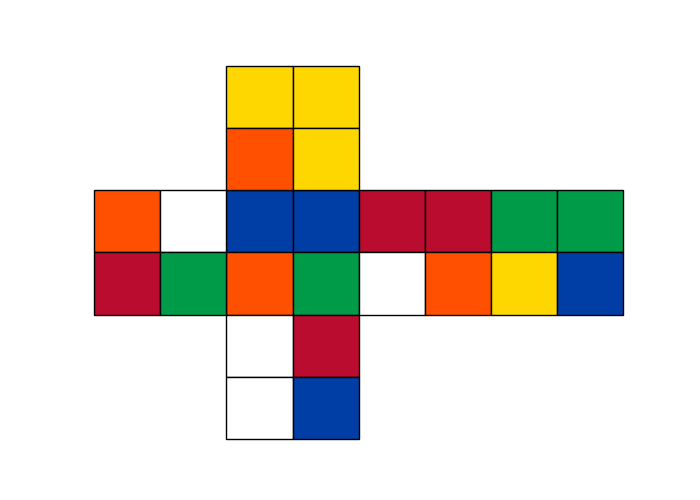

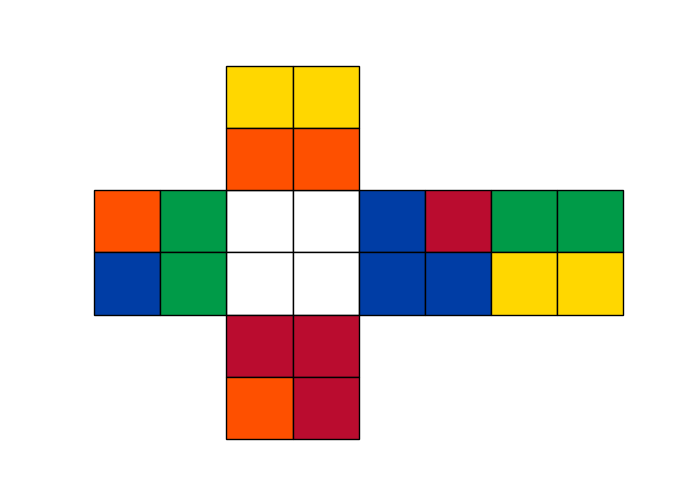

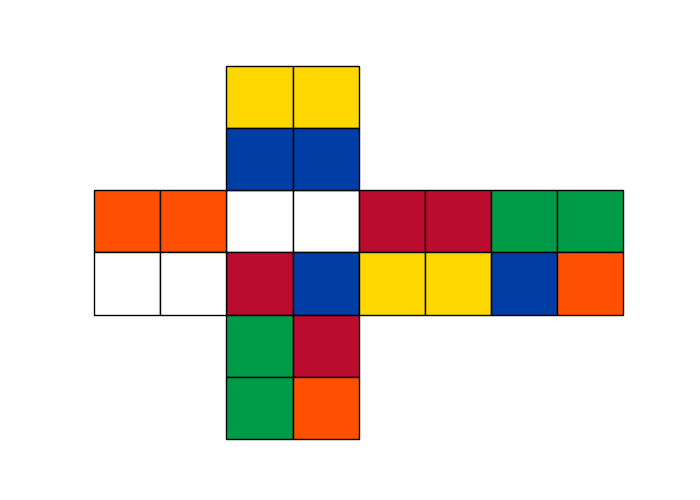

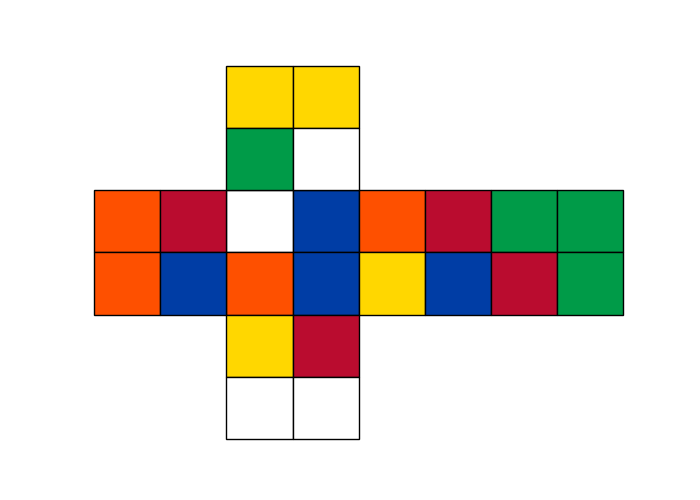

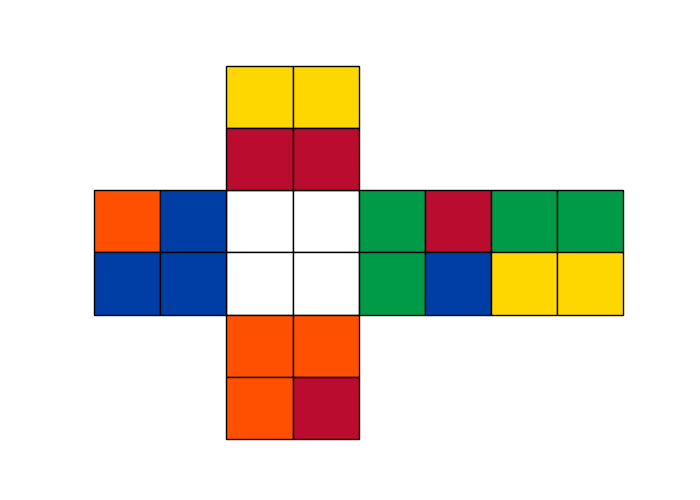

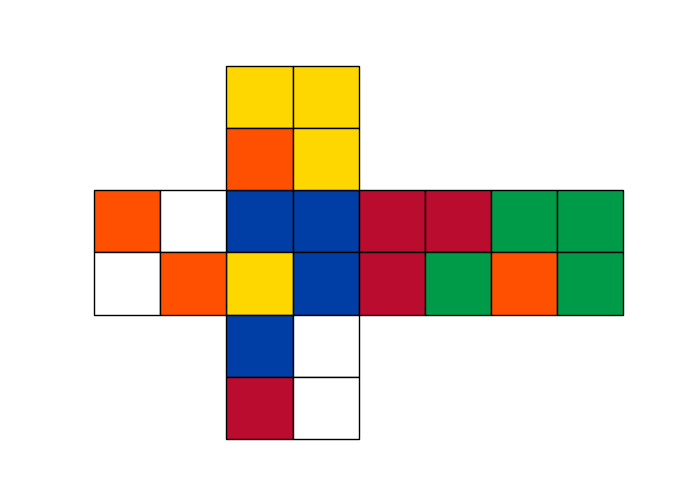

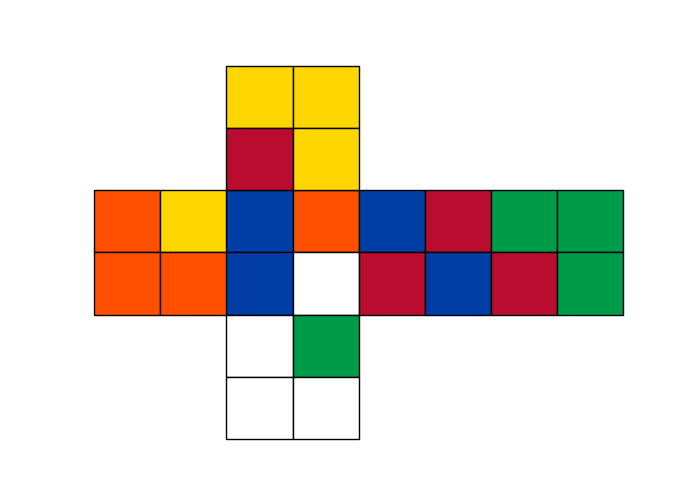

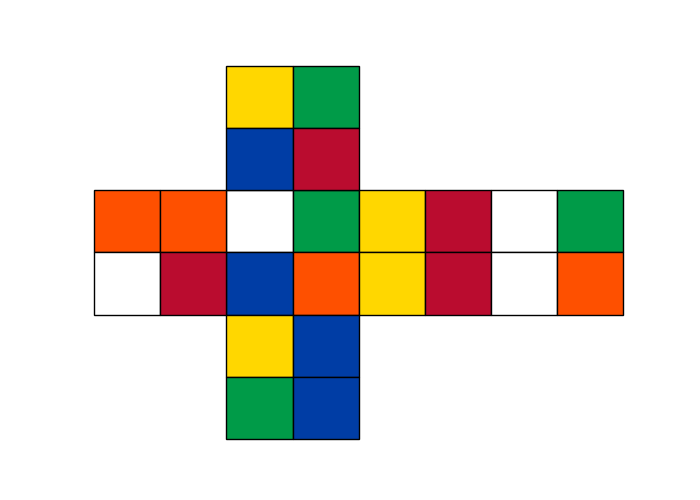

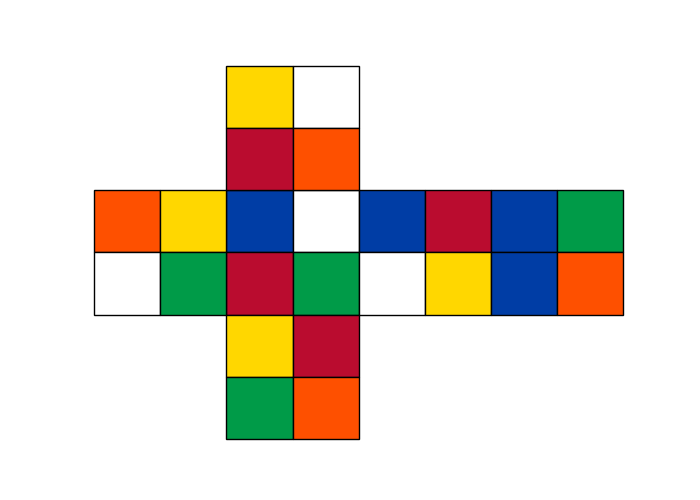

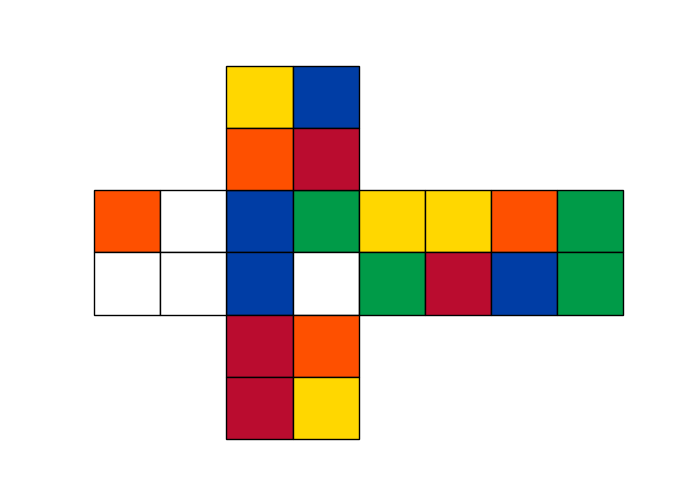

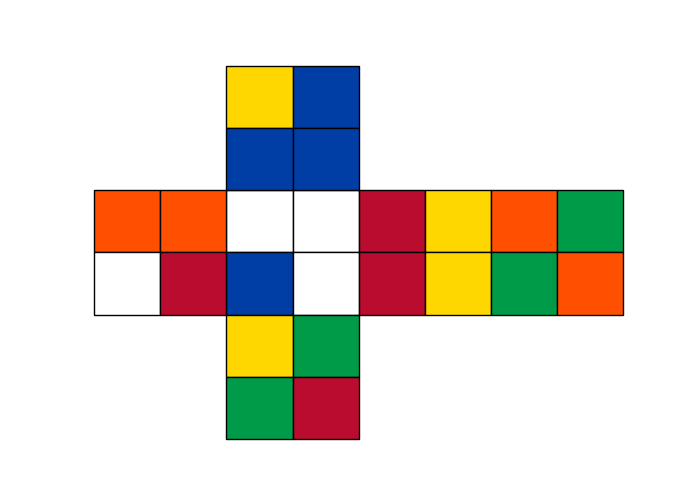

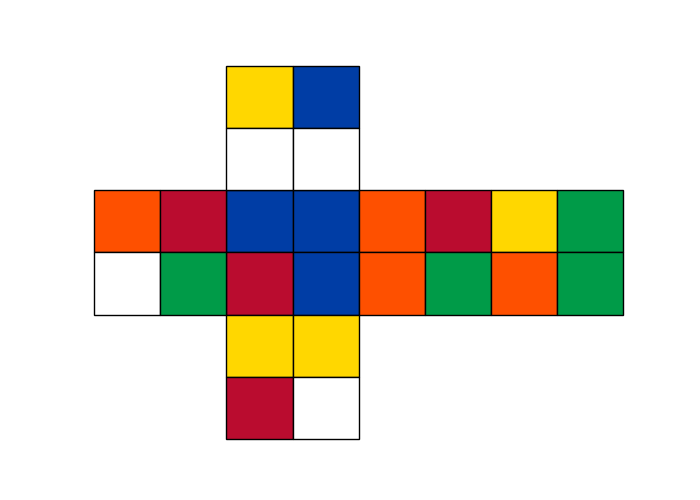

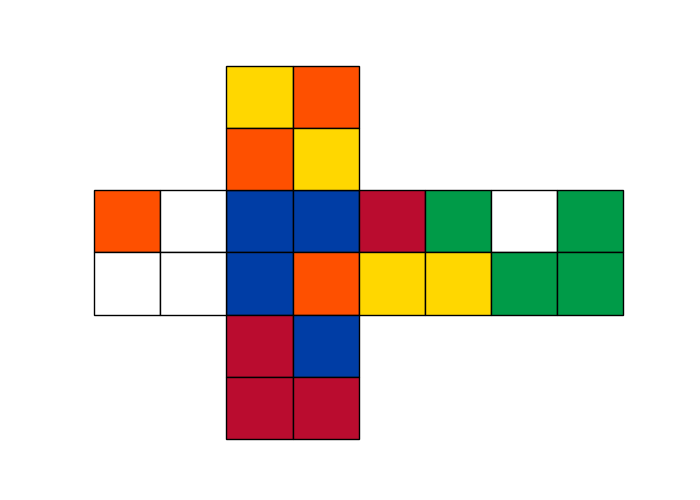

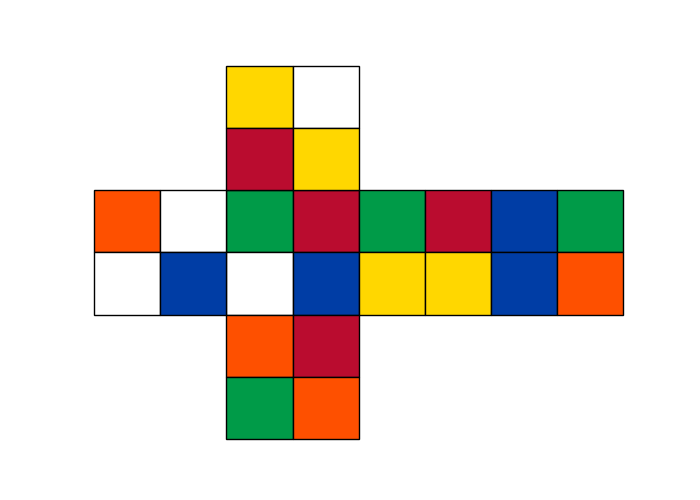

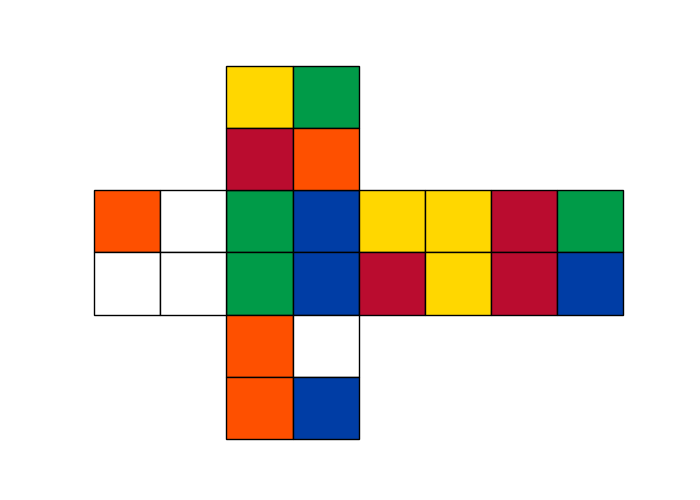

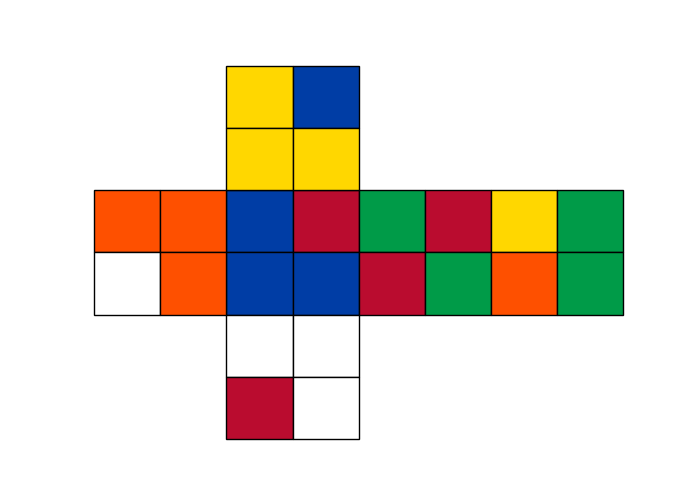

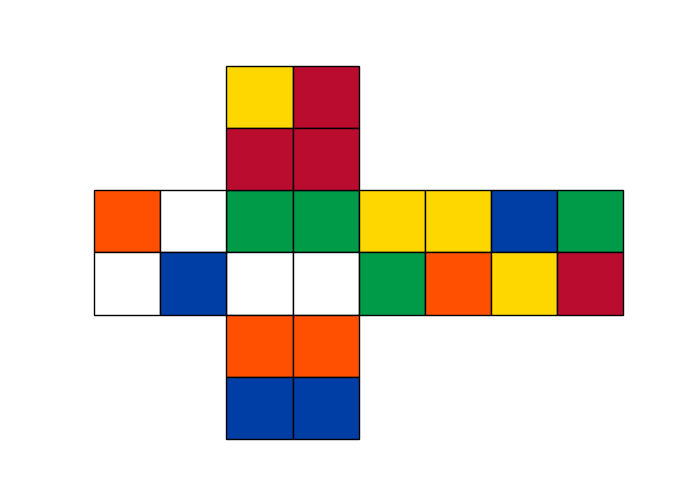

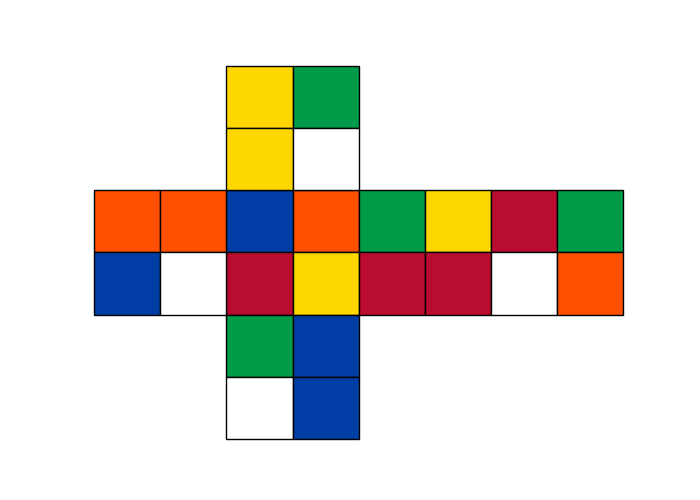

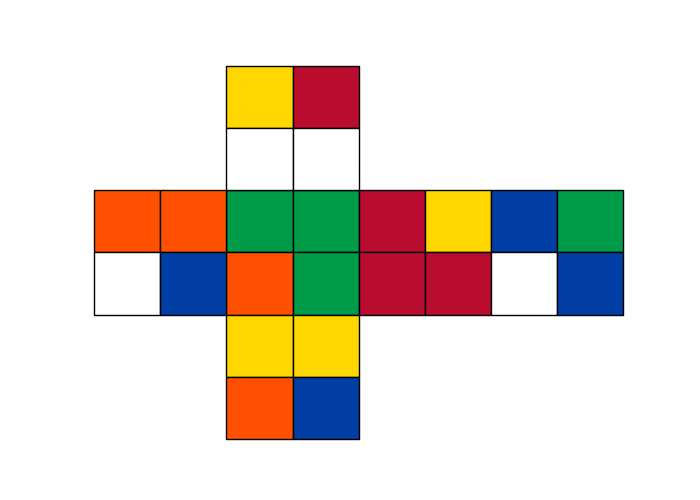

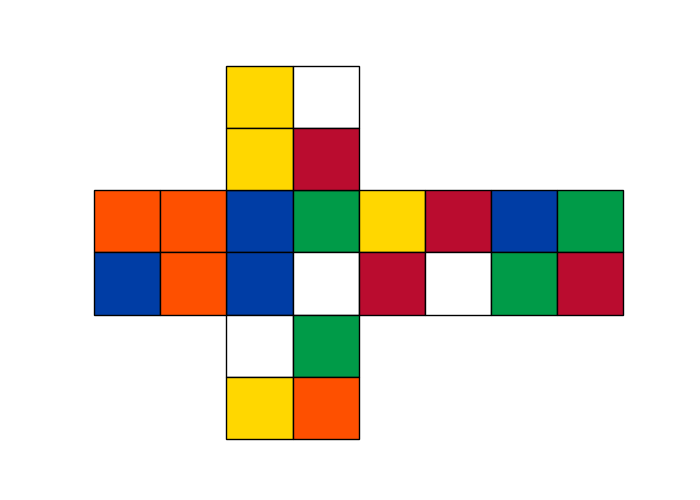

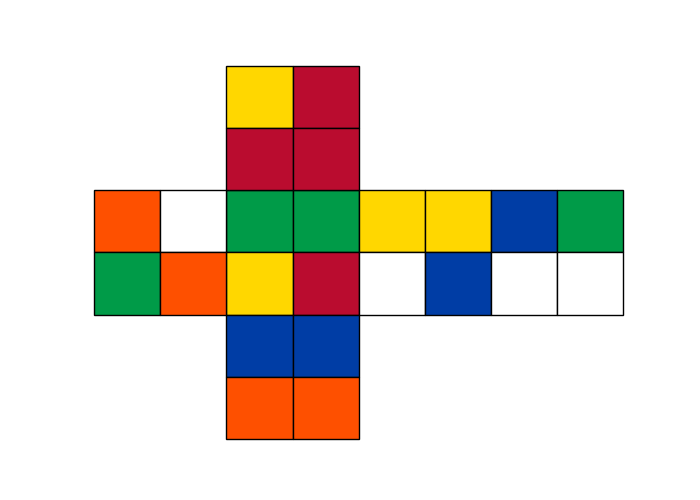

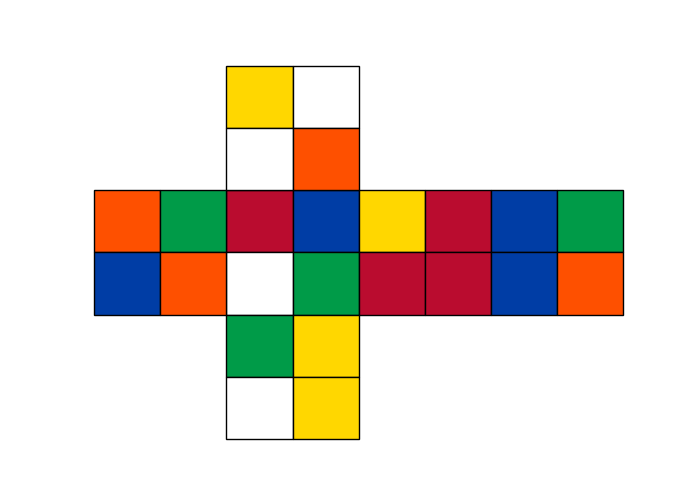

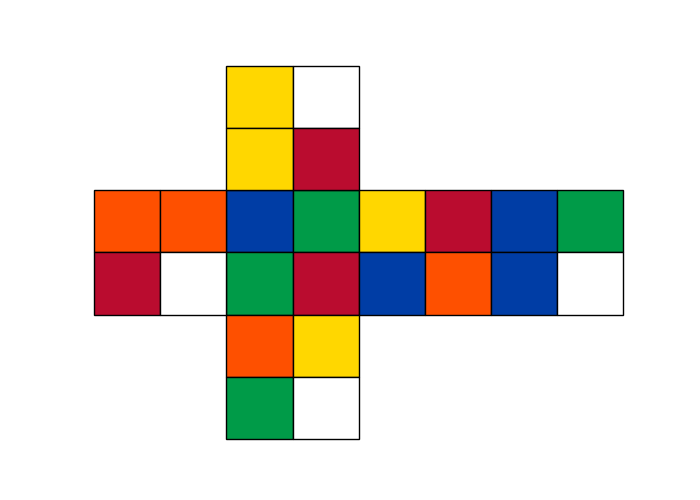

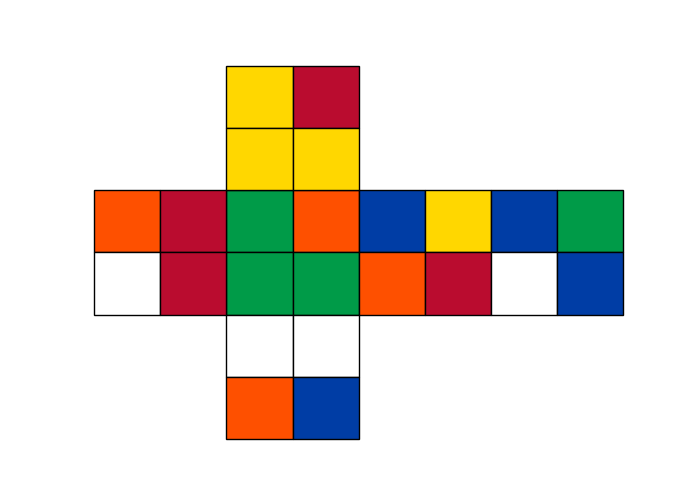

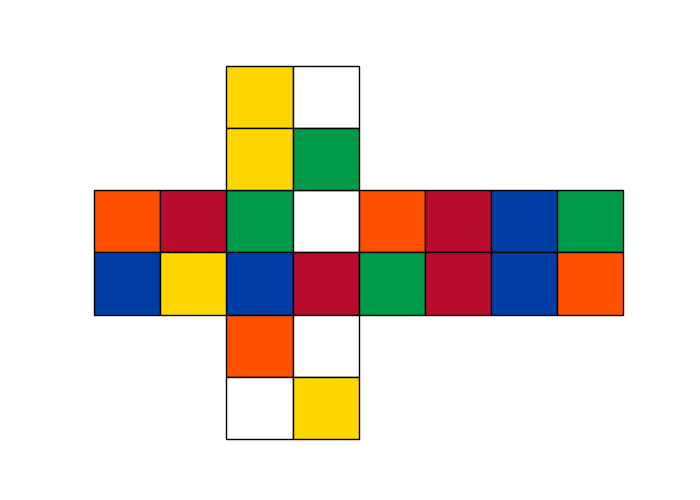

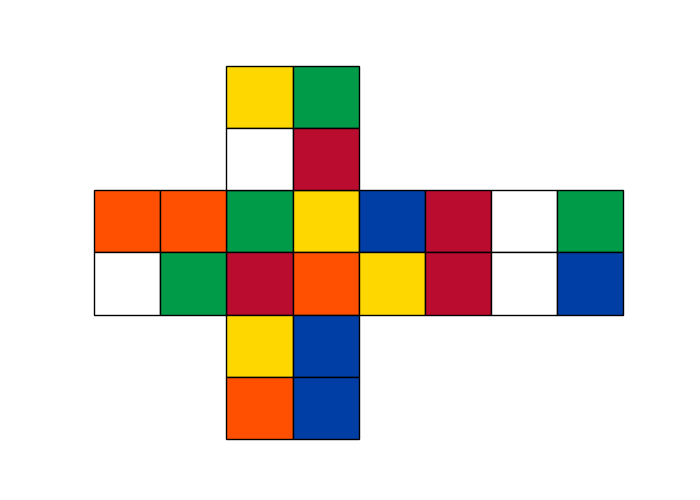

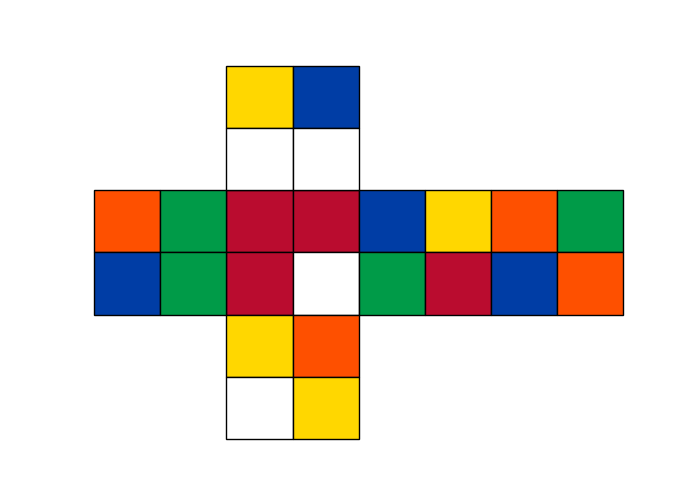

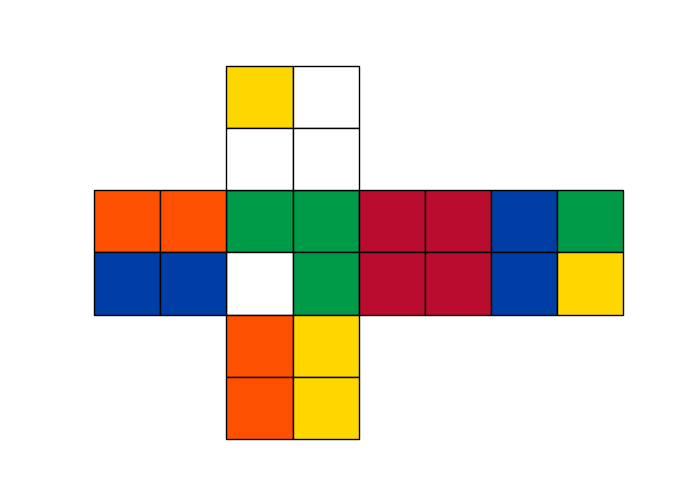

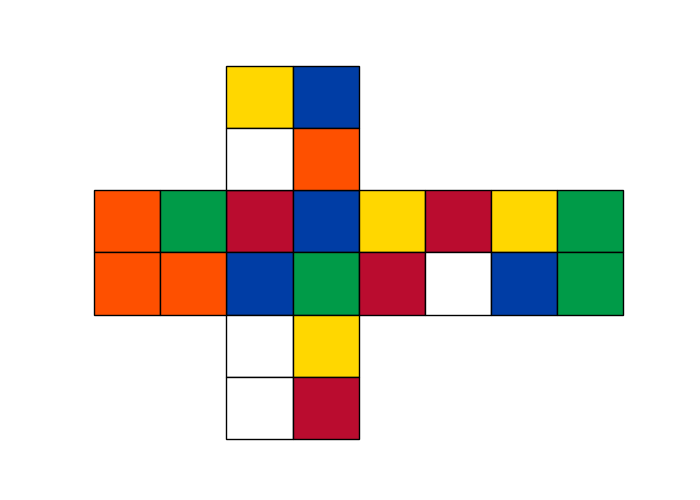

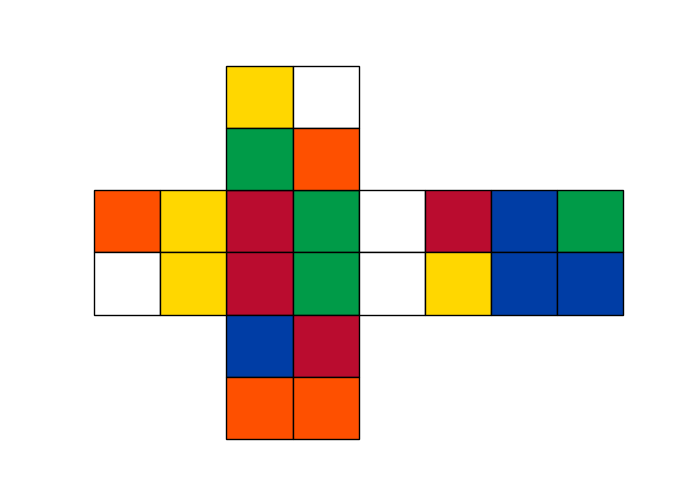

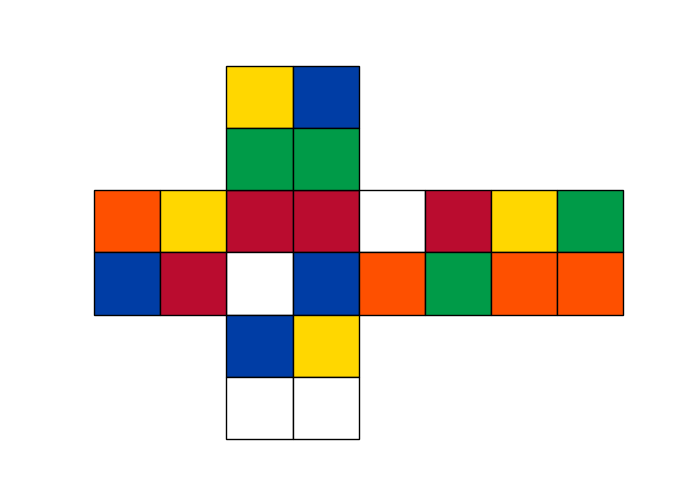

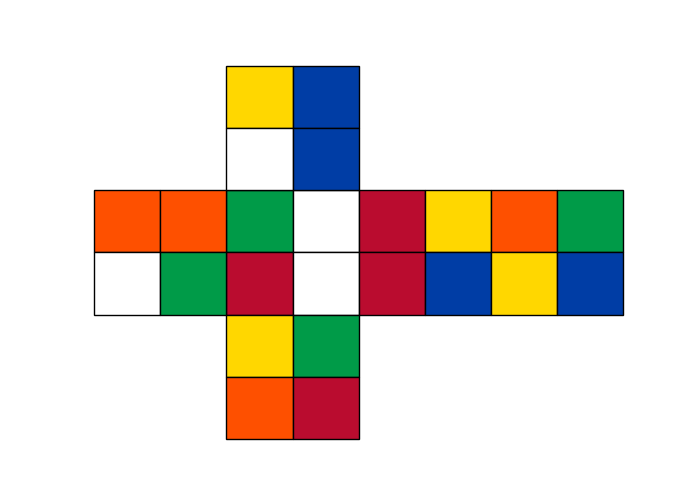

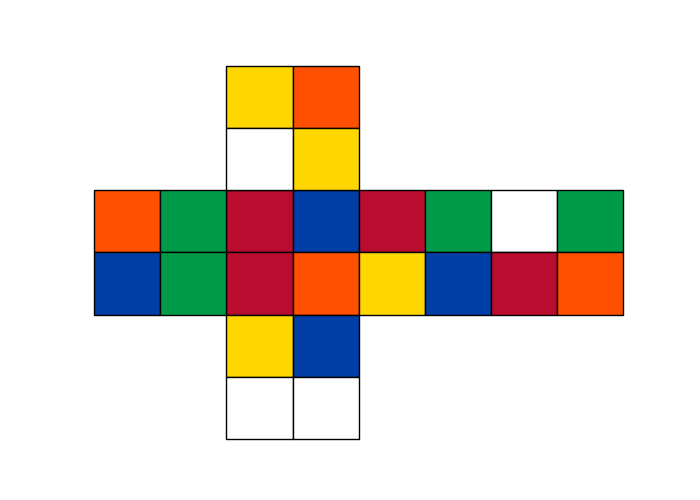

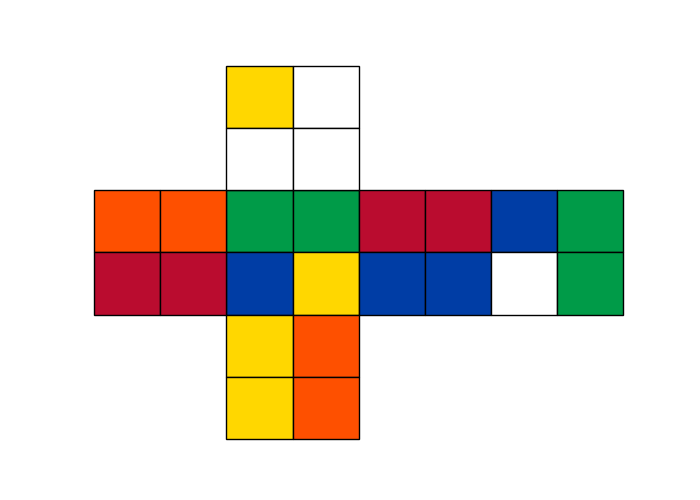

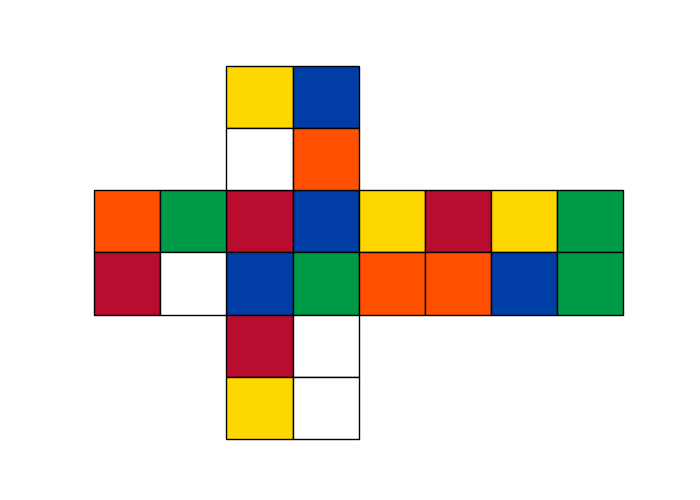

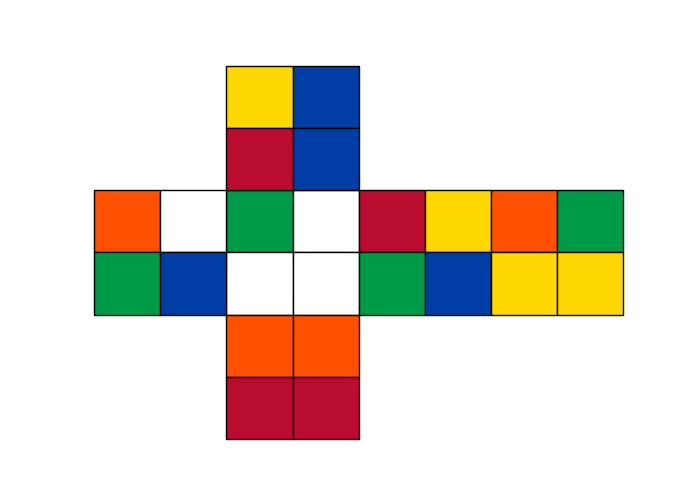

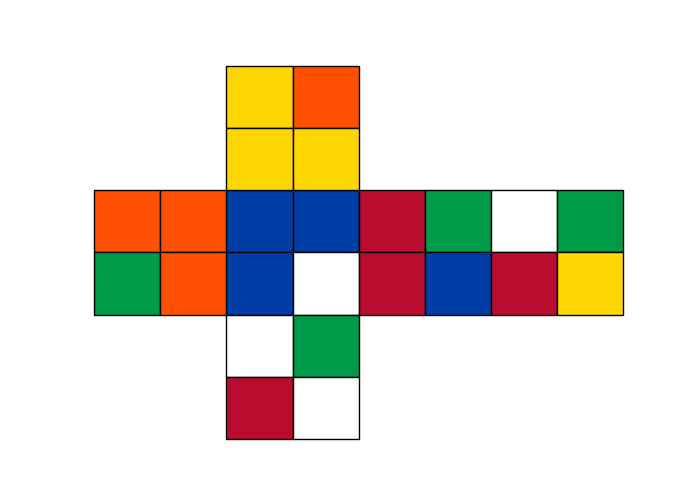

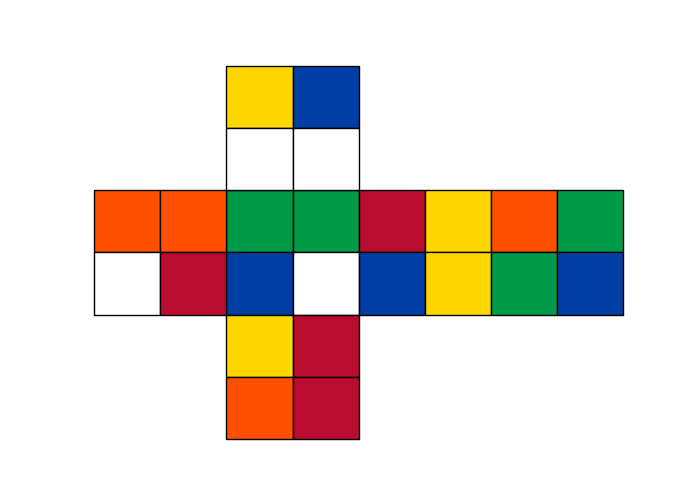

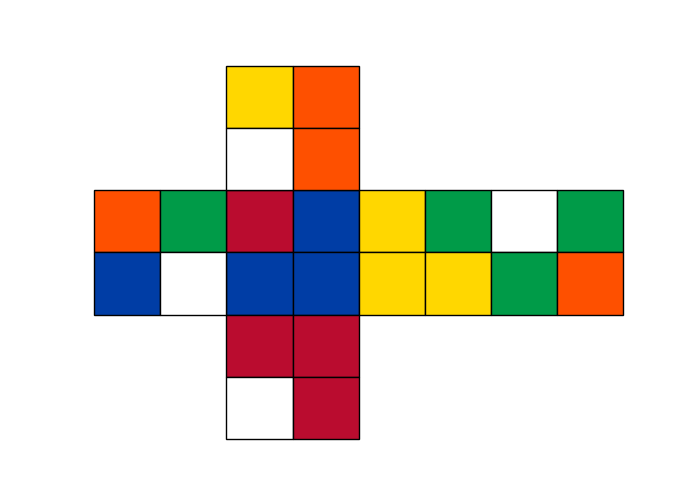

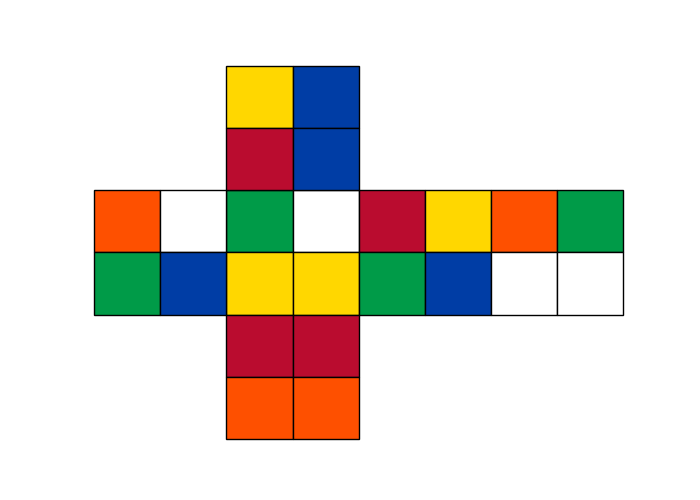

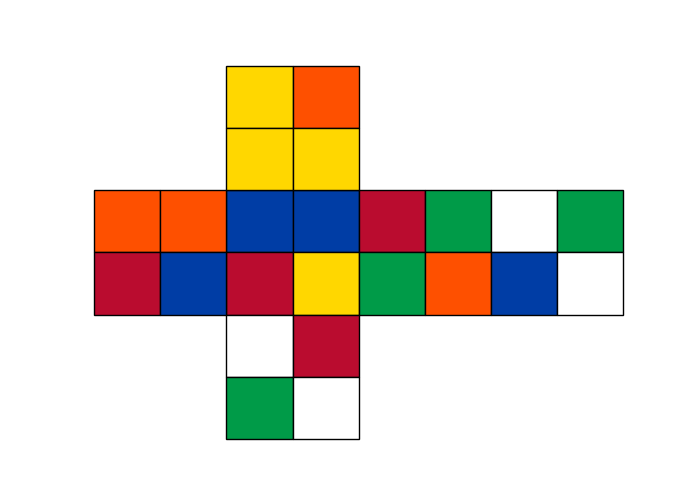

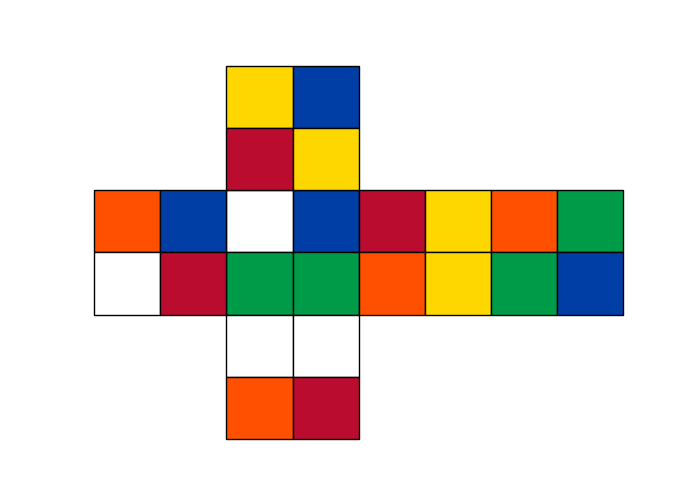

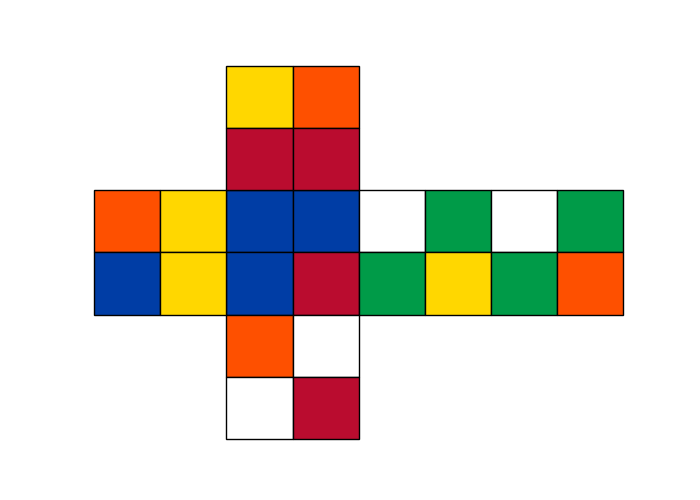

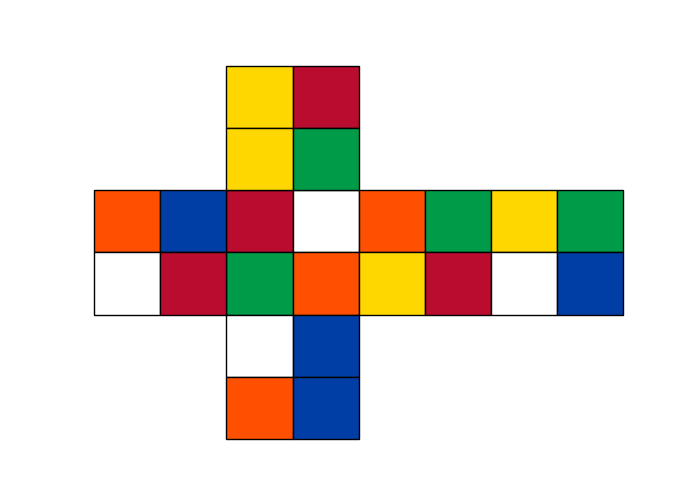

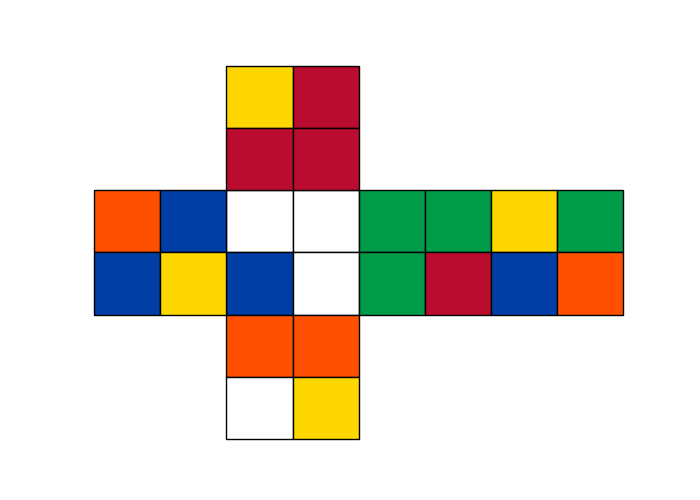

In [23]:
plt.close("all")

input = Cube(case1)
bfs_bidirectional(input)
# cube.render()
# cube2.render()